In [369]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
train = pd.read_csv('train_MpHjUjU.csv')
test = pd.read_csv('test_hXY9mYw.csv')
sample = pd.read_csv('sample_submission_znWiLZ4.csv')

In [4]:
train.head()

MMM-YY  Emp_ID  Age Gender City Education_Level  Salary Dateofjoining  \
0  2016-01-01       1   28   Male  C23          Master   57387    2015-12-24   
1  2016-02-01       1   28   Male  C23          Master   57387    2015-12-24   
2  2016-03-01       1   28   Male  C23          Master   57387    2015-12-24   
3  2017-11-01       2   31   Male   C7          Master   67016    2017-11-06   
4  2017-12-01       2   31   Male   C7          Master   67016    2017-11-06   

  LastWorkingDate  Joining Designation  Designation  Total Business Value  \
0             NaN                    1            1               2381060   
1             NaN                    1            1               -665480   
2      2016-03-11                    1            1                     0   
3             NaN                    2            2                     0   
4             NaN                    2            2                     0   

   Quarterly Rating  
0                 2  
1                 2  
2                 2  
3                 1  
4                 1

In [5]:
#test['Target'] = 0

In [12]:
train.groupby('Emp_ID')['Quarterly Rating'].mean()

Emp_ID
1       2.000000
2       1.000000
4       1.000000
5       1.000000
6       1.600000
          ...   
2784    2.625000
2785    1.000000
2786    1.666667
2787    1.500000
2788    2.285714
Name: Quarterly Rating, Length: 2381, dtype: float64

In [44]:
train.head()

MMM-YY  Emp_ID  Age Gender City Education_Level  Salary Dateofjoining  \
0  2016-01-01       1   28   Male  C23          Master   57387    2015-12-24   
1  2016-02-01       1   28   Male  C23          Master   57387    2015-12-24   
2  2016-03-01       1   28   Male  C23          Master   57387    2015-12-24   
3  2017-11-01       2   31   Male   C7          Master   67016    2017-11-06   
4  2017-12-01       2   31   Male   C7          Master   67016    2017-11-06   

  LastWorkingDate  Joining Designation  Designation  Total Business Value  \
0             NaN                    1            1               2381060   
1             NaN                    1            1               -665480   
2      2016-03-11                    1            1                     0   
3             NaN                    2            2                     0   
4             NaN                    2            2                     0   

   Quarterly Rating years_worked  
0                 2          NaT  
1                 2          NaT  
2                 2      78 days  
3                 1          NaT  
4                 1          NaT

In [47]:
city = train.groupby('Emp_ID')['City'].max()
city

Emp_ID
1       C23
2        C7
4       C13
5        C9
6       C11
       ... 
2784    C24
2785     C9
2786    C19
2787    C20
2788    C27
Name: City, Length: 2381, dtype: object

In [54]:
joiningdesignation = train.groupby('Emp_ID')['Joining Designation'].max()
designation = train.groupby('Emp_ID')['Designation'].max()

In [53]:
gender = train.groupby('Emp_ID')['Gender'].max()
gender

Emp_ID
1         Male
2         Male
4         Male
5         Male
6       Female
         ...  
2784      Male
2785    Female
2786      Male
2787    Female
2788      Male
Name: Gender, Length: 2381, dtype: object

In [51]:
education = train.groupby('Emp_ID')['Education_Level'].max()
education

Emp_ID
1         Master
2         Master
4         Master
5        College
6       Bachelor
          ...   
2784     College
2785     College
2786     College
2787      Master
2788      Master
Name: Education_Level, Length: 2381, dtype: object

In [50]:
age = train.groupby('Emp_ID')['Age'].max()
age

Emp_ID
1       28
2       31
4       43
5       29
6       31
        ..
2784    34
2785    34
2786    45
2787    28
2788    30
Name: Age, Length: 2381, dtype: int64

In [49]:
salary = train.groupby('Emp_ID')['Salary'].max()
salary

Emp_ID
1       57387
2       67016
4       65603
5       46368
6       78728
        ...  
2784    82815
2785    12105
2786    35370
2787    69498
2788    70254
Name: Salary, Length: 2381, dtype: int64

In [42]:
bussiness_value = train.groupby('Emp_ID')['Total Business Value'].sum()

In [66]:
rating = train.groupby('Emp_ID')['Quarterly Rating'].mean()

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [22]:
pd.to_datetime(train['Dateofjoining'])

0       2015-12-24
1       2015-12-24
2       2015-12-24
3       2017-11-06
4       2017-11-06
           ...    
19099   2017-06-08
19100   2017-06-08
19101   2017-06-08
19102   2017-06-08
19103   2017-06-08
Name: Dateofjoining, Length: 19104, dtype: datetime64[ns]

In [25]:
train['years_worked'] = pd.to_datetime(train['LastWorkingDate'])-pd.to_datetime(train['Dateofjoining'])
train['years_worked'].isnull().sum()

17488

In [78]:
days_worked = train.groupby('Emp_ID')['years_worked'].max()
days_worked

Emp_ID
1       78 days
2           NaT
4      141 days
5       58 days
6           NaT
         ...   
2784        NaT
2785    61 days
2786   419 days
2787   335 days
2788        NaT
Name: years_worked, Length: 2381, dtype: timedelta64[ns]

In [36]:
df = train.drop(['LastWorkingDate','Dateofjoining'],axis = 1)

In [38]:
df = df.drop('MMM-YY',axis = 1)

In [39]:
df.head()

Emp_ID  Age Gender City Education_Level  Salary  Joining Designation  \
0       1   28   Male  C23          Master   57387                    1   
1       1   28   Male  C23          Master   57387                    1   
2       1   28   Male  C23          Master   57387                    1   
3       2   31   Male   C7          Master   67016                    2   
4       2   31   Male   C7          Master   67016                    2   

   Designation  Total Business Value  Quarterly Rating years_worked  
0            1               2381060                 2          NaT  
1            1               -665480                 2          NaT  
2            1                     0                 2      78 days  
3            2                     0                 1          NaT  
4            2                     0                 1          NaT

In [40]:
df.isnull().sum()/len(df)

Emp_ID                  0.00000
Age                     0.00000
Gender                  0.00000
City                    0.00000
Education_Level         0.00000
Salary                  0.00000
Joining Designation     0.00000
Designation             0.00000
Total Business Value    0.00000
Quarterly Rating        0.00000
years_worked            0.91541
dtype: float64

In [59]:
emp_id = train.groupby('Emp_ID')['Emp_ID'].max()
emp_id

Emp_ID
1          1
2          2
4          4
5          5
6          6
        ... 
2784    2784
2785    2785
2786    2786
2787    2787
2788    2788
Name: Emp_ID, Length: 2381, dtype: int64

In [409]:
dic = {'Emp_ID':emp_id,'Age':age,'Gender':gender,'City':city,'Education_Level':education,'Salary':salary,'Joining Designation':joiningdesignation
      ,'Designation':designation,'Total Business Value':bussiness_value,'rating':rating}

In [410]:
df_new=pd.DataFrame(dic)

In [411]:
df_new = df_new.drop('Emp_ID',axis = 1)

In [412]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 1 to 2788
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2381 non-null   int64  
 1   Gender                2381 non-null   object 
 2   City                  2381 non-null   object 
 3   Education_Level       2381 non-null   object 
 4   Salary                2381 non-null   int64  
 5   Joining Designation   2381 non-null   int64  
 6   Designation           2381 non-null   int64  
 7   Total Business Value  2381 non-null   int64  
 8   rating                2381 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 266.0+ KB


In [413]:
df_new

Age  Gender City Education_Level  Salary  Joining Designation  \
Emp_ID                                                                  
1        28    Male  C23          Master   57387                    1   
2        31    Male   C7          Master   67016                    2   
4        43    Male  C13          Master   65603                    2   
5        29    Male   C9         College   46368                    1   
6        31  Female  C11        Bachelor   78728                    3   
8        34    Male   C2         College   70656                    3   
11       28  Female  C19          Master   42172                    1   
12       35    Male  C23          Master   28116                    1   
13       31    Male  C19          Master  119227                    1   
14       39  Female  C26         College   19734                    3   
16       30  Female  C23         College   52963                    2   
17       43    Male  C20          Master   51099                    1   
18       27  Female  C17        Bachelor   31631                    1   
20       26  Female  C19         College   40342                    3   
21       34  Female  C29        Bachelor   22755                    1   
22       41    Male  C10          Master   31224                    1   
24       31    Male  C24          Master   76308                    1   
25       31    Male  C24        Bachelor  102077                    1   
26       43    Male  C14          Master  132577                    1   
29       30    Male  C13          Master   30312                    1   
30       31    Male   C6        Bachelor   69457                    3   
31       32  Female  C28          Master   65189                    3   
34       28  Female  C14        Bachelor   65813                    2   
35       32    Male   C5        Bachelor   68070                    3   
36       41  Female  C18        Bachelor   32865                    2   
37       33  Female  C14        Bachelor   57375                    2   
38       22    Male  C27         College   13427                    1   
39       32    Male  C26         College   72888                    2   
40       32    Male  C15         College   59182                    2   
41       35    Male  C29          Master   92372                    4   
42       44  Female  C28         College   45988                    2   
43       27  Female  C15         College   12906                    1   
44       28    Male  C17          Master   62100                    1   
45       35    Male   C8          Master   77544                    3   
46       36  Female  C25          Master   42171                    1   
47       30    Male  C21        Bachelor   28000                    1   
49       22    Male  C20         College   53039                    1   
50       49  Female   C5         College   89367                    3   
51       34    Male  C14         College  131347                    4   
52       37    Male  C19         College   48687                    3   
54       35    Male  C29        Bachelor  127826                    4   
55       30  Female   C8         College   29985                    1   
56       36  Female  C19          Master   80223                    1   
57       38  Female   C1        Bachelor   84318                    1   
58       41    Male   C4         College   57987                    2   
59       35  Female  C18        Bachelor   31644                    1   
60       48  Female  C20         College   89592                    1   
61       32    Male  C11          Master   19818                    1   
62       27    Male   C9          Master   62376                    1   
63       28    Male   C6         College   93931                    1   
64       33    Male  C27          Master   66502                    2   
65       30  Female   C7        Bachelor   69539                    2   
66       27  Female   C4          Master  104286                  

In [414]:
df_new['days_worked'] = days_worked

In [415]:
df_new.shape

(2381, 10)

In [416]:
df_new.isnull().sum()

Age                       0
Gender                    0
City                      0
Education_Level           0
Salary                    0
Joining Designation       0
Designation               0
Total Business Value      0
rating                    0
days_worked             765
dtype: int64

In [417]:
df_new['days_worked'] = df_new['days_worked'].dt.days

In [418]:
df_new['days_worked'] = df_new['days_worked'].astype(np.number)

In [419]:
df_new['target'] = df_new['days_worked'].isnull()

In [420]:
df_new['target']

Emp_ID
1       False
2        True
4       False
5       False
6        True
8       False
11       True
12      False
13      False
14       True
16      False
17      False
18      False
20      False
21      False
22      False
24      False
25       True
26       True
29      False
30      False
31       True
34      False
35      False
36      False
37      False
38      False
39       True
40      False
41       True
42      False
43      False
44      False
45       True
46      False
47       True
49      False
50      False
51      False
52       True
54       True
55      False
56       True
57      False
58      False
59      False
60       True
61      False
62       True
63       True
64      False
65      False
66       True
67       True
68       True
69      False
70      False
71      False
72       True
74      False
75      False
77       True
78       True
79      False
80       True
81      False
82      False
83      False
84      False
85       True
86      False

In [421]:
def leftornot(l):
    if l==True:
        return 0
    else:
        return 1

In [422]:
df_new['Target'] = df_new.target.apply(leftornot)

In [423]:
df_new.Target.value_counts()

1    1616
0     765
Name: Target, dtype: int64

In [424]:
df_new = df_new.drop('target',axis = 1)

In [425]:
df_new = df_new.drop('days_worked',axis = 1)

In [426]:
df_new[df_new['Target']==0]

Age  Gender City Education_Level  Salary  Joining Designation  \
Emp_ID                                                                  
2        31    Male   C7          Master   67016                    2   
6        31  Female  C11        Bachelor   78728                    3   
11       28  Female  C19          Master   42172                    1   
14       39  Female  C26         College   19734                    3   
25       31    Male  C24        Bachelor  102077                    1   
26       43    Male  C14          Master  132577                    1   
31       32  Female  C28          Master   65189                    3   
39       32    Male  C26         College   72888                    2   
41       35    Male  C29          Master   92372                    4   
45       35    Male   C8          Master   77544                    3   
47       30    Male  C21        Bachelor   28000                    1   
52       37    Male  C19         College   48687                    3   
54       35    Male  C29        Bachelor  127826                    4   
56       36  Female  C19          Master   80223                    1   
60       48  Female  C20         College   89592                    1   
62       27    Male   C9          Master   62376                    1   
63       28    Male   C6         College   93931                    1   
66       27  Female   C4          Master  104286                    3   
67       41    Male  C28          Master   65982                    1   
68       32    Male  C29         College   79288                    1   
72       28    Male  C14          Master   42242                    2   
77       34    Male   C3          Master   63918                    1   
78       37    Male  C21         College  105946                    2   
80       29  Female   C7         College   56687                    2   
85       25    Male  C22          Master   49509                    1   
87       37    Male   C6        Bachelor  119341                    3   
97       40  Female   C2          Master   80771                    3   
104      30  Female  C23        Bachelor   60332                    2   
109      36  Female   C6         College   33927                    1   
112      46    Male  C29        Bachelor   50466                    1   
114      32  Female  C19         College   89456                    3   
115      46    Male   C1        Bachelor   31752                    1   
117      47  Female   C1        Bachelor  144978                    1   
122      27    Male  C26         College   57406                    2   
129      38  Female   C6        Bachelor   60708                    2   
134      32    Male  C27         College   76904                    3   
135      28    Male  C22         College   98877                    3   
137      42    Male  C28         College   33459                    2   
140      38    Male   C9        Bachelor   72253                    1   
148      41    Male  C15         College   45288                    2   
150      39    Male  C17         College   29013                    1   
168      26    Male  C15          Master   33057                    2   
173      39    Male  C28         College   56174                    1   
181      30  Female  C17          Master   26926                    3   
188      34    Male  C12         College   36483                    2   
191      27  Female  C11          Master   63380                    3   
192      37  Female   C9        Bachelor   66952                    3   
199      30    Male  C14         College   87902                    1   
202      33    Male  C28         College   28921                    1   
205      39    Male  C12         College   15826                    1   
206      26  Female  C10         College   12968                    1   
210      38    Male  C29          Master   64583                    3   
213      37    Male  C24         College   59947                  

In [427]:
df_new['Joining Designation'] = df_new['Joining Designation'].astype('object')
df_new['Designation'] = df_new['Designation'].astype('object')
df_new['Target'] = df_new['Target'].astype('object')

In [428]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 1 to 2788
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2381 non-null   int64  
 1   Gender                2381 non-null   object 
 2   City                  2381 non-null   object 
 3   Education_Level       2381 non-null   object 
 4   Salary                2381 non-null   int64  
 5   Joining Designation   2381 non-null   object 
 6   Designation           2381 non-null   object 
 7   Total Business Value  2381 non-null   int64  
 8   rating                2381 non-null   float64
 9   Target                2381 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 284.6+ KB


In [282]:
df_new = df_new.drop('City',axis = 1)

In [429]:
dum = pd.get_dummies(df_new,drop_first = True)
dum.head()

Age  Salary  Total Business Value   rating  Gender_Male  City_C10  \
Emp_ID                                                                      
1        28   57387               1715580 2.000000            1         0   
2        31   67016                     0 1.000000            1         0   
4        43   65603                350000 1.000000            1         0   
5        29   46368                120360 1.000000            1         0   
6        31   78728               1265000 1.600000            0         0   

        City_C11  City_C12  City_C13  City_C14  City_C15  City_C16  City_C17  \
Emp_ID                                                                         
1              0         0         0         0         0         0         0   
2              0         0         0         0         0         0         0   
4              0         0         1         0         0         0         0   
5              0         0         0         0         0         0         0   
6              1         0         0         0         0         0         0   

        City_C18  City_C19  City_C2  City_C20  City_C21  City_C22  City_C23  \
Emp_ID                                                                        
1              0         0        0         0         0         0         1   
2              0         0        0         0         0         0         0   
4              0         0        0         0         0         0         0   
5              0         0        0         0         0         0         0   
6              0         0        0         0         0         0         0   

        City_C24  City_C25  City_C26  City_C27  City_C28  City_C29  City_C3  \
Emp_ID                                                                        
1              0         0         0         0         0         0        0   
2              0         0         0         0         0         0        0   
4              0         0         0         0         0         0        0   
5              0         0         0         0         0         0        0   
6              0         0         0         0         0         0        0   

        City_C4  City_C5  City_C6  City_C7  City_C8  City_C9  \
Emp_ID                                                         
1             0        0        0        0        0        0   
2             0        0        0        1        0        0   
4             0        0        0        0        0        0   
5             0        0        0        0        0        1   
6             0        0        0        0        0        0   

        Education_Level_College  Education_Level_Master  \
Emp_ID                                                    
1                             0                       1   
2                             0                       1   
4                             0                       1   
5                             1                       0   
6                             0                       0   

        Joining Designation_2  Joining Designation_3  Joining Designation_4  \
Emp_ID                                                                        
1                           0                      0                      0   
2                           1                      0                      0   
4                           1                      0                      0   
5                           0                      0                      0   
6                           0                      1                      0   

        Joining Designation_5  Designation_2  Designation_3  Designation_4  \
Emp_ID                                                                       
1                           0              0              0              0   
2                           0              1              0              0   
4                           0              1              0           

In [430]:
dum = dum.rename({'Target_1':'Target'},axis = 1)

In [431]:
dum.head()

Age  Salary  Total Business Value   rating  Gender_Male  City_C10  \
Emp_ID                                                                      
1        28   57387               1715580 2.000000            1         0   
2        31   67016                     0 1.000000            1         0   
4        43   65603                350000 1.000000            1         0   
5        29   46368                120360 1.000000            1         0   
6        31   78728               1265000 1.600000            0         0   

        City_C11  City_C12  City_C13  City_C14  City_C15  City_C16  City_C17  \
Emp_ID                                                                         
1              0         0         0         0         0         0         0   
2              0         0         0         0         0         0         0   
4              0         0         1         0         0         0         0   
5              0         0         0         0         0         0         0   
6              1         0         0         0         0         0         0   

        City_C18  City_C19  City_C2  City_C20  City_C21  City_C22  City_C23  \
Emp_ID                                                                        
1              0         0        0         0         0         0         1   
2              0         0        0         0         0         0         0   
4              0         0        0         0         0         0         0   
5              0         0        0         0         0         0         0   
6              0         0        0         0         0         0         0   

        City_C24  City_C25  City_C26  City_C27  City_C28  City_C29  City_C3  \
Emp_ID                                                                        
1              0         0         0         0         0         0        0   
2              0         0         0         0         0         0        0   
4              0         0         0         0         0         0        0   
5              0         0         0         0         0         0        0   
6              0         0         0         0         0         0        0   

        City_C4  City_C5  City_C6  City_C7  City_C8  City_C9  \
Emp_ID                                                         
1             0        0        0        0        0        0   
2             0        0        0        1        0        0   
4             0        0        0        0        0        0   
5             0        0        0        0        0        1   
6             0        0        0        0        0        0   

        Education_Level_College  Education_Level_Master  \
Emp_ID                                                    
1                             0                       1   
2                             0                       1   
4                             0                       1   
5                             1                       0   
6                             0                       0   

        Joining Designation_2  Joining Designation_3  Joining Designation_4  \
Emp_ID                                                                        
1                           0                      0                      0   
2                           1                      0                      0   
4                           1                      0                      0   
5                           0                      0                      0   
6                           0                      1                      0   

        Joining Designation_5  Designation_2  Designation_3  Designation_4  \
Emp_ID                                                                       
1                           0              0              0              0   
2                           0              1              0              0   
4                           0              1              0           

In [432]:
dum.shape

(2381, 44)

In [433]:
X = dum.drop('Target',axis = 1)
y = dum['Target']


In [434]:
X_test = dum[dum['Target']==0].drop('Target',axis = 1)

In [302]:
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

# fit the model using fit() on train data
decision_tree = dt_model.fit(X, y)
test_pred = decision_tree.predict(X_test)
# print the performance measures
print(test_pred)



[1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0
 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1
 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1
 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1
 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1
 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0
 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1
 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0
 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1
 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1
 1 1 0 1 0 1 1 1 0 1 0 0 

In [303]:
import seaborn as sns

<AxesSubplot:ylabel='count'>

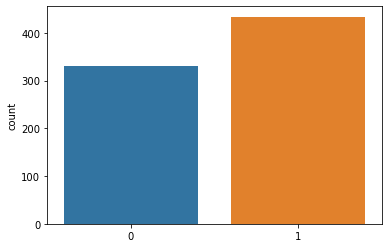

In [304]:
sns.countplot(test_pred)

In [311]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [50, 70, 90],
                     'max_depth': [10, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8]}]
 
random_forest_classification = RandomForestClassifier(random_state = 10)


rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 2)

rf_grid_model = rf_grid.fit(X, y)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 90} 



In [313]:
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)
rf_model = rf_model.fit(X, y)

test_pred = rf_model.predict(X_test)

<AxesSubplot:ylabel='count'>

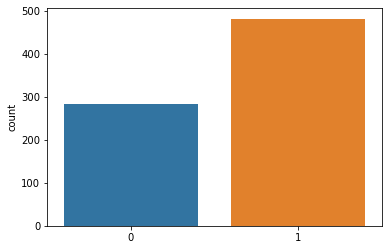

In [314]:
sns.countplot(test_pred)

In [341]:
X_test.index

Int64Index([   2,    6,   11,   14,   25,   26,   31,   39,   41,   45,
            ...
            2761, 2763, 2764, 2770, 2771, 2775, 2778, 2781, 2784, 2788],
           dtype='int64', name='Emp_ID', length=765)

In [360]:
dic = {'Emp_ID':X_test.index,'Target':test_pred}
sorted_result = pd.DataFrame(dic)

In [361]:
test

Emp_ID
0       394
1       173
2      1090
3       840
4       308
5      1864
6      1606
7       954
8      2422
9      1841
10     1484
11     2727
12     1031
13     2137
14     2568
15     1745
16     2668
17     2617
18     2070
19     1446
20     1043
21     2561
22      945
23     2517
24     1039
25     2594
26      115
27      870
28      329
29      973
30     1892
31     2740
32     1093
33      693
34     1817
35     1753
36     2420
37     1655
38     1573
39     2365
40     1623
41     2625
42     1335
43      450
44     2087
45     2576
46     2771
47     1549
48     1657
49     1957
50     1662
51     1588
52     2615
53     2027
54     2714
55      556
56      377
57      605
58      791
59     1147
60       68
61     2784
62     1181
63     1782
64     2299
65     1238
66      402
67     1109
68      990
69      425
70      569
71     2454
72      926
73      391
74     2110
75     1875
76      117
77     1714
78     1106
79      422
80      150
81     2179
82     2684
83      762
84      718
85     1694
86     1051
87     2104
88     1225
89       63
90      275
91     1733
92     2541
93      140
94     1037
95      407
96     1770
97      946
98      604
99      893
100    2200
101    2114
102    1243
103    2076
104    2597
105      60
106     662
107     765
108     199
109    1526
110    1486
111    1179
112    1161
113    2259
114    1191
115    1811
116    1510
117     434
118    1918
119     753
120      25
121    1414
122    1426
123     716
124    2283
125    1840
126    1678
127    1859
128    2381
129    2008
130    1050
131     581
132    2289
133     713
134    1924
135    2257
136    1504
137    1670
138    2551
139    1874
140      26
141    2308
142    1259
143      77
144     568
145    1370
146     704
147    2494
148    1077
149     592
150    2390
151     832
152     904
153    2567
154    1274
155    2543
156     296
157    1374
158    1852
159     252
160     888
161    1234
162     112
163    2399
164    1265
165    2166
166     320
167    1968
168    2690
169    2228
170      56
171     723
172     560
173     580
174    1679
175    1783
176     371
177    2546
178    2505
179    2224
180    1271
181     213
182    1936
183    1642
184    1213
185      78
186     368
187     943
188    1165
189    1432
190    2223
191    2407
192    1316
193    1139
194     789
195    2552
196    2670
197    2028
198      67
199    2055
200    2198
201    2272
202    2210
203    2398
204     272
205    2754
206    2473
207    1327
208     359
209    2160
210    1563
211    1206
212    1858
213     516
214      41
215    1382
216    1405
217    2730
218     772
219      54
220    1222
221     697
222     453
223    1334
224     992
225     682
226     766
227    1283
228    2148
229    2729
230    1668
231    1290
232    1013
233     906
234    2357
235      87
236    2533
237    1532
238    1977
239     565
240    1598
241     400
242    2109
243     168
244     956
245    2417
246    1276
247     734
248     550
249     532
250    2708
251    2050
252     358
253    1177
254    1267
255    1982
256     933
257     538
258    1057
259    2453
260     188
261    2241
262     552
263    1119
264    2382
265    1284
266    2480
267    1658
268     582
269    2258
270     444
271    1633
272    1958
273    2334
274    2633
275     388
276     537
277    1579
278    2193
279    1263
280    2318
281     351
282     835
283     493
284     341
285     191
286    1929
287     991
288     828
289     234
290    1869
291     570
292    2012
293     323
294    1249
295    1989
296    1830
297    2496
298     446
299    1475
300    1972
301     639
302    1888
303     710
304    2639
305    2014
306     848
307    2781
308    2199
309     357
310     494
311    1178
312    2611
313    2728
314    1149
315     521
316     375
317    2763
318     192
319     658
320     109
321    2052
322    1752
323    2483
324    2386
325    2205
326    2347
327    2569
328     644
329    2449
330    1230
331    1652
332     6

In [364]:
result = pd.merge(right = sorted_result,left = test, on = 'Emp_ID',how = 'inner')

In [365]:
result.shape

(741, 2)

In [366]:
test.shape

(741, 1)

In [367]:
result.to_csv('result.csv',index = False)

In [435]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_model.fit(X, y)
test_pred = xgb_model.predict(X_test)

[19:50:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:ylabel='count'>

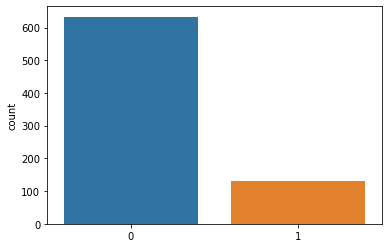

In [436]:
sns.countplot(test_pred)

In [386]:
from lightgbm import LGBMClassifier

#model = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=- 1, learning_rate=0.1, n_estimators=300, device = "gpu")


model = LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.1,
                                bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)

lg_model = model.fit(X, y)
test_pred_lgbm = lg_model.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


<AxesSubplot:ylabel='count'>

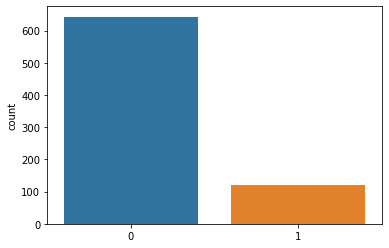

In [387]:
sns.countplot(test_pred_lgbm)

In [388]:
dic = {'Emp_ID':X_test.index,'Target':test_pred_lgbm}
sorted_result = pd.DataFrame(dic)
result_lgbm = pd.merge(right = sorted_result,left = test, on = 'Emp_ID',how = 'inner')
result_lgbm.to_csv('result_lgbm.csv',index = False)

In [443]:
from lightgbm import LGBMClassifier

#model = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=- 1, learning_rate=0.1, n_estimators=300, device = "gpu")


model = LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.1,
                                bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)

lg_model = model.fit(X, y)
test_pred_lgbm = lg_model.predict(X_test)
dic = {'Emp_ID':X_test.index,'Target':test_pred_lgbm}
sorted_result = pd.DataFrame(dic)
result_lgbm = pd.merge(right = sorted_result,left = test, on = 'Emp_ID',how = 'inner')
result_lgbm.to_csv('result_citylgbm.csv',index = False)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


In [402]:
grid = {'depth': [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]}

In [403]:
# instantiate the 'XGBClassifier' 
cat_model = CatBoostClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
cat_grid = GridSearchCV(estimator = cat_model, param_grid = grid, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
cat_grid.fit(X, y)

# get the best parameters
print('Best parameters for Catboost classifier: ', cat_grid.best_params_, '\n')

0:	learn: 0.6901383	total: 994us	remaining: 8.95ms
1:	learn: 0.6872677	total: 1.98ms	remaining: 7.91ms
2:	learn: 0.6842599	total: 2.96ms	remaining: 6.9ms
3:	learn: 0.6813285	total: 3.8ms	remaining: 5.7ms
4:	learn: 0.6785313	total: 4.69ms	remaining: 4.69ms
5:	learn: 0.6758360	total: 5.58ms	remaining: 3.72ms
6:	learn: 0.6732969	total: 6.41ms	remaining: 2.75ms
7:	learn: 0.6707434	total: 7.28ms	remaining: 1.82ms
8:	learn: 0.6683380	total: 8.19ms	remaining: 909us
9:	learn: 0.6659489	total: 9.06ms	remaining: 0us
0:	learn: 0.6900684	total: 1.18ms	remaining: 10.7ms
1:	learn: 0.6872217	total: 2.72ms	remaining: 10.9ms
2:	learn: 0.6844436	total: 3.75ms	remaining: 8.75ms
3:	learn: 0.6813456	total: 4.72ms	remaining: 7.08ms
4:	learn: 0.6785964	total: 5.63ms	remaining: 5.63ms
5:	learn: 0.6760948	total: 6.53ms	remaining: 4.35ms
6:	learn: 0.6737122	total: 7.74ms	remaining: 3.32ms
7:	learn: 0.6711538	total: 8.74ms	remaining: 2.18ms
8:	learn: 0.6687776	total: 9.68ms	remaining: 1.07ms
9:	learn: 0.6663675	

0:	learn: 0.6904255	total: 1.51ms	remaining: 28.7ms
1:	learn: 0.6878885	total: 3.12ms	remaining: 28.1ms
2:	learn: 0.6850298	total: 4.77ms	remaining: 27ms
3:	learn: 0.6823289	total: 6.18ms	remaining: 24.7ms
4:	learn: 0.6797839	total: 7.61ms	remaining: 22.8ms
5:	learn: 0.6774467	total: 9.15ms	remaining: 21.3ms
6:	learn: 0.6749583	total: 10.7ms	remaining: 19.8ms
7:	learn: 0.6726749	total: 12.3ms	remaining: 18.4ms
8:	learn: 0.6704798	total: 13.8ms	remaining: 16.9ms
9:	learn: 0.6683158	total: 15.4ms	remaining: 15.4ms
10:	learn: 0.6660468	total: 17ms	remaining: 13.9ms
11:	learn: 0.6637808	total: 18.4ms	remaining: 12.2ms
12:	learn: 0.6617037	total: 20ms	remaining: 10.8ms
13:	learn: 0.6592462	total: 21.5ms	remaining: 9.21ms
14:	learn: 0.6567616	total: 22.8ms	remaining: 7.61ms
15:	learn: 0.6548284	total: 24.1ms	remaining: 6.03ms
16:	learn: 0.6528161	total: 25.4ms	remaining: 4.49ms
17:	learn: 0.6506347	total: 26.9ms	remaining: 2.98ms
18:	learn: 0.6487727	total: 28.3ms	remaining: 1.49ms
19:	learn

0:	learn: 0.6810085	total: 1.09ms	remaining: 20.7ms
1:	learn: 0.6703499	total: 2.24ms	remaining: 20.2ms
2:	learn: 0.6604508	total: 3.49ms	remaining: 19.8ms
3:	learn: 0.6499170	total: 4.71ms	remaining: 18.8ms
4:	learn: 0.6411595	total: 5.78ms	remaining: 17.3ms
5:	learn: 0.6336351	total: 6.79ms	remaining: 15.8ms
6:	learn: 0.6259665	total: 7.93ms	remaining: 14.7ms
7:	learn: 0.6189710	total: 8.97ms	remaining: 13.5ms
8:	learn: 0.6127784	total: 9.99ms	remaining: 12.2ms
9:	learn: 0.6067522	total: 11.1ms	remaining: 11.1ms
10:	learn: 0.6010287	total: 12.3ms	remaining: 10.1ms
11:	learn: 0.5951349	total: 13.4ms	remaining: 8.95ms
12:	learn: 0.5902305	total: 14.5ms	remaining: 7.83ms
13:	learn: 0.5846189	total: 15.5ms	remaining: 6.65ms
14:	learn: 0.5789702	total: 16.6ms	remaining: 5.54ms
15:	learn: 0.5747727	total: 17.8ms	remaining: 4.44ms
16:	learn: 0.5708418	total: 18.9ms	remaining: 3.33ms
17:	learn: 0.5663127	total: 20.1ms	remaining: 2.23ms
18:	learn: 0.5626014	total: 21.1ms	remaining: 1.11ms
19:

0:	learn: 0.6870223	total: 5.4ms	remaining: 157ms
1:	learn: 0.6814507	total: 10.6ms	remaining: 148ms
2:	learn: 0.6761011	total: 14.6ms	remaining: 131ms
3:	learn: 0.6702295	total: 18ms	remaining: 117ms
4:	learn: 0.6651321	total: 20.4ms	remaining: 102ms
5:	learn: 0.6605810	total: 22.5ms	remaining: 90.1ms
6:	learn: 0.6563210	total: 24.4ms	remaining: 80.3ms
7:	learn: 0.6518066	total: 26.1ms	remaining: 71.7ms
8:	learn: 0.6476858	total: 28.1ms	remaining: 65.5ms
9:	learn: 0.6435591	total: 29.6ms	remaining: 59.3ms
10:	learn: 0.6394984	total: 31.2ms	remaining: 53.9ms
11:	learn: 0.6352714	total: 32.9ms	remaining: 49.4ms
12:	learn: 0.6315758	total: 34.2ms	remaining: 44.7ms
13:	learn: 0.6273769	total: 35.5ms	remaining: 40.6ms
14:	learn: 0.6231131	total: 36.9ms	remaining: 36.9ms
15:	learn: 0.6194899	total: 38.2ms	remaining: 33.4ms
16:	learn: 0.6162223	total: 39.5ms	remaining: 30.2ms
17:	learn: 0.6129610	total: 40.8ms	remaining: 27.2ms
18:	learn: 0.6097787	total: 41.9ms	remaining: 24.3ms
19:	learn: 

0:	learn: 0.6810085	total: 1.25ms	remaining: 36.1ms
1:	learn: 0.6703499	total: 2.48ms	remaining: 34.8ms
2:	learn: 0.6604508	total: 3.73ms	remaining: 33.6ms
3:	learn: 0.6499170	total: 4.93ms	remaining: 32ms
4:	learn: 0.6411595	total: 6.13ms	remaining: 30.6ms
5:	learn: 0.6336351	total: 7.39ms	remaining: 29.6ms
6:	learn: 0.6259665	total: 8.71ms	remaining: 28.6ms
7:	learn: 0.6189710	total: 9.98ms	remaining: 27.4ms
8:	learn: 0.6127784	total: 11.4ms	remaining: 26.6ms
9:	learn: 0.6067522	total: 12.7ms	remaining: 25.3ms
10:	learn: 0.6010287	total: 13.9ms	remaining: 24ms
11:	learn: 0.5951349	total: 15.2ms	remaining: 22.8ms
12:	learn: 0.5902305	total: 16.4ms	remaining: 21.4ms
13:	learn: 0.5846189	total: 17.7ms	remaining: 20.2ms
14:	learn: 0.5789702	total: 18.9ms	remaining: 18.9ms
15:	learn: 0.5747727	total: 20.4ms	remaining: 17.8ms
16:	learn: 0.5708418	total: 21.6ms	remaining: 16.6ms
17:	learn: 0.5663127	total: 22.9ms	remaining: 15.3ms
18:	learn: 0.5626014	total: 24.1ms	remaining: 14ms
19:	learn

0:	learn: 0.6871565	total: 1.17ms	remaining: 45.6ms
1:	learn: 0.6815440	total: 2.56ms	remaining: 48.5ms
2:	learn: 0.6757460	total: 3.48ms	remaining: 42.9ms
3:	learn: 0.6702096	total: 4.37ms	remaining: 39.3ms
4:	learn: 0.6650246	total: 5.2ms	remaining: 36.4ms
5:	learn: 0.6601139	total: 6.13ms	remaining: 34.7ms
6:	learn: 0.6555591	total: 7ms	remaining: 33ms
7:	learn: 0.6510750	total: 7.85ms	remaining: 31.4ms
8:	learn: 0.6469284	total: 8.73ms	remaining: 30.1ms
9:	learn: 0.6428427	total: 9.61ms	remaining: 28.8ms
10:	learn: 0.6390498	total: 10.5ms	remaining: 27.6ms
11:	learn: 0.6354861	total: 11.4ms	remaining: 26.5ms
12:	learn: 0.6317731	total: 12.2ms	remaining: 25.4ms
13:	learn: 0.6280005	total: 13.1ms	remaining: 24.3ms
14:	learn: 0.6237669	total: 14.1ms	remaining: 23.4ms
15:	learn: 0.6199293	total: 15.1ms	remaining: 22.7ms
16:	learn: 0.6165566	total: 16ms	remaining: 21.6ms
17:	learn: 0.6133964	total: 16.9ms	remaining: 20.7ms
18:	learn: 0.6103794	total: 18ms	remaining: 19.9ms
19:	learn: 0.

0:	learn: 0.6839991	total: 1.11ms	remaining: 43.3ms
1:	learn: 0.6758248	total: 2.27ms	remaining: 43.1ms
2:	learn: 0.6681089	total: 3.58ms	remaining: 44.2ms
3:	learn: 0.6597641	total: 4.74ms	remaining: 42.6ms
4:	learn: 0.6526774	total: 5.86ms	remaining: 41ms
5:	learn: 0.6464686	total: 7.06ms	remaining: 40ms
6:	learn: 0.6400861	total: 8.4ms	remaining: 39.6ms
7:	learn: 0.6341345	total: 9.6ms	remaining: 38.4ms
8:	learn: 0.6287847	total: 10.8ms	remaining: 37.2ms
9:	learn: 0.6235140	total: 12.1ms	remaining: 36.4ms
10:	learn: 0.6184137	total: 13.4ms	remaining: 35.3ms
11:	learn: 0.6131398	total: 14.6ms	remaining: 34ms
12:	learn: 0.6086321	total: 15.7ms	remaining: 32.6ms
13:	learn: 0.6035156	total: 16.9ms	remaining: 31.4ms
14:	learn: 0.5983499	total: 17.9ms	remaining: 29.8ms
15:	learn: 0.5944193	total: 19ms	remaining: 28.5ms
16:	learn: 0.5906502	total: 20.1ms	remaining: 27.2ms
17:	learn: 0.5863796	total: 21.3ms	remaining: 26ms
18:	learn: 0.5827527	total: 22.3ms	remaining: 24.6ms
19:	learn: 0.57

0:	learn: 0.6824173	total: 3.44ms	remaining: 134ms
1:	learn: 0.6729126	total: 6.82ms	remaining: 130ms
2:	learn: 0.6638809	total: 10.9ms	remaining: 135ms
3:	learn: 0.6546805	total: 14.7ms	remaining: 132ms
4:	learn: 0.6465114	total: 18.2ms	remaining: 127ms
5:	learn: 0.6394375	total: 21.2ms	remaining: 120ms
6:	learn: 0.6321295	total: 24.2ms	remaining: 114ms
7:	learn: 0.6259030	total: 26.5ms	remaining: 106ms
8:	learn: 0.6203344	total: 28.3ms	remaining: 97.4ms
9:	learn: 0.6146681	total: 30.3ms	remaining: 90.8ms
10:	learn: 0.6091643	total: 31.8ms	remaining: 83.7ms
11:	learn: 0.6043969	total: 33.3ms	remaining: 77.6ms
12:	learn: 0.5996422	total: 34.8ms	remaining: 72.3ms
13:	learn: 0.5941787	total: 36.3ms	remaining: 67.3ms
14:	learn: 0.5887824	total: 37.6ms	remaining: 62.7ms
15:	learn: 0.5849144	total: 39.1ms	remaining: 58.6ms
16:	learn: 0.5811746	total: 40.3ms	remaining: 54.5ms
17:	learn: 0.5769728	total: 41.5ms	remaining: 50.8ms
18:	learn: 0.5735358	total: 42.6ms	remaining: 47.1ms
19:	learn: 

0:	learn: 0.6871565	total: 3.18ms	remaining: 156ms
1:	learn: 0.6815440	total: 6.32ms	remaining: 152ms
2:	learn: 0.6757460	total: 9.61ms	remaining: 151ms
3:	learn: 0.6702096	total: 13ms	remaining: 150ms
4:	learn: 0.6650246	total: 16.2ms	remaining: 146ms
5:	learn: 0.6601139	total: 20ms	remaining: 146ms
6:	learn: 0.6555591	total: 23.1ms	remaining: 142ms
7:	learn: 0.6510750	total: 26.4ms	remaining: 139ms
8:	learn: 0.6469284	total: 29.7ms	remaining: 135ms
9:	learn: 0.6428427	total: 32.1ms	remaining: 128ms
10:	learn: 0.6390498	total: 34.4ms	remaining: 122ms
11:	learn: 0.6354861	total: 36ms	remaining: 114ms
12:	learn: 0.6317731	total: 37.7ms	remaining: 107ms
13:	learn: 0.6280005	total: 39.4ms	remaining: 101ms
14:	learn: 0.6237669	total: 40.9ms	remaining: 95.5ms
15:	learn: 0.6199293	total: 42.4ms	remaining: 90ms
16:	learn: 0.6165566	total: 43.9ms	remaining: 85.2ms
17:	learn: 0.6133964	total: 45.3ms	remaining: 80.5ms
18:	learn: 0.6103794	total: 46.7ms	remaining: 76.2ms
19:	learn: 0.6074695	tota

0:	learn: 0.6839991	total: 1.53ms	remaining: 75ms
1:	learn: 0.6758248	total: 2.9ms	remaining: 69.6ms
2:	learn: 0.6681089	total: 4.31ms	remaining: 67.5ms
3:	learn: 0.6597641	total: 5.95ms	remaining: 68.4ms
4:	learn: 0.6526774	total: 7.63ms	remaining: 68.6ms
5:	learn: 0.6464686	total: 9.29ms	remaining: 68.1ms
6:	learn: 0.6400861	total: 10.7ms	remaining: 65.8ms
7:	learn: 0.6341345	total: 12.4ms	remaining: 65.3ms
8:	learn: 0.6287847	total: 14ms	remaining: 63.8ms
9:	learn: 0.6235140	total: 15.5ms	remaining: 61.9ms
10:	learn: 0.6184137	total: 16.9ms	remaining: 59.8ms
11:	learn: 0.6131398	total: 18.5ms	remaining: 58.6ms
12:	learn: 0.6086321	total: 20.2ms	remaining: 57.5ms
13:	learn: 0.6035156	total: 21.7ms	remaining: 55.7ms
14:	learn: 0.5983499	total: 23.1ms	remaining: 53.8ms
15:	learn: 0.5944193	total: 24.5ms	remaining: 52ms
16:	learn: 0.5906502	total: 26.2ms	remaining: 50.9ms
17:	learn: 0.5863796	total: 27.8ms	remaining: 49.5ms
18:	learn: 0.5827527	total: 29.5ms	remaining: 48.2ms
19:	learn:

0:	learn: 0.6824173	total: 1.2ms	remaining: 58.7ms
1:	learn: 0.6729126	total: 2.29ms	remaining: 54.9ms
2:	learn: 0.6638809	total: 3.37ms	remaining: 52.8ms
3:	learn: 0.6546805	total: 4.41ms	remaining: 50.7ms
4:	learn: 0.6465114	total: 5.48ms	remaining: 49.3ms
5:	learn: 0.6394375	total: 6.54ms	remaining: 48ms
6:	learn: 0.6321295	total: 7.88ms	remaining: 48.4ms
7:	learn: 0.6259030	total: 9.09ms	remaining: 47.7ms
8:	learn: 0.6203344	total: 10.1ms	remaining: 46.2ms
9:	learn: 0.6146681	total: 11.2ms	remaining: 44.8ms
10:	learn: 0.6091643	total: 12.3ms	remaining: 43.5ms
11:	learn: 0.6043969	total: 13.3ms	remaining: 42.2ms
12:	learn: 0.5996422	total: 14.6ms	remaining: 41.5ms
13:	learn: 0.5941787	total: 15.8ms	remaining: 40.6ms
14:	learn: 0.5887824	total: 17ms	remaining: 39.6ms
15:	learn: 0.5849144	total: 18.1ms	remaining: 38.4ms
16:	learn: 0.5811746	total: 19ms	remaining: 37ms
17:	learn: 0.5769728	total: 20ms	remaining: 35.5ms
18:	learn: 0.5735358	total: 21ms	remaining: 34.2ms
19:	learn: 0.570

0:	learn: 0.6904255	total: 3.14ms	remaining: 185ms
1:	learn: 0.6878885	total: 6.8ms	remaining: 197ms
2:	learn: 0.6850298	total: 10.3ms	remaining: 195ms
3:	learn: 0.6823289	total: 13.4ms	remaining: 188ms
4:	learn: 0.6797839	total: 16.6ms	remaining: 183ms
5:	learn: 0.6774467	total: 20.4ms	remaining: 183ms
6:	learn: 0.6749583	total: 24.4ms	remaining: 185ms
7:	learn: 0.6726749	total: 28ms	remaining: 182ms
8:	learn: 0.6704798	total: 31.1ms	remaining: 176ms
9:	learn: 0.6683158	total: 33.6ms	remaining: 168ms
10:	learn: 0.6660468	total: 35.5ms	remaining: 158ms
11:	learn: 0.6637808	total: 37.6ms	remaining: 150ms
12:	learn: 0.6617037	total: 39.4ms	remaining: 143ms
13:	learn: 0.6592462	total: 41.1ms	remaining: 135ms
14:	learn: 0.6567616	total: 42.7ms	remaining: 128ms
15:	learn: 0.6548284	total: 44.4ms	remaining: 122ms
16:	learn: 0.6528161	total: 45.9ms	remaining: 116ms
17:	learn: 0.6506347	total: 47.6ms	remaining: 111ms
18:	learn: 0.6487727	total: 48.8ms	remaining: 105ms
19:	learn: 0.6468953	tota

0:	learn: 0.6877341	total: 1.19ms	remaining: 70ms
1:	learn: 0.6827659	total: 2.35ms	remaining: 68.2ms
2:	learn: 0.6772464	total: 3.52ms	remaining: 66.8ms
3:	learn: 0.6721363	total: 4.58ms	remaining: 64.1ms
4:	learn: 0.6674117	total: 5.78ms	remaining: 63.5ms
5:	learn: 0.6631471	total: 6.86ms	remaining: 61.7ms
6:	learn: 0.6583931	total: 7.93ms	remaining: 60.1ms
7:	learn: 0.6543847	total: 9ms	remaining: 58.5ms
8:	learn: 0.6506915	total: 10.2ms	remaining: 57.7ms
9:	learn: 0.6470099	total: 11.3ms	remaining: 56.4ms
10:	learn: 0.6431901	total: 12.4ms	remaining: 55.2ms
11:	learn: 0.6394366	total: 13.5ms	remaining: 53.9ms
12:	learn: 0.6360354	total: 14.9ms	remaining: 53.8ms
13:	learn: 0.6320436	total: 16ms	remaining: 52.4ms
14:	learn: 0.6280523	total: 17.1ms	remaining: 51.3ms
15:	learn: 0.6250341	total: 18.3ms	remaining: 50.4ms
16:	learn: 0.6219617	total: 19.6ms	remaining: 49.5ms
17:	learn: 0.6186239	total: 20.9ms	remaining: 48.8ms
18:	learn: 0.6157912	total: 22.2ms	remaining: 47.9ms
19:	learn:

0:	learn: 0.6850657	total: 1.15ms	remaining: 67.8ms
1:	learn: 0.6777763	total: 2.2ms	remaining: 63.7ms
2:	learn: 0.6697881	total: 3.33ms	remaining: 63.2ms
3:	learn: 0.6625369	total: 4.5ms	remaining: 63.1ms
4:	learn: 0.6559625	total: 5.68ms	remaining: 62.5ms
5:	learn: 0.6501300	total: 7.03ms	remaining: 63.3ms
6:	learn: 0.6440844	total: 8.07ms	remaining: 61.1ms
7:	learn: 0.6387997	total: 9.14ms	remaining: 59.4ms
8:	learn: 0.6340036	total: 10.3ms	remaining: 58.3ms
9:	learn: 0.6291037	total: 11.3ms	remaining: 56.5ms
10:	learn: 0.6242607	total: 12.6ms	remaining: 56ms
11:	learn: 0.6199681	total: 13.5ms	remaining: 54ms
12:	learn: 0.6157179	total: 14.5ms	remaining: 52.4ms
13:	learn: 0.6107900	total: 15.5ms	remaining: 50.9ms
14:	learn: 0.6059055	total: 16.7ms	remaining: 50ms
15:	learn: 0.6023030	total: 17.8ms	remaining: 48.8ms
16:	learn: 0.5987317	total: 18.7ms	remaining: 47.4ms
17:	learn: 0.5948071	total: 20ms	remaining: 46.6ms
18:	learn: 0.5915961	total: 20.9ms	remaining: 45.1ms
19:	learn: 0.

0:	learn: 0.6824173	total: 1.1ms	remaining: 65.1ms
1:	learn: 0.6729126	total: 2.21ms	remaining: 64ms
2:	learn: 0.6638809	total: 3.42ms	remaining: 64.9ms
3:	learn: 0.6546805	total: 4.64ms	remaining: 65ms
4:	learn: 0.6465114	total: 5.94ms	remaining: 65.4ms
5:	learn: 0.6394375	total: 7.09ms	remaining: 63.9ms
6:	learn: 0.6321295	total: 8.14ms	remaining: 61.6ms
7:	learn: 0.6259030	total: 9.35ms	remaining: 60.8ms
8:	learn: 0.6203344	total: 10.5ms	remaining: 59.4ms
9:	learn: 0.6146681	total: 11.7ms	remaining: 58.4ms
10:	learn: 0.6091643	total: 12.9ms	remaining: 57.5ms
11:	learn: 0.6043969	total: 14.2ms	remaining: 56.8ms
12:	learn: 0.5996422	total: 15.4ms	remaining: 55.6ms
13:	learn: 0.5941787	total: 16.6ms	remaining: 54.5ms
14:	learn: 0.5887824	total: 17.8ms	remaining: 53.3ms
15:	learn: 0.5849144	total: 18.9ms	remaining: 52.1ms
16:	learn: 0.5811746	total: 20.1ms	remaining: 50.9ms
17:	learn: 0.5769728	total: 21.3ms	remaining: 49.7ms
18:	learn: 0.5735358	total: 22.5ms	remaining: 48.5ms
19:	lear

0:	learn: 0.6904255	total: 1.58ms	remaining: 109ms
1:	learn: 0.6878885	total: 2.72ms	remaining: 92.5ms
2:	learn: 0.6850298	total: 3.82ms	remaining: 85.3ms
3:	learn: 0.6823289	total: 4.87ms	remaining: 80.4ms
4:	learn: 0.6797839	total: 5.85ms	remaining: 76.1ms
5:	learn: 0.6774467	total: 7.26ms	remaining: 77.4ms
6:	learn: 0.6749583	total: 8.33ms	remaining: 75ms
7:	learn: 0.6726749	total: 9.34ms	remaining: 72.4ms
8:	learn: 0.6704798	total: 10.3ms	remaining: 69.7ms
9:	learn: 0.6683158	total: 11.2ms	remaining: 67.1ms
10:	learn: 0.6660468	total: 12.2ms	remaining: 65.6ms
11:	learn: 0.6637808	total: 13.3ms	remaining: 64.1ms
12:	learn: 0.6617037	total: 14.4ms	remaining: 63ms
13:	learn: 0.6592462	total: 15.3ms	remaining: 61.2ms
14:	learn: 0.6567616	total: 16.3ms	remaining: 59.8ms
15:	learn: 0.6548284	total: 17.4ms	remaining: 58.9ms
16:	learn: 0.6528161	total: 18.5ms	remaining: 57.7ms
17:	learn: 0.6506347	total: 19.4ms	remaining: 56.1ms
18:	learn: 0.6487727	total: 20.5ms	remaining: 54.9ms
19:	lear

0:	learn: 0.6877341	total: 1.15ms	remaining: 79.6ms
1:	learn: 0.6827659	total: 2.15ms	remaining: 73.1ms
2:	learn: 0.6772464	total: 3.08ms	remaining: 68.7ms
3:	learn: 0.6721363	total: 4.12ms	remaining: 67.9ms
4:	learn: 0.6674117	total: 5.04ms	remaining: 65.5ms
5:	learn: 0.6631471	total: 6.03ms	remaining: 64.3ms
6:	learn: 0.6583931	total: 6.93ms	remaining: 62.3ms
7:	learn: 0.6543847	total: 7.8ms	remaining: 60.5ms
8:	learn: 0.6506915	total: 8.69ms	remaining: 58.9ms
9:	learn: 0.6470099	total: 9.56ms	remaining: 57.4ms
10:	learn: 0.6431901	total: 10.6ms	remaining: 57ms
11:	learn: 0.6394366	total: 11.8ms	remaining: 57.2ms
12:	learn: 0.6360354	total: 12.7ms	remaining: 55.9ms
13:	learn: 0.6320436	total: 13.6ms	remaining: 54.4ms
14:	learn: 0.6280523	total: 14.5ms	remaining: 53.1ms
15:	learn: 0.6250341	total: 15.5ms	remaining: 52.3ms
16:	learn: 0.6219617	total: 16.4ms	remaining: 51.2ms
17:	learn: 0.6186239	total: 17.3ms	remaining: 50ms
18:	learn: 0.6157912	total: 18.2ms	remaining: 48.8ms
19:	lear

0:	learn: 0.6850657	total: 1.69ms	remaining: 117ms
1:	learn: 0.6777763	total: 3.57ms	remaining: 121ms
2:	learn: 0.6697881	total: 4.95ms	remaining: 110ms
3:	learn: 0.6625369	total: 6.38ms	remaining: 105ms
4:	learn: 0.6559625	total: 8.71ms	remaining: 113ms
5:	learn: 0.6501300	total: 10.3ms	remaining: 109ms
6:	learn: 0.6440844	total: 11.7ms	remaining: 106ms
7:	learn: 0.6387997	total: 15.2ms	remaining: 118ms
8:	learn: 0.6340036	total: 16.9ms	remaining: 115ms
9:	learn: 0.6291037	total: 18.7ms	remaining: 112ms
10:	learn: 0.6242607	total: 20.5ms	remaining: 110ms
11:	learn: 0.6199681	total: 22.4ms	remaining: 108ms
12:	learn: 0.6157179	total: 25.3ms	remaining: 111ms
13:	learn: 0.6107900	total: 27.1ms	remaining: 108ms
14:	learn: 0.6059055	total: 31.3ms	remaining: 115ms
15:	learn: 0.6023030	total: 33ms	remaining: 111ms
16:	learn: 0.5987317	total: 34.6ms	remaining: 108ms
17:	learn: 0.5948071	total: 36.2ms	remaining: 104ms
18:	learn: 0.5915961	total: 37.9ms	remaining: 102ms
19:	learn: 0.5885479	tot

0:	learn: 0.6824173	total: 4.37ms	remaining: 301ms
1:	learn: 0.6729126	total: 9.31ms	remaining: 317ms
2:	learn: 0.6638809	total: 13.9ms	remaining: 309ms
3:	learn: 0.6546805	total: 18.2ms	remaining: 301ms
4:	learn: 0.6465114	total: 22.7ms	remaining: 295ms
5:	learn: 0.6394375	total: 25.6ms	remaining: 274ms
6:	learn: 0.6321295	total: 28ms	remaining: 252ms
7:	learn: 0.6259030	total: 30.2ms	remaining: 234ms
8:	learn: 0.6203344	total: 32.4ms	remaining: 219ms
9:	learn: 0.6146681	total: 34.1ms	remaining: 204ms
10:	learn: 0.6091643	total: 35.8ms	remaining: 192ms
11:	learn: 0.6043969	total: 37.4ms	remaining: 181ms
12:	learn: 0.5996422	total: 39.2ms	remaining: 172ms
13:	learn: 0.5941787	total: 40.5ms	remaining: 162ms
14:	learn: 0.5887824	total: 41.9ms	remaining: 154ms
15:	learn: 0.5849144	total: 43.2ms	remaining: 146ms
16:	learn: 0.5811746	total: 44.5ms	remaining: 139ms
17:	learn: 0.5769728	total: 45.7ms	remaining: 132ms
18:	learn: 0.5735358	total: 46.9ms	remaining: 126ms
19:	learn: 0.5704798	tot

0:	learn: 0.6904255	total: 1.17ms	remaining: 92.5ms
1:	learn: 0.6878885	total: 2.34ms	remaining: 91.4ms
2:	learn: 0.6850298	total: 3.59ms	remaining: 92.3ms
3:	learn: 0.6823289	total: 4.71ms	remaining: 89.5ms
4:	learn: 0.6797839	total: 5.82ms	remaining: 87.3ms
5:	learn: 0.6774467	total: 7.04ms	remaining: 86.9ms
6:	learn: 0.6749583	total: 8.16ms	remaining: 85.2ms
7:	learn: 0.6726749	total: 9.35ms	remaining: 84.2ms
8:	learn: 0.6704798	total: 10.5ms	remaining: 82.5ms
9:	learn: 0.6683158	total: 11.7ms	remaining: 81.6ms
10:	learn: 0.6660468	total: 12.9ms	remaining: 80.9ms
11:	learn: 0.6637808	total: 14ms	remaining: 79.6ms
12:	learn: 0.6617037	total: 15.2ms	remaining: 78.1ms
13:	learn: 0.6592462	total: 16.2ms	remaining: 76.4ms
14:	learn: 0.6567616	total: 17.3ms	remaining: 74.9ms
15:	learn: 0.6548284	total: 18.4ms	remaining: 73.5ms
16:	learn: 0.6528161	total: 19.7ms	remaining: 72.9ms
17:	learn: 0.6506347	total: 20.8ms	remaining: 71.6ms
18:	learn: 0.6487727	total: 21.8ms	remaining: 69.9ms
19:	l

0:	learn: 0.6870223	total: 1.41ms	remaining: 111ms
1:	learn: 0.6814507	total: 3.05ms	remaining: 119ms
2:	learn: 0.6761011	total: 4.92ms	remaining: 126ms
3:	learn: 0.6702295	total: 7.39ms	remaining: 140ms
4:	learn: 0.6651321	total: 9.06ms	remaining: 136ms
5:	learn: 0.6605810	total: 10.7ms	remaining: 132ms
6:	learn: 0.6563210	total: 12.5ms	remaining: 130ms
7:	learn: 0.6518066	total: 14ms	remaining: 126ms
8:	learn: 0.6476858	total: 15.6ms	remaining: 123ms
9:	learn: 0.6435591	total: 17.3ms	remaining: 121ms
10:	learn: 0.6394984	total: 18.9ms	remaining: 119ms
11:	learn: 0.6352714	total: 20.6ms	remaining: 117ms
12:	learn: 0.6315758	total: 22.1ms	remaining: 114ms
13:	learn: 0.6273769	total: 23.6ms	remaining: 111ms
14:	learn: 0.6231131	total: 25.2ms	remaining: 109ms
15:	learn: 0.6194899	total: 26.6ms	remaining: 106ms
16:	learn: 0.6162223	total: 28.2ms	remaining: 105ms
17:	learn: 0.6129610	total: 30.5ms	remaining: 105ms
18:	learn: 0.6097787	total: 31.9ms	remaining: 103ms
19:	learn: 0.6067369	tot

0:	learn: 0.6842031	total: 2.5ms	remaining: 197ms
1:	learn: 0.6759713	total: 4.98ms	remaining: 194ms
2:	learn: 0.6675927	total: 7.14ms	remaining: 183ms
3:	learn: 0.6597531	total: 9.59ms	remaining: 182ms
4:	learn: 0.6525464	total: 12.3ms	remaining: 184ms
5:	learn: 0.6458414	total: 14.5ms	remaining: 179ms
6:	learn: 0.6397149	total: 16.7ms	remaining: 174ms
7:	learn: 0.6338063	total: 18.5ms	remaining: 167ms
8:	learn: 0.6284479	total: 20.7ms	remaining: 163ms
9:	learn: 0.6231960	total: 22.1ms	remaining: 155ms
10:	learn: 0.6184411	total: 23.5ms	remaining: 147ms
11:	learn: 0.6140531	total: 25.1ms	remaining: 142ms
12:	learn: 0.6095180	total: 26.5ms	remaining: 136ms
13:	learn: 0.6049144	total: 27.9ms	remaining: 131ms
14:	learn: 0.5997474	total: 29.5ms	remaining: 128ms
15:	learn: 0.5958269	total: 31.1ms	remaining: 124ms
16:	learn: 0.5921285	total: 32.6ms	remaining: 121ms
17:	learn: 0.5884593	total: 34ms	remaining: 117ms
18:	learn: 0.5850497	total: 35.2ms	remaining: 113ms
19:	learn: 0.5817774	tota

0:	learn: 0.6850657	total: 1.26ms	remaining: 99.8ms
1:	learn: 0.6777763	total: 2.56ms	remaining: 99.7ms
2:	learn: 0.6697881	total: 3.6ms	remaining: 92.4ms
3:	learn: 0.6625369	total: 4.48ms	remaining: 85.2ms
4:	learn: 0.6559625	total: 5.5ms	remaining: 82.5ms
5:	learn: 0.6501300	total: 6.38ms	remaining: 78.8ms
6:	learn: 0.6440844	total: 7.29ms	remaining: 76.1ms
7:	learn: 0.6387997	total: 8.17ms	remaining: 73.5ms
8:	learn: 0.6340036	total: 9.18ms	remaining: 72.4ms
9:	learn: 0.6291037	total: 10ms	remaining: 70.1ms
10:	learn: 0.6242607	total: 11ms	remaining: 68.8ms
11:	learn: 0.6199681	total: 11.8ms	remaining: 67.1ms
12:	learn: 0.6157179	total: 12.9ms	remaining: 66.5ms
13:	learn: 0.6107900	total: 13.8ms	remaining: 65.2ms
14:	learn: 0.6059055	total: 14.9ms	remaining: 64.4ms
15:	learn: 0.6023030	total: 15.8ms	remaining: 63.1ms
16:	learn: 0.5987317	total: 16.7ms	remaining: 61.8ms
17:	learn: 0.5948071	total: 17.6ms	remaining: 60.7ms
18:	learn: 0.5915961	total: 18.5ms	remaining: 59.5ms
19:	learn

0:	learn: 0.6810085	total: 1.14ms	remaining: 90.1ms
1:	learn: 0.6703499	total: 2.29ms	remaining: 89.4ms
2:	learn: 0.6604508	total: 3.33ms	remaining: 85.5ms
3:	learn: 0.6499170	total: 4.41ms	remaining: 83.8ms
4:	learn: 0.6411595	total: 5.63ms	remaining: 84.4ms
5:	learn: 0.6336351	total: 6.74ms	remaining: 83.1ms
6:	learn: 0.6259665	total: 7.82ms	remaining: 81.5ms
7:	learn: 0.6189710	total: 9.32ms	remaining: 83.9ms
8:	learn: 0.6127784	total: 11.4ms	remaining: 89.8ms
9:	learn: 0.6067522	total: 12.4ms	remaining: 86.6ms
10:	learn: 0.6010287	total: 13.4ms	remaining: 84.3ms
11:	learn: 0.5951349	total: 14.5ms	remaining: 82.4ms
12:	learn: 0.5902305	total: 15.8ms	remaining: 81.7ms
13:	learn: 0.5846189	total: 16.7ms	remaining: 78.8ms
14:	learn: 0.5789702	total: 17.6ms	remaining: 76.3ms
15:	learn: 0.5747727	total: 18.9ms	remaining: 75.4ms
16:	learn: 0.5708418	total: 20.1ms	remaining: 74.6ms
17:	learn: 0.5663127	total: 21.1ms	remaining: 72.8ms
18:	learn: 0.5626014	total: 22ms	remaining: 70.5ms
19:	l

0:	learn: 0.6901383	total: 1.55ms	remaining: 138ms
1:	learn: 0.6872677	total: 3.25ms	remaining: 143ms
2:	learn: 0.6842599	total: 4.87ms	remaining: 141ms
3:	learn: 0.6813285	total: 6.32ms	remaining: 136ms
4:	learn: 0.6785313	total: 7.95ms	remaining: 135ms
5:	learn: 0.6758360	total: 9.73ms	remaining: 136ms
6:	learn: 0.6732969	total: 11.9ms	remaining: 141ms
7:	learn: 0.6707434	total: 13.6ms	remaining: 139ms
8:	learn: 0.6683380	total: 16.2ms	remaining: 146ms
9:	learn: 0.6659489	total: 17.7ms	remaining: 141ms
10:	learn: 0.6636773	total: 19.3ms	remaining: 139ms
11:	learn: 0.6614313	total: 20.7ms	remaining: 134ms
12:	learn: 0.6591449	total: 22.1ms	remaining: 131ms
13:	learn: 0.6568965	total: 23.4ms	remaining: 127ms
14:	learn: 0.6542690	total: 24.7ms	remaining: 123ms
15:	learn: 0.6518118	total: 26ms	remaining: 120ms
16:	learn: 0.6495936	total: 27.3ms	remaining: 117ms
17:	learn: 0.6471719	total: 28.7ms	remaining: 115ms
18:	learn: 0.6451212	total: 30ms	remaining: 112ms
19:	learn: 0.6431314	total

0:	learn: 0.6904255	total: 1.64ms	remaining: 146ms
1:	learn: 0.6878885	total: 3.56ms	remaining: 157ms
2:	learn: 0.6850298	total: 4.73ms	remaining: 137ms
3:	learn: 0.6823289	total: 5.84ms	remaining: 126ms
4:	learn: 0.6797839	total: 7.04ms	remaining: 120ms
5:	learn: 0.6774467	total: 8.34ms	remaining: 117ms
6:	learn: 0.6749583	total: 9.45ms	remaining: 112ms
7:	learn: 0.6726749	total: 10.6ms	remaining: 108ms
8:	learn: 0.6704798	total: 11.6ms	remaining: 104ms
9:	learn: 0.6683158	total: 13.1ms	remaining: 105ms
10:	learn: 0.6660468	total: 14.6ms	remaining: 105ms
11:	learn: 0.6637808	total: 15.6ms	remaining: 101ms
12:	learn: 0.6617037	total: 16.7ms	remaining: 98.7ms
13:	learn: 0.6592462	total: 17.8ms	remaining: 96.4ms
14:	learn: 0.6567616	total: 18.8ms	remaining: 94ms
15:	learn: 0.6548284	total: 19.9ms	remaining: 92.1ms
16:	learn: 0.6528161	total: 21.1ms	remaining: 90.6ms
17:	learn: 0.6506347	total: 22.1ms	remaining: 88.5ms
18:	learn: 0.6487727	total: 23.6ms	remaining: 88.3ms
19:	learn: 0.6468

0:	learn: 0.6870223	total: 938us	remaining: 83.5ms
1:	learn: 0.6814507	total: 2ms	remaining: 88ms
2:	learn: 0.6761011	total: 2.92ms	remaining: 84.6ms
3:	learn: 0.6702295	total: 3.8ms	remaining: 81.8ms
4:	learn: 0.6651321	total: 4.75ms	remaining: 80.8ms
5:	learn: 0.6605810	total: 5.6ms	remaining: 78.4ms
6:	learn: 0.6563210	total: 6.48ms	remaining: 76.9ms
7:	learn: 0.6518066	total: 7.35ms	remaining: 75.4ms
8:	learn: 0.6476858	total: 8.24ms	remaining: 74.2ms
9:	learn: 0.6435591	total: 9.13ms	remaining: 73ms
10:	learn: 0.6394984	total: 10ms	remaining: 72.1ms
11:	learn: 0.6352714	total: 10.9ms	remaining: 70.6ms
12:	learn: 0.6315758	total: 11.7ms	remaining: 69.5ms
13:	learn: 0.6273769	total: 12.6ms	remaining: 68.3ms
14:	learn: 0.6231131	total: 13.4ms	remaining: 67ms
15:	learn: 0.6194899	total: 14.3ms	remaining: 66.2ms
16:	learn: 0.6162223	total: 15.3ms	remaining: 65.6ms
17:	learn: 0.6129610	total: 16.2ms	remaining: 64.9ms
18:	learn: 0.6097787	total: 17.3ms	remaining: 64.6ms
19:	learn: 0.6067

76:	learn: 0.5334008	total: 140ms	remaining: 23.7ms
77:	learn: 0.5328193	total: 143ms	remaining: 22ms
78:	learn: 0.5321788	total: 145ms	remaining: 20.2ms
79:	learn: 0.5316433	total: 147ms	remaining: 18.3ms
80:	learn: 0.5308553	total: 148ms	remaining: 16.5ms
81:	learn: 0.5301288	total: 151ms	remaining: 14.7ms
82:	learn: 0.5296200	total: 152ms	remaining: 12.8ms
83:	learn: 0.5289264	total: 154ms	remaining: 11ms
84:	learn: 0.5283880	total: 159ms	remaining: 9.36ms
85:	learn: 0.5278660	total: 166ms	remaining: 7.71ms
86:	learn: 0.5275286	total: 169ms	remaining: 5.84ms
87:	learn: 0.5271540	total: 171ms	remaining: 3.9ms
88:	learn: 0.5265604	total: 173ms	remaining: 1.95ms
89:	learn: 0.5260201	total: 176ms	remaining: 0us
0:	learn: 0.6842031	total: 1.75ms	remaining: 156ms
1:	learn: 0.6759713	total: 3.66ms	remaining: 161ms
2:	learn: 0.6675927	total: 5.11ms	remaining: 148ms
3:	learn: 0.6597531	total: 6.52ms	remaining: 140ms
4:	learn: 0.6525464	total: 7.85ms	remaining: 133ms
5:	learn: 0.6458414	total

0:	learn: 0.6850657	total: 1.63ms	remaining: 145ms
1:	learn: 0.6777763	total: 3.26ms	remaining: 143ms
2:	learn: 0.6697881	total: 5.05ms	remaining: 147ms
3:	learn: 0.6625369	total: 6.85ms	remaining: 147ms
4:	learn: 0.6559625	total: 8.48ms	remaining: 144ms
5:	learn: 0.6501300	total: 10.4ms	remaining: 146ms
6:	learn: 0.6440844	total: 12.2ms	remaining: 145ms
7:	learn: 0.6387997	total: 13.8ms	remaining: 142ms
8:	learn: 0.6340036	total: 15.4ms	remaining: 138ms
9:	learn: 0.6291037	total: 17.3ms	remaining: 138ms
10:	learn: 0.6242607	total: 18.9ms	remaining: 136ms
11:	learn: 0.6199681	total: 20.7ms	remaining: 135ms
12:	learn: 0.6157179	total: 22.6ms	remaining: 134ms
13:	learn: 0.6107900	total: 24.8ms	remaining: 135ms
14:	learn: 0.6059055	total: 26.8ms	remaining: 134ms
15:	learn: 0.6023030	total: 28.6ms	remaining: 132ms
16:	learn: 0.5987317	total: 30.6ms	remaining: 132ms
17:	learn: 0.5948071	total: 32.2ms	remaining: 129ms
18:	learn: 0.5915961	total: 33.4ms	remaining: 125ms
19:	learn: 0.5885479	t

0:	learn: 0.6810085	total: 1.12ms	remaining: 99.7ms
1:	learn: 0.6703499	total: 2.25ms	remaining: 99ms
2:	learn: 0.6604508	total: 3.38ms	remaining: 98.1ms
3:	learn: 0.6499170	total: 4.63ms	remaining: 99.7ms
4:	learn: 0.6411595	total: 5.66ms	remaining: 96.3ms
5:	learn: 0.6336351	total: 6.7ms	remaining: 93.8ms
6:	learn: 0.6259665	total: 7.63ms	remaining: 90.5ms
7:	learn: 0.6189710	total: 8.56ms	remaining: 87.8ms
8:	learn: 0.6127784	total: 9.41ms	remaining: 84.7ms
9:	learn: 0.6067522	total: 10.3ms	remaining: 82.3ms
10:	learn: 0.6010287	total: 11.2ms	remaining: 80.2ms
11:	learn: 0.5951349	total: 12.1ms	remaining: 78.4ms
12:	learn: 0.5902305	total: 13ms	remaining: 76.8ms
13:	learn: 0.5846189	total: 13.9ms	remaining: 75.4ms
14:	learn: 0.5789702	total: 14.9ms	remaining: 74.3ms
15:	learn: 0.5747727	total: 15.8ms	remaining: 72.9ms
16:	learn: 0.5708418	total: 16.7ms	remaining: 71.8ms
17:	learn: 0.5663127	total: 17.8ms	remaining: 71ms
18:	learn: 0.5626014	total: 18.8ms	remaining: 70.2ms
19:	learn:

0:	learn: 0.6901383	total: 1.33ms	remaining: 132ms
1:	learn: 0.6872677	total: 2.61ms	remaining: 128ms
2:	learn: 0.6842599	total: 3.92ms	remaining: 127ms
3:	learn: 0.6813285	total: 5.21ms	remaining: 125ms
4:	learn: 0.6785313	total: 7.09ms	remaining: 135ms
5:	learn: 0.6758360	total: 8.69ms	remaining: 136ms
6:	learn: 0.6732969	total: 10.2ms	remaining: 135ms
7:	learn: 0.6707434	total: 11.6ms	remaining: 133ms
8:	learn: 0.6683380	total: 13ms	remaining: 131ms
9:	learn: 0.6659489	total: 14.4ms	remaining: 129ms
10:	learn: 0.6636773	total: 15.8ms	remaining: 128ms
11:	learn: 0.6614313	total: 17.2ms	remaining: 126ms
12:	learn: 0.6591449	total: 18.8ms	remaining: 126ms
13:	learn: 0.6568965	total: 20.1ms	remaining: 124ms
14:	learn: 0.6542690	total: 21.4ms	remaining: 121ms
15:	learn: 0.6518118	total: 22.7ms	remaining: 119ms
16:	learn: 0.6495936	total: 24ms	remaining: 117ms
17:	learn: 0.6471719	total: 25.3ms	remaining: 115ms
18:	learn: 0.6451212	total: 26.6ms	remaining: 113ms
19:	learn: 0.6431314	total

0:	learn: 0.6904255	total: 1.76ms	remaining: 174ms
1:	learn: 0.6878885	total: 3.51ms	remaining: 172ms
2:	learn: 0.6850298	total: 4.96ms	remaining: 161ms
3:	learn: 0.6823289	total: 6.35ms	remaining: 152ms
4:	learn: 0.6797839	total: 7.76ms	remaining: 148ms
5:	learn: 0.6774467	total: 9.6ms	remaining: 150ms
6:	learn: 0.6749583	total: 11.1ms	remaining: 147ms
7:	learn: 0.6726749	total: 12.7ms	remaining: 145ms
8:	learn: 0.6704798	total: 14.1ms	remaining: 143ms
9:	learn: 0.6683158	total: 15.3ms	remaining: 138ms
10:	learn: 0.6660468	total: 16.5ms	remaining: 134ms
11:	learn: 0.6637808	total: 17.6ms	remaining: 129ms
12:	learn: 0.6617037	total: 18.9ms	remaining: 126ms
13:	learn: 0.6592462	total: 20.1ms	remaining: 123ms
14:	learn: 0.6567616	total: 21.2ms	remaining: 120ms
15:	learn: 0.6548284	total: 22.5ms	remaining: 118ms
16:	learn: 0.6528161	total: 24ms	remaining: 117ms
17:	learn: 0.6506347	total: 25.1ms	remaining: 115ms
18:	learn: 0.6487727	total: 26.3ms	remaining: 112ms
19:	learn: 0.6468953	tota

0:	learn: 0.6870223	total: 2.28ms	remaining: 225ms
1:	learn: 0.6814507	total: 4ms	remaining: 196ms
2:	learn: 0.6761011	total: 5.47ms	remaining: 177ms
3:	learn: 0.6702295	total: 7.18ms	remaining: 172ms
4:	learn: 0.6651321	total: 8.71ms	remaining: 165ms
5:	learn: 0.6605810	total: 9.95ms	remaining: 156ms
6:	learn: 0.6563210	total: 11.3ms	remaining: 150ms
7:	learn: 0.6518066	total: 12.6ms	remaining: 145ms
8:	learn: 0.6476858	total: 14ms	remaining: 141ms
9:	learn: 0.6435591	total: 15.4ms	remaining: 138ms
10:	learn: 0.6394984	total: 16.8ms	remaining: 136ms
11:	learn: 0.6352714	total: 18.1ms	remaining: 133ms
12:	learn: 0.6315758	total: 19.5ms	remaining: 130ms
13:	learn: 0.6273769	total: 21.2ms	remaining: 131ms
14:	learn: 0.6231131	total: 22.7ms	remaining: 129ms
15:	learn: 0.6194899	total: 24.3ms	remaining: 127ms
16:	learn: 0.6162223	total: 25.8ms	remaining: 126ms
17:	learn: 0.6129610	total: 27.3ms	remaining: 124ms
18:	learn: 0.6097787	total: 29.2ms	remaining: 125ms
19:	learn: 0.6067369	total:

98:	learn: 0.5218436	total: 135ms	remaining: 1.36ms
99:	learn: 0.5214298	total: 136ms	remaining: 0us
0:	learn: 0.6842031	total: 3.73ms	remaining: 369ms
1:	learn: 0.6759713	total: 7.72ms	remaining: 378ms
2:	learn: 0.6675927	total: 11.2ms	remaining: 363ms
3:	learn: 0.6597531	total: 14.8ms	remaining: 356ms
4:	learn: 0.6525464	total: 18.2ms	remaining: 346ms
5:	learn: 0.6458414	total: 21.9ms	remaining: 343ms
6:	learn: 0.6397149	total: 25.6ms	remaining: 339ms
7:	learn: 0.6338063	total: 29.9ms	remaining: 344ms
8:	learn: 0.6284479	total: 33.7ms	remaining: 340ms
9:	learn: 0.6231960	total: 36.5ms	remaining: 328ms
10:	learn: 0.6184411	total: 39ms	remaining: 316ms
11:	learn: 0.6140531	total: 40.9ms	remaining: 300ms
12:	learn: 0.6095180	total: 42.9ms	remaining: 287ms
13:	learn: 0.6049144	total: 44.6ms	remaining: 274ms
14:	learn: 0.5997474	total: 46.1ms	remaining: 261ms
15:	learn: 0.5958269	total: 47.5ms	remaining: 250ms
16:	learn: 0.5921285	total: 49ms	remaining: 239ms
17:	learn: 0.5884593	total: 5

0:	learn: 0.6850657	total: 1.49ms	remaining: 148ms
1:	learn: 0.6777763	total: 2.78ms	remaining: 136ms
2:	learn: 0.6697881	total: 4.51ms	remaining: 146ms
3:	learn: 0.6625369	total: 6.02ms	remaining: 145ms
4:	learn: 0.6559625	total: 7.1ms	remaining: 135ms
5:	learn: 0.6501300	total: 8.22ms	remaining: 129ms
6:	learn: 0.6440844	total: 9.35ms	remaining: 124ms
7:	learn: 0.6387997	total: 10.4ms	remaining: 120ms
8:	learn: 0.6340036	total: 11.5ms	remaining: 116ms
9:	learn: 0.6291037	total: 13ms	remaining: 117ms
10:	learn: 0.6242607	total: 14.3ms	remaining: 115ms
11:	learn: 0.6199681	total: 15.6ms	remaining: 114ms
12:	learn: 0.6157179	total: 16.8ms	remaining: 113ms
13:	learn: 0.6107900	total: 18ms	remaining: 111ms
14:	learn: 0.6059055	total: 19.2ms	remaining: 109ms
15:	learn: 0.6023030	total: 20.5ms	remaining: 108ms
16:	learn: 0.5987317	total: 22.3ms	remaining: 109ms
17:	learn: 0.5948071	total: 23.8ms	remaining: 108ms
18:	learn: 0.5915961	total: 25ms	remaining: 106ms
19:	learn: 0.5885479	total: 2

0:	learn: 0.6810085	total: 1.42ms	remaining: 140ms
1:	learn: 0.6703499	total: 2.53ms	remaining: 124ms
2:	learn: 0.6604508	total: 3.93ms	remaining: 127ms
3:	learn: 0.6499170	total: 5.1ms	remaining: 122ms
4:	learn: 0.6411595	total: 6.35ms	remaining: 121ms
5:	learn: 0.6336351	total: 7.58ms	remaining: 119ms
6:	learn: 0.6259665	total: 9.33ms	remaining: 124ms
7:	learn: 0.6189710	total: 10.7ms	remaining: 123ms
8:	learn: 0.6127784	total: 12.3ms	remaining: 125ms
9:	learn: 0.6067522	total: 14.1ms	remaining: 127ms
10:	learn: 0.6010287	total: 15.7ms	remaining: 127ms
11:	learn: 0.5951349	total: 17.4ms	remaining: 128ms
12:	learn: 0.5902305	total: 19ms	remaining: 127ms
13:	learn: 0.5846189	total: 20.5ms	remaining: 126ms
14:	learn: 0.5789702	total: 22.2ms	remaining: 126ms
15:	learn: 0.5747727	total: 23.8ms	remaining: 125ms
16:	learn: 0.5708418	total: 25.1ms	remaining: 123ms
17:	learn: 0.5663127	total: 26.5ms	remaining: 121ms
18:	learn: 0.5626014	total: 27.9ms	remaining: 119ms
19:	learn: 0.5591154	tota

76:	learn: 0.5049507	total: 145ms	remaining: 43.4ms
77:	learn: 0.5044766	total: 147ms	remaining: 41.6ms
78:	learn: 0.5038851	total: 149ms	remaining: 39.5ms
79:	learn: 0.5033838	total: 150ms	remaining: 37.6ms
80:	learn: 0.5029818	total: 152ms	remaining: 35.6ms
81:	learn: 0.5024450	total: 153ms	remaining: 33.6ms
82:	learn: 0.5017953	total: 154ms	remaining: 31.6ms
83:	learn: 0.5012850	total: 156ms	remaining: 29.7ms
84:	learn: 0.5009203	total: 157ms	remaining: 27.8ms
85:	learn: 0.5005208	total: 159ms	remaining: 25.9ms
86:	learn: 0.5004360	total: 160ms	remaining: 24ms
87:	learn: 0.5001616	total: 162ms	remaining: 22.1ms
88:	learn: 0.4997772	total: 163ms	remaining: 20.2ms
89:	learn: 0.4994284	total: 164ms	remaining: 18.3ms
90:	learn: 0.4990609	total: 166ms	remaining: 16.4ms
91:	learn: 0.4985415	total: 168ms	remaining: 14.6ms
92:	learn: 0.4982127	total: 170ms	remaining: 12.8ms
93:	learn: 0.4978718	total: 172ms	remaining: 11ms
94:	learn: 0.4976022	total: 174ms	remaining: 9.16ms
95:	learn: 0.497

0:	learn: 0.6902107	total: 1.55ms	remaining: 29.4ms
1:	learn: 0.6872241	total: 3.06ms	remaining: 27.6ms
2:	learn: 0.6842736	total: 4.48ms	remaining: 25.4ms
3:	learn: 0.6812961	total: 6.01ms	remaining: 24ms
4:	learn: 0.6783443	total: 7.3ms	remaining: 21.9ms
5:	learn: 0.6758008	total: 8.61ms	remaining: 20.1ms
6:	learn: 0.6729029	total: 10.1ms	remaining: 18.8ms
7:	learn: 0.6701019	total: 11.6ms	remaining: 17.4ms
8:	learn: 0.6676478	total: 12.7ms	remaining: 15.6ms
9:	learn: 0.6652934	total: 14ms	remaining: 14ms
10:	learn: 0.6626257	total: 15.3ms	remaining: 12.5ms
11:	learn: 0.6601829	total: 16.4ms	remaining: 11ms
12:	learn: 0.6579298	total: 17.7ms	remaining: 9.53ms
13:	learn: 0.6555445	total: 18.8ms	remaining: 8.06ms
14:	learn: 0.6532331	total: 19.9ms	remaining: 6.64ms
15:	learn: 0.6507929	total: 21.1ms	remaining: 5.28ms
16:	learn: 0.6483697	total: 22.5ms	remaining: 3.97ms
17:	learn: 0.6462191	total: 23.8ms	remaining: 2.64ms
18:	learn: 0.6438835	total: 24.9ms	remaining: 1.31ms
19:	learn: 0

0:	learn: 0.6817696	total: 1.45ms	remaining: 27.5ms
1:	learn: 0.6704699	total: 3.3ms	remaining: 29.7ms
2:	learn: 0.6598773	total: 4.74ms	remaining: 26.8ms
3:	learn: 0.6498143	total: 6.16ms	remaining: 24.6ms
4:	learn: 0.6403456	total: 7.91ms	remaining: 23.7ms
5:	learn: 0.6321386	total: 9.2ms	remaining: 21.5ms
6:	learn: 0.6235849	total: 10.6ms	remaining: 19.6ms
7:	learn: 0.6157082	total: 11.9ms	remaining: 17.8ms
8:	learn: 0.6090120	total: 13.2ms	remaining: 16.2ms
9:	learn: 0.6028245	total: 14.7ms	remaining: 14.7ms
10:	learn: 0.5970359	total: 16.2ms	remaining: 13.3ms
11:	learn: 0.5916035	total: 17.6ms	remaining: 11.7ms
12:	learn: 0.5866147	total: 18.9ms	remaining: 10.2ms
13:	learn: 0.5815677	total: 20.3ms	remaining: 8.69ms
14:	learn: 0.5770053	total: 21.6ms	remaining: 7.2ms
15:	learn: 0.5724057	total: 22.9ms	remaining: 5.72ms
16:	learn: 0.5677164	total: 24.3ms	remaining: 4.28ms
17:	learn: 0.5642672	total: 25.6ms	remaining: 2.84ms
18:	learn: 0.5606318	total: 27.1ms	remaining: 1.43ms
19:	le

0:	learn: 0.6873009	total: 1.5ms	remaining: 43.6ms
1:	learn: 0.6814477	total: 2.83ms	remaining: 39.6ms
2:	learn: 0.6757675	total: 4.02ms	remaining: 36.2ms
3:	learn: 0.6701350	total: 5.32ms	remaining: 34.6ms
4:	learn: 0.6646439	total: 6.71ms	remaining: 33.5ms
5:	learn: 0.6600044	total: 8.05ms	remaining: 32.2ms
6:	learn: 0.6547818	total: 9.42ms	remaining: 31ms
7:	learn: 0.6498293	total: 10.7ms	remaining: 29.3ms
8:	learn: 0.6455683	total: 12ms	remaining: 27.9ms
9:	learn: 0.6414962	total: 13.4ms	remaining: 26.8ms
10:	learn: 0.6369972	total: 14.9ms	remaining: 25.8ms
11:	learn: 0.6329503	total: 16.5ms	remaining: 24.8ms
12:	learn: 0.6293116	total: 17.9ms	remaining: 23.4ms
13:	learn: 0.6254840	total: 19.6ms	remaining: 22.4ms
14:	learn: 0.6219266	total: 21.2ms	remaining: 21.2ms
15:	learn: 0.6180751	total: 22.9ms	remaining: 20ms
16:	learn: 0.6142791	total: 24.6ms	remaining: 18.8ms
17:	learn: 0.6110341	total: 26.2ms	remaining: 17.5ms
18:	learn: 0.6076083	total: 27.7ms	remaining: 16ms
19:	learn: 0

0:	learn: 0.6815577	total: 1.39ms	remaining: 40.3ms
1:	learn: 0.6703221	total: 2.63ms	remaining: 36.9ms
2:	learn: 0.6598058	total: 4.15ms	remaining: 37.4ms
3:	learn: 0.6497412	total: 5.46ms	remaining: 35.5ms
4:	learn: 0.6402440	total: 6.89ms	remaining: 34.4ms
5:	learn: 0.6325286	total: 8.25ms	remaining: 33ms
6:	learn: 0.6238523	total: 9.62ms	remaining: 31.6ms
7:	learn: 0.6160842	total: 11ms	remaining: 30.1ms
8:	learn: 0.6097464	total: 12.3ms	remaining: 28.8ms
9:	learn: 0.6037566	total: 13.7ms	remaining: 27.4ms
10:	learn: 0.5972997	total: 15ms	remaining: 25.9ms
11:	learn: 0.5910894	total: 16.3ms	remaining: 24.5ms
12:	learn: 0.5854139	total: 17.6ms	remaining: 23ms
13:	learn: 0.5808634	total: 19.3ms	remaining: 22ms
14:	learn: 0.5760564	total: 20.5ms	remaining: 20.5ms
15:	learn: 0.5718965	total: 21.7ms	remaining: 19ms
16:	learn: 0.5671807	total: 22.8ms	remaining: 17.5ms
17:	learn: 0.5633482	total: 24ms	remaining: 16ms
18:	learn: 0.5593747	total: 25.2ms	remaining: 14.6ms
19:	learn: 0.556225

0:	learn: 0.6874084	total: 1.49ms	remaining: 58.1ms
1:	learn: 0.6815204	total: 2.92ms	remaining: 55.6ms
2:	learn: 0.6757933	total: 4.41ms	remaining: 54.4ms
3:	learn: 0.6701710	total: 5.77ms	remaining: 51.9ms
4:	learn: 0.6647043	total: 7.11ms	remaining: 49.8ms
5:	learn: 0.6597716	total: 8.75ms	remaining: 49.6ms
6:	learn: 0.6545493	total: 10.2ms	remaining: 47.9ms
7:	learn: 0.6495282	total: 11.5ms	remaining: 46.2ms
8:	learn: 0.6451398	total: 12.9ms	remaining: 44.6ms
9:	learn: 0.6409427	total: 14.3ms	remaining: 43ms
10:	learn: 0.6368875	total: 15.8ms	remaining: 41.6ms
11:	learn: 0.6329737	total: 17.3ms	remaining: 40.3ms
12:	learn: 0.6292080	total: 18.7ms	remaining: 38.8ms
13:	learn: 0.6253738	total: 20.3ms	remaining: 37.6ms
14:	learn: 0.6218033	total: 21.6ms	remaining: 36ms
15:	learn: 0.6182110	total: 23.1ms	remaining: 34.6ms
16:	learn: 0.6148201	total: 24.8ms	remaining: 33.6ms
17:	learn: 0.6118229	total: 26.2ms	remaining: 32.1ms
18:	learn: 0.6086745	total: 27.5ms	remaining: 30.4ms
19:	lea

0:	learn: 0.6844179	total: 3.25ms	remaining: 127ms
1:	learn: 0.6758139	total: 5.43ms	remaining: 103ms
2:	learn: 0.6676153	total: 7.53ms	remaining: 92.9ms
3:	learn: 0.6596289	total: 9.73ms	remaining: 87.5ms
4:	learn: 0.6519675	total: 12.1ms	remaining: 85ms
5:	learn: 0.6456220	total: 14.2ms	remaining: 80.4ms
6:	learn: 0.6385615	total: 16.4ms	remaining: 77.4ms
7:	learn: 0.6319915	total: 18.5ms	remaining: 74.2ms
8:	learn: 0.6261122	total: 20.7ms	remaining: 71.4ms
9:	learn: 0.6208942	total: 25.2ms	remaining: 75.6ms
10:	learn: 0.6152046	total: 27.7ms	remaining: 73ms
11:	learn: 0.6096935	total: 30ms	remaining: 70.1ms
12:	learn: 0.6045665	total: 32.5ms	remaining: 67.5ms
13:	learn: 0.5999888	total: 34.7ms	remaining: 64.4ms
14:	learn: 0.5957760	total: 37ms	remaining: 61.7ms
15:	learn: 0.5912264	total: 39.2ms	remaining: 58.8ms
16:	learn: 0.5868218	total: 41.3ms	remaining: 55.9ms
17:	learn: 0.5835522	total: 43.3ms	remaining: 52.9ms
18:	learn: 0.5796765	total: 45.2ms	remaining: 49.9ms
19:	learn: 0.

0:	learn: 0.6828152	total: 3.61ms	remaining: 141ms
1:	learn: 0.6722495	total: 6.4ms	remaining: 122ms
2:	learn: 0.6622991	total: 8.31ms	remaining: 102ms
3:	learn: 0.6534547	total: 10.1ms	remaining: 91.3ms
4:	learn: 0.6443115	total: 11.8ms	remaining: 82.9ms
5:	learn: 0.6367626	total: 14.1ms	remaining: 79.8ms
6:	learn: 0.6289150	total: 16ms	remaining: 75.6ms
7:	learn: 0.6215355	total: 17.6ms	remaining: 70.5ms
8:	learn: 0.6158628	total: 19.3ms	remaining: 66.5ms
9:	learn: 0.6100179	total: 21.1ms	remaining: 63.3ms
10:	learn: 0.6041644	total: 22.7ms	remaining: 59.8ms
11:	learn: 0.5992100	total: 24.3ms	remaining: 56.7ms
12:	learn: 0.5944966	total: 25.8ms	remaining: 53.6ms
13:	learn: 0.5898202	total: 27.2ms	remaining: 50.6ms
14:	learn: 0.5859289	total: 28.8ms	remaining: 48ms
15:	learn: 0.5814038	total: 30.5ms	remaining: 45.7ms
16:	learn: 0.5769144	total: 32.2ms	remaining: 43.5ms
17:	learn: 0.5738445	total: 34.1ms	remaining: 41.6ms
18:	learn: 0.5707747	total: 35.8ms	remaining: 39.6ms
19:	learn: 

0:	learn: 0.6874084	total: 6.1ms	remaining: 299ms
1:	learn: 0.6815204	total: 10ms	remaining: 240ms
2:	learn: 0.6757933	total: 13.3ms	remaining: 209ms
3:	learn: 0.6701710	total: 15.6ms	remaining: 180ms
4:	learn: 0.6647043	total: 17.9ms	remaining: 161ms
5:	learn: 0.6597716	total: 20.1ms	remaining: 147ms
6:	learn: 0.6545493	total: 21.9ms	remaining: 135ms
7:	learn: 0.6495282	total: 23.7ms	remaining: 124ms
8:	learn: 0.6451398	total: 25.1ms	remaining: 115ms
9:	learn: 0.6409427	total: 26.9ms	remaining: 107ms
10:	learn: 0.6368875	total: 28.3ms	remaining: 100ms
11:	learn: 0.6329737	total: 29.8ms	remaining: 94.4ms
12:	learn: 0.6292080	total: 31.2ms	remaining: 88.8ms
13:	learn: 0.6253738	total: 32.6ms	remaining: 83.9ms
14:	learn: 0.6218033	total: 33.8ms	remaining: 79ms
15:	learn: 0.6182110	total: 35.2ms	remaining: 74.7ms
16:	learn: 0.6148201	total: 36.5ms	remaining: 70.9ms
17:	learn: 0.6118229	total: 37.9ms	remaining: 67.4ms
18:	learn: 0.6086745	total: 39.3ms	remaining: 64.1ms
19:	learn: 0.605637

0:	learn: 0.6844179	total: 1.68ms	remaining: 82.5ms
1:	learn: 0.6758139	total: 3.28ms	remaining: 78.8ms
2:	learn: 0.6676153	total: 4.64ms	remaining: 72.8ms
3:	learn: 0.6596289	total: 5.96ms	remaining: 68.5ms
4:	learn: 0.6519675	total: 7.32ms	remaining: 65.9ms
5:	learn: 0.6456220	total: 8.79ms	remaining: 64.4ms
6:	learn: 0.6385615	total: 10.1ms	remaining: 62ms
7:	learn: 0.6319915	total: 11.5ms	remaining: 60.2ms
8:	learn: 0.6261122	total: 13.1ms	remaining: 59.6ms
9:	learn: 0.6208942	total: 14.6ms	remaining: 58.3ms
10:	learn: 0.6152046	total: 15.9ms	remaining: 56.4ms
11:	learn: 0.6096935	total: 17.3ms	remaining: 54.8ms
12:	learn: 0.6045665	total: 18.8ms	remaining: 53.6ms
13:	learn: 0.5999888	total: 20.3ms	remaining: 52.3ms
14:	learn: 0.5957760	total: 21.8ms	remaining: 50.8ms
15:	learn: 0.5912264	total: 23.2ms	remaining: 49.2ms
16:	learn: 0.5868218	total: 24.6ms	remaining: 47.7ms
17:	learn: 0.5835522	total: 26.4ms	remaining: 47ms
18:	learn: 0.5796765	total: 27.9ms	remaining: 45.5ms
19:	lea

0:	learn: 0.6828152	total: 2.12ms	remaining: 104ms
1:	learn: 0.6722495	total: 4.26ms	remaining: 102ms
2:	learn: 0.6622991	total: 5.8ms	remaining: 90.9ms
3:	learn: 0.6534547	total: 7.46ms	remaining: 85.7ms
4:	learn: 0.6443115	total: 9.01ms	remaining: 81.1ms
5:	learn: 0.6367626	total: 10.5ms	remaining: 77ms
6:	learn: 0.6289150	total: 11.8ms	remaining: 72.7ms
7:	learn: 0.6215355	total: 13.3ms	remaining: 69.6ms
8:	learn: 0.6158628	total: 14.6ms	remaining: 66.3ms
9:	learn: 0.6100179	total: 16ms	remaining: 63.9ms
10:	learn: 0.6041644	total: 17.5ms	remaining: 62.2ms
11:	learn: 0.5992100	total: 18.9ms	remaining: 59.9ms
12:	learn: 0.5944966	total: 20.2ms	remaining: 57.5ms
13:	learn: 0.5898202	total: 21.5ms	remaining: 55.2ms
14:	learn: 0.5859289	total: 22.6ms	remaining: 52.6ms
15:	learn: 0.5814038	total: 23.7ms	remaining: 50.3ms
16:	learn: 0.5769144	total: 24.8ms	remaining: 48.2ms
17:	learn: 0.5738445	total: 26.1ms	remaining: 46.4ms
18:	learn: 0.5707747	total: 27.3ms	remaining: 44.6ms
19:	learn:

0:	learn: 0.6905304	total: 4.89ms	remaining: 289ms
1:	learn: 0.6877251	total: 9.57ms	remaining: 278ms
2:	learn: 0.6849363	total: 14.2ms	remaining: 270ms
3:	learn: 0.6823232	total: 19.9ms	remaining: 279ms
4:	learn: 0.6795010	total: 23.2ms	remaining: 255ms
5:	learn: 0.6770111	total: 26.1ms	remaining: 235ms
6:	learn: 0.6743656	total: 29.1ms	remaining: 220ms
7:	learn: 0.6717146	total: 31.2ms	remaining: 203ms
8:	learn: 0.6693995	total: 33.2ms	remaining: 188ms
9:	learn: 0.6671221	total: 35ms	remaining: 175ms
10:	learn: 0.6646998	total: 37.1ms	remaining: 165ms
11:	learn: 0.6624977	total: 38.8ms	remaining: 155ms
12:	learn: 0.6603226	total: 40.6ms	remaining: 147ms
13:	learn: 0.6580155	total: 42.8ms	remaining: 141ms
14:	learn: 0.6561059	total: 44ms	remaining: 132ms
15:	learn: 0.6539080	total: 45.6ms	remaining: 125ms
16:	learn: 0.6515920	total: 47ms	remaining: 119ms
17:	learn: 0.6492809	total: 48.4ms	remaining: 113ms
18:	learn: 0.6471585	total: 49.5ms	remaining: 107ms
19:	learn: 0.6453973	total: 

0:	learn: 0.6879381	total: 1.33ms	remaining: 78.8ms
1:	learn: 0.6824342	total: 2.65ms	remaining: 76.7ms
2:	learn: 0.6770670	total: 3.92ms	remaining: 74.4ms
3:	learn: 0.6721205	total: 5.06ms	remaining: 70.8ms
4:	learn: 0.6668580	total: 6.17ms	remaining: 67.9ms
5:	learn: 0.6623168	total: 7.51ms	remaining: 67.6ms
6:	learn: 0.6575310	total: 8.82ms	remaining: 66.8ms
7:	learn: 0.6528343	total: 10.1ms	remaining: 65.7ms
8:	learn: 0.6490632	total: 11.5ms	remaining: 65.1ms
9:	learn: 0.6451747	total: 12.8ms	remaining: 64.1ms
10:	learn: 0.6410876	total: 14.1ms	remaining: 62.9ms
11:	learn: 0.6375194	total: 15.4ms	remaining: 61.6ms
12:	learn: 0.6339835	total: 16.7ms	remaining: 60.4ms
13:	learn: 0.6302715	total: 18ms	remaining: 59ms
14:	learn: 0.6272479	total: 19.2ms	remaining: 57.6ms
15:	learn: 0.6241925	total: 20.3ms	remaining: 55.9ms
16:	learn: 0.6205845	total: 21.6ms	remaining: 54.6ms
17:	learn: 0.6170377	total: 22.8ms	remaining: 53.2ms
18:	learn: 0.6137512	total: 24ms	remaining: 51.8ms
19:	learn

51:	learn: 0.5152101	total: 135ms	remaining: 20.8ms
52:	learn: 0.5139541	total: 137ms	remaining: 18.2ms
53:	learn: 0.5129318	total: 140ms	remaining: 15.5ms
54:	learn: 0.5120827	total: 142ms	remaining: 12.9ms
55:	learn: 0.5110386	total: 144ms	remaining: 10.3ms
56:	learn: 0.5102262	total: 148ms	remaining: 7.78ms
57:	learn: 0.5092027	total: 150ms	remaining: 5.18ms
58:	learn: 0.5083577	total: 153ms	remaining: 2.59ms
59:	learn: 0.5074352	total: 155ms	remaining: 0us
0:	learn: 0.6853638	total: 2.11ms	remaining: 125ms
1:	learn: 0.6772777	total: 4.28ms	remaining: 124ms
2:	learn: 0.6695248	total: 6.6ms	remaining: 125ms
3:	learn: 0.6625071	total: 8.93ms	remaining: 125ms
4:	learn: 0.6551494	total: 11.2ms	remaining: 123ms
5:	learn: 0.6489387	total: 13.5ms	remaining: 121ms
6:	learn: 0.6424417	total: 15.6ms	remaining: 118ms
7:	learn: 0.6362010	total: 17.7ms	remaining: 115ms
8:	learn: 0.6312982	total: 20.1ms	remaining: 114ms
9:	learn: 0.6262079	total: 28.7ms	remaining: 144ms
10:	learn: 0.6210258	total

0:	learn: 0.6828152	total: 1.71ms	remaining: 101ms
1:	learn: 0.6722495	total: 3.37ms	remaining: 97.7ms
2:	learn: 0.6622991	total: 4.89ms	remaining: 92.9ms
3:	learn: 0.6534547	total: 6.32ms	remaining: 88.5ms
4:	learn: 0.6443115	total: 7.82ms	remaining: 86ms
5:	learn: 0.6367626	total: 9.13ms	remaining: 82.2ms
6:	learn: 0.6289150	total: 10.5ms	remaining: 79.9ms
7:	learn: 0.6215355	total: 11.9ms	remaining: 77.6ms
8:	learn: 0.6158628	total: 13.4ms	remaining: 76ms
9:	learn: 0.6100179	total: 14.7ms	remaining: 73.6ms
10:	learn: 0.6041644	total: 16.1ms	remaining: 71.6ms
11:	learn: 0.5992100	total: 17.4ms	remaining: 69.7ms
12:	learn: 0.5944966	total: 18.8ms	remaining: 67.8ms
13:	learn: 0.5898202	total: 20.1ms	remaining: 66.2ms
14:	learn: 0.5859289	total: 21.6ms	remaining: 64.7ms
15:	learn: 0.5814038	total: 23.1ms	remaining: 63.5ms
16:	learn: 0.5769144	total: 24.5ms	remaining: 61.9ms
17:	learn: 0.5738445	total: 25.9ms	remaining: 60.4ms
18:	learn: 0.5707747	total: 27.3ms	remaining: 58.9ms
19:	lear

0:	learn: 0.6905304	total: 3.48ms	remaining: 241ms
1:	learn: 0.6877251	total: 5.57ms	remaining: 190ms
2:	learn: 0.6849363	total: 7.71ms	remaining: 172ms
3:	learn: 0.6823232	total: 9.48ms	remaining: 156ms
4:	learn: 0.6795010	total: 11.3ms	remaining: 147ms
5:	learn: 0.6770111	total: 12.8ms	remaining: 137ms
6:	learn: 0.6743656	total: 14.3ms	remaining: 128ms
7:	learn: 0.6717146	total: 15.8ms	remaining: 123ms
8:	learn: 0.6693995	total: 17.3ms	remaining: 117ms
9:	learn: 0.6671221	total: 19ms	remaining: 114ms
10:	learn: 0.6646998	total: 20.5ms	remaining: 110ms
11:	learn: 0.6624977	total: 21.9ms	remaining: 106ms
12:	learn: 0.6603226	total: 23.2ms	remaining: 102ms
13:	learn: 0.6580155	total: 24.4ms	remaining: 97.8ms
14:	learn: 0.6561059	total: 26.1ms	remaining: 95.9ms
15:	learn: 0.6539080	total: 27.5ms	remaining: 92.7ms
16:	learn: 0.6515920	total: 28.6ms	remaining: 89.3ms
17:	learn: 0.6492809	total: 29.8ms	remaining: 86ms
18:	learn: 0.6471585	total: 31.4ms	remaining: 84.2ms
19:	learn: 0.6453973

0:	learn: 0.6879381	total: 1.69ms	remaining: 116ms
1:	learn: 0.6824342	total: 3ms	remaining: 102ms
2:	learn: 0.6770670	total: 4.32ms	remaining: 96.6ms
3:	learn: 0.6721205	total: 5.77ms	remaining: 95.2ms
4:	learn: 0.6668580	total: 7.14ms	remaining: 92.8ms
5:	learn: 0.6623168	total: 8.61ms	remaining: 91.8ms
6:	learn: 0.6575310	total: 10.1ms	remaining: 90.9ms
7:	learn: 0.6528343	total: 11.4ms	remaining: 88.6ms
8:	learn: 0.6490632	total: 12.8ms	remaining: 86.9ms
9:	learn: 0.6451747	total: 14.5ms	remaining: 87.2ms
10:	learn: 0.6410876	total: 16.1ms	remaining: 86.6ms
11:	learn: 0.6375194	total: 17.7ms	remaining: 85.7ms
12:	learn: 0.6339835	total: 19.3ms	remaining: 84.5ms
13:	learn: 0.6302715	total: 20.8ms	remaining: 83.1ms
14:	learn: 0.6272479	total: 22.3ms	remaining: 81.6ms
15:	learn: 0.6241925	total: 23.6ms	remaining: 79.6ms
16:	learn: 0.6205845	total: 25.2ms	remaining: 78.7ms
17:	learn: 0.6170377	total: 26.5ms	remaining: 76.6ms
18:	learn: 0.6137512	total: 27.8ms	remaining: 74.7ms
19:	lear

0:	learn: 0.6853638	total: 2.08ms	remaining: 144ms
1:	learn: 0.6772777	total: 3.89ms	remaining: 132ms
2:	learn: 0.6695248	total: 5.68ms	remaining: 127ms
3:	learn: 0.6625071	total: 7.32ms	remaining: 121ms
4:	learn: 0.6551494	total: 9.17ms	remaining: 119ms
5:	learn: 0.6489387	total: 10.8ms	remaining: 115ms
6:	learn: 0.6424417	total: 12.3ms	remaining: 111ms
7:	learn: 0.6362010	total: 13.9ms	remaining: 108ms
8:	learn: 0.6312982	total: 16ms	remaining: 108ms
9:	learn: 0.6262079	total: 17.6ms	remaining: 106ms
10:	learn: 0.6210258	total: 19.4ms	remaining: 104ms
11:	learn: 0.6165791	total: 21.3ms	remaining: 103ms
12:	learn: 0.6122573	total: 22.9ms	remaining: 101ms
13:	learn: 0.6079426	total: 24.5ms	remaining: 98.1ms
14:	learn: 0.6043174	total: 26.1ms	remaining: 95.5ms
15:	learn: 0.6000894	total: 28ms	remaining: 94.5ms
16:	learn: 0.5959088	total: 29.7ms	remaining: 92.5ms
17:	learn: 0.5928723	total: 31.2ms	remaining: 90.3ms
18:	learn: 0.5898555	total: 32.8ms	remaining: 88ms
19:	learn: 0.5870246	t

53:	learn: 0.4990406	total: 156ms	remaining: 46.3ms
54:	learn: 0.4983208	total: 159ms	remaining: 43.3ms
55:	learn: 0.4977489	total: 161ms	remaining: 40.2ms
56:	learn: 0.4970382	total: 163ms	remaining: 37.2ms
57:	learn: 0.4961277	total: 165ms	remaining: 34.2ms
58:	learn: 0.4953899	total: 179ms	remaining: 33.3ms
59:	learn: 0.4945296	total: 181ms	remaining: 30.1ms
60:	learn: 0.4935816	total: 183ms	remaining: 27.1ms
61:	learn: 0.4928557	total: 186ms	remaining: 24ms
62:	learn: 0.4922484	total: 188ms	remaining: 20.9ms
63:	learn: 0.4914953	total: 190ms	remaining: 17.8ms
64:	learn: 0.4908950	total: 193ms	remaining: 14.8ms
65:	learn: 0.4901757	total: 195ms	remaining: 11.8ms
66:	learn: 0.4894969	total: 204ms	remaining: 9.13ms
67:	learn: 0.4889521	total: 206ms	remaining: 6.06ms
68:	learn: 0.4885207	total: 208ms	remaining: 3.01ms
69:	learn: 0.4877908	total: 210ms	remaining: 0us
0:	learn: 0.6828152	total: 2.48ms	remaining: 171ms
1:	learn: 0.6722495	total: 4.51ms	remaining: 154ms
2:	learn: 0.6622991

0:	learn: 0.6902107	total: 1.52ms	remaining: 120ms
1:	learn: 0.6872241	total: 3.01ms	remaining: 118ms
2:	learn: 0.6842736	total: 4.55ms	remaining: 117ms
3:	learn: 0.6812961	total: 6.1ms	remaining: 116ms
4:	learn: 0.6783443	total: 7.59ms	remaining: 114ms
5:	learn: 0.6758008	total: 9.17ms	remaining: 113ms
6:	learn: 0.6729029	total: 10.6ms	remaining: 110ms
7:	learn: 0.6701019	total: 12ms	remaining: 108ms
8:	learn: 0.6676478	total: 13.4ms	remaining: 106ms
9:	learn: 0.6652934	total: 15ms	remaining: 105ms
10:	learn: 0.6626257	total: 16.6ms	remaining: 104ms
11:	learn: 0.6601829	total: 18.2ms	remaining: 103ms
12:	learn: 0.6579298	total: 19.7ms	remaining: 101ms
13:	learn: 0.6555445	total: 21.1ms	remaining: 99.6ms
14:	learn: 0.6532331	total: 22.4ms	remaining: 97.1ms
15:	learn: 0.6507929	total: 23.7ms	remaining: 94.7ms
16:	learn: 0.6483697	total: 25.2ms	remaining: 93.5ms
17:	learn: 0.6462191	total: 26.8ms	remaining: 92.1ms
18:	learn: 0.6438835	total: 28.3ms	remaining: 90.7ms
19:	learn: 0.6419213	

0:	learn: 0.6874084	total: 2.25ms	remaining: 178ms
1:	learn: 0.6815204	total: 4.47ms	remaining: 174ms
2:	learn: 0.6757933	total: 6.64ms	remaining: 171ms
3:	learn: 0.6701710	total: 8.68ms	remaining: 165ms
4:	learn: 0.6647043	total: 10.9ms	remaining: 164ms
5:	learn: 0.6597716	total: 13.1ms	remaining: 161ms
6:	learn: 0.6545493	total: 15.1ms	remaining: 157ms
7:	learn: 0.6495282	total: 17.1ms	remaining: 154ms
8:	learn: 0.6451398	total: 19.2ms	remaining: 151ms
9:	learn: 0.6409427	total: 21.2ms	remaining: 149ms
10:	learn: 0.6368875	total: 23ms	remaining: 144ms
11:	learn: 0.6329737	total: 24.5ms	remaining: 139ms
12:	learn: 0.6292080	total: 25.9ms	remaining: 133ms
13:	learn: 0.6253738	total: 27.4ms	remaining: 129ms
14:	learn: 0.6218033	total: 28.7ms	remaining: 124ms
15:	learn: 0.6182110	total: 29.9ms	remaining: 120ms
16:	learn: 0.6148201	total: 31.1ms	remaining: 115ms
17:	learn: 0.6118229	total: 32.4ms	remaining: 112ms
18:	learn: 0.6086745	total: 33.7ms	remaining: 108ms
19:	learn: 0.6056379	tot

0:	learn: 0.6879381	total: 1.58ms	remaining: 125ms
1:	learn: 0.6824342	total: 3.07ms	remaining: 120ms
2:	learn: 0.6770670	total: 4.52ms	remaining: 116ms
3:	learn: 0.6721205	total: 6.06ms	remaining: 115ms
4:	learn: 0.6668580	total: 7.4ms	remaining: 111ms
5:	learn: 0.6623168	total: 8.69ms	remaining: 107ms
6:	learn: 0.6575310	total: 10.1ms	remaining: 106ms
7:	learn: 0.6528343	total: 11.6ms	remaining: 104ms
8:	learn: 0.6490632	total: 12.9ms	remaining: 102ms
9:	learn: 0.6451747	total: 14.4ms	remaining: 101ms
10:	learn: 0.6410876	total: 16ms	remaining: 100ms
11:	learn: 0.6375194	total: 17.3ms	remaining: 98.2ms
12:	learn: 0.6339835	total: 18.6ms	remaining: 95.7ms
13:	learn: 0.6302715	total: 19.9ms	remaining: 93.8ms
14:	learn: 0.6272479	total: 21.3ms	remaining: 92.4ms
15:	learn: 0.6241925	total: 22.7ms	remaining: 90.9ms
16:	learn: 0.6205845	total: 24.1ms	remaining: 89.2ms
17:	learn: 0.6170377	total: 25.5ms	remaining: 87.9ms
18:	learn: 0.6137512	total: 26.9ms	remaining: 86.5ms
19:	learn: 0.6111

0:	learn: 0.6844179	total: 2.29ms	remaining: 181ms
1:	learn: 0.6758139	total: 3.74ms	remaining: 146ms
2:	learn: 0.6676153	total: 5.26ms	remaining: 135ms
3:	learn: 0.6596289	total: 6.65ms	remaining: 126ms
4:	learn: 0.6519675	total: 8.06ms	remaining: 121ms
5:	learn: 0.6456220	total: 9.39ms	remaining: 116ms
6:	learn: 0.6385615	total: 10.9ms	remaining: 113ms
7:	learn: 0.6319915	total: 12.3ms	remaining: 111ms
8:	learn: 0.6261122	total: 13.8ms	remaining: 109ms
9:	learn: 0.6208942	total: 15.3ms	remaining: 107ms
10:	learn: 0.6152046	total: 16.6ms	remaining: 104ms
11:	learn: 0.6096935	total: 18ms	remaining: 102ms
12:	learn: 0.6045665	total: 19.2ms	remaining: 99.1ms
13:	learn: 0.5999888	total: 20.6ms	remaining: 97ms
14:	learn: 0.5957760	total: 21.8ms	remaining: 94.4ms
15:	learn: 0.5912264	total: 23ms	remaining: 92.1ms
16:	learn: 0.5868218	total: 24.3ms	remaining: 90ms
17:	learn: 0.5835522	total: 25.9ms	remaining: 89.4ms
18:	learn: 0.5796765	total: 27.3ms	remaining: 87.5ms
19:	learn: 0.5765208	to

0:	learn: 0.6817696	total: 1.63ms	remaining: 129ms
1:	learn: 0.6704699	total: 2.99ms	remaining: 117ms
2:	learn: 0.6598773	total: 4.42ms	remaining: 113ms
3:	learn: 0.6498143	total: 5.92ms	remaining: 112ms
4:	learn: 0.6403456	total: 7.38ms	remaining: 111ms
5:	learn: 0.6321386	total: 8.66ms	remaining: 107ms
6:	learn: 0.6235849	total: 10.2ms	remaining: 107ms
7:	learn: 0.6157082	total: 11.6ms	remaining: 104ms
8:	learn: 0.6090120	total: 13ms	remaining: 102ms
9:	learn: 0.6028245	total: 14.4ms	remaining: 101ms
10:	learn: 0.5970359	total: 15.9ms	remaining: 99.5ms
11:	learn: 0.5916035	total: 17.4ms	remaining: 98.5ms
12:	learn: 0.5866147	total: 18.7ms	remaining: 96.6ms
13:	learn: 0.5815677	total: 20.3ms	remaining: 95.8ms
14:	learn: 0.5770053	total: 21.7ms	remaining: 94.1ms
15:	learn: 0.5724057	total: 23.1ms	remaining: 92.4ms
16:	learn: 0.5677164	total: 24.5ms	remaining: 90.9ms
17:	learn: 0.5642672	total: 26.1ms	remaining: 90ms
18:	learn: 0.5606318	total: 27.5ms	remaining: 88.3ms
19:	learn: 0.5573

0:	learn: 0.6828152	total: 1.9ms	remaining: 150ms
1:	learn: 0.6722495	total: 3.59ms	remaining: 140ms
2:	learn: 0.6622991	total: 5.29ms	remaining: 136ms
3:	learn: 0.6534547	total: 6.96ms	remaining: 132ms
4:	learn: 0.6443115	total: 8.52ms	remaining: 128ms
5:	learn: 0.6367626	total: 10.3ms	remaining: 127ms
6:	learn: 0.6289150	total: 11.9ms	remaining: 125ms
7:	learn: 0.6215355	total: 13.5ms	remaining: 122ms
8:	learn: 0.6158628	total: 15.1ms	remaining: 119ms
9:	learn: 0.6100179	total: 16.7ms	remaining: 117ms
10:	learn: 0.6041644	total: 18.2ms	remaining: 114ms
11:	learn: 0.5992100	total: 19.8ms	remaining: 112ms
12:	learn: 0.5944966	total: 21.4ms	remaining: 111ms
13:	learn: 0.5898202	total: 23.2ms	remaining: 109ms
14:	learn: 0.5859289	total: 24.9ms	remaining: 108ms
15:	learn: 0.5814038	total: 26.6ms	remaining: 106ms
16:	learn: 0.5769144	total: 28.2ms	remaining: 104ms
17:	learn: 0.5738445	total: 29.7ms	remaining: 102ms
18:	learn: 0.5707747	total: 31.3ms	remaining: 100ms
19:	learn: 0.5679832	to

0:	learn: 0.6902107	total: 2.38ms	remaining: 212ms
1:	learn: 0.6872241	total: 4.52ms	remaining: 199ms
2:	learn: 0.6842736	total: 6.64ms	remaining: 192ms
3:	learn: 0.6812961	total: 8.78ms	remaining: 189ms
4:	learn: 0.6783443	total: 10.7ms	remaining: 181ms
5:	learn: 0.6758008	total: 13ms	remaining: 182ms
6:	learn: 0.6729029	total: 15.2ms	remaining: 180ms
7:	learn: 0.6701019	total: 17.3ms	remaining: 178ms
8:	learn: 0.6676478	total: 19.6ms	remaining: 176ms
9:	learn: 0.6652934	total: 21.7ms	remaining: 174ms
10:	learn: 0.6626257	total: 23.7ms	remaining: 170ms
11:	learn: 0.6601829	total: 25.8ms	remaining: 168ms
12:	learn: 0.6579298	total: 28.1ms	remaining: 166ms
13:	learn: 0.6555445	total: 30ms	remaining: 163ms
14:	learn: 0.6532331	total: 32.1ms	remaining: 161ms
15:	learn: 0.6507929	total: 34ms	remaining: 157ms
16:	learn: 0.6483697	total: 36.2ms	remaining: 155ms
17:	learn: 0.6462191	total: 38.3ms	remaining: 153ms
18:	learn: 0.6438835	total: 40.5ms	remaining: 151ms
19:	learn: 0.6419213	total: 

0:	learn: 0.6874084	total: 1.3ms	remaining: 116ms
1:	learn: 0.6815204	total: 2.6ms	remaining: 114ms
2:	learn: 0.6757933	total: 3.75ms	remaining: 109ms
3:	learn: 0.6701710	total: 4.85ms	remaining: 104ms
4:	learn: 0.6647043	total: 6.07ms	remaining: 103ms
5:	learn: 0.6597716	total: 7.33ms	remaining: 103ms
6:	learn: 0.6545493	total: 8.59ms	remaining: 102ms
7:	learn: 0.6495282	total: 9.86ms	remaining: 101ms
8:	learn: 0.6451398	total: 11.2ms	remaining: 101ms
9:	learn: 0.6409427	total: 12.3ms	remaining: 98.7ms
10:	learn: 0.6368875	total: 13.5ms	remaining: 96.9ms
11:	learn: 0.6329737	total: 14.6ms	remaining: 95.1ms
12:	learn: 0.6292080	total: 15.7ms	remaining: 93.1ms
13:	learn: 0.6253738	total: 16.9ms	remaining: 91.5ms
14:	learn: 0.6218033	total: 18ms	remaining: 90ms
15:	learn: 0.6182110	total: 19.3ms	remaining: 89.1ms
16:	learn: 0.6148201	total: 20.4ms	remaining: 87.8ms
17:	learn: 0.6118229	total: 21.6ms	remaining: 86.3ms
18:	learn: 0.6086745	total: 22.7ms	remaining: 84.9ms
19:	learn: 0.60563

0:	learn: 0.6879381	total: 2.37ms	remaining: 211ms
1:	learn: 0.6824342	total: 4.2ms	remaining: 185ms
2:	learn: 0.6770670	total: 6.04ms	remaining: 175ms
3:	learn: 0.6721205	total: 7.8ms	remaining: 168ms
4:	learn: 0.6668580	total: 9.63ms	remaining: 164ms
5:	learn: 0.6623168	total: 11.9ms	remaining: 166ms
6:	learn: 0.6575310	total: 14ms	remaining: 166ms
7:	learn: 0.6528343	total: 16.1ms	remaining: 165ms
8:	learn: 0.6490632	total: 18.3ms	remaining: 164ms
9:	learn: 0.6451747	total: 20.8ms	remaining: 166ms
10:	learn: 0.6410876	total: 26.7ms	remaining: 192ms
11:	learn: 0.6375194	total: 28.5ms	remaining: 185ms
12:	learn: 0.6339835	total: 30.6ms	remaining: 181ms
13:	learn: 0.6302715	total: 32.8ms	remaining: 178ms
14:	learn: 0.6272479	total: 34.7ms	remaining: 173ms
15:	learn: 0.6241925	total: 36.6ms	remaining: 169ms
16:	learn: 0.6205845	total: 38.6ms	remaining: 166ms
17:	learn: 0.6170377	total: 40.5ms	remaining: 162ms
18:	learn: 0.6137512	total: 42.6ms	remaining: 159ms
19:	learn: 0.6111953	total

0:	learn: 0.6844179	total: 1.62ms	remaining: 144ms
1:	learn: 0.6758139	total: 2.96ms	remaining: 130ms
2:	learn: 0.6676153	total: 4.33ms	remaining: 126ms
3:	learn: 0.6596289	total: 5.75ms	remaining: 124ms
4:	learn: 0.6519675	total: 7ms	remaining: 119ms
5:	learn: 0.6456220	total: 8.38ms	remaining: 117ms
6:	learn: 0.6385615	total: 9.79ms	remaining: 116ms
7:	learn: 0.6319915	total: 11.3ms	remaining: 116ms
8:	learn: 0.6261122	total: 12.9ms	remaining: 116ms
9:	learn: 0.6208942	total: 14.1ms	remaining: 113ms
10:	learn: 0.6152046	total: 15.3ms	remaining: 110ms
11:	learn: 0.6096935	total: 16.5ms	remaining: 107ms
12:	learn: 0.6045665	total: 17.6ms	remaining: 104ms
13:	learn: 0.5999888	total: 18.7ms	remaining: 102ms
14:	learn: 0.5957760	total: 19.8ms	remaining: 99.2ms
15:	learn: 0.5912264	total: 21ms	remaining: 97ms
16:	learn: 0.5868218	total: 22.1ms	remaining: 95.1ms
17:	learn: 0.5835522	total: 23.3ms	remaining: 93.3ms
18:	learn: 0.5796765	total: 24.6ms	remaining: 92ms
19:	learn: 0.5765208	total

0:	learn: 0.6817696	total: 5.78ms	remaining: 515ms
1:	learn: 0.6704699	total: 11ms	remaining: 482ms
2:	learn: 0.6598773	total: 15.8ms	remaining: 457ms
3:	learn: 0.6498143	total: 20.7ms	remaining: 446ms
4:	learn: 0.6403456	total: 24.8ms	remaining: 422ms
5:	learn: 0.6321386	total: 28.1ms	remaining: 393ms
6:	learn: 0.6235849	total: 38.1ms	remaining: 452ms
7:	learn: 0.6157082	total: 42.4ms	remaining: 435ms
8:	learn: 0.6090120	total: 45.3ms	remaining: 408ms
9:	learn: 0.6028245	total: 47.7ms	remaining: 382ms
10:	learn: 0.5970359	total: 50.2ms	remaining: 360ms
11:	learn: 0.5916035	total: 52.1ms	remaining: 339ms
12:	learn: 0.5866147	total: 53.9ms	remaining: 319ms
13:	learn: 0.5815677	total: 55.8ms	remaining: 303ms
14:	learn: 0.5770053	total: 58.4ms	remaining: 292ms
15:	learn: 0.5724057	total: 60.6ms	remaining: 280ms
16:	learn: 0.5677164	total: 63ms	remaining: 270ms
17:	learn: 0.5642672	total: 65.4ms	remaining: 261ms
18:	learn: 0.5606318	total: 67.7ms	remaining: 253ms
19:	learn: 0.5573565	total

0:	learn: 0.6828152	total: 2.52ms	remaining: 224ms
1:	learn: 0.6722495	total: 4.85ms	remaining: 214ms
2:	learn: 0.6622991	total: 7.34ms	remaining: 213ms
3:	learn: 0.6534547	total: 9.74ms	remaining: 209ms
4:	learn: 0.6443115	total: 12.1ms	remaining: 206ms
5:	learn: 0.6367626	total: 14.5ms	remaining: 202ms
6:	learn: 0.6289150	total: 17.4ms	remaining: 207ms
7:	learn: 0.6215355	total: 19.9ms	remaining: 204ms
8:	learn: 0.6158628	total: 22ms	remaining: 198ms
9:	learn: 0.6100179	total: 24.4ms	remaining: 196ms
10:	learn: 0.6041644	total: 27.2ms	remaining: 195ms
11:	learn: 0.5992100	total: 29ms	remaining: 189ms
12:	learn: 0.5944966	total: 31ms	remaining: 184ms
13:	learn: 0.5898202	total: 33ms	remaining: 179ms
14:	learn: 0.5859289	total: 34.7ms	remaining: 174ms
15:	learn: 0.5814038	total: 36.5ms	remaining: 169ms
16:	learn: 0.5769144	total: 38.2ms	remaining: 164ms
17:	learn: 0.5738445	total: 39.8ms	remaining: 159ms
18:	learn: 0.5707747	total: 41.2ms	remaining: 154ms
19:	learn: 0.5679832	total: 42

0:	learn: 0.6902107	total: 1.75ms	remaining: 173ms
1:	learn: 0.6872241	total: 3.36ms	remaining: 165ms
2:	learn: 0.6842736	total: 4.97ms	remaining: 161ms
3:	learn: 0.6812961	total: 6.52ms	remaining: 156ms
4:	learn: 0.6783443	total: 8.02ms	remaining: 152ms
5:	learn: 0.6758008	total: 9.58ms	remaining: 150ms
6:	learn: 0.6729029	total: 11.3ms	remaining: 150ms
7:	learn: 0.6701019	total: 12.9ms	remaining: 148ms
8:	learn: 0.6676478	total: 14.7ms	remaining: 148ms
9:	learn: 0.6652934	total: 16.3ms	remaining: 147ms
10:	learn: 0.6626257	total: 17.9ms	remaining: 145ms
11:	learn: 0.6601829	total: 19.3ms	remaining: 141ms
12:	learn: 0.6579298	total: 20.5ms	remaining: 137ms
13:	learn: 0.6555445	total: 21.8ms	remaining: 134ms
14:	learn: 0.6532331	total: 23.2ms	remaining: 132ms
15:	learn: 0.6507929	total: 24.4ms	remaining: 128ms
16:	learn: 0.6483697	total: 25.5ms	remaining: 125ms
17:	learn: 0.6462191	total: 26.8ms	remaining: 122ms
18:	learn: 0.6438835	total: 27.9ms	remaining: 119ms
19:	learn: 0.6419213	t

89:	learn: 0.5610763	total: 134ms	remaining: 14.9ms
90:	learn: 0.5601993	total: 136ms	remaining: 13.5ms
91:	learn: 0.5594366	total: 138ms	remaining: 12ms
92:	learn: 0.5587377	total: 140ms	remaining: 10.5ms
93:	learn: 0.5579965	total: 141ms	remaining: 9.01ms
94:	learn: 0.5572725	total: 143ms	remaining: 7.52ms
95:	learn: 0.5565671	total: 144ms	remaining: 6.02ms
96:	learn: 0.5558815	total: 146ms	remaining: 4.5ms
97:	learn: 0.5551991	total: 147ms	remaining: 3ms
98:	learn: 0.5546003	total: 148ms	remaining: 1.5ms
99:	learn: 0.5540709	total: 149ms	remaining: 0us
0:	learn: 0.6874084	total: 2.36ms	remaining: 234ms
1:	learn: 0.6815204	total: 4.41ms	remaining: 216ms
2:	learn: 0.6757933	total: 6.27ms	remaining: 203ms
3:	learn: 0.6701710	total: 8.05ms	remaining: 193ms
4:	learn: 0.6647043	total: 9.83ms	remaining: 187ms
5:	learn: 0.6597716	total: 12.1ms	remaining: 190ms
6:	learn: 0.6545493	total: 14.2ms	remaining: 188ms
7:	learn: 0.6495282	total: 16.4ms	remaining: 189ms
8:	learn: 0.6451398	total: 18.

95:	learn: 0.5046415	total: 141ms	remaining: 5.87ms
96:	learn: 0.5042114	total: 143ms	remaining: 4.41ms
97:	learn: 0.5037807	total: 144ms	remaining: 2.93ms
98:	learn: 0.5031889	total: 145ms	remaining: 1.46ms
99:	learn: 0.5026883	total: 146ms	remaining: 0us
0:	learn: 0.6879381	total: 2.9ms	remaining: 288ms
1:	learn: 0.6824342	total: 5.16ms	remaining: 253ms
2:	learn: 0.6770670	total: 7.39ms	remaining: 239ms
3:	learn: 0.6721205	total: 9.14ms	remaining: 219ms
4:	learn: 0.6668580	total: 10.7ms	remaining: 203ms
5:	learn: 0.6623168	total: 12.3ms	remaining: 193ms
6:	learn: 0.6575310	total: 13.9ms	remaining: 185ms
7:	learn: 0.6528343	total: 15.5ms	remaining: 178ms
8:	learn: 0.6490632	total: 17.1ms	remaining: 173ms
9:	learn: 0.6451747	total: 18.9ms	remaining: 170ms
10:	learn: 0.6410876	total: 20.5ms	remaining: 166ms
11:	learn: 0.6375194	total: 22ms	remaining: 162ms
12:	learn: 0.6339835	total: 23.7ms	remaining: 159ms
13:	learn: 0.6302715	total: 25.3ms	remaining: 155ms
14:	learn: 0.6272479	total: 

89:	learn: 0.4906526	total: 138ms	remaining: 15.4ms
90:	learn: 0.4902713	total: 140ms	remaining: 13.9ms
91:	learn: 0.4898505	total: 142ms	remaining: 12.3ms
92:	learn: 0.4895836	total: 144ms	remaining: 10.8ms
93:	learn: 0.4889098	total: 145ms	remaining: 9.29ms
94:	learn: 0.4884151	total: 147ms	remaining: 7.75ms
95:	learn: 0.4880080	total: 149ms	remaining: 6.2ms
96:	learn: 0.4877812	total: 150ms	remaining: 4.65ms
97:	learn: 0.4874290	total: 152ms	remaining: 3.1ms
98:	learn: 0.4868979	total: 154ms	remaining: 1.55ms
99:	learn: 0.4865291	total: 156ms	remaining: 0us
0:	learn: 0.6844179	total: 2.04ms	remaining: 202ms
1:	learn: 0.6758139	total: 3.73ms	remaining: 183ms
2:	learn: 0.6676153	total: 5.34ms	remaining: 173ms
3:	learn: 0.6596289	total: 6.89ms	remaining: 165ms
4:	learn: 0.6519675	total: 10.5ms	remaining: 199ms
5:	learn: 0.6456220	total: 12ms	remaining: 188ms
6:	learn: 0.6385615	total: 14.6ms	remaining: 194ms
7:	learn: 0.6319915	total: 16.9ms	remaining: 194ms
8:	learn: 0.6261122	total: 

82:	learn: 0.5086329	total: 135ms	remaining: 27.6ms
83:	learn: 0.5082028	total: 136ms	remaining: 26ms
84:	learn: 0.5076269	total: 138ms	remaining: 24.3ms
85:	learn: 0.5071268	total: 139ms	remaining: 22.7ms
86:	learn: 0.5066355	total: 141ms	remaining: 21.1ms
87:	learn: 0.5061005	total: 142ms	remaining: 19.4ms
88:	learn: 0.5057488	total: 144ms	remaining: 17.8ms
89:	learn: 0.5052463	total: 145ms	remaining: 16.1ms
90:	learn: 0.5049806	total: 146ms	remaining: 14.5ms
91:	learn: 0.5045397	total: 148ms	remaining: 12.8ms
92:	learn: 0.5041166	total: 149ms	remaining: 11.2ms
93:	learn: 0.5037451	total: 150ms	remaining: 9.57ms
94:	learn: 0.5034076	total: 151ms	remaining: 7.96ms
95:	learn: 0.5031370	total: 152ms	remaining: 6.35ms
96:	learn: 0.5026934	total: 154ms	remaining: 4.75ms
97:	learn: 0.5023278	total: 155ms	remaining: 3.16ms
98:	learn: 0.5019996	total: 156ms	remaining: 1.57ms
99:	learn: 0.5016917	total: 158ms	remaining: 0us
0:	learn: 0.6817696	total: 5.37ms	remaining: 532ms
1:	learn: 0.670469

0:	learn: 0.6828152	total: 1.73ms	remaining: 171ms
1:	learn: 0.6722495	total: 3.5ms	remaining: 172ms
2:	learn: 0.6622991	total: 5.62ms	remaining: 182ms
3:	learn: 0.6534547	total: 7.64ms	remaining: 183ms
4:	learn: 0.6443115	total: 9.44ms	remaining: 179ms
5:	learn: 0.6367626	total: 11.8ms	remaining: 185ms
6:	learn: 0.6289150	total: 14.5ms	remaining: 192ms
7:	learn: 0.6215355	total: 16.3ms	remaining: 188ms
8:	learn: 0.6158628	total: 18.2ms	remaining: 184ms
9:	learn: 0.6100179	total: 20ms	remaining: 180ms
10:	learn: 0.6041644	total: 22.7ms	remaining: 184ms
11:	learn: 0.5992100	total: 24.7ms	remaining: 181ms
12:	learn: 0.5944966	total: 26.6ms	remaining: 178ms
13:	learn: 0.5898202	total: 28.4ms	remaining: 175ms
14:	learn: 0.5859289	total: 30.3ms	remaining: 171ms
15:	learn: 0.5814038	total: 33.1ms	remaining: 174ms
16:	learn: 0.5769144	total: 41.9ms	remaining: 204ms
17:	learn: 0.5738445	total: 44.4ms	remaining: 202ms
18:	learn: 0.5707747	total: 46.8ms	remaining: 200ms
19:	learn: 0.5679832	tota

0:	learn: 0.6843447	total: 1.76ms	remaining: 15.8ms
1:	learn: 0.6770340	total: 3.85ms	remaining: 15.4ms
2:	learn: 0.6689682	total: 5.47ms	remaining: 12.8ms
3:	learn: 0.6619407	total: 7.08ms	remaining: 10.6ms
4:	learn: 0.6551857	total: 8.71ms	remaining: 8.71ms
5:	learn: 0.6480651	total: 10.3ms	remaining: 6.87ms
6:	learn: 0.6411499	total: 11.9ms	remaining: 5.11ms
7:	learn: 0.6346811	total: 13.4ms	remaining: 3.36ms
8:	learn: 0.6285314	total: 15.2ms	remaining: 1.68ms
9:	learn: 0.6228757	total: 16.8ms	remaining: 0us
0:	learn: 0.6850431	total: 3.17ms	remaining: 28.6ms
1:	learn: 0.6775360	total: 5.22ms	remaining: 20.9ms
2:	learn: 0.6693188	total: 8.33ms	remaining: 19.4ms
3:	learn: 0.6618725	total: 10.7ms	remaining: 16ms
4:	learn: 0.6552288	total: 13.1ms	remaining: 13.1ms
5:	learn: 0.6481817	total: 16.2ms	remaining: 10.8ms
6:	learn: 0.6408583	total: 19ms	remaining: 8.14ms
7:	learn: 0.6341790	total: 21.7ms	remaining: 5.42ms
8:	learn: 0.6280532	total: 24.2ms	remaining: 2.69ms
9:	learn: 0.6224180

0:	learn: 0.6876583	total: 2.36ms	remaining: 44.9ms
1:	learn: 0.6831794	total: 4.34ms	remaining: 39ms
2:	learn: 0.6779389	total: 6.44ms	remaining: 36.5ms
3:	learn: 0.6733680	total: 8.7ms	remaining: 34.8ms
4:	learn: 0.6689491	total: 11.3ms	remaining: 33.8ms
5:	learn: 0.6643208	total: 13.3ms	remaining: 31ms
6:	learn: 0.6593673	total: 15ms	remaining: 27.9ms
7:	learn: 0.6547578	total: 16.8ms	remaining: 25.2ms
8:	learn: 0.6513092	total: 18.4ms	remaining: 22.5ms
9:	learn: 0.6474007	total: 20.6ms	remaining: 20.6ms
10:	learn: 0.6435404	total: 22.7ms	remaining: 18.6ms
11:	learn: 0.6402443	total: 23.6ms	remaining: 15.7ms
12:	learn: 0.6362624	total: 25.4ms	remaining: 13.7ms
13:	learn: 0.6324542	total: 27ms	remaining: 11.6ms
14:	learn: 0.6291082	total: 28.6ms	remaining: 9.52ms
15:	learn: 0.6254626	total: 30.2ms	remaining: 7.55ms
16:	learn: 0.6221212	total: 31.8ms	remaining: 5.61ms
17:	learn: 0.6192142	total: 33.7ms	remaining: 3.75ms
18:	learn: 0.6160658	total: 35.3ms	remaining: 1.86ms
19:	learn: 0

0:	learn: 0.6904232	total: 4.69ms	remaining: 136ms
1:	learn: 0.6878289	total: 8.09ms	remaining: 113ms
2:	learn: 0.6849048	total: 11.2ms	remaining: 101ms
3:	learn: 0.6821566	total: 14.7ms	remaining: 95.4ms
4:	learn: 0.6796272	total: 18.6ms	remaining: 92.9ms
5:	learn: 0.6768825	total: 20.9ms	remaining: 83.6ms
6:	learn: 0.6739580	total: 23.1ms	remaining: 75.8ms
7:	learn: 0.6711636	total: 26.7ms	remaining: 73.3ms
8:	learn: 0.6688134	total: 28.9ms	remaining: 67.3ms
9:	learn: 0.6661907	total: 31.1ms	remaining: 62.2ms
10:	learn: 0.6638367	total: 33.7ms	remaining: 58.2ms
11:	learn: 0.6615948	total: 36ms	remaining: 54ms
12:	learn: 0.6590017	total: 39.1ms	remaining: 51.2ms
13:	learn: 0.6569074	total: 41.7ms	remaining: 47.7ms
14:	learn: 0.6545816	total: 44ms	remaining: 44ms
15:	learn: 0.6523585	total: 46.5ms	remaining: 40.7ms
16:	learn: 0.6499360	total: 49ms	remaining: 37.5ms
17:	learn: 0.6476586	total: 51.2ms	remaining: 34.1ms
18:	learn: 0.6452620	total: 53.5ms	remaining: 31ms
19:	learn: 0.64306

0:	learn: 0.6850431	total: 3.27ms	remaining: 94.8ms
1:	learn: 0.6775360	total: 6.21ms	remaining: 87ms
2:	learn: 0.6693188	total: 9.55ms	remaining: 85.9ms
3:	learn: 0.6618725	total: 12.2ms	remaining: 79.6ms
4:	learn: 0.6552288	total: 15.1ms	remaining: 75.4ms
5:	learn: 0.6481817	total: 17.9ms	remaining: 71.6ms
6:	learn: 0.6408583	total: 20.6ms	remaining: 67.5ms
7:	learn: 0.6341790	total: 24.1ms	remaining: 66.2ms
8:	learn: 0.6280532	total: 26.7ms	remaining: 62.3ms
9:	learn: 0.6224180	total: 27.8ms	remaining: 55.6ms
10:	learn: 0.6168109	total: 30.6ms	remaining: 52.8ms
11:	learn: 0.6120554	total: 33.3ms	remaining: 50ms
12:	learn: 0.6070635	total: 36.3ms	remaining: 47.5ms
13:	learn: 0.6022338	total: 39.3ms	remaining: 44.9ms
14:	learn: 0.5978430	total: 42.4ms	remaining: 42.4ms
15:	learn: 0.5930668	total: 45.4ms	remaining: 39.8ms
16:	learn: 0.5890918	total: 48.6ms	remaining: 37.1ms
17:	learn: 0.5847584	total: 52ms	remaining: 34.6ms
18:	learn: 0.5804707	total: 55ms	remaining: 31.8ms
19:	learn: 

0:	learn: 0.6904232	total: 2.05ms	remaining: 80ms
1:	learn: 0.6878289	total: 3.89ms	remaining: 74ms
2:	learn: 0.6849048	total: 5.85ms	remaining: 72.2ms
3:	learn: 0.6821566	total: 7.72ms	remaining: 69.5ms
4:	learn: 0.6796272	total: 9.26ms	remaining: 64.8ms
5:	learn: 0.6768825	total: 10.9ms	remaining: 61.9ms
6:	learn: 0.6739580	total: 12.6ms	remaining: 59.2ms
7:	learn: 0.6711636	total: 14.3ms	remaining: 57.1ms
8:	learn: 0.6688134	total: 15.9ms	remaining: 54.9ms
9:	learn: 0.6661907	total: 17.7ms	remaining: 53ms
10:	learn: 0.6638367	total: 19.3ms	remaining: 51ms
11:	learn: 0.6615948	total: 21.1ms	remaining: 49.1ms
12:	learn: 0.6590017	total: 22.8ms	remaining: 47.3ms
13:	learn: 0.6569074	total: 24.5ms	remaining: 45.6ms
14:	learn: 0.6545816	total: 26.2ms	remaining: 43.7ms
15:	learn: 0.6523585	total: 27.7ms	remaining: 41.6ms
16:	learn: 0.6499360	total: 29.4ms	remaining: 39.7ms
17:	learn: 0.6476586	total: 31ms	remaining: 37.9ms
18:	learn: 0.6452620	total: 32.6ms	remaining: 36.1ms
19:	learn: 0.

0:	learn: 0.6876583	total: 14.1ms	remaining: 548ms
1:	learn: 0.6831794	total: 17.5ms	remaining: 332ms
2:	learn: 0.6779389	total: 20.3ms	remaining: 250ms
3:	learn: 0.6733680	total: 32ms	remaining: 288ms
4:	learn: 0.6689491	total: 34.7ms	remaining: 243ms
5:	learn: 0.6643208	total: 38.6ms	remaining: 219ms
6:	learn: 0.6593673	total: 41.8ms	remaining: 197ms
7:	learn: 0.6547578	total: 44.7ms	remaining: 179ms
8:	learn: 0.6513092	total: 47.7ms	remaining: 164ms
9:	learn: 0.6474007	total: 50.7ms	remaining: 152ms
10:	learn: 0.6435404	total: 53.8ms	remaining: 142ms
11:	learn: 0.6402443	total: 54.9ms	remaining: 128ms
12:	learn: 0.6362624	total: 58.1ms	remaining: 121ms
13:	learn: 0.6324542	total: 66.6ms	remaining: 124ms
14:	learn: 0.6291082	total: 69.9ms	remaining: 117ms
15:	learn: 0.6254626	total: 72.7ms	remaining: 109ms
16:	learn: 0.6221212	total: 75.4ms	remaining: 102ms
17:	learn: 0.6192142	total: 78ms	remaining: 95.3ms
18:	learn: 0.6160658	total: 80.6ms	remaining: 89.1ms
19:	learn: 0.6128123	tot

0:	learn: 0.6814584	total: 7.4ms	remaining: 289ms
1:	learn: 0.6719050	total: 10ms	remaining: 190ms
2:	learn: 0.6615056	total: 11.8ms	remaining: 146ms
3:	learn: 0.6526049	total: 13.6ms	remaining: 123ms
4:	learn: 0.6441902	total: 15.9ms	remaining: 112ms
5:	learn: 0.6354143	total: 17.9ms	remaining: 102ms
6:	learn: 0.6270541	total: 20.2ms	remaining: 95.4ms
7:	learn: 0.6193402	total: 22.1ms	remaining: 88.5ms
8:	learn: 0.6124251	total: 24ms	remaining: 82.5ms
9:	learn: 0.6058410	total: 26.3ms	remaining: 78.8ms
10:	learn: 0.5998759	total: 28.2ms	remaining: 74.3ms
11:	learn: 0.5949599	total: 28.9ms	remaining: 67.5ms
12:	learn: 0.5900052	total: 30.8ms	remaining: 64.1ms
13:	learn: 0.5849131	total: 32.8ms	remaining: 60.9ms
14:	learn: 0.5799306	total: 34.8ms	remaining: 58ms
15:	learn: 0.5750398	total: 36.7ms	remaining: 55ms
16:	learn: 0.5709543	total: 38.7ms	remaining: 52.3ms
17:	learn: 0.5671701	total: 40.5ms	remaining: 49.5ms
18:	learn: 0.5628355	total: 42.3ms	remaining: 46.8ms
19:	learn: 0.55928

0:	learn: 0.6904232	total: 3.71ms	remaining: 182ms
1:	learn: 0.6878289	total: 7.22ms	remaining: 173ms
2:	learn: 0.6849048	total: 10.6ms	remaining: 166ms
3:	learn: 0.6821566	total: 14.2ms	remaining: 164ms
4:	learn: 0.6796272	total: 17.6ms	remaining: 158ms
5:	learn: 0.6768825	total: 20.9ms	remaining: 153ms
6:	learn: 0.6739580	total: 26ms	remaining: 160ms
7:	learn: 0.6711636	total: 28.7ms	remaining: 151ms
8:	learn: 0.6688134	total: 31.8ms	remaining: 145ms
9:	learn: 0.6661907	total: 34.8ms	remaining: 139ms
10:	learn: 0.6638367	total: 38.1ms	remaining: 135ms
11:	learn: 0.6615948	total: 42.6ms	remaining: 135ms
12:	learn: 0.6590017	total: 45.7ms	remaining: 130ms
13:	learn: 0.6569074	total: 48.9ms	remaining: 126ms
14:	learn: 0.6545816	total: 51.7ms	remaining: 121ms
15:	learn: 0.6523585	total: 54.8ms	remaining: 116ms
16:	learn: 0.6499360	total: 58ms	remaining: 113ms
17:	learn: 0.6476586	total: 61.1ms	remaining: 109ms
18:	learn: 0.6452620	total: 64.4ms	remaining: 105ms
19:	learn: 0.6430616	total

0:	learn: 0.6876583	total: 1.98ms	remaining: 97.2ms
1:	learn: 0.6831794	total: 3.98ms	remaining: 95.5ms
2:	learn: 0.6779389	total: 5.85ms	remaining: 91.7ms
3:	learn: 0.6733680	total: 7.73ms	remaining: 88.9ms
4:	learn: 0.6689491	total: 9.66ms	remaining: 86.9ms
5:	learn: 0.6643208	total: 11.6ms	remaining: 85.4ms
6:	learn: 0.6593673	total: 13.5ms	remaining: 83.2ms
7:	learn: 0.6547578	total: 15.6ms	remaining: 81.7ms
8:	learn: 0.6513092	total: 17.5ms	remaining: 79.7ms
9:	learn: 0.6474007	total: 19.3ms	remaining: 77.4ms
10:	learn: 0.6435404	total: 21.2ms	remaining: 75.1ms
11:	learn: 0.6402443	total: 22.1ms	remaining: 70.1ms
12:	learn: 0.6362624	total: 24.1ms	remaining: 68.6ms
13:	learn: 0.6324542	total: 26ms	remaining: 66.9ms
14:	learn: 0.6291082	total: 28.1ms	remaining: 65.5ms
15:	learn: 0.6254626	total: 29.9ms	remaining: 63.5ms
16:	learn: 0.6221212	total: 31.8ms	remaining: 61.7ms
17:	learn: 0.6192142	total: 33.6ms	remaining: 59.8ms
18:	learn: 0.6160658	total: 35.5ms	remaining: 57.8ms
19:	l

0:	learn: 0.6814584	total: 2.03ms	remaining: 99.6ms
1:	learn: 0.6719050	total: 4.08ms	remaining: 97.9ms
2:	learn: 0.6615056	total: 5.89ms	remaining: 92.3ms
3:	learn: 0.6526049	total: 7.92ms	remaining: 91.1ms
4:	learn: 0.6441902	total: 9.82ms	remaining: 88.4ms
5:	learn: 0.6354143	total: 11.6ms	remaining: 84.9ms
6:	learn: 0.6270541	total: 13.2ms	remaining: 81.1ms
7:	learn: 0.6193402	total: 14.7ms	remaining: 77.2ms
8:	learn: 0.6124251	total: 16.3ms	remaining: 74.1ms
9:	learn: 0.6058410	total: 17.8ms	remaining: 71.3ms
10:	learn: 0.5998759	total: 19.3ms	remaining: 68.5ms
11:	learn: 0.5949599	total: 20.3ms	remaining: 64.3ms
12:	learn: 0.5900052	total: 21.9ms	remaining: 62.2ms
13:	learn: 0.5849131	total: 23.4ms	remaining: 60.3ms
14:	learn: 0.5799306	total: 25ms	remaining: 58.4ms
15:	learn: 0.5750398	total: 26.6ms	remaining: 56.4ms
16:	learn: 0.5709543	total: 28.1ms	remaining: 54.6ms
17:	learn: 0.5671701	total: 29.6ms	remaining: 52.7ms
18:	learn: 0.5628355	total: 31.2ms	remaining: 50.8ms
19:	l

0:	learn: 0.6904232	total: 1.87ms	remaining: 110ms
1:	learn: 0.6878289	total: 3.48ms	remaining: 101ms
2:	learn: 0.6849048	total: 5.7ms	remaining: 108ms
3:	learn: 0.6821566	total: 8.01ms	remaining: 112ms
4:	learn: 0.6796272	total: 10.3ms	remaining: 114ms
5:	learn: 0.6768825	total: 12.5ms	remaining: 113ms
6:	learn: 0.6739580	total: 14.7ms	remaining: 112ms
7:	learn: 0.6711636	total: 17.4ms	remaining: 113ms
8:	learn: 0.6688134	total: 19.5ms	remaining: 111ms
9:	learn: 0.6661907	total: 21.7ms	remaining: 109ms
10:	learn: 0.6638367	total: 23.9ms	remaining: 106ms
11:	learn: 0.6615948	total: 26.1ms	remaining: 104ms
12:	learn: 0.6590017	total: 28.4ms	remaining: 103ms
13:	learn: 0.6569074	total: 30.5ms	remaining: 100ms
14:	learn: 0.6545816	total: 32.7ms	remaining: 98ms
15:	learn: 0.6523585	total: 34.9ms	remaining: 95.9ms
16:	learn: 0.6499360	total: 37ms	remaining: 93.6ms
17:	learn: 0.6476586	total: 39.3ms	remaining: 91.6ms
18:	learn: 0.6452620	total: 41.4ms	remaining: 89.4ms
19:	learn: 0.6430616	t

0:	learn: 0.6877222	total: 3.46ms	remaining: 204ms
1:	learn: 0.6826255	total: 6.14ms	remaining: 178ms
2:	learn: 0.6769649	total: 9.53ms	remaining: 181ms
3:	learn: 0.6717404	total: 12.2ms	remaining: 170ms
4:	learn: 0.6670070	total: 15.4ms	remaining: 170ms
5:	learn: 0.6619281	total: 18.9ms	remaining: 170ms
6:	learn: 0.6565567	total: 21.5ms	remaining: 163ms
7:	learn: 0.6515699	total: 24.4ms	remaining: 159ms
8:	learn: 0.6469503	total: 28.1ms	remaining: 159ms
9:	learn: 0.6426065	total: 29.1ms	remaining: 146ms
10:	learn: 0.6382209	total: 32.7ms	remaining: 146ms
11:	learn: 0.6344452	total: 37.5ms	remaining: 150ms
12:	learn: 0.6304411	total: 40.9ms	remaining: 148ms
13:	learn: 0.6265048	total: 44.2ms	remaining: 145ms
14:	learn: 0.6228645	total: 46.9ms	remaining: 141ms
15:	learn: 0.6188915	total: 50.3ms	remaining: 138ms
16:	learn: 0.6155008	total: 53.7ms	remaining: 136ms
17:	learn: 0.6118580	total: 56.9ms	remaining: 133ms
18:	learn: 0.6081559	total: 60ms	remaining: 129ms
19:	learn: 0.6050520	tot

0:	learn: 0.6850431	total: 2.13ms	remaining: 126ms
1:	learn: 0.6775360	total: 3.98ms	remaining: 115ms
2:	learn: 0.6693188	total: 5.71ms	remaining: 108ms
3:	learn: 0.6618725	total: 7.54ms	remaining: 105ms
4:	learn: 0.6552288	total: 9.56ms	remaining: 105ms
5:	learn: 0.6481817	total: 11.4ms	remaining: 103ms
6:	learn: 0.6408583	total: 13.3ms	remaining: 101ms
7:	learn: 0.6341790	total: 15.2ms	remaining: 98.8ms
8:	learn: 0.6280532	total: 17ms	remaining: 96.6ms
9:	learn: 0.6224180	total: 18ms	remaining: 90.2ms
10:	learn: 0.6168109	total: 20ms	remaining: 88.9ms
11:	learn: 0.6120554	total: 21.8ms	remaining: 87.2ms
12:	learn: 0.6070635	total: 23.7ms	remaining: 85.7ms
13:	learn: 0.6022338	total: 25.5ms	remaining: 83.8ms
14:	learn: 0.5978430	total: 27.5ms	remaining: 82.4ms
15:	learn: 0.5930668	total: 29.3ms	remaining: 80.6ms
16:	learn: 0.5890918	total: 31.4ms	remaining: 79.3ms
17:	learn: 0.5847584	total: 33.3ms	remaining: 77.8ms
18:	learn: 0.5804707	total: 35.3ms	remaining: 76.2ms
19:	learn: 0.576

0:	learn: 0.6823859	total: 5.02ms	remaining: 296ms
1:	learn: 0.6725591	total: 10.2ms	remaining: 296ms
2:	learn: 0.6619561	total: 15.8ms	remaining: 299ms
3:	learn: 0.6531364	total: 20.7ms	remaining: 289ms
4:	learn: 0.6448142	total: 25.8ms	remaining: 284ms
5:	learn: 0.6360928	total: 30.8ms	remaining: 277ms
6:	learn: 0.6271717	total: 35.7ms	remaining: 270ms
7:	learn: 0.6191749	total: 40.7ms	remaining: 264ms
8:	learn: 0.6119037	total: 45.5ms	remaining: 258ms
9:	learn: 0.6049275	total: 48.8ms	remaining: 244ms
10:	learn: 0.5990471	total: 52ms	remaining: 232ms
11:	learn: 0.5940095	total: 53.5ms	remaining: 214ms
12:	learn: 0.5883725	total: 56.2ms	remaining: 203ms
13:	learn: 0.5830370	total: 58.4ms	remaining: 192ms
14:	learn: 0.5781439	total: 60.6ms	remaining: 182ms
15:	learn: 0.5729483	total: 62.9ms	remaining: 173ms
16:	learn: 0.5686982	total: 64.9ms	remaining: 164ms
17:	learn: 0.5648971	total: 66.9ms	remaining: 156ms
18:	learn: 0.5608396	total: 68.9ms	remaining: 149ms
19:	learn: 0.5566592	tot

0:	learn: 0.6904232	total: 3.03ms	remaining: 209ms
1:	learn: 0.6878289	total: 6.37ms	remaining: 216ms
2:	learn: 0.6849048	total: 9.44ms	remaining: 211ms
3:	learn: 0.6821566	total: 12.1ms	remaining: 200ms
4:	learn: 0.6796272	total: 15.6ms	remaining: 202ms
5:	learn: 0.6768825	total: 22.6ms	remaining: 241ms
6:	learn: 0.6739580	total: 25.8ms	remaining: 232ms
7:	learn: 0.6711636	total: 29.3ms	remaining: 227ms
8:	learn: 0.6688134	total: 32.3ms	remaining: 219ms
9:	learn: 0.6661907	total: 35.3ms	remaining: 212ms
10:	learn: 0.6638367	total: 38.4ms	remaining: 206ms
11:	learn: 0.6615948	total: 41.5ms	remaining: 201ms
12:	learn: 0.6590017	total: 45ms	remaining: 197ms
13:	learn: 0.6569074	total: 49.1ms	remaining: 196ms
14:	learn: 0.6545816	total: 52.3ms	remaining: 192ms
15:	learn: 0.6523585	total: 55.3ms	remaining: 187ms
16:	learn: 0.6499360	total: 59.1ms	remaining: 184ms
17:	learn: 0.6476586	total: 62.4ms	remaining: 180ms
18:	learn: 0.6452620	total: 65.7ms	remaining: 176ms
19:	learn: 0.6430616	tot

0:	learn: 0.6877222	total: 1.74ms	remaining: 120ms
1:	learn: 0.6826255	total: 3.43ms	remaining: 117ms
2:	learn: 0.6769649	total: 5.09ms	remaining: 114ms
3:	learn: 0.6717404	total: 6.75ms	remaining: 111ms
4:	learn: 0.6670070	total: 8.38ms	remaining: 109ms
5:	learn: 0.6619281	total: 9.96ms	remaining: 106ms
6:	learn: 0.6565567	total: 11.8ms	remaining: 106ms
7:	learn: 0.6515699	total: 13.4ms	remaining: 104ms
8:	learn: 0.6469503	total: 15.1ms	remaining: 102ms
9:	learn: 0.6426065	total: 16ms	remaining: 95.7ms
10:	learn: 0.6382209	total: 17.6ms	remaining: 94.7ms
11:	learn: 0.6344452	total: 19.3ms	remaining: 93.2ms
12:	learn: 0.6304411	total: 21ms	remaining: 91.9ms
13:	learn: 0.6265048	total: 22.6ms	remaining: 90.4ms
14:	learn: 0.6228645	total: 24.2ms	remaining: 88.9ms
15:	learn: 0.6188915	total: 25.8ms	remaining: 87.2ms
16:	learn: 0.6155008	total: 27.6ms	remaining: 86.1ms
17:	learn: 0.6118580	total: 29.1ms	remaining: 84.2ms
18:	learn: 0.6081559	total: 30.8ms	remaining: 82.6ms
19:	learn: 0.605

38:	learn: 0.5315376	total: 162ms	remaining: 129ms
39:	learn: 0.5301815	total: 165ms	remaining: 124ms
40:	learn: 0.5285521	total: 168ms	remaining: 119ms
41:	learn: 0.5267963	total: 171ms	remaining: 114ms
42:	learn: 0.5254804	total: 174ms	remaining: 109ms
43:	learn: 0.5237366	total: 177ms	remaining: 105ms
44:	learn: 0.5223232	total: 180ms	remaining: 100ms
45:	learn: 0.5208930	total: 184ms	remaining: 95.8ms
46:	learn: 0.5192753	total: 187ms	remaining: 91.5ms
47:	learn: 0.5177158	total: 191ms	remaining: 87.3ms
48:	learn: 0.5167562	total: 203ms	remaining: 86.9ms
49:	learn: 0.5154677	total: 207ms	remaining: 83ms
50:	learn: 0.5140550	total: 211ms	remaining: 78.5ms
51:	learn: 0.5128179	total: 214ms	remaining: 74ms
52:	learn: 0.5119849	total: 217ms	remaining: 69.5ms
53:	learn: 0.5109421	total: 220ms	remaining: 65ms
54:	learn: 0.5097871	total: 223ms	remaining: 60.8ms
55:	learn: 0.5087910	total: 226ms	remaining: 56.5ms
56:	learn: 0.5078006	total: 229ms	remaining: 52.3ms
57:	learn: 0.5068269	tota

0:	learn: 0.6814584	total: 1.9ms	remaining: 131ms
1:	learn: 0.6719050	total: 4.16ms	remaining: 142ms
2:	learn: 0.6615056	total: 6.04ms	remaining: 135ms
3:	learn: 0.6526049	total: 7.82ms	remaining: 129ms
4:	learn: 0.6441902	total: 9.55ms	remaining: 124ms
5:	learn: 0.6354143	total: 11.4ms	remaining: 121ms
6:	learn: 0.6270541	total: 13.2ms	remaining: 119ms
7:	learn: 0.6193402	total: 14.9ms	remaining: 116ms
8:	learn: 0.6124251	total: 16.7ms	remaining: 113ms
9:	learn: 0.6058410	total: 18.6ms	remaining: 112ms
10:	learn: 0.5998759	total: 20.5ms	remaining: 110ms
11:	learn: 0.5949599	total: 21.4ms	remaining: 103ms
12:	learn: 0.5900052	total: 23ms	remaining: 101ms
13:	learn: 0.5849131	total: 24.7ms	remaining: 98.8ms
14:	learn: 0.5799306	total: 26.3ms	remaining: 96.6ms
15:	learn: 0.5750398	total: 27.9ms	remaining: 94.3ms
16:	learn: 0.5709543	total: 29.7ms	remaining: 92.7ms
17:	learn: 0.5671701	total: 31.4ms	remaining: 90.6ms
18:	learn: 0.5628355	total: 32.9ms	remaining: 88.3ms
19:	learn: 0.559283

0:	learn: 0.6901889	total: 5.43ms	remaining: 429ms
1:	learn: 0.6876539	total: 8.5ms	remaining: 332ms
2:	learn: 0.6847811	total: 11.5ms	remaining: 295ms
3:	learn: 0.6821867	total: 14.3ms	remaining: 272ms
4:	learn: 0.6796083	total: 17.4ms	remaining: 260ms
5:	learn: 0.6768293	total: 20.5ms	remaining: 253ms
6:	learn: 0.6740240	total: 26.7ms	remaining: 278ms
7:	learn: 0.6713193	total: 29.7ms	remaining: 267ms
8:	learn: 0.6686961	total: 32.8ms	remaining: 259ms
9:	learn: 0.6661060	total: 34ms	remaining: 238ms
10:	learn: 0.6635799	total: 37ms	remaining: 232ms
11:	learn: 0.6610248	total: 40.2ms	remaining: 228ms
12:	learn: 0.6588466	total: 43.5ms	remaining: 224ms
13:	learn: 0.6563907	total: 46.2ms	remaining: 218ms
14:	learn: 0.6541181	total: 49.2ms	remaining: 213ms
15:	learn: 0.6518111	total: 52.4ms	remaining: 210ms
16:	learn: 0.6496875	total: 65ms	remaining: 241ms
17:	learn: 0.6473150	total: 68.1ms	remaining: 234ms
18:	learn: 0.6449458	total: 70.7ms	remaining: 227ms
19:	learn: 0.6427100	total: 7

0:	learn: 0.6903905	total: 2.97ms	remaining: 235ms
1:	learn: 0.6881070	total: 4.58ms	remaining: 179ms
2:	learn: 0.6853984	total: 6.23ms	remaining: 160ms
3:	learn: 0.6829929	total: 7.82ms	remaining: 149ms
4:	learn: 0.6802036	total: 9.38ms	remaining: 141ms
5:	learn: 0.6777062	total: 11.2ms	remaining: 138ms
6:	learn: 0.6749899	total: 12.7ms	remaining: 133ms
7:	learn: 0.6724129	total: 14.6ms	remaining: 132ms
8:	learn: 0.6704381	total: 17.3ms	remaining: 136ms
9:	learn: 0.6682012	total: 19ms	remaining: 133ms
10:	learn: 0.6659503	total: 20.8ms	remaining: 130ms
11:	learn: 0.6639633	total: 21.5ms	remaining: 122ms
12:	learn: 0.6615847	total: 23.2ms	remaining: 119ms
13:	learn: 0.6592715	total: 24.9ms	remaining: 117ms
14:	learn: 0.6571638	total: 26.4ms	remaining: 114ms
15:	learn: 0.6549016	total: 27.9ms	remaining: 112ms
16:	learn: 0.6528098	total: 29.4ms	remaining: 109ms
17:	learn: 0.6509296	total: 30.9ms	remaining: 106ms
18:	learn: 0.6487704	total: 32.4ms	remaining: 104ms
19:	learn: 0.6466366	tot

0:	learn: 0.6877222	total: 1.91ms	remaining: 151ms
1:	learn: 0.6826255	total: 3.94ms	remaining: 154ms
2:	learn: 0.6769649	total: 5.73ms	remaining: 147ms
3:	learn: 0.6717404	total: 7.56ms	remaining: 144ms
4:	learn: 0.6670070	total: 9.98ms	remaining: 150ms
5:	learn: 0.6619281	total: 12.1ms	remaining: 149ms
6:	learn: 0.6565567	total: 14ms	remaining: 146ms
7:	learn: 0.6515699	total: 15.9ms	remaining: 144ms
8:	learn: 0.6469503	total: 18ms	remaining: 142ms
9:	learn: 0.6426065	total: 18.8ms	remaining: 132ms
10:	learn: 0.6382209	total: 20.8ms	remaining: 130ms
11:	learn: 0.6344452	total: 23ms	remaining: 130ms
12:	learn: 0.6304411	total: 24.8ms	remaining: 128ms
13:	learn: 0.6265048	total: 26.8ms	remaining: 126ms
14:	learn: 0.6228645	total: 28.6ms	remaining: 124ms
15:	learn: 0.6188915	total: 30.6ms	remaining: 122ms
16:	learn: 0.6155008	total: 32.4ms	remaining: 120ms
17:	learn: 0.6118580	total: 34.3ms	remaining: 118ms
18:	learn: 0.6081559	total: 36.1ms	remaining: 116ms
19:	learn: 0.6050520	total: 

79:	learn: 0.5240950	total: 149ms	remaining: 0us
0:	learn: 0.6843447	total: 1.75ms	remaining: 139ms
1:	learn: 0.6770340	total: 3.5ms	remaining: 137ms
2:	learn: 0.6689682	total: 5.29ms	remaining: 136ms
3:	learn: 0.6619407	total: 6.94ms	remaining: 132ms
4:	learn: 0.6551857	total: 8.62ms	remaining: 129ms
5:	learn: 0.6480651	total: 10.2ms	remaining: 126ms
6:	learn: 0.6411499	total: 11.7ms	remaining: 122ms
7:	learn: 0.6346811	total: 13.3ms	remaining: 119ms
8:	learn: 0.6285314	total: 15ms	remaining: 118ms
9:	learn: 0.6228757	total: 16.6ms	remaining: 116ms
10:	learn: 0.6176450	total: 18.2ms	remaining: 114ms
11:	learn: 0.6132187	total: 19ms	remaining: 107ms
12:	learn: 0.6087505	total: 21ms	remaining: 108ms
13:	learn: 0.6044756	total: 22.7ms	remaining: 107ms
14:	learn: 0.5999509	total: 24.4ms	remaining: 106ms
15:	learn: 0.5954650	total: 26.2ms	remaining: 105ms
16:	learn: 0.5913894	total: 27.8ms	remaining: 103ms
17:	learn: 0.5878224	total: 29.4ms	remaining: 101ms
18:	learn: 0.5836793	total: 31ms

0:	learn: 0.6849461	total: 4.14ms	remaining: 327ms
1:	learn: 0.6783589	total: 7.06ms	remaining: 275ms
2:	learn: 0.6707591	total: 10.2ms	remaining: 262ms
3:	learn: 0.6642478	total: 13.3ms	remaining: 253ms
4:	learn: 0.6569721	total: 16.3ms	remaining: 244ms
5:	learn: 0.6506031	total: 19.4ms	remaining: 240ms
6:	learn: 0.6439015	total: 22.5ms	remaining: 235ms
7:	learn: 0.6377804	total: 25.5ms	remaining: 229ms
8:	learn: 0.6332889	total: 28.2ms	remaining: 222ms
9:	learn: 0.6282811	total: 31.4ms	remaining: 220ms
10:	learn: 0.6233708	total: 34.3ms	remaining: 215ms
11:	learn: 0.6192845	total: 35.4ms	remaining: 201ms
12:	learn: 0.6142440	total: 38.4ms	remaining: 198ms
13:	learn: 0.6095757	total: 41.4ms	remaining: 195ms
14:	learn: 0.6055531	total: 44.5ms	remaining: 193ms
15:	learn: 0.6011609	total: 47.6ms	remaining: 190ms
16:	learn: 0.5973028	total: 50.6ms	remaining: 188ms
17:	learn: 0.5939445	total: 53.7ms	remaining: 185ms
18:	learn: 0.5903177	total: 56.6ms	remaining: 182ms
19:	learn: 0.5865796	t

0:	learn: 0.6823859	total: 2.04ms	remaining: 162ms
1:	learn: 0.6725591	total: 4ms	remaining: 156ms
2:	learn: 0.6619561	total: 5.9ms	remaining: 151ms
3:	learn: 0.6531364	total: 7.83ms	remaining: 149ms
4:	learn: 0.6448142	total: 9.58ms	remaining: 144ms
5:	learn: 0.6360928	total: 11.3ms	remaining: 140ms
6:	learn: 0.6271717	total: 13ms	remaining: 135ms
7:	learn: 0.6191749	total: 14.7ms	remaining: 132ms
8:	learn: 0.6119037	total: 16.4ms	remaining: 129ms
9:	learn: 0.6049275	total: 18ms	remaining: 126ms
10:	learn: 0.5990471	total: 19.7ms	remaining: 123ms
11:	learn: 0.5940095	total: 20.5ms	remaining: 116ms
12:	learn: 0.5883725	total: 22ms	remaining: 114ms
13:	learn: 0.5830370	total: 23.5ms	remaining: 111ms
14:	learn: 0.5781439	total: 25.1ms	remaining: 109ms
15:	learn: 0.5729483	total: 26.9ms	remaining: 107ms
16:	learn: 0.5686982	total: 28.6ms	remaining: 106ms
17:	learn: 0.5648971	total: 30.5ms	remaining: 105ms
18:	learn: 0.5608396	total: 32.2ms	remaining: 103ms
19:	learn: 0.5566592	total: 33.8

0:	learn: 0.6901889	total: 1.7ms	remaining: 151ms
1:	learn: 0.6876539	total: 3.38ms	remaining: 149ms
2:	learn: 0.6847811	total: 5.12ms	remaining: 148ms
3:	learn: 0.6821867	total: 6.8ms	remaining: 146ms
4:	learn: 0.6796083	total: 8.46ms	remaining: 144ms
5:	learn: 0.6768293	total: 10.1ms	remaining: 141ms
6:	learn: 0.6740240	total: 11.7ms	remaining: 139ms
7:	learn: 0.6713193	total: 13.4ms	remaining: 137ms
8:	learn: 0.6686961	total: 15.1ms	remaining: 135ms
9:	learn: 0.6661060	total: 15.8ms	remaining: 126ms
10:	learn: 0.6635799	total: 17.3ms	remaining: 125ms
11:	learn: 0.6610248	total: 19ms	remaining: 123ms
12:	learn: 0.6588466	total: 20.6ms	remaining: 122ms
13:	learn: 0.6563907	total: 22.1ms	remaining: 120ms
14:	learn: 0.6541181	total: 23.6ms	remaining: 118ms
15:	learn: 0.6518111	total: 25.2ms	remaining: 117ms
16:	learn: 0.6496875	total: 26.9ms	remaining: 115ms
17:	learn: 0.6473150	total: 28.3ms	remaining: 113ms
18:	learn: 0.6449458	total: 29.9ms	remaining: 112ms
19:	learn: 0.6427100	total

77:	learn: 0.5583774	total: 322ms	remaining: 49.6ms
78:	learn: 0.5573644	total: 326ms	remaining: 45.3ms
79:	learn: 0.5564537	total: 328ms	remaining: 41.1ms
80:	learn: 0.5557157	total: 332ms	remaining: 36.8ms
81:	learn: 0.5547455	total: 334ms	remaining: 32.6ms
82:	learn: 0.5537448	total: 337ms	remaining: 28.4ms
83:	learn: 0.5528998	total: 342ms	remaining: 24.4ms
84:	learn: 0.5521158	total: 345ms	remaining: 20.3ms
85:	learn: 0.5513153	total: 349ms	remaining: 16.2ms
86:	learn: 0.5505224	total: 352ms	remaining: 12.2ms
87:	learn: 0.5496260	total: 355ms	remaining: 8.08ms
88:	learn: 0.5488811	total: 358ms	remaining: 4.03ms
89:	learn: 0.5479472	total: 362ms	remaining: 0us
0:	learn: 0.6903905	total: 2.5ms	remaining: 223ms
1:	learn: 0.6881070	total: 5.25ms	remaining: 231ms
2:	learn: 0.6853984	total: 7.48ms	remaining: 217ms
3:	learn: 0.6829929	total: 9.73ms	remaining: 209ms
4:	learn: 0.6802036	total: 11.8ms	remaining: 201ms
5:	learn: 0.6777062	total: 14ms	remaining: 195ms
6:	learn: 0.6749899	tota

87:	learn: 0.5056376	total: 150ms	remaining: 3.41ms
88:	learn: 0.5050331	total: 152ms	remaining: 1.71ms
89:	learn: 0.5043878	total: 154ms	remaining: 0us
0:	learn: 0.6877222	total: 1.79ms	remaining: 160ms
1:	learn: 0.6826255	total: 3.48ms	remaining: 153ms
2:	learn: 0.6769649	total: 5.13ms	remaining: 149ms
3:	learn: 0.6717404	total: 6.68ms	remaining: 144ms
4:	learn: 0.6670070	total: 8.33ms	remaining: 142ms
5:	learn: 0.6619281	total: 10ms	remaining: 141ms
6:	learn: 0.6565567	total: 11.6ms	remaining: 138ms
7:	learn: 0.6515699	total: 13.3ms	remaining: 136ms
8:	learn: 0.6469503	total: 15ms	remaining: 135ms
9:	learn: 0.6426065	total: 15.9ms	remaining: 127ms
10:	learn: 0.6382209	total: 17.5ms	remaining: 126ms
11:	learn: 0.6344452	total: 19.1ms	remaining: 124ms
12:	learn: 0.6304411	total: 20.8ms	remaining: 123ms
13:	learn: 0.6265048	total: 22.4ms	remaining: 122ms
14:	learn: 0.6228645	total: 24.3ms	remaining: 121ms
15:	learn: 0.6188915	total: 26ms	remaining: 120ms
16:	learn: 0.6155008	total: 27.

89:	learn: 0.5178393	total: 143ms	remaining: 0us
0:	learn: 0.6843447	total: 3.12ms	remaining: 278ms
1:	learn: 0.6770340	total: 6.28ms	remaining: 276ms
2:	learn: 0.6689682	total: 8.98ms	remaining: 260ms
3:	learn: 0.6619407	total: 12.1ms	remaining: 261ms
4:	learn: 0.6551857	total: 15.1ms	remaining: 257ms
5:	learn: 0.6480651	total: 18.2ms	remaining: 255ms
6:	learn: 0.6411499	total: 21.4ms	remaining: 254ms
7:	learn: 0.6346811	total: 24.4ms	remaining: 250ms
8:	learn: 0.6285314	total: 27.4ms	remaining: 247ms
9:	learn: 0.6228757	total: 30.6ms	remaining: 244ms
10:	learn: 0.6176450	total: 33.3ms	remaining: 239ms
11:	learn: 0.6132187	total: 35.8ms	remaining: 233ms
12:	learn: 0.6087505	total: 38.7ms	remaining: 229ms
13:	learn: 0.6044756	total: 42ms	remaining: 228ms
14:	learn: 0.5999509	total: 45.5ms	remaining: 228ms
15:	learn: 0.5954650	total: 49.1ms	remaining: 227ms
16:	learn: 0.5913894	total: 52.2ms	remaining: 224ms
17:	learn: 0.5878224	total: 55.2ms	remaining: 221ms
18:	learn: 0.5836793	total:

83:	learn: 0.4874774	total: 146ms	remaining: 10.4ms
84:	learn: 0.4870519	total: 149ms	remaining: 8.74ms
85:	learn: 0.4865547	total: 151ms	remaining: 7.01ms
86:	learn: 0.4861508	total: 153ms	remaining: 5.27ms
87:	learn: 0.4856733	total: 155ms	remaining: 3.53ms
88:	learn: 0.4851336	total: 158ms	remaining: 1.77ms
89:	learn: 0.4847221	total: 160ms	remaining: 0us
0:	learn: 0.6849461	total: 8.47ms	remaining: 754ms
1:	learn: 0.6783589	total: 15.7ms	remaining: 691ms
2:	learn: 0.6707591	total: 19.7ms	remaining: 572ms
3:	learn: 0.6642478	total: 22.8ms	remaining: 490ms
4:	learn: 0.6569721	total: 25.8ms	remaining: 439ms
5:	learn: 0.6506031	total: 28.4ms	remaining: 398ms
6:	learn: 0.6439015	total: 30.7ms	remaining: 364ms
7:	learn: 0.6377804	total: 33ms	remaining: 338ms
8:	learn: 0.6332889	total: 34.9ms	remaining: 314ms
9:	learn: 0.6282811	total: 37ms	remaining: 296ms
10:	learn: 0.6233708	total: 39.1ms	remaining: 281ms
11:	learn: 0.6192845	total: 39.9ms	remaining: 259ms
12:	learn: 0.6142440	total: 4

80:	learn: 0.4762246	total: 145ms	remaining: 16.1ms
81:	learn: 0.4755838	total: 148ms	remaining: 14.4ms
82:	learn: 0.4750742	total: 150ms	remaining: 12.6ms
83:	learn: 0.4745613	total: 152ms	remaining: 10.8ms
84:	learn: 0.4741233	total: 154ms	remaining: 9.04ms
85:	learn: 0.4735961	total: 156ms	remaining: 7.25ms
86:	learn: 0.4731205	total: 158ms	remaining: 5.45ms
87:	learn: 0.4726021	total: 160ms	remaining: 3.64ms
88:	learn: 0.4722629	total: 162ms	remaining: 1.82ms
89:	learn: 0.4717950	total: 164ms	remaining: 0us
0:	learn: 0.6823859	total: 2.17ms	remaining: 193ms
1:	learn: 0.6725591	total: 4.2ms	remaining: 185ms
2:	learn: 0.6619561	total: 6.41ms	remaining: 186ms
3:	learn: 0.6531364	total: 8.18ms	remaining: 176ms
4:	learn: 0.6448142	total: 9.93ms	remaining: 169ms
5:	learn: 0.6360928	total: 11.9ms	remaining: 166ms
6:	learn: 0.6271717	total: 13.6ms	remaining: 161ms
7:	learn: 0.6191749	total: 15.5ms	remaining: 159ms
8:	learn: 0.6119037	total: 17.6ms	remaining: 158ms
9:	learn: 0.6049275	total

82:	learn: 0.4898114	total: 315ms	remaining: 26.6ms
83:	learn: 0.4895568	total: 318ms	remaining: 22.7ms
84:	learn: 0.4889142	total: 321ms	remaining: 18.9ms
85:	learn: 0.4886053	total: 323ms	remaining: 15ms
86:	learn: 0.4881503	total: 326ms	remaining: 11.2ms
87:	learn: 0.4877382	total: 329ms	remaining: 7.47ms
88:	learn: 0.4873044	total: 331ms	remaining: 3.72ms
89:	learn: 0.4869788	total: 334ms	remaining: 0us
0:	learn: 0.6901889	total: 4.31ms	remaining: 426ms
1:	learn: 0.6876539	total: 6.08ms	remaining: 298ms
2:	learn: 0.6847811	total: 7.88ms	remaining: 255ms
3:	learn: 0.6821867	total: 9.54ms	remaining: 229ms
4:	learn: 0.6796083	total: 11ms	remaining: 210ms
5:	learn: 0.6768293	total: 12.6ms	remaining: 198ms
6:	learn: 0.6740240	total: 14.3ms	remaining: 191ms
7:	learn: 0.6713193	total: 16ms	remaining: 184ms
8:	learn: 0.6686961	total: 17.7ms	remaining: 178ms
9:	learn: 0.6661060	total: 18.4ms	remaining: 166ms
10:	learn: 0.6635799	total: 20.1ms	remaining: 162ms
11:	learn: 0.6610248	total: 21.

81:	learn: 0.5547455	total: 154ms	remaining: 33.7ms
82:	learn: 0.5537448	total: 156ms	remaining: 31.9ms
83:	learn: 0.5528998	total: 158ms	remaining: 30.1ms
84:	learn: 0.5521158	total: 161ms	remaining: 28.3ms
85:	learn: 0.5513153	total: 163ms	remaining: 26.5ms
86:	learn: 0.5505224	total: 166ms	remaining: 24.7ms
87:	learn: 0.5496260	total: 168ms	remaining: 22.9ms
88:	learn: 0.5488811	total: 170ms	remaining: 21ms
89:	learn: 0.5479472	total: 172ms	remaining: 19.2ms
90:	learn: 0.5470855	total: 175ms	remaining: 17.3ms
91:	learn: 0.5462495	total: 176ms	remaining: 15.3ms
92:	learn: 0.5455492	total: 178ms	remaining: 13.4ms
93:	learn: 0.5447846	total: 180ms	remaining: 11.5ms
94:	learn: 0.5440642	total: 182ms	remaining: 9.56ms
95:	learn: 0.5434722	total: 183ms	remaining: 7.62ms
96:	learn: 0.5426584	total: 184ms	remaining: 5.7ms
97:	learn: 0.5419092	total: 186ms	remaining: 3.79ms
98:	learn: 0.5411502	total: 188ms	remaining: 1.89ms
99:	learn: 0.5403090	total: 189ms	remaining: 0us
0:	learn: 0.690390

83:	learn: 0.5085093	total: 145ms	remaining: 27.7ms
84:	learn: 0.5078130	total: 147ms	remaining: 26ms
85:	learn: 0.5071820	total: 149ms	remaining: 24.3ms
86:	learn: 0.5064127	total: 151ms	remaining: 22.5ms
87:	learn: 0.5056376	total: 152ms	remaining: 20.8ms
88:	learn: 0.5050331	total: 154ms	remaining: 19ms
89:	learn: 0.5043878	total: 155ms	remaining: 17.2ms
90:	learn: 0.5035928	total: 157ms	remaining: 15.5ms
91:	learn: 0.5030333	total: 159ms	remaining: 13.8ms
92:	learn: 0.5026263	total: 160ms	remaining: 12ms
93:	learn: 0.5020642	total: 161ms	remaining: 10.3ms
94:	learn: 0.5014501	total: 163ms	remaining: 8.59ms
95:	learn: 0.5008701	total: 165ms	remaining: 6.87ms
96:	learn: 0.5005567	total: 166ms	remaining: 5.12ms
97:	learn: 0.5000452	total: 167ms	remaining: 3.42ms
98:	learn: 0.4995615	total: 169ms	remaining: 1.71ms
99:	learn: 0.4990372	total: 171ms	remaining: 0us
0:	learn: 0.6877222	total: 1.87ms	remaining: 185ms
1:	learn: 0.6826255	total: 3.54ms	remaining: 174ms
2:	learn: 0.6769649	tot

83:	learn: 0.5213125	total: 140ms	remaining: 26.6ms
84:	learn: 0.5207445	total: 142ms	remaining: 25ms
85:	learn: 0.5200855	total: 143ms	remaining: 23.3ms
86:	learn: 0.5194322	total: 145ms	remaining: 21.7ms
87:	learn: 0.5187548	total: 147ms	remaining: 20ms
88:	learn: 0.5182135	total: 148ms	remaining: 18.3ms
89:	learn: 0.5178393	total: 150ms	remaining: 16.7ms
90:	learn: 0.5172350	total: 152ms	remaining: 15ms
91:	learn: 0.5167058	total: 154ms	remaining: 13.4ms
92:	learn: 0.5163534	total: 155ms	remaining: 11.7ms
93:	learn: 0.5158152	total: 157ms	remaining: 10ms
94:	learn: 0.5152706	total: 159ms	remaining: 8.35ms
95:	learn: 0.5146652	total: 160ms	remaining: 6.68ms
96:	learn: 0.5142070	total: 162ms	remaining: 5.01ms
97:	learn: 0.5137190	total: 164ms	remaining: 3.34ms
98:	learn: 0.5132211	total: 166ms	remaining: 1.67ms
99:	learn: 0.5126256	total: 168ms	remaining: 0us
0:	learn: 0.6843447	total: 2.85ms	remaining: 282ms
1:	learn: 0.6770340	total: 5.55ms	remaining: 272ms
2:	learn: 0.6689682	total

79:	learn: 0.4893452	total: 151ms	remaining: 37.8ms
80:	learn: 0.4887105	total: 153ms	remaining: 35.9ms
81:	learn: 0.4882629	total: 155ms	remaining: 34ms
82:	learn: 0.4877706	total: 156ms	remaining: 32ms
83:	learn: 0.4874774	total: 158ms	remaining: 30.1ms
84:	learn: 0.4870519	total: 160ms	remaining: 28.2ms
85:	learn: 0.4865547	total: 162ms	remaining: 26.3ms
86:	learn: 0.4861508	total: 163ms	remaining: 24.4ms
87:	learn: 0.4856733	total: 165ms	remaining: 22.5ms
88:	learn: 0.4851336	total: 167ms	remaining: 20.6ms
89:	learn: 0.4847221	total: 169ms	remaining: 18.7ms
90:	learn: 0.4843432	total: 170ms	remaining: 16.8ms
91:	learn: 0.4838892	total: 172ms	remaining: 14.9ms
92:	learn: 0.4834805	total: 174ms	remaining: 13.1ms
93:	learn: 0.4830046	total: 176ms	remaining: 11.2ms
94:	learn: 0.4824833	total: 179ms	remaining: 9.41ms
95:	learn: 0.4819717	total: 181ms	remaining: 7.53ms
96:	learn: 0.4815951	total: 183ms	remaining: 5.64ms
97:	learn: 0.4811311	total: 184ms	remaining: 3.76ms
98:	learn: 0.480

56:	learn: 0.4937945	total: 150ms	remaining: 113ms
57:	learn: 0.4929833	total: 153ms	remaining: 111ms
58:	learn: 0.4919304	total: 155ms	remaining: 108ms
59:	learn: 0.4909440	total: 157ms	remaining: 105ms
60:	learn: 0.4905474	total: 159ms	remaining: 102ms
61:	learn: 0.4898890	total: 163ms	remaining: 99.8ms
62:	learn: 0.4891798	total: 167ms	remaining: 98ms
63:	learn: 0.4883136	total: 170ms	remaining: 95.5ms
64:	learn: 0.4877559	total: 172ms	remaining: 92.7ms
65:	learn: 0.4871348	total: 174ms	remaining: 89.8ms
66:	learn: 0.4861591	total: 176ms	remaining: 86.9ms
67:	learn: 0.4855664	total: 181ms	remaining: 84.9ms
68:	learn: 0.4846303	total: 182ms	remaining: 81.9ms
69:	learn: 0.4839647	total: 185ms	remaining: 79.1ms
70:	learn: 0.4833637	total: 187ms	remaining: 76.2ms
71:	learn: 0.4826896	total: 188ms	remaining: 73.3ms
72:	learn: 0.4818434	total: 191ms	remaining: 70.5ms
73:	learn: 0.4810687	total: 193ms	remaining: 67.7ms
74:	learn: 0.4803785	total: 195ms	remaining: 64.9ms
75:	learn: 0.479920

89:	learn: 0.4869788	total: 154ms	remaining: 17.1ms
90:	learn: 0.4867191	total: 156ms	remaining: 15.4ms
91:	learn: 0.4860608	total: 157ms	remaining: 13.7ms
92:	learn: 0.4858034	total: 159ms	remaining: 12ms
93:	learn: 0.4852863	total: 162ms	remaining: 10.3ms
94:	learn: 0.4849625	total: 164ms	remaining: 8.62ms
95:	learn: 0.4844293	total: 166ms	remaining: 6.92ms
96:	learn: 0.4840994	total: 168ms	remaining: 5.21ms
97:	learn: 0.4835723	total: 171ms	remaining: 3.48ms
98:	learn: 0.4830294	total: 173ms	remaining: 1.75ms
99:	learn: 0.4826329	total: 175ms	remaining: 0us
0:	learn: 0.6901987	total: 3.65ms	remaining: 32.9ms
1:	learn: 0.6874483	total: 6.52ms	remaining: 26.1ms
2:	learn: 0.6845007	total: 9.38ms	remaining: 21.9ms
3:	learn: 0.6820111	total: 11.7ms	remaining: 17.6ms
4:	learn: 0.6792557	total: 14.6ms	remaining: 14.6ms
5:	learn: 0.6762574	total: 17.5ms	remaining: 11.7ms
6:	learn: 0.6734599	total: 21ms	remaining: 8.98ms
7:	learn: 0.6705823	total: 23.6ms	remaining: 5.91ms
8:	learn: 0.6676925

0:	learn: 0.6903906	total: 4.81ms	remaining: 91.4ms
1:	learn: 0.6877319	total: 9.36ms	remaining: 84.3ms
2:	learn: 0.6850031	total: 14ms	remaining: 79.4ms
3:	learn: 0.6824472	total: 18.4ms	remaining: 73.5ms
4:	learn: 0.6798082	total: 22.9ms	remaining: 68.8ms
5:	learn: 0.6770980	total: 29ms	remaining: 67.6ms
6:	learn: 0.6745035	total: 33.2ms	remaining: 61.7ms
7:	learn: 0.6718865	total: 37.4ms	remaining: 56ms
8:	learn: 0.6691911	total: 40.5ms	remaining: 49.5ms
9:	learn: 0.6667685	total: 45.2ms	remaining: 45.2ms
10:	learn: 0.6645387	total: 49.9ms	remaining: 40.8ms
11:	learn: 0.6621048	total: 55.7ms	remaining: 37.1ms
12:	learn: 0.6599327	total: 57.7ms	remaining: 31.1ms
13:	learn: 0.6580554	total: 62.3ms	remaining: 26.7ms
14:	learn: 0.6558829	total: 66.5ms	remaining: 22.2ms
15:	learn: 0.6538566	total: 71.8ms	remaining: 17.9ms
16:	learn: 0.6517731	total: 76.4ms	remaining: 13.5ms
17:	learn: 0.6498429	total: 79.5ms	remaining: 8.83ms
18:	learn: 0.6477500	total: 84.4ms	remaining: 4.44ms
19:	learn

0:	learn: 0.6822472	total: 6.62ms	remaining: 126ms
1:	learn: 0.6717513	total: 12.5ms	remaining: 113ms
2:	learn: 0.6610686	total: 16.6ms	remaining: 94.2ms
3:	learn: 0.6517030	total: 20.1ms	remaining: 80.4ms
4:	learn: 0.6421232	total: 23.2ms	remaining: 69.6ms
5:	learn: 0.6337105	total: 25.8ms	remaining: 60.1ms
6:	learn: 0.6254116	total: 28.4ms	remaining: 52.8ms
7:	learn: 0.6183522	total: 30.8ms	remaining: 46.3ms
8:	learn: 0.6108150	total: 33.2ms	remaining: 40.6ms
9:	learn: 0.6041501	total: 35.5ms	remaining: 35.5ms
10:	learn: 0.5984663	total: 37.9ms	remaining: 31ms
11:	learn: 0.5932311	total: 40.3ms	remaining: 26.9ms
12:	learn: 0.5877675	total: 42.1ms	remaining: 22.7ms
13:	learn: 0.5830918	total: 44.5ms	remaining: 19.1ms
14:	learn: 0.5789360	total: 46.8ms	remaining: 15.6ms
15:	learn: 0.5742336	total: 49.2ms	remaining: 12.3ms
16:	learn: 0.5692389	total: 50.6ms	remaining: 8.93ms
17:	learn: 0.5649237	total: 54.2ms	remaining: 6.02ms
18:	learn: 0.5614782	total: 55.2ms	remaining: 2.9ms
19:	lear

0:	learn: 0.6876536	total: 5.88ms	remaining: 170ms
1:	learn: 0.6822044	total: 10.9ms	remaining: 153ms
2:	learn: 0.6764850	total: 15.6ms	remaining: 141ms
3:	learn: 0.6712968	total: 19.6ms	remaining: 127ms
4:	learn: 0.6658285	total: 23.3ms	remaining: 117ms
5:	learn: 0.6608700	total: 26.9ms	remaining: 108ms
6:	learn: 0.6558804	total: 30.6ms	remaining: 101ms
7:	learn: 0.6508855	total: 34.5ms	remaining: 94.9ms
8:	learn: 0.6460803	total: 37.9ms	remaining: 88.4ms
9:	learn: 0.6417146	total: 41.3ms	remaining: 82.6ms
10:	learn: 0.6376050	total: 45.2ms	remaining: 78ms
11:	learn: 0.6336073	total: 48.6ms	remaining: 72.9ms
12:	learn: 0.6297829	total: 51ms	remaining: 66.6ms
13:	learn: 0.6259922	total: 54.4ms	remaining: 62.2ms
14:	learn: 0.6220556	total: 58.3ms	remaining: 58.3ms
15:	learn: 0.6184899	total: 61.6ms	remaining: 53.9ms
16:	learn: 0.6146281	total: 63.6ms	remaining: 48.6ms
17:	learn: 0.6113002	total: 66.9ms	remaining: 44.6ms
18:	learn: 0.6084543	total: 71.1ms	remaining: 41.2ms
19:	learn: 0.6

0:	learn: 0.6822472	total: 2.56ms	remaining: 74.1ms
1:	learn: 0.6717513	total: 4.93ms	remaining: 69ms
2:	learn: 0.6610686	total: 7.42ms	remaining: 66.8ms
3:	learn: 0.6517030	total: 9.77ms	remaining: 63.5ms
4:	learn: 0.6421232	total: 12.1ms	remaining: 60.5ms
5:	learn: 0.6337105	total: 14.5ms	remaining: 58ms
6:	learn: 0.6254116	total: 16.9ms	remaining: 55.6ms
7:	learn: 0.6183522	total: 19.4ms	remaining: 53.3ms
8:	learn: 0.6108150	total: 21.7ms	remaining: 50.6ms
9:	learn: 0.6041501	total: 24.7ms	remaining: 49.4ms
10:	learn: 0.5984663	total: 27.2ms	remaining: 47ms
11:	learn: 0.5932311	total: 29.5ms	remaining: 44.3ms
12:	learn: 0.5877675	total: 31.1ms	remaining: 40.6ms
13:	learn: 0.5830918	total: 33.4ms	remaining: 38.1ms
14:	learn: 0.5789360	total: 35.6ms	remaining: 35.6ms
15:	learn: 0.5742336	total: 38.1ms	remaining: 33.4ms
16:	learn: 0.5692389	total: 39.5ms	remaining: 30.2ms
17:	learn: 0.5649237	total: 41.8ms	remaining: 27.9ms
18:	learn: 0.5614782	total: 42.7ms	remaining: 24.7ms
19:	learn

0:	learn: 0.6872732	total: 9.96ms	remaining: 388ms
1:	learn: 0.6816481	total: 19.3ms	remaining: 367ms
2:	learn: 0.6759642	total: 25.1ms	remaining: 309ms
3:	learn: 0.6712422	total: 29.5ms	remaining: 265ms
4:	learn: 0.6660217	total: 33.1ms	remaining: 231ms
5:	learn: 0.6604870	total: 36.2ms	remaining: 205ms
6:	learn: 0.6554142	total: 39.4ms	remaining: 186ms
7:	learn: 0.6502834	total: 42.5ms	remaining: 170ms
8:	learn: 0.6452162	total: 44.7ms	remaining: 154ms
9:	learn: 0.6409786	total: 47.3ms	remaining: 142ms
10:	learn: 0.6365874	total: 50.2ms	remaining: 132ms
11:	learn: 0.6328053	total: 52.9ms	remaining: 123ms
12:	learn: 0.6287171	total: 54.3ms	remaining: 113ms
13:	learn: 0.6253894	total: 57.2ms	remaining: 106ms
14:	learn: 0.6215941	total: 59.8ms	remaining: 99.7ms
15:	learn: 0.6180890	total: 62.4ms	remaining: 93.6ms
16:	learn: 0.6147373	total: 65.5ms	remaining: 88.6ms
17:	learn: 0.6115074	total: 67.2ms	remaining: 82.2ms
18:	learn: 0.6079500	total: 70ms	remaining: 77.4ms
19:	learn: 0.605042

0:	learn: 0.6849393	total: 3.33ms	remaining: 130ms
1:	learn: 0.6769168	total: 5.94ms	remaining: 113ms
2:	learn: 0.6686255	total: 9ms	remaining: 111ms
3:	learn: 0.6612311	total: 11.9ms	remaining: 107ms
4:	learn: 0.6535545	total: 14.7ms	remaining: 103ms
5:	learn: 0.6467056	total: 17.4ms	remaining: 98.6ms
6:	learn: 0.6399156	total: 19.9ms	remaining: 94ms
7:	learn: 0.6332504	total: 23.9ms	remaining: 95.7ms
8:	learn: 0.6268922	total: 27.2ms	remaining: 93.6ms
9:	learn: 0.6211936	total: 30.4ms	remaining: 91.2ms
10:	learn: 0.6160035	total: 34.2ms	remaining: 90.2ms
11:	learn: 0.6109437	total: 37.4ms	remaining: 87.3ms
12:	learn: 0.6060961	total: 39.6ms	remaining: 82.2ms
13:	learn: 0.6018169	total: 43.7ms	remaining: 81.1ms
14:	learn: 0.5969924	total: 47.9ms	remaining: 79.8ms
15:	learn: 0.5927151	total: 51.9ms	remaining: 77.8ms
16:	learn: 0.5881307	total: 53.5ms	remaining: 72.4ms
17:	learn: 0.5841859	total: 56.8ms	remaining: 69.4ms
18:	learn: 0.5809096	total: 60.7ms	remaining: 67.1ms
19:	learn: 0.

0:	learn: 0.6822546	total: 2.58ms	remaining: 101ms
1:	learn: 0.6722251	total: 4.96ms	remaining: 94.3ms
2:	learn: 0.6624619	total: 7.34ms	remaining: 90.5ms
3:	learn: 0.6537330	total: 9.73ms	remaining: 87.6ms
4:	learn: 0.6451624	total: 12.1ms	remaining: 84.7ms
5:	learn: 0.6371947	total: 14.8ms	remaining: 84.1ms
6:	learn: 0.6299043	total: 17.3ms	remaining: 81.5ms
7:	learn: 0.6226766	total: 19.7ms	remaining: 78.7ms
8:	learn: 0.6153647	total: 21.5ms	remaining: 74ms
9:	learn: 0.6090749	total: 23.9ms	remaining: 71.8ms
10:	learn: 0.6036329	total: 26.8ms	remaining: 70.6ms
11:	learn: 0.5988191	total: 29.6ms	remaining: 69ms
12:	learn: 0.5939655	total: 30.9ms	remaining: 64.2ms
13:	learn: 0.5898390	total: 33.8ms	remaining: 62.7ms
14:	learn: 0.5853575	total: 36.6ms	remaining: 60.9ms
15:	learn: 0.5814353	total: 39.4ms	remaining: 59.1ms
16:	learn: 0.5773342	total: 42.3ms	remaining: 57.2ms
17:	learn: 0.5737368	total: 44.1ms	remaining: 53.9ms
18:	learn: 0.5700872	total: 47.1ms	remaining: 52.1ms
19:	lear

0:	learn: 0.6872732	total: 2.57ms	remaining: 126ms
1:	learn: 0.6816481	total: 5.07ms	remaining: 122ms
2:	learn: 0.6759642	total: 7.46ms	remaining: 117ms
3:	learn: 0.6712422	total: 9.83ms	remaining: 113ms
4:	learn: 0.6660217	total: 12.2ms	remaining: 110ms
5:	learn: 0.6604870	total: 14.6ms	remaining: 107ms
6:	learn: 0.6554142	total: 16.9ms	remaining: 104ms
7:	learn: 0.6502834	total: 19.4ms	remaining: 102ms
8:	learn: 0.6452162	total: 21ms	remaining: 95.8ms
9:	learn: 0.6409786	total: 23.5ms	remaining: 93.8ms
10:	learn: 0.6365874	total: 25.8ms	remaining: 91.6ms
11:	learn: 0.6328053	total: 28.3ms	remaining: 89.5ms
12:	learn: 0.6287171	total: 29.6ms	remaining: 84.2ms
13:	learn: 0.6253894	total: 31.8ms	remaining: 81.9ms
14:	learn: 0.6215941	total: 34.2ms	remaining: 79.8ms
15:	learn: 0.6180890	total: 36.6ms	remaining: 77.8ms
16:	learn: 0.6147373	total: 39ms	remaining: 75.7ms
17:	learn: 0.6115074	total: 40.7ms	remaining: 72.3ms
18:	learn: 0.6079500	total: 43ms	remaining: 70.2ms
19:	learn: 0.6050

0:	learn: 0.6849393	total: 4.88ms	remaining: 239ms
1:	learn: 0.6769168	total: 9.45ms	remaining: 227ms
2:	learn: 0.6686255	total: 14.1ms	remaining: 221ms
3:	learn: 0.6612311	total: 18.8ms	remaining: 216ms
4:	learn: 0.6535545	total: 23.6ms	remaining: 212ms
5:	learn: 0.6467056	total: 29.5ms	remaining: 216ms
6:	learn: 0.6399156	total: 34.6ms	remaining: 213ms
7:	learn: 0.6332504	total: 40ms	remaining: 210ms
8:	learn: 0.6268922	total: 44.8ms	remaining: 204ms
9:	learn: 0.6211936	total: 49.1ms	remaining: 197ms
10:	learn: 0.6160035	total: 52.7ms	remaining: 187ms
11:	learn: 0.6109437	total: 56.1ms	remaining: 178ms
12:	learn: 0.6060961	total: 58.2ms	remaining: 166ms
13:	learn: 0.6018169	total: 61ms	remaining: 157ms
14:	learn: 0.5969924	total: 63.5ms	remaining: 148ms
15:	learn: 0.5927151	total: 66.2ms	remaining: 141ms
16:	learn: 0.5881307	total: 67.7ms	remaining: 131ms
17:	learn: 0.5841859	total: 70.2ms	remaining: 125ms
18:	learn: 0.5809096	total: 73ms	remaining: 119ms
19:	learn: 0.5771347	total: 

39:	learn: 0.5090011	total: 205ms	remaining: 51.2ms
40:	learn: 0.5073164	total: 210ms	remaining: 46ms
41:	learn: 0.5057891	total: 215ms	remaining: 40.9ms
42:	learn: 0.5046409	total: 220ms	remaining: 35.7ms
43:	learn: 0.5031831	total: 225ms	remaining: 30.7ms
44:	learn: 0.5015484	total: 230ms	remaining: 25.6ms
45:	learn: 0.5002233	total: 243ms	remaining: 21.1ms
46:	learn: 0.4992781	total: 247ms	remaining: 15.8ms
47:	learn: 0.4979565	total: 252ms	remaining: 10.5ms
48:	learn: 0.4967400	total: 257ms	remaining: 5.25ms
49:	learn: 0.4954384	total: 267ms	remaining: 0us
0:	learn: 0.6822546	total: 2.84ms	remaining: 139ms
1:	learn: 0.6722251	total: 5.81ms	remaining: 139ms
2:	learn: 0.6624619	total: 8.48ms	remaining: 133ms
3:	learn: 0.6537330	total: 11.3ms	remaining: 129ms
4:	learn: 0.6451624	total: 14.1ms	remaining: 127ms
5:	learn: 0.6371947	total: 16.8ms	remaining: 123ms
6:	learn: 0.6299043	total: 19.6ms	remaining: 120ms
7:	learn: 0.6226766	total: 22.7ms	remaining: 119ms
8:	learn: 0.6153647	total

0:	learn: 0.6903906	total: 5.48ms	remaining: 324ms
1:	learn: 0.6877319	total: 10.4ms	remaining: 301ms
2:	learn: 0.6850031	total: 15.5ms	remaining: 294ms
3:	learn: 0.6824472	total: 20.1ms	remaining: 281ms
4:	learn: 0.6798082	total: 26.6ms	remaining: 293ms
5:	learn: 0.6770980	total: 30.8ms	remaining: 277ms
6:	learn: 0.6745035	total: 35.3ms	remaining: 267ms
7:	learn: 0.6718865	total: 39.8ms	remaining: 259ms
8:	learn: 0.6691911	total: 43.2ms	remaining: 245ms
9:	learn: 0.6667685	total: 47.5ms	remaining: 238ms
10:	learn: 0.6645387	total: 52.3ms	remaining: 233ms
11:	learn: 0.6621048	total: 61.8ms	remaining: 247ms
12:	learn: 0.6599327	total: 63.9ms	remaining: 231ms
13:	learn: 0.6580554	total: 68.9ms	remaining: 226ms
14:	learn: 0.6558829	total: 73.7ms	remaining: 221ms
15:	learn: 0.6538566	total: 78.3ms	remaining: 215ms
16:	learn: 0.6517731	total: 90.3ms	remaining: 228ms
17:	learn: 0.6498429	total: 93.5ms	remaining: 218ms
18:	learn: 0.6477500	total: 98.2ms	remaining: 212ms
19:	learn: 0.6458487	t

58:	learn: 0.5292224	total: 170ms	remaining: 2.88ms
59:	learn: 0.5280323	total: 174ms	remaining: 0us
0:	learn: 0.6876559	total: 6.29ms	remaining: 371ms
1:	learn: 0.6824410	total: 12.2ms	remaining: 353ms
2:	learn: 0.6771738	total: 16.6ms	remaining: 315ms
3:	learn: 0.6723216	total: 20.9ms	remaining: 293ms
4:	learn: 0.6673958	total: 25.2ms	remaining: 277ms
5:	learn: 0.6626887	total: 30.6ms	remaining: 275ms
6:	learn: 0.6579850	total: 34.2ms	remaining: 259ms
7:	learn: 0.6533087	total: 37.5ms	remaining: 244ms
8:	learn: 0.6485777	total: 39.7ms	remaining: 225ms
9:	learn: 0.6446617	total: 42.7ms	remaining: 213ms
10:	learn: 0.6408782	total: 45.4ms	remaining: 202ms
11:	learn: 0.6372080	total: 48.1ms	remaining: 192ms
12:	learn: 0.6336565	total: 49.3ms	remaining: 178ms
13:	learn: 0.6305975	total: 51.6ms	remaining: 170ms
14:	learn: 0.6272844	total: 54ms	remaining: 162ms
15:	learn: 0.6241065	total: 56.4ms	remaining: 155ms
16:	learn: 0.6208481	total: 58.8ms	remaining: 149ms
17:	learn: 0.6178761	total:

0:	learn: 0.6849421	total: 4.12ms	remaining: 243ms
1:	learn: 0.6772725	total: 8.12ms	remaining: 236ms
2:	learn: 0.6696783	total: 12.1ms	remaining: 229ms
3:	learn: 0.6627757	total: 15.9ms	remaining: 222ms
4:	learn: 0.6560893	total: 19.6ms	remaining: 216ms
5:	learn: 0.6495836	total: 23.5ms	remaining: 211ms
6:	learn: 0.6435391	total: 27.9ms	remaining: 211ms
7:	learn: 0.6372522	total: 31.5ms	remaining: 205ms
8:	learn: 0.6310057	total: 33.7ms	remaining: 191ms
9:	learn: 0.6255590	total: 36.9ms	remaining: 184ms
10:	learn: 0.6207515	total: 39.7ms	remaining: 177ms
11:	learn: 0.6161414	total: 42.3ms	remaining: 169ms
12:	learn: 0.6117506	total: 43.5ms	remaining: 157ms
13:	learn: 0.6079991	total: 45.9ms	remaining: 151ms
14:	learn: 0.6039361	total: 48.4ms	remaining: 145ms
15:	learn: 0.6005343	total: 50.9ms	remaining: 140ms
16:	learn: 0.5966786	total: 53.3ms	remaining: 135ms
17:	learn: 0.5932220	total: 55.1ms	remaining: 128ms
18:	learn: 0.5897568	total: 57.6ms	remaining: 124ms
19:	learn: 0.5862640	t

0:	learn: 0.6822546	total: 2.91ms	remaining: 172ms
1:	learn: 0.6722251	total: 5.39ms	remaining: 156ms
2:	learn: 0.6624619	total: 7.92ms	remaining: 150ms
3:	learn: 0.6537330	total: 10.7ms	remaining: 149ms
4:	learn: 0.6451624	total: 13.6ms	remaining: 149ms
5:	learn: 0.6371947	total: 16.2ms	remaining: 146ms
6:	learn: 0.6299043	total: 20ms	remaining: 151ms
7:	learn: 0.6226766	total: 22.5ms	remaining: 146ms
8:	learn: 0.6153647	total: 24.3ms	remaining: 137ms
9:	learn: 0.6090749	total: 27.1ms	remaining: 135ms
10:	learn: 0.6036329	total: 29.8ms	remaining: 133ms
11:	learn: 0.5988191	total: 32.6ms	remaining: 130ms
12:	learn: 0.5939655	total: 34ms	remaining: 123ms
13:	learn: 0.5898390	total: 36.9ms	remaining: 121ms
14:	learn: 0.5853575	total: 39.3ms	remaining: 118ms
15:	learn: 0.5814353	total: 41.8ms	remaining: 115ms
16:	learn: 0.5773342	total: 44.3ms	remaining: 112ms
17:	learn: 0.5737368	total: 46.2ms	remaining: 108ms
18:	learn: 0.5700872	total: 49ms	remaining: 106ms
19:	learn: 0.5669270	total: 

34:	learn: 0.6144134	total: 178ms	remaining: 178ms
35:	learn: 0.6126151	total: 182ms	remaining: 172ms
36:	learn: 0.6109739	total: 206ms	remaining: 184ms
37:	learn: 0.6092462	total: 211ms	remaining: 178ms
38:	learn: 0.6076350	total: 216ms	remaining: 172ms
39:	learn: 0.6060944	total: 221ms	remaining: 166ms
40:	learn: 0.6045061	total: 226ms	remaining: 160ms
41:	learn: 0.6029632	total: 231ms	remaining: 154ms
42:	learn: 0.6012963	total: 238ms	remaining: 149ms
43:	learn: 0.5998047	total: 243ms	remaining: 144ms
44:	learn: 0.5982183	total: 249ms	remaining: 138ms
45:	learn: 0.5966184	total: 253ms	remaining: 132ms
46:	learn: 0.5952100	total: 257ms	remaining: 126ms
47:	learn: 0.5937610	total: 261ms	remaining: 120ms
48:	learn: 0.5923039	total: 266ms	remaining: 114ms
49:	learn: 0.5907918	total: 276ms	remaining: 111ms
50:	learn: 0.5894647	total: 281ms	remaining: 105ms
51:	learn: 0.5880084	total: 283ms	remaining: 98.1ms
52:	learn: 0.5865923	total: 288ms	remaining: 92.3ms
53:	learn: 0.5852858	total: 2

59:	learn: 0.5270227	total: 163ms	remaining: 27.2ms
60:	learn: 0.5258217	total: 166ms	remaining: 24.5ms
61:	learn: 0.5247464	total: 167ms	remaining: 21.5ms
62:	learn: 0.5236044	total: 170ms	remaining: 18.8ms
63:	learn: 0.5224777	total: 172ms	remaining: 16.1ms
64:	learn: 0.5212387	total: 174ms	remaining: 13.4ms
65:	learn: 0.5200186	total: 177ms	remaining: 10.7ms
66:	learn: 0.5189239	total: 179ms	remaining: 8.02ms
67:	learn: 0.5178595	total: 182ms	remaining: 5.34ms
68:	learn: 0.5166583	total: 184ms	remaining: 2.67ms
69:	learn: 0.5155527	total: 187ms	remaining: 0us
0:	learn: 0.6876536	total: 10.2ms	remaining: 706ms
1:	learn: 0.6822044	total: 20.6ms	remaining: 701ms
2:	learn: 0.6764850	total: 29.8ms	remaining: 666ms
3:	learn: 0.6712968	total: 36.2ms	remaining: 597ms
4:	learn: 0.6658285	total: 41ms	remaining: 533ms
5:	learn: 0.6608700	total: 45.7ms	remaining: 488ms
6:	learn: 0.6558804	total: 49.5ms	remaining: 445ms
7:	learn: 0.6508855	total: 53ms	remaining: 410ms
8:	learn: 0.6460803	total: 

54:	learn: 0.5058842	total: 166ms	remaining: 45.4ms
55:	learn: 0.5048378	total: 171ms	remaining: 42.8ms
56:	learn: 0.5039908	total: 173ms	remaining: 39.5ms
57:	learn: 0.5031357	total: 178ms	remaining: 36.9ms
58:	learn: 0.5022593	total: 183ms	remaining: 34.2ms
59:	learn: 0.5011703	total: 188ms	remaining: 31.3ms
60:	learn: 0.4999582	total: 193ms	remaining: 28.5ms
61:	learn: 0.4992681	total: 199ms	remaining: 25.7ms
62:	learn: 0.4983740	total: 204ms	remaining: 22.7ms
63:	learn: 0.4974023	total: 210ms	remaining: 19.7ms
64:	learn: 0.4966001	total: 215ms	remaining: 16.5ms
65:	learn: 0.4955977	total: 220ms	remaining: 13.4ms
66:	learn: 0.4948384	total: 226ms	remaining: 10.1ms
67:	learn: 0.4940009	total: 231ms	remaining: 6.79ms
68:	learn: 0.4931695	total: 235ms	remaining: 3.4ms
69:	learn: 0.4923338	total: 238ms	remaining: 0us
0:	learn: 0.6849393	total: 12.4ms	remaining: 859ms
1:	learn: 0.6769168	total: 17.5ms	remaining: 595ms
2:	learn: 0.6686255	total: 22.5ms	remaining: 502ms
3:	learn: 0.6612311

59:	learn: 0.4839057	total: 164ms	remaining: 27.3ms
60:	learn: 0.4831724	total: 167ms	remaining: 24.7ms
61:	learn: 0.4823191	total: 171ms	remaining: 22.1ms
62:	learn: 0.4813015	total: 174ms	remaining: 19.4ms
63:	learn: 0.4802044	total: 178ms	remaining: 16.7ms
64:	learn: 0.4798447	total: 181ms	remaining: 14ms
65:	learn: 0.4789235	total: 185ms	remaining: 11.2ms
66:	learn: 0.4782714	total: 188ms	remaining: 8.43ms
67:	learn: 0.4775317	total: 192ms	remaining: 5.63ms
68:	learn: 0.4768987	total: 196ms	remaining: 2.84ms
69:	learn: 0.4760909	total: 199ms	remaining: 0us
0:	learn: 0.6822472	total: 4.03ms	remaining: 278ms
1:	learn: 0.6717513	total: 7.14ms	remaining: 243ms
2:	learn: 0.6610686	total: 10.5ms	remaining: 234ms
3:	learn: 0.6517030	total: 12.9ms	remaining: 214ms
4:	learn: 0.6421232	total: 15.3ms	remaining: 199ms
5:	learn: 0.6337105	total: 17.7ms	remaining: 188ms
6:	learn: 0.6254116	total: 20ms	remaining: 180ms
7:	learn: 0.6183522	total: 22.4ms	remaining: 173ms
8:	learn: 0.6108150	total: 

64:	learn: 0.5721320	total: 155ms	remaining: 35.8ms
65:	learn: 0.5709086	total: 159ms	remaining: 33.7ms
66:	learn: 0.5697814	total: 162ms	remaining: 31.4ms
67:	learn: 0.5686097	total: 164ms	remaining: 29ms
68:	learn: 0.5673587	total: 167ms	remaining: 26.6ms
69:	learn: 0.5663472	total: 169ms	remaining: 24.1ms
70:	learn: 0.5654152	total: 172ms	remaining: 21.7ms
71:	learn: 0.5643233	total: 174ms	remaining: 19.3ms
72:	learn: 0.5632648	total: 176ms	remaining: 16.9ms
73:	learn: 0.5621564	total: 179ms	remaining: 14.5ms
74:	learn: 0.5612667	total: 182ms	remaining: 12.1ms
75:	learn: 0.5602461	total: 184ms	remaining: 9.71ms
76:	learn: 0.5593290	total: 187ms	remaining: 7.28ms
77:	learn: 0.5582586	total: 189ms	remaining: 4.85ms
78:	learn: 0.5573284	total: 191ms	remaining: 2.42ms
79:	learn: 0.5562620	total: 194ms	remaining: 0us
0:	learn: 0.6903893	total: 3.15ms	remaining: 249ms
1:	learn: 0.6876129	total: 5.96ms	remaining: 233ms
2:	learn: 0.6846552	total: 8.71ms	remaining: 224ms
3:	learn: 0.6819264	

0:	learn: 0.6872732	total: 5.24ms	remaining: 414ms
1:	learn: 0.6816481	total: 9.97ms	remaining: 389ms
2:	learn: 0.6759642	total: 15.3ms	remaining: 392ms
3:	learn: 0.6712422	total: 20.3ms	remaining: 385ms
4:	learn: 0.6660217	total: 25.5ms	remaining: 383ms
5:	learn: 0.6604870	total: 30.1ms	remaining: 372ms
6:	learn: 0.6554142	total: 34.7ms	remaining: 362ms
7:	learn: 0.6502834	total: 39.3ms	remaining: 353ms
8:	learn: 0.6452162	total: 42.2ms	remaining: 333ms
9:	learn: 0.6409786	total: 54.5ms	remaining: 381ms
10:	learn: 0.6365874	total: 58.7ms	remaining: 368ms
11:	learn: 0.6328053	total: 63ms	remaining: 357ms
12:	learn: 0.6287171	total: 64.9ms	remaining: 334ms
13:	learn: 0.6253894	total: 69.2ms	remaining: 326ms
14:	learn: 0.6215941	total: 73.4ms	remaining: 318ms
15:	learn: 0.6180890	total: 78.3ms	remaining: 313ms
16:	learn: 0.6147373	total: 89ms	remaining: 330ms
17:	learn: 0.6115074	total: 92.4ms	remaining: 318ms
18:	learn: 0.6079500	total: 96.4ms	remaining: 310ms
19:	learn: 0.6050426	total

0:	learn: 0.6876559	total: 4.81ms	remaining: 380ms
1:	learn: 0.6824410	total: 9.5ms	remaining: 371ms
2:	learn: 0.6771738	total: 14.3ms	remaining: 367ms
3:	learn: 0.6723216	total: 18.9ms	remaining: 360ms
4:	learn: 0.6673958	total: 23.6ms	remaining: 354ms
5:	learn: 0.6626887	total: 28ms	remaining: 345ms
6:	learn: 0.6579850	total: 32.7ms	remaining: 342ms
7:	learn: 0.6533087	total: 36.4ms	remaining: 328ms
8:	learn: 0.6485777	total: 39.7ms	remaining: 313ms
9:	learn: 0.6446617	total: 43.2ms	remaining: 303ms
10:	learn: 0.6408782	total: 46.6ms	remaining: 292ms
11:	learn: 0.6372080	total: 49.6ms	remaining: 281ms
12:	learn: 0.6336565	total: 51.2ms	remaining: 264ms
13:	learn: 0.6305975	total: 53.9ms	remaining: 254ms
14:	learn: 0.6272844	total: 56.4ms	remaining: 244ms
15:	learn: 0.6241065	total: 58.9ms	remaining: 236ms
16:	learn: 0.6208481	total: 61.7ms	remaining: 229ms
17:	learn: 0.6178761	total: 63.5ms	remaining: 219ms
18:	learn: 0.6149088	total: 66ms	remaining: 212ms
19:	learn: 0.6117774	total:

0:	learn: 0.6849393	total: 5.5ms	remaining: 434ms
1:	learn: 0.6769168	total: 10ms	remaining: 390ms
2:	learn: 0.6686255	total: 15ms	remaining: 384ms
3:	learn: 0.6612311	total: 19.8ms	remaining: 376ms
4:	learn: 0.6535545	total: 30.4ms	remaining: 456ms
5:	learn: 0.6467056	total: 35.8ms	remaining: 442ms
6:	learn: 0.6399156	total: 41.7ms	remaining: 435ms
7:	learn: 0.6332504	total: 46.4ms	remaining: 418ms
8:	learn: 0.6268922	total: 51.4ms	remaining: 405ms
9:	learn: 0.6211936	total: 55.8ms	remaining: 390ms
10:	learn: 0.6160035	total: 60.4ms	remaining: 379ms
11:	learn: 0.6109437	total: 65ms	remaining: 369ms
12:	learn: 0.6060961	total: 68.1ms	remaining: 351ms
13:	learn: 0.6018169	total: 73ms	remaining: 344ms
14:	learn: 0.5969924	total: 77.5ms	remaining: 336ms
15:	learn: 0.5927151	total: 84.8ms	remaining: 339ms
16:	learn: 0.5881307	total: 86.9ms	remaining: 322ms
17:	learn: 0.5841859	total: 91.9ms	remaining: 316ms
18:	learn: 0.5809096	total: 96.4ms	remaining: 309ms
19:	learn: 0.5771347	total: 101

0:	learn: 0.6814969	total: 3.06ms	remaining: 242ms
1:	learn: 0.6711120	total: 6.03ms	remaining: 235ms
2:	learn: 0.6605128	total: 9.05ms	remaining: 232ms
3:	learn: 0.6519847	total: 12.1ms	remaining: 231ms
4:	learn: 0.6428465	total: 15.2ms	remaining: 227ms
5:	learn: 0.6334723	total: 18.1ms	remaining: 223ms
6:	learn: 0.6249451	total: 21.1ms	remaining: 220ms
7:	learn: 0.6166067	total: 23.9ms	remaining: 215ms
8:	learn: 0.6087423	total: 26ms	remaining: 205ms
9:	learn: 0.6027233	total: 29ms	remaining: 203ms
10:	learn: 0.5962375	total: 32ms	remaining: 201ms
11:	learn: 0.5907070	total: 34.9ms	remaining: 198ms
12:	learn: 0.5851555	total: 36.6ms	remaining: 189ms
13:	learn: 0.5806558	total: 39.8ms	remaining: 188ms
14:	learn: 0.5754988	total: 42.9ms	remaining: 186ms
15:	learn: 0.5703615	total: 45.8ms	remaining: 183ms
16:	learn: 0.5662320	total: 48.4ms	remaining: 179ms
17:	learn: 0.5622477	total: 50.2ms	remaining: 173ms
18:	learn: 0.5582719	total: 52.9ms	remaining: 170ms
19:	learn: 0.5549208	total: 

0:	learn: 0.6822546	total: 3.91ms	remaining: 309ms
1:	learn: 0.6722251	total: 7.17ms	remaining: 280ms
2:	learn: 0.6624619	total: 10.5ms	remaining: 269ms
3:	learn: 0.6537330	total: 13.7ms	remaining: 260ms
4:	learn: 0.6451624	total: 17ms	remaining: 254ms
5:	learn: 0.6371947	total: 20.5ms	remaining: 253ms
6:	learn: 0.6299043	total: 23.7ms	remaining: 247ms
7:	learn: 0.6226766	total: 27ms	remaining: 243ms
8:	learn: 0.6153647	total: 29.3ms	remaining: 231ms
9:	learn: 0.6090749	total: 32.8ms	remaining: 230ms
10:	learn: 0.6036329	total: 36ms	remaining: 226ms
11:	learn: 0.5988191	total: 39.1ms	remaining: 222ms
12:	learn: 0.5939655	total: 40.7ms	remaining: 210ms
13:	learn: 0.5898390	total: 43.9ms	remaining: 207ms
14:	learn: 0.5853575	total: 46.8ms	remaining: 203ms
15:	learn: 0.5814353	total: 49.3ms	remaining: 197ms
16:	learn: 0.5773342	total: 51.8ms	remaining: 192ms
17:	learn: 0.5737368	total: 53.4ms	remaining: 184ms
18:	learn: 0.5700872	total: 55.8ms	remaining: 179ms
19:	learn: 0.5669270	total: 

0:	learn: 0.6903893	total: 3.55ms	remaining: 316ms
1:	learn: 0.6876129	total: 6.03ms	remaining: 265ms
2:	learn: 0.6846552	total: 9.03ms	remaining: 262ms
3:	learn: 0.6819264	total: 12ms	remaining: 257ms
4:	learn: 0.6790050	total: 14.8ms	remaining: 252ms
5:	learn: 0.6763128	total: 17.6ms	remaining: 247ms
6:	learn: 0.6735611	total: 20.6ms	remaining: 244ms
7:	learn: 0.6707617	total: 23.4ms	remaining: 239ms
8:	learn: 0.6680317	total: 25.8ms	remaining: 233ms
9:	learn: 0.6655782	total: 28.7ms	remaining: 229ms
10:	learn: 0.6631077	total: 31.1ms	remaining: 224ms
11:	learn: 0.6607303	total: 33.7ms	remaining: 219ms
12:	learn: 0.6584156	total: 35.6ms	remaining: 211ms
13:	learn: 0.6560818	total: 38.2ms	remaining: 207ms
14:	learn: 0.6536743	total: 40.9ms	remaining: 205ms
15:	learn: 0.6514183	total: 43.8ms	remaining: 203ms
16:	learn: 0.6489447	total: 45.5ms	remaining: 195ms
17:	learn: 0.6468865	total: 48.1ms	remaining: 192ms
18:	learn: 0.6450013	total: 50.9ms	remaining: 190ms
19:	learn: 0.6428225	tot

0:	learn: 0.6872732	total: 3.15ms	remaining: 280ms
1:	learn: 0.6816481	total: 5.8ms	remaining: 255ms
2:	learn: 0.6759642	total: 8.63ms	remaining: 250ms
3:	learn: 0.6712422	total: 11.1ms	remaining: 239ms
4:	learn: 0.6660217	total: 13.6ms	remaining: 231ms
5:	learn: 0.6604870	total: 16ms	remaining: 225ms
6:	learn: 0.6554142	total: 19.9ms	remaining: 236ms
7:	learn: 0.6502834	total: 23.6ms	remaining: 242ms
8:	learn: 0.6452162	total: 26.6ms	remaining: 240ms
9:	learn: 0.6409786	total: 30.1ms	remaining: 240ms
10:	learn: 0.6365874	total: 33.4ms	remaining: 240ms
11:	learn: 0.6328053	total: 37ms	remaining: 241ms
12:	learn: 0.6287171	total: 38.6ms	remaining: 229ms
13:	learn: 0.6253894	total: 42ms	remaining: 228ms
14:	learn: 0.6215941	total: 45.4ms	remaining: 227ms
15:	learn: 0.6180890	total: 49.3ms	remaining: 228ms
16:	learn: 0.6147373	total: 52.5ms	remaining: 225ms
17:	learn: 0.6115074	total: 54.7ms	remaining: 219ms
18:	learn: 0.6079500	total: 57.8ms	remaining: 216ms
19:	learn: 0.6050426	total: 6

71:	learn: 0.5160546	total: 163ms	remaining: 40.8ms
72:	learn: 0.5152353	total: 165ms	remaining: 38.5ms
73:	learn: 0.5144815	total: 168ms	remaining: 36.3ms
74:	learn: 0.5135039	total: 170ms	remaining: 34ms
75:	learn: 0.5127771	total: 172ms	remaining: 31.8ms
76:	learn: 0.5120120	total: 175ms	remaining: 29.5ms
77:	learn: 0.5113457	total: 177ms	remaining: 27.3ms
78:	learn: 0.5106347	total: 180ms	remaining: 25ms
79:	learn: 0.5098315	total: 182ms	remaining: 22.8ms
80:	learn: 0.5089969	total: 185ms	remaining: 20.5ms
81:	learn: 0.5081604	total: 190ms	remaining: 18.5ms
82:	learn: 0.5076989	total: 191ms	remaining: 16.1ms
83:	learn: 0.5070302	total: 194ms	remaining: 13.8ms
84:	learn: 0.5063792	total: 196ms	remaining: 11.5ms
85:	learn: 0.5058579	total: 198ms	remaining: 9.22ms
86:	learn: 0.5051555	total: 201ms	remaining: 6.92ms
87:	learn: 0.5045608	total: 203ms	remaining: 4.61ms
88:	learn: 0.5039798	total: 205ms	remaining: 2.3ms
89:	learn: 0.5033893	total: 208ms	remaining: 0us
0:	learn: 0.6876559	

67:	learn: 0.4940009	total: 167ms	remaining: 54ms
68:	learn: 0.4931695	total: 170ms	remaining: 51.9ms
69:	learn: 0.4923338	total: 174ms	remaining: 49.7ms
70:	learn: 0.4914679	total: 177ms	remaining: 47.4ms
71:	learn: 0.4907891	total: 181ms	remaining: 45.2ms
72:	learn: 0.4900497	total: 184ms	remaining: 42.9ms
73:	learn: 0.4893280	total: 188ms	remaining: 40.6ms
74:	learn: 0.4884546	total: 191ms	remaining: 38.2ms
75:	learn: 0.4878435	total: 195ms	remaining: 35.8ms
76:	learn: 0.4869488	total: 199ms	remaining: 33.5ms
77:	learn: 0.4862747	total: 202ms	remaining: 31ms
78:	learn: 0.4857480	total: 204ms	remaining: 28.4ms
79:	learn: 0.4851444	total: 207ms	remaining: 25.9ms
80:	learn: 0.4845340	total: 210ms	remaining: 23.3ms
81:	learn: 0.4838611	total: 212ms	remaining: 20.7ms
82:	learn: 0.4832602	total: 215ms	remaining: 18.1ms
83:	learn: 0.4830674	total: 216ms	remaining: 15.4ms
84:	learn: 0.4823736	total: 219ms	remaining: 12.9ms
85:	learn: 0.4815669	total: 222ms	remaining: 10.3ms
86:	learn: 0.480

66:	learn: 0.5069984	total: 340ms	remaining: 117ms
67:	learn: 0.5060776	total: 345ms	remaining: 112ms
68:	learn: 0.5052735	total: 349ms	remaining: 106ms
69:	learn: 0.5044584	total: 354ms	remaining: 101ms
70:	learn: 0.5038453	total: 364ms	remaining: 97.3ms
71:	learn: 0.5029675	total: 368ms	remaining: 92ms
72:	learn: 0.5022721	total: 373ms	remaining: 86.9ms
73:	learn: 0.5014135	total: 378ms	remaining: 81.7ms
74:	learn: 0.5006888	total: 382ms	remaining: 76.5ms
75:	learn: 0.5001606	total: 387ms	remaining: 71.3ms
76:	learn: 0.4995425	total: 393ms	remaining: 66.3ms
77:	learn: 0.4990323	total: 398ms	remaining: 61.2ms
78:	learn: 0.4985503	total: 404ms	remaining: 56.3ms
79:	learn: 0.4977189	total: 410ms	remaining: 51.2ms
80:	learn: 0.4970693	total: 414ms	remaining: 46ms
81:	learn: 0.4964148	total: 418ms	remaining: 40.8ms
82:	learn: 0.4955271	total: 424ms	remaining: 35.7ms
83:	learn: 0.4948099	total: 429ms	remaining: 30.6ms
84:	learn: 0.4940285	total: 451ms	remaining: 26.5ms
85:	learn: 0.4936030

57:	learn: 0.4876507	total: 165ms	remaining: 91.3ms
58:	learn: 0.4866661	total: 169ms	remaining: 88.6ms
59:	learn: 0.4860396	total: 172ms	remaining: 85.9ms
60:	learn: 0.4853822	total: 175ms	remaining: 83.2ms
61:	learn: 0.4845154	total: 178ms	remaining: 80.4ms
62:	learn: 0.4838577	total: 181ms	remaining: 77.6ms
63:	learn: 0.4830854	total: 184ms	remaining: 74.9ms
64:	learn: 0.4820767	total: 188ms	remaining: 72.2ms
65:	learn: 0.4811879	total: 192ms	remaining: 69.7ms
66:	learn: 0.4808071	total: 194ms	remaining: 66.7ms
67:	learn: 0.4799978	total: 197ms	remaining: 63.6ms
68:	learn: 0.4792581	total: 201ms	remaining: 61.2ms
69:	learn: 0.4783026	total: 205ms	remaining: 58.5ms
70:	learn: 0.4775540	total: 208ms	remaining: 55.7ms
71:	learn: 0.4769679	total: 213ms	remaining: 53.1ms
72:	learn: 0.4765056	total: 218ms	remaining: 50.7ms
73:	learn: 0.4760759	total: 221ms	remaining: 47.8ms
74:	learn: 0.4755106	total: 226ms	remaining: 45.3ms
75:	learn: 0.4748192	total: 232ms	remaining: 42.7ms
76:	learn: 0

64:	learn: 0.5721320	total: 166ms	remaining: 89.4ms
65:	learn: 0.5709086	total: 172ms	remaining: 88.5ms
66:	learn: 0.5697814	total: 177ms	remaining: 87ms
67:	learn: 0.5686097	total: 182ms	remaining: 85.6ms
68:	learn: 0.5673587	total: 187ms	remaining: 83.9ms
69:	learn: 0.5663472	total: 192ms	remaining: 82.1ms
70:	learn: 0.5654152	total: 196ms	remaining: 80.2ms
71:	learn: 0.5643233	total: 202ms	remaining: 78.5ms
72:	learn: 0.5632648	total: 206ms	remaining: 76.3ms
73:	learn: 0.5621564	total: 211ms	remaining: 74.2ms
74:	learn: 0.5612667	total: 217ms	remaining: 72.2ms
75:	learn: 0.5602461	total: 221ms	remaining: 69.9ms
76:	learn: 0.5593290	total: 226ms	remaining: 67.5ms
77:	learn: 0.5582586	total: 246ms	remaining: 69.3ms
78:	learn: 0.5573284	total: 250ms	remaining: 66.4ms
79:	learn: 0.5562620	total: 254ms	remaining: 63.6ms
80:	learn: 0.5552821	total: 259ms	remaining: 60.7ms
81:	learn: 0.5544255	total: 264ms	remaining: 57.9ms
82:	learn: 0.5536796	total: 268ms	remaining: 55ms
83:	learn: 0.552

52:	learn: 0.5938681	total: 159ms	remaining: 141ms
53:	learn: 0.5925447	total: 164ms	remaining: 140ms
54:	learn: 0.5913745	total: 168ms	remaining: 137ms
55:	learn: 0.5902773	total: 172ms	remaining: 135ms
56:	learn: 0.5890058	total: 175ms	remaining: 132ms
57:	learn: 0.5878951	total: 177ms	remaining: 128ms
58:	learn: 0.5866979	total: 180ms	remaining: 125ms
59:	learn: 0.5856094	total: 184ms	remaining: 123ms
60:	learn: 0.5843962	total: 188ms	remaining: 120ms
61:	learn: 0.5833105	total: 191ms	remaining: 117ms
62:	learn: 0.5822298	total: 194ms	remaining: 114ms
63:	learn: 0.5810411	total: 196ms	remaining: 111ms
64:	learn: 0.5798329	total: 199ms	remaining: 107ms
65:	learn: 0.5787153	total: 202ms	remaining: 104ms
66:	learn: 0.5775934	total: 205ms	remaining: 101ms
67:	learn: 0.5765123	total: 208ms	remaining: 97.9ms
68:	learn: 0.5754998	total: 211ms	remaining: 94.7ms
69:	learn: 0.5745156	total: 214ms	remaining: 91.7ms
70:	learn: 0.5737845	total: 217ms	remaining: 88.8ms
71:	learn: 0.5728186	total:

36:	learn: 0.5625445	total: 177ms	remaining: 301ms
37:	learn: 0.5602542	total: 181ms	remaining: 295ms
38:	learn: 0.5584768	total: 185ms	remaining: 289ms
39:	learn: 0.5566885	total: 193ms	remaining: 290ms
40:	learn: 0.5547795	total: 199ms	remaining: 287ms
41:	learn: 0.5532543	total: 205ms	remaining: 283ms
42:	learn: 0.5520351	total: 209ms	remaining: 278ms
43:	learn: 0.5504016	total: 215ms	remaining: 274ms
44:	learn: 0.5488888	total: 220ms	remaining: 269ms
45:	learn: 0.5471098	total: 225ms	remaining: 264ms
46:	learn: 0.5454267	total: 230ms	remaining: 259ms
47:	learn: 0.5440451	total: 233ms	remaining: 253ms
48:	learn: 0.5423196	total: 238ms	remaining: 247ms
49:	learn: 0.5410076	total: 241ms	remaining: 241ms
50:	learn: 0.5395556	total: 246ms	remaining: 236ms
51:	learn: 0.5380483	total: 249ms	remaining: 229ms
52:	learn: 0.5368074	total: 252ms	remaining: 223ms
53:	learn: 0.5354913	total: 255ms	remaining: 217ms
54:	learn: 0.5340632	total: 256ms	remaining: 210ms
55:	learn: 0.5329112	total: 259

0:	learn: 0.6843736	total: 3.18ms	remaining: 315ms
1:	learn: 0.6760975	total: 5.89ms	remaining: 288ms
2:	learn: 0.6679538	total: 9.13ms	remaining: 295ms
3:	learn: 0.6612296	total: 11.5ms	remaining: 275ms
4:	learn: 0.6539056	total: 14ms	remaining: 267ms
5:	learn: 0.6463124	total: 16.7ms	remaining: 262ms
6:	learn: 0.6393994	total: 19.4ms	remaining: 258ms
7:	learn: 0.6325241	total: 22.4ms	remaining: 258ms
8:	learn: 0.6258426	total: 24.1ms	remaining: 244ms
9:	learn: 0.6206275	total: 26.7ms	remaining: 240ms
10:	learn: 0.6149797	total: 29.5ms	remaining: 238ms
11:	learn: 0.6103392	total: 31.9ms	remaining: 234ms
12:	learn: 0.6053152	total: 33.3ms	remaining: 223ms
13:	learn: 0.6012081	total: 36.1ms	remaining: 222ms
14:	learn: 0.5965532	total: 39ms	remaining: 221ms
15:	learn: 0.5918794	total: 41.9ms	remaining: 220ms
16:	learn: 0.5879851	total: 44.4ms	remaining: 217ms
17:	learn: 0.5842086	total: 46.3ms	remaining: 211ms
18:	learn: 0.5800923	total: 49.1ms	remaining: 209ms
19:	learn: 0.5768131	total

63:	learn: 0.4988976	total: 178ms	remaining: 99.9ms
64:	learn: 0.4978955	total: 181ms	remaining: 97.6ms
65:	learn: 0.4971097	total: 185ms	remaining: 95.1ms
66:	learn: 0.4963751	total: 188ms	remaining: 92.5ms
67:	learn: 0.4954893	total: 191ms	remaining: 90.1ms
68:	learn: 0.4946963	total: 195ms	remaining: 87.4ms
69:	learn: 0.4938411	total: 198ms	remaining: 84.9ms
70:	learn: 0.4929033	total: 202ms	remaining: 82.4ms
71:	learn: 0.4922020	total: 205ms	remaining: 79.7ms
72:	learn: 0.4913645	total: 209ms	remaining: 77.5ms
73:	learn: 0.4905638	total: 214ms	remaining: 75.2ms
74:	learn: 0.4897836	total: 217ms	remaining: 72.2ms
75:	learn: 0.4890351	total: 219ms	remaining: 69.2ms
76:	learn: 0.4882017	total: 222ms	remaining: 66.4ms
77:	learn: 0.4875917	total: 225ms	remaining: 63.4ms
78:	learn: 0.4871006	total: 228ms	remaining: 60.5ms
79:	learn: 0.4864584	total: 230ms	remaining: 57.6ms
80:	learn: 0.4858447	total: 233ms	remaining: 54.7ms
81:	learn: 0.4851027	total: 236ms	remaining: 51.8ms
82:	learn: 0

67:	learn: 0.4775317	total: 159ms	remaining: 74.7ms
68:	learn: 0.4768987	total: 162ms	remaining: 72.9ms
69:	learn: 0.4760909	total: 165ms	remaining: 70.9ms
70:	learn: 0.4754165	total: 169ms	remaining: 69ms
71:	learn: 0.4747286	total: 172ms	remaining: 67ms
72:	learn: 0.4739512	total: 176ms	remaining: 65.1ms
73:	learn: 0.4734361	total: 179ms	remaining: 62.9ms
74:	learn: 0.4728263	total: 182ms	remaining: 60.8ms
75:	learn: 0.4725176	total: 183ms	remaining: 57.9ms
76:	learn: 0.4720259	total: 187ms	remaining: 55.7ms
77:	learn: 0.4713813	total: 190ms	remaining: 53.6ms
78:	learn: 0.4707626	total: 195ms	remaining: 51.8ms
79:	learn: 0.4700439	total: 198ms	remaining: 49.5ms
80:	learn: 0.4692589	total: 201ms	remaining: 47.2ms
81:	learn: 0.4685116	total: 205ms	remaining: 45ms
82:	learn: 0.4677608	total: 209ms	remaining: 42.7ms
83:	learn: 0.4670625	total: 213ms	remaining: 40.5ms
84:	learn: 0.4664251	total: 216ms	remaining: 38.2ms
85:	learn: 0.4658992	total: 219ms	remaining: 35.7ms
86:	learn: 0.46527

60:	learn: 0.4984783	total: 170ms	remaining: 109ms
61:	learn: 0.4976505	total: 175ms	remaining: 107ms
62:	learn: 0.4969409	total: 180ms	remaining: 106ms
63:	learn: 0.4961715	total: 185ms	remaining: 104ms
64:	learn: 0.4951150	total: 190ms	remaining: 102ms
65:	learn: 0.4943847	total: 195ms	remaining: 101ms
66:	learn: 0.4937877	total: 201ms	remaining: 98.8ms
67:	learn: 0.4927616	total: 206ms	remaining: 97ms
68:	learn: 0.4916296	total: 212ms	remaining: 95.1ms
69:	learn: 0.4908115	total: 216ms	remaining: 92.7ms
70:	learn: 0.4902349	total: 221ms	remaining: 90.2ms
71:	learn: 0.4892874	total: 230ms	remaining: 89.3ms
72:	learn: 0.4886912	total: 235ms	remaining: 87ms
73:	learn: 0.4880340	total: 241ms	remaining: 84.5ms
74:	learn: 0.4873530	total: 244ms	remaining: 81.2ms
75:	learn: 0.4865462	total: 247ms	remaining: 77.9ms
76:	learn: 0.4859386	total: 250ms	remaining: 74.6ms
77:	learn: 0.4855263	total: 253ms	remaining: 71.2ms
78:	learn: 0.4851497	total: 256ms	remaining: 68ms
79:	learn: 0.4845805	tot

0:	learn: 0.6904132	total: 4.14ms	remaining: 78.7ms
1:	learn: 0.6876656	total: 8.34ms	remaining: 75ms
2:	learn: 0.6851772	total: 12.2ms	remaining: 69.4ms
3:	learn: 0.6823700	total: 16.3ms	remaining: 65.3ms
4:	learn: 0.6798204	total: 20.4ms	remaining: 61.1ms
5:	learn: 0.6769515	total: 22.2ms	remaining: 51.7ms
6:	learn: 0.6744162	total: 26.2ms	remaining: 48.7ms
7:	learn: 0.6718048	total: 30.1ms	remaining: 45.2ms
8:	learn: 0.6695386	total: 34.2ms	remaining: 41.7ms
9:	learn: 0.6669586	total: 38ms	remaining: 38ms
10:	learn: 0.6645651	total: 41.9ms	remaining: 34.3ms
11:	learn: 0.6621406	total: 45.9ms	remaining: 30.6ms
12:	learn: 0.6597801	total: 49.7ms	remaining: 26.8ms
13:	learn: 0.6576486	total: 53.4ms	remaining: 22.9ms
14:	learn: 0.6552271	total: 57.2ms	remaining: 19.1ms
15:	learn: 0.6530015	total: 60.8ms	remaining: 15.2ms
16:	learn: 0.6510196	total: 64.5ms	remaining: 11.4ms
17:	learn: 0.6488025	total: 68.3ms	remaining: 7.59ms
18:	learn: 0.6463228	total: 70ms	remaining: 3.68ms
19:	learn: 

0:	learn: 0.6855519	total: 6.49ms	remaining: 123ms
1:	learn: 0.6783184	total: 12.3ms	remaining: 111ms
2:	learn: 0.6715787	total: 18.7ms	remaining: 106ms
3:	learn: 0.6643194	total: 26.1ms	remaining: 104ms
4:	learn: 0.6578780	total: 31.4ms	remaining: 94.1ms
5:	learn: 0.6506995	total: 33.5ms	remaining: 78.2ms
6:	learn: 0.6450703	total: 39.5ms	remaining: 73.4ms
7:	learn: 0.6393894	total: 41.3ms	remaining: 62ms
8:	learn: 0.6339387	total: 47.6ms	remaining: 58.2ms
9:	learn: 0.6298145	total: 53.5ms	remaining: 53.5ms
10:	learn: 0.6243119	total: 59.2ms	remaining: 48.5ms
11:	learn: 0.6191774	total: 76.5ms	remaining: 51ms
12:	learn: 0.6149419	total: 84.3ms	remaining: 45.4ms
13:	learn: 0.6108957	total: 88.8ms	remaining: 38.1ms
14:	learn: 0.6069526	total: 96.6ms	remaining: 32.2ms
15:	learn: 0.6030288	total: 113ms	remaining: 28.3ms
16:	learn: 0.5992966	total: 121ms	remaining: 21.4ms
17:	learn: 0.5954619	total: 129ms	remaining: 14.3ms
18:	learn: 0.5916915	total: 137ms	remaining: 7.22ms
19:	learn: 0.58

0:	learn: 0.6876982	total: 4.89ms	remaining: 142ms
1:	learn: 0.6823011	total: 9.55ms	remaining: 134ms
2:	learn: 0.6776064	total: 13.9ms	remaining: 125ms
3:	learn: 0.6722442	total: 18.2ms	remaining: 119ms
4:	learn: 0.6674541	total: 22.7ms	remaining: 114ms
5:	learn: 0.6621496	total: 24.7ms	remaining: 98.6ms
6:	learn: 0.6575244	total: 28.6ms	remaining: 93.9ms
7:	learn: 0.6528205	total: 32.2ms	remaining: 88.6ms
8:	learn: 0.6489154	total: 36ms	remaining: 83.9ms
9:	learn: 0.6444202	total: 39.6ms	remaining: 79.2ms
10:	learn: 0.6402870	total: 43.3ms	remaining: 74.8ms
11:	learn: 0.6360709	total: 47ms	remaining: 70.5ms
12:	learn: 0.6321536	total: 50.6ms	remaining: 66.2ms
13:	learn: 0.6286436	total: 54.4ms	remaining: 62.2ms
14:	learn: 0.6249049	total: 58.2ms	remaining: 58.2ms
15:	learn: 0.6213753	total: 61.9ms	remaining: 54.2ms
16:	learn: 0.6182221	total: 65.6ms	remaining: 50.1ms
17:	learn: 0.6148104	total: 69.4ms	remaining: 46.2ms
18:	learn: 0.6109504	total: 71.1ms	remaining: 41.1ms
19:	learn: 0

0:	learn: 0.6823296	total: 3.75ms	remaining: 109ms
1:	learn: 0.6719138	total: 7.43ms	remaining: 104ms
2:	learn: 0.6631262	total: 10.9ms	remaining: 98.3ms
3:	learn: 0.6533534	total: 14.5ms	remaining: 94.3ms
4:	learn: 0.6449070	total: 18.1ms	remaining: 90.4ms
5:	learn: 0.6358440	total: 19.8ms	remaining: 79.2ms
6:	learn: 0.6281392	total: 23.5ms	remaining: 77.2ms
7:	learn: 0.6217534	total: 24.8ms	remaining: 68.2ms
8:	learn: 0.6152769	total: 28.3ms	remaining: 66.1ms
9:	learn: 0.6095573	total: 32.1ms	remaining: 64.2ms
10:	learn: 0.6030703	total: 35.8ms	remaining: 61.8ms
11:	learn: 0.5972487	total: 39.4ms	remaining: 59.1ms
12:	learn: 0.5915541	total: 43.1ms	remaining: 56.4ms
13:	learn: 0.5867191	total: 45.5ms	remaining: 52ms
14:	learn: 0.5819213	total: 46.7ms	remaining: 46.7ms
15:	learn: 0.5769389	total: 50.4ms	remaining: 44.1ms
16:	learn: 0.5722269	total: 54.1ms	remaining: 41.4ms
17:	learn: 0.5677755	total: 57.9ms	remaining: 38.6ms
18:	learn: 0.5640215	total: 61.6ms	remaining: 35.7ms
19:	lea

0:	learn: 0.6905973	total: 9.67ms	remaining: 377ms
1:	learn: 0.6880965	total: 18.3ms	remaining: 348ms
2:	learn: 0.6856969	total: 26.4ms	remaining: 325ms
3:	learn: 0.6830387	total: 34ms	remaining: 306ms
4:	learn: 0.6806891	total: 40.9ms	remaining: 286ms
5:	learn: 0.6778994	total: 44ms	remaining: 249ms
6:	learn: 0.6756340	total: 51.7ms	remaining: 244ms
7:	learn: 0.6732777	total: 54ms	remaining: 216ms
8:	learn: 0.6709493	total: 71.9ms	remaining: 248ms
9:	learn: 0.6691536	total: 80.8ms	remaining: 242ms
10:	learn: 0.6668175	total: 93ms	remaining: 245ms
11:	learn: 0.6644494	total: 101ms	remaining: 235ms
12:	learn: 0.6624158	total: 108ms	remaining: 224ms
13:	learn: 0.6603941	total: 113ms	remaining: 209ms
14:	learn: 0.6582848	total: 115ms	remaining: 191ms
15:	learn: 0.6562197	total: 123ms	remaining: 184ms
16:	learn: 0.6542420	total: 131ms	remaining: 177ms
17:	learn: 0.6522753	total: 138ms	remaining: 169ms
18:	learn: 0.6504126	total: 147ms	remaining: 163ms
19:	learn: 0.6483891	total: 155ms	rema

0:	learn: 0.6850035	total: 4.65ms	remaining: 182ms
1:	learn: 0.6770513	total: 8.95ms	remaining: 170ms
2:	learn: 0.6702376	total: 13.2ms	remaining: 163ms
3:	learn: 0.6625582	total: 17ms	remaining: 153ms
4:	learn: 0.6558119	total: 20.7ms	remaining: 145ms
5:	learn: 0.6484576	total: 22.3ms	remaining: 127ms
6:	learn: 0.6421287	total: 26.1ms	remaining: 123ms
7:	learn: 0.6358764	total: 29.9ms	remaining: 120ms
8:	learn: 0.6306887	total: 33.6ms	remaining: 116ms
9:	learn: 0.6248036	total: 37.2ms	remaining: 112ms
10:	learn: 0.6194485	total: 41.1ms	remaining: 108ms
11:	learn: 0.6140569	total: 44.7ms	remaining: 104ms
12:	learn: 0.6092312	total: 48.5ms	remaining: 101ms
13:	learn: 0.6047205	total: 52.3ms	remaining: 97ms
14:	learn: 0.6000089	total: 56.1ms	remaining: 93.4ms
15:	learn: 0.5957112	total: 59.8ms	remaining: 89.6ms
16:	learn: 0.5919028	total: 63.3ms	remaining: 85.7ms
17:	learn: 0.5879048	total: 67.4ms	remaining: 82.3ms
18:	learn: 0.5833385	total: 69ms	remaining: 76.2ms
19:	learn: 0.5797123	t

0:	learn: 0.6824013	total: 5.3ms	remaining: 207ms
1:	learn: 0.6723000	total: 10.6ms	remaining: 202ms
2:	learn: 0.6630312	total: 15.3ms	remaining: 189ms
3:	learn: 0.6540122	total: 19.4ms	remaining: 175ms
4:	learn: 0.6457988	total: 23.1ms	remaining: 161ms
5:	learn: 0.6369486	total: 24.9ms	remaining: 141ms
6:	learn: 0.6291149	total: 28.4ms	remaining: 134ms
7:	learn: 0.6220712	total: 32ms	remaining: 128ms
8:	learn: 0.6152024	total: 35.8ms	remaining: 123ms
9:	learn: 0.6085220	total: 39.5ms	remaining: 118ms
10:	learn: 0.6017200	total: 43.4ms	remaining: 114ms
11:	learn: 0.5958809	total: 47.2ms	remaining: 110ms
12:	learn: 0.5896563	total: 50.9ms	remaining: 106ms
13:	learn: 0.5842484	total: 54.7ms	remaining: 102ms
14:	learn: 0.5790091	total: 58.3ms	remaining: 97.2ms
15:	learn: 0.5748095	total: 62ms	remaining: 93ms
16:	learn: 0.5709531	total: 65.7ms	remaining: 88.9ms
17:	learn: 0.5667838	total: 70ms	remaining: 85.5ms
18:	learn: 0.5626664	total: 73.5ms	remaining: 81.3ms
19:	learn: 0.5586569	total

48:	learn: 0.5940457	total: 178ms	remaining: 3.63ms
49:	learn: 0.5926059	total: 182ms	remaining: 0us
0:	learn: 0.6905973	total: 7.67ms	remaining: 376ms
1:	learn: 0.6880965	total: 13.4ms	remaining: 323ms
2:	learn: 0.6856969	total: 19.6ms	remaining: 308ms
3:	learn: 0.6830387	total: 28.2ms	remaining: 324ms
4:	learn: 0.6806891	total: 38.1ms	remaining: 343ms
5:	learn: 0.6778994	total: 48.2ms	remaining: 354ms
6:	learn: 0.6756340	total: 56.3ms	remaining: 346ms
7:	learn: 0.6732777	total: 58.2ms	remaining: 306ms
8:	learn: 0.6709493	total: 65.9ms	remaining: 300ms
9:	learn: 0.6691536	total: 82.7ms	remaining: 331ms
10:	learn: 0.6668175	total: 90.7ms	remaining: 321ms
11:	learn: 0.6644494	total: 99.4ms	remaining: 315ms
12:	learn: 0.6624158	total: 109ms	remaining: 310ms
13:	learn: 0.6603941	total: 117ms	remaining: 300ms
14:	learn: 0.6582848	total: 119ms	remaining: 277ms
15:	learn: 0.6562197	total: 126ms	remaining: 268ms
16:	learn: 0.6542420	total: 135ms	remaining: 263ms
17:	learn: 0.6522753	total: 14

41:	learn: 0.5632471	total: 164ms	remaining: 31.2ms
42:	learn: 0.5618065	total: 167ms	remaining: 27.2ms
43:	learn: 0.5602904	total: 171ms	remaining: 23.3ms
44:	learn: 0.5584799	total: 175ms	remaining: 19.5ms
45:	learn: 0.5568550	total: 179ms	remaining: 15.5ms
46:	learn: 0.5552929	total: 183ms	remaining: 11.7ms
47:	learn: 0.5536600	total: 186ms	remaining: 7.76ms
48:	learn: 0.5521023	total: 188ms	remaining: 3.83ms
49:	learn: 0.5507479	total: 189ms	remaining: 0us
0:	learn: 0.6850035	total: 6.54ms	remaining: 320ms
1:	learn: 0.6770513	total: 11.9ms	remaining: 287ms
2:	learn: 0.6702376	total: 17.1ms	remaining: 269ms
3:	learn: 0.6625582	total: 22.4ms	remaining: 257ms
4:	learn: 0.6558119	total: 27.7ms	remaining: 249ms
5:	learn: 0.6484576	total: 30ms	remaining: 220ms
6:	learn: 0.6421287	total: 35.9ms	remaining: 221ms
7:	learn: 0.6358764	total: 41.5ms	remaining: 218ms
8:	learn: 0.6306887	total: 46.7ms	remaining: 213ms
9:	learn: 0.6248036	total: 51.2ms	remaining: 205ms
10:	learn: 0.6194485	total:

25:	learn: 0.5395862	total: 193ms	remaining: 178ms
26:	learn: 0.5363972	total: 198ms	remaining: 168ms
27:	learn: 0.5334097	total: 203ms	remaining: 159ms
28:	learn: 0.5309631	total: 208ms	remaining: 151ms
29:	learn: 0.5282909	total: 213ms	remaining: 142ms
30:	learn: 0.5258801	total: 218ms	remaining: 134ms
31:	learn: 0.5233940	total: 225ms	remaining: 127ms
32:	learn: 0.5212935	total: 229ms	remaining: 118ms
33:	learn: 0.5191768	total: 233ms	remaining: 110ms
34:	learn: 0.5171025	total: 237ms	remaining: 102ms
35:	learn: 0.5150977	total: 241ms	remaining: 93.7ms
36:	learn: 0.5136037	total: 245ms	remaining: 86ms
37:	learn: 0.5122541	total: 246ms	remaining: 77.6ms
38:	learn: 0.5107812	total: 252ms	remaining: 71ms
39:	learn: 0.5091977	total: 259ms	remaining: 64.7ms
40:	learn: 0.5073494	total: 266ms	remaining: 58.4ms
41:	learn: 0.5057705	total: 272ms	remaining: 51.7ms
42:	learn: 0.5045124	total: 277ms	remaining: 45.1ms
43:	learn: 0.5029694	total: 283ms	remaining: 38.6ms
44:	learn: 0.5012627	total

44:	learn: 0.5999678	total: 178ms	remaining: 59.4ms
45:	learn: 0.5984909	total: 182ms	remaining: 55.4ms
46:	learn: 0.5970400	total: 186ms	remaining: 51.4ms
47:	learn: 0.5954279	total: 188ms	remaining: 47.1ms
48:	learn: 0.5940708	total: 192ms	remaining: 43.1ms
49:	learn: 0.5926525	total: 196ms	remaining: 39.2ms
50:	learn: 0.5911960	total: 200ms	remaining: 35.3ms
51:	learn: 0.5899188	total: 204ms	remaining: 31.4ms
52:	learn: 0.5886321	total: 208ms	remaining: 27.4ms
53:	learn: 0.5871929	total: 211ms	remaining: 23.5ms
54:	learn: 0.5858753	total: 215ms	remaining: 19.5ms
55:	learn: 0.5845255	total: 219ms	remaining: 15.6ms
56:	learn: 0.5834812	total: 222ms	remaining: 11.7ms
57:	learn: 0.5822100	total: 226ms	remaining: 7.79ms
58:	learn: 0.5809644	total: 229ms	remaining: 3.89ms
59:	learn: 0.5796796	total: 233ms	remaining: 0us
0:	learn: 0.6904288	total: 8.3ms	remaining: 490ms
1:	learn: 0.6877620	total: 46.5ms	remaining: 1.35s
2:	learn: 0.6852015	total: 54.6ms	remaining: 1.04s
3:	learn: 0.6826008

38:	learn: 0.5600708	total: 167ms	remaining: 90.1ms
39:	learn: 0.5578904	total: 171ms	remaining: 85.6ms
40:	learn: 0.5561083	total: 175ms	remaining: 81.1ms
41:	learn: 0.5546427	total: 179ms	remaining: 76.7ms
42:	learn: 0.5527146	total: 183ms	remaining: 72.2ms
43:	learn: 0.5511752	total: 187ms	remaining: 67.8ms
44:	learn: 0.5493269	total: 190ms	remaining: 63.4ms
45:	learn: 0.5475830	total: 195ms	remaining: 59.3ms
46:	learn: 0.5458897	total: 199ms	remaining: 55ms
47:	learn: 0.5443762	total: 203ms	remaining: 50.7ms
48:	learn: 0.5425457	total: 206ms	remaining: 46.3ms
49:	learn: 0.5408355	total: 210ms	remaining: 41.9ms
50:	learn: 0.5397517	total: 211ms	remaining: 37.2ms
51:	learn: 0.5381567	total: 214ms	remaining: 33ms
52:	learn: 0.5365977	total: 218ms	remaining: 28.8ms
53:	learn: 0.5354359	total: 222ms	remaining: 24.6ms
54:	learn: 0.5341183	total: 225ms	remaining: 20.5ms
55:	learn: 0.5326979	total: 228ms	remaining: 16.3ms
56:	learn: 0.5313842	total: 232ms	remaining: 12.2ms
57:	learn: 0.530

42:	learn: 0.5224954	total: 177ms	remaining: 69.9ms
43:	learn: 0.5207225	total: 182ms	remaining: 66.1ms
44:	learn: 0.5188988	total: 187ms	remaining: 62.4ms
45:	learn: 0.5171963	total: 192ms	remaining: 58.6ms
46:	learn: 0.5157629	total: 198ms	remaining: 54.7ms
47:	learn: 0.5144254	total: 203ms	remaining: 50.8ms
48:	learn: 0.5128407	total: 210ms	remaining: 47.2ms
49:	learn: 0.5115586	total: 215ms	remaining: 42.9ms
50:	learn: 0.5099809	total: 219ms	remaining: 38.6ms
51:	learn: 0.5084258	total: 223ms	remaining: 34.3ms
52:	learn: 0.5071767	total: 227ms	remaining: 30ms
53:	learn: 0.5058859	total: 231ms	remaining: 25.7ms
54:	learn: 0.5046808	total: 236ms	remaining: 21.5ms
55:	learn: 0.5033699	total: 240ms	remaining: 17.2ms
56:	learn: 0.5026316	total: 245ms	remaining: 12.9ms
57:	learn: 0.5013943	total: 249ms	remaining: 8.59ms
58:	learn: 0.5003573	total: 253ms	remaining: 4.29ms
59:	learn: 0.4992393	total: 258ms	remaining: 0us
0:	learn: 0.6850556	total: 4.74ms	remaining: 280ms
1:	learn: 0.677340

44:	learn: 0.5012627	total: 173ms	remaining: 57.5ms
45:	learn: 0.5000092	total: 176ms	remaining: 53.7ms
46:	learn: 0.4982120	total: 180ms	remaining: 49.8ms
47:	learn: 0.4966937	total: 184ms	remaining: 46ms
48:	learn: 0.4952744	total: 188ms	remaining: 42.2ms
49:	learn: 0.4939045	total: 192ms	remaining: 38.3ms
50:	learn: 0.4926180	total: 195ms	remaining: 34.5ms
51:	learn: 0.4909821	total: 199ms	remaining: 30.7ms
52:	learn: 0.4897662	total: 203ms	remaining: 26.8ms
53:	learn: 0.4887974	total: 205ms	remaining: 22.8ms
54:	learn: 0.4877214	total: 209ms	remaining: 19ms
55:	learn: 0.4866298	total: 213ms	remaining: 15.2ms
56:	learn: 0.4853400	total: 216ms	remaining: 11.4ms
57:	learn: 0.4841479	total: 220ms	remaining: 7.57ms
58:	learn: 0.4832334	total: 223ms	remaining: 3.79ms
59:	learn: 0.4820118	total: 227ms	remaining: 0us
0:	learn: 0.6824013	total: 3.91ms	remaining: 231ms
1:	learn: 0.6723000	total: 7.55ms	remaining: 219ms
2:	learn: 0.6630312	total: 11.4ms	remaining: 216ms
3:	learn: 0.6540122	to

47:	learn: 0.5954279	total: 174ms	remaining: 79.8ms
48:	learn: 0.5940708	total: 178ms	remaining: 76.3ms
49:	learn: 0.5926525	total: 182ms	remaining: 72.9ms
50:	learn: 0.5911960	total: 186ms	remaining: 69.3ms
51:	learn: 0.5899188	total: 190ms	remaining: 65.7ms
52:	learn: 0.5886321	total: 193ms	remaining: 62.1ms
53:	learn: 0.5871929	total: 197ms	remaining: 58.5ms
54:	learn: 0.5858753	total: 201ms	remaining: 54.9ms
55:	learn: 0.5845255	total: 206ms	remaining: 51.5ms
56:	learn: 0.5834812	total: 213ms	remaining: 48.5ms
57:	learn: 0.5822100	total: 219ms	remaining: 45.3ms
58:	learn: 0.5809644	total: 228ms	remaining: 42.4ms
59:	learn: 0.5796796	total: 236ms	remaining: 39.3ms
60:	learn: 0.5783448	total: 245ms	remaining: 36.1ms
61:	learn: 0.5770517	total: 254ms	remaining: 32.8ms
62:	learn: 0.5757185	total: 263ms	remaining: 29.2ms
63:	learn: 0.5746235	total: 271ms	remaining: 25.4ms
64:	learn: 0.5736131	total: 282ms	remaining: 21.7ms
65:	learn: 0.5724609	total: 292ms	remaining: 17.7ms
66:	learn: 0

0:	learn: 0.6876982	total: 13.3ms	remaining: 917ms
1:	learn: 0.6823011	total: 26.5ms	remaining: 901ms
2:	learn: 0.6776064	total: 37.1ms	remaining: 830ms
3:	learn: 0.6722442	total: 44.4ms	remaining: 732ms
4:	learn: 0.6674541	total: 49.8ms	remaining: 648ms
5:	learn: 0.6621496	total: 52.4ms	remaining: 559ms
6:	learn: 0.6575244	total: 57.1ms	remaining: 514ms
7:	learn: 0.6528205	total: 61.1ms	remaining: 474ms
8:	learn: 0.6489154	total: 65.1ms	remaining: 441ms
9:	learn: 0.6444202	total: 68.6ms	remaining: 411ms
10:	learn: 0.6402870	total: 72.2ms	remaining: 387ms
11:	learn: 0.6360709	total: 75.8ms	remaining: 366ms
12:	learn: 0.6321536	total: 79.4ms	remaining: 348ms
13:	learn: 0.6286436	total: 83.1ms	remaining: 332ms
14:	learn: 0.6249049	total: 86.8ms	remaining: 318ms
15:	learn: 0.6213753	total: 90.4ms	remaining: 305ms
16:	learn: 0.6182221	total: 94.1ms	remaining: 293ms
17:	learn: 0.6148104	total: 97.8ms	remaining: 283ms
18:	learn: 0.6109504	total: 99.6ms	remaining: 267ms
19:	learn: 0.6076999	t

37:	learn: 0.5706338	total: 180ms	remaining: 152ms
38:	learn: 0.5688352	total: 185ms	remaining: 147ms
39:	learn: 0.5670623	total: 191ms	remaining: 143ms
40:	learn: 0.5651792	total: 197ms	remaining: 139ms
41:	learn: 0.5632471	total: 202ms	remaining: 135ms
42:	learn: 0.5618065	total: 208ms	remaining: 130ms
43:	learn: 0.5602904	total: 214ms	remaining: 126ms
44:	learn: 0.5584799	total: 218ms	remaining: 121ms
45:	learn: 0.5568550	total: 223ms	remaining: 116ms
46:	learn: 0.5552929	total: 227ms	remaining: 111ms
47:	learn: 0.5536600	total: 232ms	remaining: 106ms
48:	learn: 0.5521023	total: 234ms	remaining: 100ms
49:	learn: 0.5507479	total: 235ms	remaining: 94ms
50:	learn: 0.5493471	total: 239ms	remaining: 89.2ms
51:	learn: 0.5481224	total: 247ms	remaining: 85.4ms
52:	learn: 0.5466085	total: 254ms	remaining: 81.4ms
53:	learn: 0.5450197	total: 260ms	remaining: 77ms
54:	learn: 0.5436901	total: 266ms	remaining: 72.5ms
55:	learn: 0.5423214	total: 271ms	remaining: 67.7ms
56:	learn: 0.5409877	total: 

0:	learn: 0.6855519	total: 5.26ms	remaining: 363ms
1:	learn: 0.6783184	total: 9.9ms	remaining: 337ms
2:	learn: 0.6715787	total: 14.1ms	remaining: 314ms
3:	learn: 0.6643194	total: 18.5ms	remaining: 305ms
4:	learn: 0.6578780	total: 22.6ms	remaining: 294ms
5:	learn: 0.6506995	total: 24.5ms	remaining: 261ms
6:	learn: 0.6450703	total: 29ms	remaining: 261ms
7:	learn: 0.6393894	total: 30.4ms	remaining: 236ms
8:	learn: 0.6339387	total: 34.5ms	remaining: 234ms
9:	learn: 0.6298145	total: 38.8ms	remaining: 233ms
10:	learn: 0.6243119	total: 43ms	remaining: 231ms
11:	learn: 0.6191774	total: 47.3ms	remaining: 229ms
12:	learn: 0.6149419	total: 51.5ms	remaining: 226ms
13:	learn: 0.6108957	total: 54.6ms	remaining: 218ms
14:	learn: 0.6069526	total: 58.9ms	remaining: 216ms
15:	learn: 0.6030288	total: 63.2ms	remaining: 213ms
16:	learn: 0.5992966	total: 67.8ms	remaining: 211ms
17:	learn: 0.5954619	total: 72.2ms	remaining: 209ms
18:	learn: 0.5916915	total: 76.2ms	remaining: 205ms
19:	learn: 0.5882243	total:

46:	learn: 0.4982364	total: 189ms	remaining: 92.6ms
47:	learn: 0.4967996	total: 193ms	remaining: 88.4ms
48:	learn: 0.4954992	total: 197ms	remaining: 84.2ms
49:	learn: 0.4940090	total: 200ms	remaining: 80.2ms
50:	learn: 0.4926267	total: 204ms	remaining: 76.1ms
51:	learn: 0.4913204	total: 208ms	remaining: 72.1ms
52:	learn: 0.4902309	total: 212ms	remaining: 68ms
53:	learn: 0.4894022	total: 216ms	remaining: 64ms
54:	learn: 0.4882703	total: 221ms	remaining: 60.4ms
55:	learn: 0.4869012	total: 225ms	remaining: 56.2ms
56:	learn: 0.4860189	total: 230ms	remaining: 52.4ms
57:	learn: 0.4850532	total: 234ms	remaining: 48.4ms
58:	learn: 0.4841864	total: 238ms	remaining: 44.3ms
59:	learn: 0.4834058	total: 242ms	remaining: 40.3ms
60:	learn: 0.4822922	total: 246ms	remaining: 36.3ms
61:	learn: 0.4813898	total: 250ms	remaining: 32.3ms
62:	learn: 0.4803331	total: 254ms	remaining: 28.3ms
63:	learn: 0.4797533	total: 258ms	remaining: 24.2ms
64:	learn: 0.4786659	total: 262ms	remaining: 20.2ms
65:	learn: 0.477

0:	learn: 0.6904288	total: 8.16ms	remaining: 645ms
1:	learn: 0.6877620	total: 14.9ms	remaining: 583ms
2:	learn: 0.6852015	total: 22.7ms	remaining: 583ms
3:	learn: 0.6826008	total: 30.4ms	remaining: 577ms
4:	learn: 0.6800082	total: 38.1ms	remaining: 572ms
5:	learn: 0.6772113	total: 41.6ms	remaining: 514ms
6:	learn: 0.6746479	total: 50.5ms	remaining: 526ms
7:	learn: 0.6719617	total: 58.5ms	remaining: 527ms
8:	learn: 0.6698216	total: 66.2ms	remaining: 522ms
9:	learn: 0.6672998	total: 73ms	remaining: 511ms
10:	learn: 0.6649346	total: 77.7ms	remaining: 488ms
11:	learn: 0.6626115	total: 81.5ms	remaining: 462ms
12:	learn: 0.6600736	total: 85.3ms	remaining: 440ms
13:	learn: 0.6577065	total: 89.3ms	remaining: 421ms
14:	learn: 0.6552808	total: 93.2ms	remaining: 404ms
15:	learn: 0.6530282	total: 97ms	remaining: 388ms
16:	learn: 0.6509524	total: 101ms	remaining: 373ms
17:	learn: 0.6488514	total: 105ms	remaining: 360ms
18:	learn: 0.6465818	total: 108ms	remaining: 348ms
19:	learn: 0.6444793	total: 1

0:	learn: 0.6876982	total: 5.77ms	remaining: 456ms
1:	learn: 0.6823011	total: 12.5ms	remaining: 489ms
2:	learn: 0.6776064	total: 18.7ms	remaining: 480ms
3:	learn: 0.6722442	total: 23.9ms	remaining: 455ms
4:	learn: 0.6674541	total: 28.2ms	remaining: 422ms
5:	learn: 0.6621496	total: 29.8ms	remaining: 368ms
6:	learn: 0.6575244	total: 34ms	remaining: 355ms
7:	learn: 0.6528205	total: 37.9ms	remaining: 341ms
8:	learn: 0.6489154	total: 41.7ms	remaining: 329ms
9:	learn: 0.6444202	total: 45.7ms	remaining: 320ms
10:	learn: 0.6402870	total: 49.4ms	remaining: 310ms
11:	learn: 0.6360709	total: 53.6ms	remaining: 304ms
12:	learn: 0.6321536	total: 57.4ms	remaining: 296ms
13:	learn: 0.6286436	total: 62.1ms	remaining: 293ms
14:	learn: 0.6249049	total: 66ms	remaining: 286ms
15:	learn: 0.6213753	total: 70.1ms	remaining: 280ms
16:	learn: 0.6182221	total: 73.9ms	remaining: 274ms
17:	learn: 0.6148104	total: 77.8ms	remaining: 268ms
18:	learn: 0.6109504	total: 79.4ms	remaining: 255ms
19:	learn: 0.6076999	total

0:	learn: 0.6880662	total: 4.58ms	remaining: 361ms
1:	learn: 0.6831537	total: 8.59ms	remaining: 335ms
2:	learn: 0.6785102	total: 12.4ms	remaining: 319ms
3:	learn: 0.6734369	total: 16.4ms	remaining: 311ms
4:	learn: 0.6688732	total: 20ms	remaining: 299ms
5:	learn: 0.6637054	total: 22.3ms	remaining: 275ms
6:	learn: 0.6595812	total: 25.9ms	remaining: 270ms
7:	learn: 0.6553574	total: 27.3ms	remaining: 246ms
8:	learn: 0.6512450	total: 31.1ms	remaining: 246ms
9:	learn: 0.6481059	total: 36ms	remaining: 252ms
10:	learn: 0.6438709	total: 39.8ms	remaining: 250ms
11:	learn: 0.6398543	total: 44.4ms	remaining: 252ms
12:	learn: 0.6364717	total: 48.3ms	remaining: 249ms
13:	learn: 0.6331756	total: 50.8ms	remaining: 239ms
14:	learn: 0.6299654	total: 54.6ms	remaining: 237ms
15:	learn: 0.6267292	total: 58.6ms	remaining: 235ms
16:	learn: 0.6236397	total: 62.7ms	remaining: 232ms
17:	learn: 0.6205856	total: 66.5ms	remaining: 229ms
18:	learn: 0.6173909	total: 70.5ms	remaining: 226ms
19:	learn: 0.6143460	total

0:	learn: 0.6850556	total: 4.59ms	remaining: 362ms
1:	learn: 0.6773401	total: 8.4ms	remaining: 327ms
2:	learn: 0.6701516	total: 12.1ms	remaining: 310ms
3:	learn: 0.6627255	total: 16.3ms	remaining: 310ms
4:	learn: 0.6564002	total: 20.2ms	remaining: 303ms
5:	learn: 0.6492442	total: 22.1ms	remaining: 272ms
6:	learn: 0.6428283	total: 25.9ms	remaining: 270ms
7:	learn: 0.6369711	total: 29.9ms	remaining: 269ms
8:	learn: 0.6319385	total: 33.9ms	remaining: 268ms
9:	learn: 0.6261756	total: 37.7ms	remaining: 264ms
10:	learn: 0.6203101	total: 41.4ms	remaining: 260ms
11:	learn: 0.6152069	total: 45.6ms	remaining: 258ms
12:	learn: 0.6097286	total: 50ms	remaining: 258ms
13:	learn: 0.6045047	total: 53.8ms	remaining: 254ms
14:	learn: 0.5996767	total: 57.6ms	remaining: 250ms
15:	learn: 0.5957715	total: 61.2ms	remaining: 245ms
16:	learn: 0.5922121	total: 65.6ms	remaining: 243ms
17:	learn: 0.5883080	total: 69.3ms	remaining: 239ms
18:	learn: 0.5845095	total: 72.9ms	remaining: 234ms
19:	learn: 0.5807073	tota

0:	learn: 0.6823296	total: 4.86ms	remaining: 384ms
1:	learn: 0.6719138	total: 8.88ms	remaining: 346ms
2:	learn: 0.6631262	total: 13.1ms	remaining: 336ms
3:	learn: 0.6533534	total: 17ms	remaining: 322ms
4:	learn: 0.6449070	total: 21.2ms	remaining: 318ms
5:	learn: 0.6358440	total: 23.1ms	remaining: 285ms
6:	learn: 0.6281392	total: 27.5ms	remaining: 287ms
7:	learn: 0.6217534	total: 28.9ms	remaining: 260ms
8:	learn: 0.6152769	total: 33.2ms	remaining: 262ms
9:	learn: 0.6095573	total: 37.6ms	remaining: 263ms
10:	learn: 0.6030703	total: 41.4ms	remaining: 260ms
11:	learn: 0.5972487	total: 46ms	remaining: 261ms
12:	learn: 0.5915541	total: 50.3ms	remaining: 259ms
13:	learn: 0.5867191	total: 53ms	remaining: 250ms
14:	learn: 0.5819213	total: 54.3ms	remaining: 235ms
15:	learn: 0.5769389	total: 58.6ms	remaining: 235ms
16:	learn: 0.5722269	total: 62.9ms	remaining: 233ms
17:	learn: 0.5677755	total: 67.1ms	remaining: 231ms
18:	learn: 0.5640215	total: 71.1ms	remaining: 228ms
19:	learn: 0.5601660	total: 

0:	learn: 0.6830593	total: 8.74ms	remaining: 691ms
1:	learn: 0.6735904	total: 14.6ms	remaining: 569ms
2:	learn: 0.6648961	total: 19.3ms	remaining: 495ms
3:	learn: 0.6554057	total: 23.4ms	remaining: 445ms
4:	learn: 0.6473296	total: 27.1ms	remaining: 407ms
5:	learn: 0.6384712	total: 29.2ms	remaining: 360ms
6:	learn: 0.6316381	total: 32.9ms	remaining: 343ms
7:	learn: 0.6248503	total: 34.1ms	remaining: 307ms
8:	learn: 0.6190631	total: 37.8ms	remaining: 298ms
9:	learn: 0.6139598	total: 41.7ms	remaining: 292ms
10:	learn: 0.6075475	total: 45.5ms	remaining: 285ms
11:	learn: 0.6016640	total: 49.3ms	remaining: 279ms
12:	learn: 0.5963193	total: 53ms	remaining: 273ms
13:	learn: 0.5910889	total: 56.6ms	remaining: 267ms
14:	learn: 0.5873145	total: 57.7ms	remaining: 250ms
15:	learn: 0.5829259	total: 61.3ms	remaining: 245ms
16:	learn: 0.5782578	total: 63.7ms	remaining: 236ms
17:	learn: 0.5740476	total: 67.5ms	remaining: 232ms
18:	learn: 0.5707394	total: 71.3ms	remaining: 229ms
19:	learn: 0.5666345	tot

80:	learn: 0.5572686	total: 529ms	remaining: 58.8ms
81:	learn: 0.5562681	total: 536ms	remaining: 52.3ms
82:	learn: 0.5553874	total: 543ms	remaining: 45.8ms
83:	learn: 0.5545410	total: 550ms	remaining: 39.3ms
84:	learn: 0.5537077	total: 551ms	remaining: 32.4ms
85:	learn: 0.5526631	total: 556ms	remaining: 25.9ms
86:	learn: 0.5517694	total: 562ms	remaining: 19.4ms
87:	learn: 0.5509815	total: 563ms	remaining: 12.8ms
88:	learn: 0.5501504	total: 567ms	remaining: 6.37ms
89:	learn: 0.5493215	total: 570ms	remaining: 0us
0:	learn: 0.6904288	total: 4.34ms	remaining: 387ms
1:	learn: 0.6877620	total: 9.31ms	remaining: 410ms
2:	learn: 0.6852015	total: 15.2ms	remaining: 441ms
3:	learn: 0.6826008	total: 20.3ms	remaining: 436ms
4:	learn: 0.6800082	total: 24.6ms	remaining: 419ms
5:	learn: 0.6772113	total: 26.6ms	remaining: 373ms
6:	learn: 0.6746479	total: 31.1ms	remaining: 368ms
7:	learn: 0.6719617	total: 34.9ms	remaining: 357ms
8:	learn: 0.6698216	total: 38.8ms	remaining: 349ms
9:	learn: 0.6672998	tota

80:	learn: 0.5664894	total: 331ms	remaining: 36.8ms
81:	learn: 0.5655516	total: 337ms	remaining: 32.8ms
82:	learn: 0.5647112	total: 342ms	remaining: 28.9ms
83:	learn: 0.5638192	total: 349ms	remaining: 24.9ms
84:	learn: 0.5630206	total: 358ms	remaining: 21.1ms
85:	learn: 0.5622232	total: 367ms	remaining: 17.1ms
86:	learn: 0.5613559	total: 375ms	remaining: 12.9ms
87:	learn: 0.5604921	total: 380ms	remaining: 8.63ms
88:	learn: 0.5597331	total: 385ms	remaining: 4.33ms
89:	learn: 0.5589574	total: 392ms	remaining: 0us
0:	learn: 0.6876982	total: 4.86ms	remaining: 432ms
1:	learn: 0.6823011	total: 10.1ms	remaining: 442ms
2:	learn: 0.6776064	total: 15.4ms	remaining: 447ms
3:	learn: 0.6722442	total: 34.3ms	remaining: 738ms
4:	learn: 0.6674541	total: 39.8ms	remaining: 676ms
5:	learn: 0.6621496	total: 44.7ms	remaining: 626ms
6:	learn: 0.6575244	total: 52.1ms	remaining: 618ms
7:	learn: 0.6528205	total: 57.6ms	remaining: 590ms
8:	learn: 0.6489154	total: 63.5ms	remaining: 572ms
9:	learn: 0.6444202	tota

0:	learn: 0.6880662	total: 6.34ms	remaining: 564ms
1:	learn: 0.6831537	total: 12ms	remaining: 528ms
2:	learn: 0.6785102	total: 17.5ms	remaining: 508ms
3:	learn: 0.6734369	total: 22.8ms	remaining: 490ms
4:	learn: 0.6688732	total: 27.9ms	remaining: 475ms
5:	learn: 0.6637054	total: 31.3ms	remaining: 438ms
6:	learn: 0.6595812	total: 40.6ms	remaining: 481ms
7:	learn: 0.6553574	total: 42.9ms	remaining: 440ms
8:	learn: 0.6512450	total: 50.1ms	remaining: 451ms
9:	learn: 0.6481059	total: 55.4ms	remaining: 444ms
10:	learn: 0.6438709	total: 68.8ms	remaining: 494ms
11:	learn: 0.6398543	total: 78ms	remaining: 507ms
12:	learn: 0.6364717	total: 87.3ms	remaining: 517ms
13:	learn: 0.6331756	total: 91.2ms	remaining: 495ms
14:	learn: 0.6299654	total: 97.2ms	remaining: 486ms
15:	learn: 0.6267292	total: 105ms	remaining: 486ms
16:	learn: 0.6236397	total: 114ms	remaining: 491ms
17:	learn: 0.6205856	total: 120ms	remaining: 478ms
18:	learn: 0.6173909	total: 124ms	remaining: 464ms
19:	learn: 0.6143460	total: 12

84:	learn: 0.4776753	total: 341ms	remaining: 20.1ms
85:	learn: 0.4768047	total: 347ms	remaining: 16.2ms
86:	learn: 0.4761510	total: 352ms	remaining: 12.2ms
87:	learn: 0.4754048	total: 358ms	remaining: 8.13ms
88:	learn: 0.4748527	total: 363ms	remaining: 4.08ms
89:	learn: 0.4742188	total: 368ms	remaining: 0us
0:	learn: 0.6850556	total: 6.15ms	remaining: 547ms
1:	learn: 0.6773401	total: 11ms	remaining: 483ms
2:	learn: 0.6701516	total: 15.4ms	remaining: 448ms
3:	learn: 0.6627255	total: 19.8ms	remaining: 426ms
4:	learn: 0.6564002	total: 23.5ms	remaining: 399ms
5:	learn: 0.6492442	total: 25.1ms	remaining: 352ms
6:	learn: 0.6428283	total: 29ms	remaining: 344ms
7:	learn: 0.6369711	total: 33ms	remaining: 338ms
8:	learn: 0.6319385	total: 36.8ms	remaining: 331ms
9:	learn: 0.6261756	total: 40.5ms	remaining: 324ms
10:	learn: 0.6203101	total: 44.1ms	remaining: 317ms
11:	learn: 0.6152069	total: 48ms	remaining: 312ms
12:	learn: 0.6097286	total: 51.8ms	remaining: 307ms
13:	learn: 0.6045047	total: 55.6m

79:	learn: 0.4938850	total: 339ms	remaining: 42.3ms
80:	learn: 0.4932507	total: 345ms	remaining: 38.3ms
81:	learn: 0.4925583	total: 350ms	remaining: 34.1ms
82:	learn: 0.4918678	total: 356ms	remaining: 30ms
83:	learn: 0.4911821	total: 361ms	remaining: 25.8ms
84:	learn: 0.4905594	total: 367ms	remaining: 21.6ms
85:	learn: 0.4897835	total: 371ms	remaining: 17.3ms
86:	learn: 0.4891267	total: 375ms	remaining: 12.9ms
87:	learn: 0.4886379	total: 378ms	remaining: 8.58ms
88:	learn: 0.4884650	total: 379ms	remaining: 4.25ms
89:	learn: 0.4877889	total: 383ms	remaining: 0us
0:	learn: 0.6823296	total: 3.94ms	remaining: 350ms
1:	learn: 0.6719138	total: 7.56ms	remaining: 332ms
2:	learn: 0.6631262	total: 11.3ms	remaining: 328ms
3:	learn: 0.6533534	total: 14.9ms	remaining: 321ms
4:	learn: 0.6449070	total: 18.5ms	remaining: 315ms
5:	learn: 0.6358440	total: 20.2ms	remaining: 283ms
6:	learn: 0.6281392	total: 24.6ms	remaining: 292ms
7:	learn: 0.6217534	total: 26ms	remaining: 267ms
8:	learn: 0.6152769	total: 

79:	learn: 0.4676226	total: 356ms	remaining: 44.5ms
80:	learn: 0.4669726	total: 365ms	remaining: 40.6ms
81:	learn: 0.4662940	total: 371ms	remaining: 36.2ms
82:	learn: 0.4655621	total: 378ms	remaining: 31.9ms
83:	learn: 0.4649860	total: 384ms	remaining: 27.4ms
84:	learn: 0.4645413	total: 387ms	remaining: 22.8ms
85:	learn: 0.4639578	total: 392ms	remaining: 18.2ms
86:	learn: 0.4632501	total: 396ms	remaining: 13.7ms
87:	learn: 0.4626939	total: 400ms	remaining: 9.09ms
88:	learn: 0.4618714	total: 405ms	remaining: 4.55ms
89:	learn: 0.4614184	total: 409ms	remaining: 0us
0:	learn: 0.6830593	total: 5.31ms	remaining: 472ms
1:	learn: 0.6735904	total: 10.5ms	remaining: 461ms
2:	learn: 0.6648961	total: 15.6ms	remaining: 453ms
3:	learn: 0.6554057	total: 20.6ms	remaining: 443ms
4:	learn: 0.6473296	total: 25.8ms	remaining: 438ms
5:	learn: 0.6384712	total: 28.2ms	remaining: 395ms
6:	learn: 0.6316381	total: 32.7ms	remaining: 388ms
7:	learn: 0.6248503	total: 34.2ms	remaining: 351ms
8:	learn: 0.6190631	tot

70:	learn: 0.5671760	total: 340ms	remaining: 139ms
71:	learn: 0.5660023	total: 348ms	remaining: 135ms
72:	learn: 0.5651332	total: 354ms	remaining: 131ms
73:	learn: 0.5643020	total: 359ms	remaining: 126ms
74:	learn: 0.5632883	total: 364ms	remaining: 121ms
75:	learn: 0.5623050	total: 369ms	remaining: 117ms
76:	learn: 0.5614030	total: 375ms	remaining: 112ms
77:	learn: 0.5603992	total: 379ms	remaining: 107ms
78:	learn: 0.5593707	total: 383ms	remaining: 102ms
79:	learn: 0.5583558	total: 385ms	remaining: 96.1ms
80:	learn: 0.5572686	total: 389ms	remaining: 91.3ms
81:	learn: 0.5562681	total: 395ms	remaining: 86.8ms
82:	learn: 0.5553874	total: 401ms	remaining: 82ms
83:	learn: 0.5545410	total: 404ms	remaining: 77ms
84:	learn: 0.5537077	total: 405ms	remaining: 71.5ms
85:	learn: 0.5526631	total: 409ms	remaining: 66.5ms
86:	learn: 0.5517694	total: 412ms	remaining: 61.6ms
87:	learn: 0.5509815	total: 413ms	remaining: 56.4ms
88:	learn: 0.5501504	total: 417ms	remaining: 51.5ms
89:	learn: 0.5493215	tota

46:	learn: 0.6039640	total: 169ms	remaining: 191ms
47:	learn: 0.6025955	total: 175ms	remaining: 190ms
48:	learn: 0.6012891	total: 181ms	remaining: 188ms
49:	learn: 0.5998885	total: 186ms	remaining: 186ms
50:	learn: 0.5985324	total: 189ms	remaining: 181ms
51:	learn: 0.5972947	total: 190ms	remaining: 176ms
52:	learn: 0.5960686	total: 196ms	remaining: 174ms
53:	learn: 0.5947765	total: 204ms	remaining: 174ms
54:	learn: 0.5935096	total: 209ms	remaining: 171ms
55:	learn: 0.5921585	total: 213ms	remaining: 168ms
56:	learn: 0.5909687	total: 218ms	remaining: 164ms
57:	learn: 0.5896618	total: 222ms	remaining: 161ms
58:	learn: 0.5883876	total: 224ms	remaining: 156ms
59:	learn: 0.5873089	total: 227ms	remaining: 152ms
60:	learn: 0.5861597	total: 231ms	remaining: 148ms
61:	learn: 0.5849936	total: 235ms	remaining: 144ms
62:	learn: 0.5838006	total: 238ms	remaining: 140ms
63:	learn: 0.5827888	total: 242ms	remaining: 136ms
64:	learn: 0.5816774	total: 246ms	remaining: 132ms
65:	learn: 0.5805782	total: 250

30:	learn: 0.5774805	total: 186ms	remaining: 415ms
31:	learn: 0.5750826	total: 189ms	remaining: 401ms
32:	learn: 0.5729930	total: 194ms	remaining: 393ms
33:	learn: 0.5707569	total: 199ms	remaining: 386ms
34:	learn: 0.5684114	total: 204ms	remaining: 379ms
35:	learn: 0.5663288	total: 209ms	remaining: 372ms
36:	learn: 0.5642811	total: 215ms	remaining: 366ms
37:	learn: 0.5622806	total: 220ms	remaining: 359ms
38:	learn: 0.5605096	total: 224ms	remaining: 350ms
39:	learn: 0.5584996	total: 228ms	remaining: 342ms
40:	learn: 0.5564227	total: 232ms	remaining: 334ms
41:	learn: 0.5543545	total: 236ms	remaining: 326ms
42:	learn: 0.5529165	total: 240ms	remaining: 318ms
43:	learn: 0.5510772	total: 244ms	remaining: 311ms
44:	learn: 0.5490966	total: 248ms	remaining: 304ms
45:	learn: 0.5473985	total: 254ms	remaining: 298ms
46:	learn: 0.5457339	total: 259ms	remaining: 292ms
47:	learn: 0.5441319	total: 264ms	remaining: 286ms
48:	learn: 0.5425371	total: 268ms	remaining: 279ms
49:	learn: 0.5410517	total: 273

0:	learn: 0.6850035	total: 3.85ms	remaining: 382ms
1:	learn: 0.6770513	total: 7.54ms	remaining: 369ms
2:	learn: 0.6702376	total: 11.2ms	remaining: 361ms
3:	learn: 0.6625582	total: 14.7ms	remaining: 354ms
4:	learn: 0.6558119	total: 18.4ms	remaining: 349ms
5:	learn: 0.6484576	total: 20.1ms	remaining: 315ms
6:	learn: 0.6421287	total: 23.8ms	remaining: 316ms
7:	learn: 0.6358764	total: 27.4ms	remaining: 315ms
8:	learn: 0.6306887	total: 31.1ms	remaining: 314ms
9:	learn: 0.6248036	total: 34.7ms	remaining: 313ms
10:	learn: 0.6194485	total: 38.4ms	remaining: 311ms
11:	learn: 0.6140569	total: 42.1ms	remaining: 309ms
12:	learn: 0.6092312	total: 45.8ms	remaining: 306ms
13:	learn: 0.6047205	total: 50.3ms	remaining: 309ms
14:	learn: 0.6000089	total: 54.3ms	remaining: 308ms
15:	learn: 0.5957112	total: 58.6ms	remaining: 308ms
16:	learn: 0.5919028	total: 62.8ms	remaining: 306ms
17:	learn: 0.5879048	total: 67ms	remaining: 305ms
18:	learn: 0.5833385	total: 69ms	remaining: 294ms
19:	learn: 0.5797123	total

88:	learn: 0.4784187	total: 331ms	remaining: 40.9ms
89:	learn: 0.4776990	total: 339ms	remaining: 37.6ms
90:	learn: 0.4772613	total: 361ms	remaining: 35.7ms
91:	learn: 0.4766054	total: 370ms	remaining: 32.2ms
92:	learn: 0.4760366	total: 381ms	remaining: 28.7ms
93:	learn: 0.4754197	total: 391ms	remaining: 25ms
94:	learn: 0.4747881	total: 400ms	remaining: 21ms
95:	learn: 0.4742354	total: 408ms	remaining: 17ms
96:	learn: 0.4736939	total: 418ms	remaining: 12.9ms
97:	learn: 0.4731708	total: 425ms	remaining: 8.68ms
98:	learn: 0.4726529	total: 433ms	remaining: 4.37ms
99:	learn: 0.4720920	total: 441ms	remaining: 0us
0:	learn: 0.6855519	total: 8.21ms	remaining: 813ms
1:	learn: 0.6783184	total: 16.5ms	remaining: 810ms
2:	learn: 0.6715787	total: 22.7ms	remaining: 733ms
3:	learn: 0.6643194	total: 29.4ms	remaining: 706ms
4:	learn: 0.6578780	total: 36.6ms	remaining: 695ms
5:	learn: 0.6506995	total: 39.5ms	remaining: 619ms
6:	learn: 0.6450703	total: 46.6ms	remaining: 620ms
7:	learn: 0.6393894	total: 4

51:	learn: 0.4909821	total: 181ms	remaining: 167ms
52:	learn: 0.4897662	total: 185ms	remaining: 164ms
53:	learn: 0.4887974	total: 187ms	remaining: 159ms
54:	learn: 0.4877214	total: 191ms	remaining: 156ms
55:	learn: 0.4866298	total: 195ms	remaining: 153ms
56:	learn: 0.4853400	total: 199ms	remaining: 150ms
57:	learn: 0.4841479	total: 202ms	remaining: 147ms
58:	learn: 0.4832334	total: 207ms	remaining: 144ms
59:	learn: 0.4820118	total: 213ms	remaining: 142ms
60:	learn: 0.4809999	total: 217ms	remaining: 139ms
61:	learn: 0.4801815	total: 222ms	remaining: 136ms
62:	learn: 0.4793909	total: 227ms	remaining: 133ms
63:	learn: 0.4783191	total: 232ms	remaining: 131ms
64:	learn: 0.4771690	total: 237ms	remaining: 128ms
65:	learn: 0.4764956	total: 242ms	remaining: 124ms
66:	learn: 0.4756922	total: 245ms	remaining: 121ms
67:	learn: 0.4748328	total: 249ms	remaining: 117ms
68:	learn: 0.4742640	total: 252ms	remaining: 113ms
69:	learn: 0.4733896	total: 256ms	remaining: 110ms
70:	learn: 0.4729555	total: 259

38:	learn: 0.5213832	total: 177ms	remaining: 276ms
39:	learn: 0.5199965	total: 181ms	remaining: 271ms
40:	learn: 0.5185904	total: 184ms	remaining: 265ms
41:	learn: 0.5173614	total: 188ms	remaining: 260ms
42:	learn: 0.5157355	total: 192ms	remaining: 255ms
43:	learn: 0.5141582	total: 196ms	remaining: 250ms
44:	learn: 0.5127020	total: 200ms	remaining: 244ms
45:	learn: 0.5113822	total: 204ms	remaining: 239ms
46:	learn: 0.5101603	total: 209ms	remaining: 235ms
47:	learn: 0.5087394	total: 212ms	remaining: 230ms
48:	learn: 0.5076523	total: 216ms	remaining: 225ms
49:	learn: 0.5065414	total: 219ms	remaining: 219ms
50:	learn: 0.5052791	total: 223ms	remaining: 214ms
51:	learn: 0.5041001	total: 227ms	remaining: 209ms
52:	learn: 0.5026415	total: 230ms	remaining: 204ms
53:	learn: 0.5013445	total: 234ms	remaining: 199ms
54:	learn: 0.5004179	total: 237ms	remaining: 194ms
55:	learn: 0.4995814	total: 241ms	remaining: 189ms
56:	learn: 0.4984268	total: 245ms	remaining: 185ms
57:	learn: 0.4973043	total: 248

0:	learn: 0.6830651	total: 8.15ms	remaining: 73.3ms
1:	learn: 0.6737593	total: 15.3ms	remaining: 61.2ms
2:	learn: 0.6646988	total: 23ms	remaining: 53.6ms
3:	learn: 0.6552142	total: 25.8ms	remaining: 38.7ms
4:	learn: 0.6470339	total: 33.2ms	remaining: 33.2ms
5:	learn: 0.6387784	total: 40.5ms	remaining: 27ms
6:	learn: 0.6305810	total: 41.6ms	remaining: 17.8ms
7:	learn: 0.6229114	total: 49.1ms	remaining: 12.3ms
8:	learn: 0.6162402	total: 57.1ms	remaining: 6.35ms
9:	learn: 0.6090112	total: 64.7ms	remaining: 0us
0:	learn: 0.6839441	total: 11.3ms	remaining: 102ms
1:	learn: 0.6748363	total: 23.1ms	remaining: 92.3ms
2:	learn: 0.6668248	total: 32.4ms	remaining: 75.7ms
3:	learn: 0.6593432	total: 41.4ms	remaining: 62.2ms
4:	learn: 0.6502197	total: 50.4ms	remaining: 50.4ms
5:	learn: 0.6421316	total: 59.8ms	remaining: 39.9ms
6:	learn: 0.6337506	total: 63.2ms	remaining: 27.1ms
7:	learn: 0.6266820	total: 70.5ms	remaining: 17.6ms
8:	learn: 0.6196187	total: 76.6ms	remaining: 8.51ms
9:	learn: 0.6140985	

0:	learn: 0.6855585	total: 15.2ms	remaining: 289ms
1:	learn: 0.6784592	total: 25.1ms	remaining: 226ms
2:	learn: 0.6714452	total: 32.5ms	remaining: 184ms
3:	learn: 0.6640146	total: 35.1ms	remaining: 140ms
4:	learn: 0.6575067	total: 41.6ms	remaining: 125ms
5:	learn: 0.6508749	total: 47.9ms	remaining: 112ms
6:	learn: 0.6441526	total: 48.9ms	remaining: 90.8ms
7:	learn: 0.6375501	total: 55.1ms	remaining: 82.6ms
8:	learn: 0.6319893	total: 61.5ms	remaining: 75.2ms
9:	learn: 0.6262866	total: 67.6ms	remaining: 67.6ms
10:	learn: 0.6205922	total: 70.1ms	remaining: 57.4ms
11:	learn: 0.6158072	total: 76.8ms	remaining: 51.2ms
12:	learn: 0.6107153	total: 82.9ms	remaining: 44.6ms
13:	learn: 0.6062656	total: 86.7ms	remaining: 37.1ms
14:	learn: 0.6019588	total: 92.8ms	remaining: 30.9ms
15:	learn: 0.5971566	total: 98.9ms	remaining: 24.7ms
16:	learn: 0.5927983	total: 105ms	remaining: 18.5ms
17:	learn: 0.5887252	total: 111ms	remaining: 12.3ms
18:	learn: 0.5852288	total: 117ms	remaining: 6.18ms
19:	learn: 0

0:	learn: 0.6908231	total: 20.1ms	remaining: 583ms
1:	learn: 0.6884347	total: 29.6ms	remaining: 414ms
2:	learn: 0.6862379	total: 37.5ms	remaining: 338ms
3:	learn: 0.6841166	total: 44.2ms	remaining: 287ms
4:	learn: 0.6814078	total: 51.1ms	remaining: 256ms
5:	learn: 0.6788994	total: 58.8ms	remaining: 235ms
6:	learn: 0.6761894	total: 61.7ms	remaining: 203ms
7:	learn: 0.6737420	total: 69.1ms	remaining: 190ms
8:	learn: 0.6712410	total: 75.8ms	remaining: 177ms
9:	learn: 0.6693169	total: 84.2ms	remaining: 168ms
10:	learn: 0.6673154	total: 91.7ms	remaining: 158ms
11:	learn: 0.6652089	total: 95.1ms	remaining: 143ms
12:	learn: 0.6630150	total: 96.6ms	remaining: 126ms
13:	learn: 0.6611233	total: 105ms	remaining: 120ms
14:	learn: 0.6587511	total: 114ms	remaining: 114ms
15:	learn: 0.6567404	total: 123ms	remaining: 108ms
16:	learn: 0.6545549	total: 131ms	remaining: 99.9ms
17:	learn: 0.6523976	total: 134ms	remaining: 89.7ms
18:	learn: 0.6506813	total: 143ms	remaining: 82.8ms
19:	learn: 0.6488283	tota

17:	learn: 0.5887252	total: 192ms	remaining: 128ms
18:	learn: 0.5852288	total: 207ms	remaining: 120ms
19:	learn: 0.5813066	total: 232ms	remaining: 116ms
20:	learn: 0.5775337	total: 247ms	remaining: 106ms
21:	learn: 0.5740183	total: 261ms	remaining: 95.1ms
22:	learn: 0.5703168	total: 276ms	remaining: 84ms
23:	learn: 0.5677126	total: 301ms	remaining: 75.2ms
24:	learn: 0.5642658	total: 305ms	remaining: 61.1ms
25:	learn: 0.5608453	total: 317ms	remaining: 48.7ms
26:	learn: 0.5578024	total: 330ms	remaining: 36.6ms
27:	learn: 0.5548857	total: 342ms	remaining: 24.4ms
28:	learn: 0.5522437	total: 358ms	remaining: 12.3ms
29:	learn: 0.5497044	total: 368ms	remaining: 0us
0:	learn: 0.6862209	total: 48.3ms	remaining: 1.4s
1:	learn: 0.6792799	total: 64.4ms	remaining: 902ms
2:	learn: 0.6730833	total: 80.6ms	remaining: 725ms
3:	learn: 0.6672303	total: 94.2ms	remaining: 612ms
4:	learn: 0.6599555	total: 113ms	remaining: 565ms
5:	learn: 0.6534285	total: 128ms	remaining: 511ms
6:	learn: 0.6465738	total: 132

29:	learn: 0.6259368	total: 178ms	remaining: 59.4ms
30:	learn: 0.6242525	total: 187ms	remaining: 54.3ms
31:	learn: 0.6227765	total: 196ms	remaining: 49.1ms
32:	learn: 0.6209502	total: 205ms	remaining: 43.5ms
33:	learn: 0.6192239	total: 212ms	remaining: 37.5ms
34:	learn: 0.6176320	total: 218ms	remaining: 31.2ms
35:	learn: 0.6160227	total: 219ms	remaining: 24.4ms
36:	learn: 0.6142572	total: 220ms	remaining: 17.9ms
37:	learn: 0.6125725	total: 227ms	remaining: 11.9ms
38:	learn: 0.6111181	total: 233ms	remaining: 5.96ms
39:	learn: 0.6094774	total: 239ms	remaining: 0us
0:	learn: 0.6905980	total: 7.21ms	remaining: 281ms
1:	learn: 0.6881523	total: 14.6ms	remaining: 277ms
2:	learn: 0.6856617	total: 21.1ms	remaining: 260ms
3:	learn: 0.6829605	total: 23.8ms	remaining: 214ms
4:	learn: 0.6805198	total: 30.8ms	remaining: 215ms
5:	learn: 0.6779762	total: 36.9ms	remaining: 209ms
6:	learn: 0.6752503	total: 38ms	remaining: 179ms
7:	learn: 0.6725635	total: 44.5ms	remaining: 178ms
8:	learn: 0.6700710	total

33:	learn: 0.5712372	total: 192ms	remaining: 34ms
34:	learn: 0.5689471	total: 201ms	remaining: 28.8ms
35:	learn: 0.5668823	total: 210ms	remaining: 23.3ms
36:	learn: 0.5646987	total: 221ms	remaining: 17.9ms
37:	learn: 0.5625326	total: 227ms	remaining: 11.9ms
38:	learn: 0.5607701	total: 234ms	remaining: 6ms
39:	learn: 0.5590695	total: 241ms	remaining: 0us
0:	learn: 0.6885144	total: 12.4ms	remaining: 484ms
1:	learn: 0.6838128	total: 20.1ms	remaining: 382ms
2:	learn: 0.6795519	total: 26.4ms	remaining: 325ms
3:	learn: 0.6754827	total: 32.7ms	remaining: 294ms
4:	learn: 0.6703566	total: 38.8ms	remaining: 271ms
5:	learn: 0.6656843	total: 45ms	remaining: 255ms
6:	learn: 0.6607087	total: 47.3ms	remaining: 223ms
7:	learn: 0.6563493	total: 53.4ms	remaining: 214ms
8:	learn: 0.6518988	total: 59.5ms	remaining: 205ms
9:	learn: 0.6483522	total: 66ms	remaining: 198ms
10:	learn: 0.6449109	total: 72.2ms	remaining: 190ms
11:	learn: 0.6413495	total: 74.6ms	remaining: 174ms
12:	learn: 0.6376925	total: 75.7ms

0:	learn: 0.6832067	total: 14ms	remaining: 547ms
1:	learn: 0.6738859	total: 24.6ms	remaining: 467ms
2:	learn: 0.6638637	total: 35.7ms	remaining: 440ms
3:	learn: 0.6549547	total: 39.3ms	remaining: 354ms
4:	learn: 0.6462689	total: 48.1ms	remaining: 336ms
5:	learn: 0.6381453	total: 58.4ms	remaining: 331ms
6:	learn: 0.6308980	total: 70.7ms	remaining: 333ms
7:	learn: 0.6231688	total: 83.5ms	remaining: 334ms
8:	learn: 0.6160446	total: 95.5ms	remaining: 329ms
9:	learn: 0.6096537	total: 113ms	remaining: 338ms
10:	learn: 0.6036706	total: 126ms	remaining: 331ms
11:	learn: 0.5972723	total: 147ms	remaining: 342ms
12:	learn: 0.5919831	total: 148ms	remaining: 308ms
13:	learn: 0.5865105	total: 186ms	remaining: 345ms
14:	learn: 0.5808330	total: 203ms	remaining: 338ms
15:	learn: 0.5764021	total: 218ms	remaining: 326ms
16:	learn: 0.5709309	total: 240ms	remaining: 324ms
17:	learn: 0.5664747	total: 248ms	remaining: 303ms
18:	learn: 0.5624748	total: 261ms	remaining: 289ms
19:	learn: 0.5586404	total: 280ms	

0:	learn: 0.6905980	total: 6.55ms	remaining: 321ms
1:	learn: 0.6881523	total: 12.9ms	remaining: 309ms
2:	learn: 0.6856617	total: 19.1ms	remaining: 299ms
3:	learn: 0.6829605	total: 21.5ms	remaining: 247ms
4:	learn: 0.6805198	total: 27.7ms	remaining: 250ms
5:	learn: 0.6779762	total: 33.9ms	remaining: 249ms
6:	learn: 0.6752503	total: 35ms	remaining: 215ms
7:	learn: 0.6725635	total: 41.3ms	remaining: 217ms
8:	learn: 0.6700710	total: 47.5ms	remaining: 216ms
9:	learn: 0.6676197	total: 53.7ms	remaining: 215ms
10:	learn: 0.6652549	total: 56.1ms	remaining: 199ms
11:	learn: 0.6628477	total: 62.2ms	remaining: 197ms
12:	learn: 0.6605330	total: 68.3ms	remaining: 195ms
13:	learn: 0.6583567	total: 72ms	remaining: 185ms
14:	learn: 0.6562291	total: 78.1ms	remaining: 182ms
15:	learn: 0.6537878	total: 84.3ms	remaining: 179ms
16:	learn: 0.6516575	total: 90.4ms	remaining: 175ms
17:	learn: 0.6494703	total: 96.5ms	remaining: 172ms
18:	learn: 0.6476393	total: 103ms	remaining: 168ms
19:	learn: 0.6453547	total:

32:	learn: 0.5737726	total: 182ms	remaining: 93.7ms
33:	learn: 0.5712372	total: 188ms	remaining: 88.7ms
34:	learn: 0.5689471	total: 195ms	remaining: 83.5ms
35:	learn: 0.5668823	total: 201ms	remaining: 78.2ms
36:	learn: 0.5646987	total: 208ms	remaining: 73.2ms
37:	learn: 0.5625326	total: 215ms	remaining: 67.7ms
38:	learn: 0.5607701	total: 221ms	remaining: 62.2ms
39:	learn: 0.5590695	total: 227ms	remaining: 56.8ms
40:	learn: 0.5574260	total: 233ms	remaining: 51.1ms
41:	learn: 0.5556038	total: 239ms	remaining: 45.5ms
42:	learn: 0.5539688	total: 245ms	remaining: 39.9ms
43:	learn: 0.5521427	total: 253ms	remaining: 34.5ms
44:	learn: 0.5503168	total: 254ms	remaining: 28.3ms
45:	learn: 0.5484142	total: 260ms	remaining: 22.6ms
46:	learn: 0.5467385	total: 267ms	remaining: 17ms
47:	learn: 0.5450458	total: 273ms	remaining: 11.4ms
48:	learn: 0.5433979	total: 281ms	remaining: 5.74ms
49:	learn: 0.5419124	total: 290ms	remaining: 0us
0:	learn: 0.6885144	total: 7.03ms	remaining: 345ms
1:	learn: 0.683812

0:	learn: 0.6862209	total: 16.5ms	remaining: 809ms
1:	learn: 0.6792799	total: 33.4ms	remaining: 800ms
2:	learn: 0.6730833	total: 49.5ms	remaining: 775ms
3:	learn: 0.6672303	total: 63ms	remaining: 725ms
4:	learn: 0.6599555	total: 77.9ms	remaining: 701ms
5:	learn: 0.6534285	total: 94.6ms	remaining: 693ms
6:	learn: 0.6465738	total: 100ms	remaining: 614ms
7:	learn: 0.6407885	total: 110ms	remaining: 579ms
8:	learn: 0.6348387	total: 119ms	remaining: 542ms
9:	learn: 0.6301401	total: 128ms	remaining: 511ms
10:	learn: 0.6256402	total: 136ms	remaining: 483ms
11:	learn: 0.6210962	total: 140ms	remaining: 442ms
12:	learn: 0.6168801	total: 148ms	remaining: 422ms
13:	learn: 0.6124184	total: 155ms	remaining: 399ms
14:	learn: 0.6079688	total: 162ms	remaining: 378ms
15:	learn: 0.6036884	total: 171ms	remaining: 362ms
16:	learn: 0.5997077	total: 178ms	remaining: 345ms
17:	learn: 0.5959731	total: 184ms	remaining: 328ms
18:	learn: 0.5925963	total: 186ms	remaining: 304ms
19:	learn: 0.5888349	total: 193ms	rem

31:	learn: 0.5344522	total: 188ms	remaining: 106ms
32:	learn: 0.5321315	total: 197ms	remaining: 102ms
33:	learn: 0.5298492	total: 204ms	remaining: 95.9ms
34:	learn: 0.5280591	total: 210ms	remaining: 90ms
35:	learn: 0.5267170	total: 218ms	remaining: 84.9ms
36:	learn: 0.5244449	total: 224ms	remaining: 78.8ms
37:	learn: 0.5226293	total: 231ms	remaining: 72.9ms
38:	learn: 0.5210403	total: 237ms	remaining: 66.9ms
39:	learn: 0.5195231	total: 243ms	remaining: 60.8ms
40:	learn: 0.5180579	total: 249ms	remaining: 54.7ms
41:	learn: 0.5166309	total: 255ms	remaining: 48.6ms
42:	learn: 0.5149051	total: 261ms	remaining: 42.6ms
43:	learn: 0.5131400	total: 268ms	remaining: 36.5ms
44:	learn: 0.5117503	total: 274ms	remaining: 30.4ms
45:	learn: 0.5098104	total: 280ms	remaining: 24.3ms
46:	learn: 0.5086050	total: 286ms	remaining: 18.2ms
47:	learn: 0.5076329	total: 291ms	remaining: 12.1ms
48:	learn: 0.5063256	total: 298ms	remaining: 6.07ms
49:	learn: 0.5047384	total: 304ms	remaining: 0us
0:	learn: 0.6906382

26:	learn: 0.6350829	total: 188ms	remaining: 230ms
27:	learn: 0.6332497	total: 195ms	remaining: 222ms
28:	learn: 0.6313718	total: 207ms	remaining: 222ms
29:	learn: 0.6295956	total: 215ms	remaining: 215ms
30:	learn: 0.6278980	total: 222ms	remaining: 208ms
31:	learn: 0.6261722	total: 233ms	remaining: 204ms
32:	learn: 0.6246464	total: 248ms	remaining: 203ms
33:	learn: 0.6229470	total: 262ms	remaining: 200ms
34:	learn: 0.6212980	total: 271ms	remaining: 193ms
35:	learn: 0.6197422	total: 280ms	remaining: 187ms
36:	learn: 0.6181202	total: 290ms	remaining: 180ms
37:	learn: 0.6166224	total: 298ms	remaining: 173ms
38:	learn: 0.6152337	total: 306ms	remaining: 165ms
39:	learn: 0.6139299	total: 313ms	remaining: 156ms
40:	learn: 0.6125094	total: 320ms	remaining: 148ms
41:	learn: 0.6109762	total: 326ms	remaining: 140ms
42:	learn: 0.6096107	total: 332ms	remaining: 131ms
43:	learn: 0.6081892	total: 338ms	remaining: 123ms
44:	learn: 0.6066963	total: 340ms	remaining: 113ms
45:	learn: 0.6053238	total: 341

32:	learn: 0.5820430	total: 188ms	remaining: 154ms
33:	learn: 0.5797243	total: 197ms	remaining: 151ms
34:	learn: 0.5777632	total: 206ms	remaining: 147ms
35:	learn: 0.5757730	total: 215ms	remaining: 143ms
36:	learn: 0.5737324	total: 223ms	remaining: 139ms
37:	learn: 0.5717179	total: 230ms	remaining: 133ms
38:	learn: 0.5700354	total: 237ms	remaining: 128ms
39:	learn: 0.5684573	total: 244ms	remaining: 122ms
40:	learn: 0.5669086	total: 250ms	remaining: 116ms
41:	learn: 0.5650134	total: 257ms	remaining: 110ms
42:	learn: 0.5633967	total: 265ms	remaining: 105ms
43:	learn: 0.5616018	total: 288ms	remaining: 105ms
44:	learn: 0.5598594	total: 291ms	remaining: 96.9ms
45:	learn: 0.5582098	total: 293ms	remaining: 89.2ms
46:	learn: 0.5566165	total: 308ms	remaining: 85.2ms
47:	learn: 0.5553246	total: 321ms	remaining: 80.3ms
48:	learn: 0.5538937	total: 332ms	remaining: 74.5ms
49:	learn: 0.5524124	total: 343ms	remaining: 68.5ms
50:	learn: 0.5507304	total: 361ms	remaining: 63.7ms
51:	learn: 0.5492676	tot

13:	learn: 0.6124184	total: 210ms	remaining: 690ms
14:	learn: 0.6079688	total: 224ms	remaining: 671ms
15:	learn: 0.6036884	total: 239ms	remaining: 657ms
16:	learn: 0.5997077	total: 251ms	remaining: 635ms
17:	learn: 0.5959731	total: 264ms	remaining: 617ms
18:	learn: 0.5925963	total: 268ms	remaining: 577ms
19:	learn: 0.5888349	total: 283ms	remaining: 567ms
20:	learn: 0.5852836	total: 297ms	remaining: 552ms
21:	learn: 0.5821590	total: 311ms	remaining: 536ms
22:	learn: 0.5788265	total: 312ms	remaining: 502ms
23:	learn: 0.5761106	total: 326ms	remaining: 489ms
24:	learn: 0.5728734	total: 348ms	remaining: 487ms
25:	learn: 0.5703217	total: 357ms	remaining: 467ms
26:	learn: 0.5677383	total: 365ms	remaining: 446ms
27:	learn: 0.5652666	total: 377ms	remaining: 431ms
28:	learn: 0.5627337	total: 411ms	remaining: 440ms
29:	learn: 0.5600733	total: 426ms	remaining: 426ms
30:	learn: 0.5577611	total: 450ms	remaining: 421ms
31:	learn: 0.5555628	total: 466ms	remaining: 408ms
32:	learn: 0.5531898	total: 478

54:	learn: 0.4876102	total: 362ms	remaining: 32.9ms
55:	learn: 0.4865063	total: 370ms	remaining: 26.4ms
56:	learn: 0.4857322	total: 372ms	remaining: 19.6ms
57:	learn: 0.4849839	total: 382ms	remaining: 13.2ms
58:	learn: 0.4836156	total: 391ms	remaining: 6.63ms
59:	learn: 0.4824344	total: 399ms	remaining: 0us
0:	learn: 0.6839441	total: 6.71ms	remaining: 396ms
1:	learn: 0.6748363	total: 13.1ms	remaining: 379ms
2:	learn: 0.6668248	total: 19.4ms	remaining: 369ms
3:	learn: 0.6593432	total: 26ms	remaining: 364ms
4:	learn: 0.6502197	total: 32.2ms	remaining: 355ms
5:	learn: 0.6421316	total: 38.8ms	remaining: 349ms
6:	learn: 0.6337506	total: 41.2ms	remaining: 312ms
7:	learn: 0.6266820	total: 47.5ms	remaining: 309ms
8:	learn: 0.6196187	total: 54ms	remaining: 306ms
9:	learn: 0.6140985	total: 60.9ms	remaining: 305ms
10:	learn: 0.6089776	total: 67.4ms	remaining: 300ms
11:	learn: 0.6038409	total: 70.7ms	remaining: 283ms
12:	learn: 0.5990717	total: 79.4ms	remaining: 287ms
13:	learn: 0.5942098	total: 8

28:	learn: 0.6274453	total: 183ms	remaining: 259ms
29:	learn: 0.6257200	total: 193ms	remaining: 257ms
30:	learn: 0.6238834	total: 202ms	remaining: 255ms
31:	learn: 0.6223523	total: 213ms	remaining: 253ms
32:	learn: 0.6205464	total: 220ms	remaining: 246ms
33:	learn: 0.6186018	total: 226ms	remaining: 239ms
34:	learn: 0.6168256	total: 233ms	remaining: 233ms
35:	learn: 0.6150852	total: 240ms	remaining: 226ms
36:	learn: 0.6134333	total: 247ms	remaining: 220ms
37:	learn: 0.6118789	total: 253ms	remaining: 213ms
38:	learn: 0.6101931	total: 259ms	remaining: 206ms
39:	learn: 0.6087309	total: 265ms	remaining: 199ms
40:	learn: 0.6073046	total: 271ms	remaining: 192ms
41:	learn: 0.6057700	total: 277ms	remaining: 185ms
42:	learn: 0.6040874	total: 283ms	remaining: 178ms
43:	learn: 0.6025179	total: 290ms	remaining: 171ms
44:	learn: 0.6009249	total: 291ms	remaining: 162ms
45:	learn: 0.5994050	total: 297ms	remaining: 155ms
46:	learn: 0.5980208	total: 303ms	remaining: 148ms
47:	learn: 0.5965478	total: 309

0:	learn: 0.6880699	total: 7.87ms	remaining: 543ms
1:	learn: 0.6832566	total: 14.2ms	remaining: 484ms
2:	learn: 0.6784311	total: 21.3ms	remaining: 475ms
3:	learn: 0.6732569	total: 23.6ms	remaining: 390ms
4:	learn: 0.6686543	total: 30.1ms	remaining: 391ms
5:	learn: 0.6639166	total: 36.4ms	remaining: 388ms
6:	learn: 0.6590148	total: 37.4ms	remaining: 337ms
7:	learn: 0.6541522	total: 44ms	remaining: 341ms
8:	learn: 0.6500147	total: 50.5ms	remaining: 342ms
9:	learn: 0.6456985	total: 56.8ms	remaining: 341ms
10:	learn: 0.6412975	total: 59.3ms	remaining: 318ms
11:	learn: 0.6372063	total: 65.4ms	remaining: 316ms
12:	learn: 0.6333134	total: 71.4ms	remaining: 313ms
13:	learn: 0.6297272	total: 75.5ms	remaining: 302ms
14:	learn: 0.6262938	total: 81.8ms	remaining: 300ms
15:	learn: 0.6223519	total: 105ms	remaining: 356ms
16:	learn: 0.6189624	total: 124ms	remaining: 387ms
17:	learn: 0.6155335	total: 134ms	remaining: 388ms
18:	learn: 0.6125491	total: 144ms	remaining: 387ms
19:	learn: 0.6091897	total: 

22:	learn: 0.5698599	total: 173ms	remaining: 354ms
23:	learn: 0.5668476	total: 181ms	remaining: 347ms
24:	learn: 0.5635378	total: 187ms	remaining: 337ms
25:	learn: 0.5611922	total: 188ms	remaining: 318ms
26:	learn: 0.5583305	total: 195ms	remaining: 310ms
27:	learn: 0.5554581	total: 201ms	remaining: 301ms
28:	learn: 0.5528301	total: 208ms	remaining: 294ms
29:	learn: 0.5503071	total: 214ms	remaining: 286ms
30:	learn: 0.5474295	total: 221ms	remaining: 277ms
31:	learn: 0.5451013	total: 227ms	remaining: 269ms
32:	learn: 0.5425698	total: 233ms	remaining: 261ms
33:	learn: 0.5401420	total: 239ms	remaining: 254ms
34:	learn: 0.5379797	total: 246ms	remaining: 246ms
35:	learn: 0.5357873	total: 249ms	remaining: 235ms
36:	learn: 0.5336045	total: 256ms	remaining: 228ms
37:	learn: 0.5313672	total: 262ms	remaining: 221ms
38:	learn: 0.5292291	total: 269ms	remaining: 214ms
39:	learn: 0.5273730	total: 272ms	remaining: 204ms
40:	learn: 0.5254871	total: 279ms	remaining: 197ms
41:	learn: 0.5236530	total: 287

60:	learn: 0.5096137	total: 535ms	remaining: 79ms
61:	learn: 0.5087332	total: 544ms	remaining: 70.2ms
62:	learn: 0.5079021	total: 551ms	remaining: 61.2ms
63:	learn: 0.5069902	total: 558ms	remaining: 52.3ms
64:	learn: 0.5060520	total: 564ms	remaining: 43.4ms
65:	learn: 0.5050245	total: 570ms	remaining: 34.6ms
66:	learn: 0.5040471	total: 574ms	remaining: 25.7ms
67:	learn: 0.5033183	total: 580ms	remaining: 17.1ms
68:	learn: 0.5023307	total: 586ms	remaining: 8.5ms
69:	learn: 0.5012741	total: 593ms	remaining: 0us
0:	learn: 0.6832067	total: 24.3ms	remaining: 1.68s
1:	learn: 0.6738859	total: 37.6ms	remaining: 1.28s
2:	learn: 0.6638637	total: 46.7ms	remaining: 1.04s
3:	learn: 0.6549547	total: 52.9ms	remaining: 872ms
4:	learn: 0.6462689	total: 60.9ms	remaining: 792ms
5:	learn: 0.6381453	total: 72.6ms	remaining: 774ms
6:	learn: 0.6308980	total: 83ms	remaining: 747ms
7:	learn: 0.6231688	total: 92.7ms	remaining: 719ms
8:	learn: 0.6160446	total: 102ms	remaining: 691ms
9:	learn: 0.6096537	total: 111

13:	learn: 0.5942098	total: 221ms	remaining: 884ms
14:	learn: 0.5898681	total: 237ms	remaining: 870ms
15:	learn: 0.5851638	total: 258ms	remaining: 870ms
16:	learn: 0.5806460	total: 268ms	remaining: 835ms
17:	learn: 0.5764270	total: 277ms	remaining: 800ms
18:	learn: 0.5728771	total: 279ms	remaining: 749ms
19:	learn: 0.5688680	total: 289ms	remaining: 721ms
20:	learn: 0.5651289	total: 295ms	remaining: 689ms
21:	learn: 0.5619207	total: 309ms	remaining: 674ms
22:	learn: 0.5585870	total: 310ms	remaining: 634ms
23:	learn: 0.5558507	total: 326ms	remaining: 625ms
24:	learn: 0.5523959	total: 344ms	remaining: 619ms
25:	learn: 0.5499050	total: 349ms	remaining: 590ms
26:	learn: 0.5475616	total: 374ms	remaining: 596ms
27:	learn: 0.5450969	total: 383ms	remaining: 574ms
28:	learn: 0.5422060	total: 399ms	remaining: 565ms
29:	learn: 0.5395903	total: 413ms	remaining: 550ms
30:	learn: 0.5369400	total: 429ms	remaining: 540ms
31:	learn: 0.5344522	total: 446ms	remaining: 530ms
32:	learn: 0.5321315	total: 463

35:	learn: 0.6150852	total: 656ms	remaining: 802ms
36:	learn: 0.6134333	total: 668ms	remaining: 777ms
37:	learn: 0.6118789	total: 703ms	remaining: 777ms
38:	learn: 0.6101931	total: 717ms	remaining: 754ms
39:	learn: 0.6087309	total: 764ms	remaining: 764ms
40:	learn: 0.6073046	total: 778ms	remaining: 740ms
41:	learn: 0.6057700	total: 794ms	remaining: 718ms
42:	learn: 0.6040874	total: 834ms	remaining: 718ms
43:	learn: 0.6025179	total: 851ms	remaining: 696ms
44:	learn: 0.6009249	total: 854ms	remaining: 664ms
45:	learn: 0.5994050	total: 879ms	remaining: 650ms
46:	learn: 0.5980208	total: 893ms	remaining: 627ms
47:	learn: 0.5965478	total: 906ms	remaining: 604ms
48:	learn: 0.5950616	total: 930ms	remaining: 588ms
49:	learn: 0.5937973	total: 953ms	remaining: 572ms
50:	learn: 0.5925008	total: 970ms	remaining: 552ms
51:	learn: 0.5910431	total: 975ms	remaining: 525ms
52:	learn: 0.5896560	total: 978ms	remaining: 498ms
53:	learn: 0.5882330	total: 992ms	remaining: 478ms
54:	learn: 0.5870383	total: 999

52:	learn: 0.5355973	total: 351ms	remaining: 179ms
53:	learn: 0.5342412	total: 363ms	remaining: 175ms
54:	learn: 0.5327339	total: 374ms	remaining: 170ms
55:	learn: 0.5312510	total: 391ms	remaining: 167ms
56:	learn: 0.5297956	total: 453ms	remaining: 183ms
57:	learn: 0.5282080	total: 470ms	remaining: 178ms
58:	learn: 0.5269993	total: 501ms	remaining: 178ms
59:	learn: 0.5257044	total: 524ms	remaining: 175ms
60:	learn: 0.5242633	total: 556ms	remaining: 173ms
61:	learn: 0.5232819	total: 573ms	remaining: 166ms
62:	learn: 0.5221814	total: 587ms	remaining: 158ms
63:	learn: 0.5213327	total: 588ms	remaining: 147ms
64:	learn: 0.5201780	total: 606ms	remaining: 140ms
65:	learn: 0.5191055	total: 608ms	remaining: 129ms
66:	learn: 0.5179763	total: 633ms	remaining: 123ms
67:	learn: 0.5170814	total: 636ms	remaining: 112ms
68:	learn: 0.5159739	total: 660ms	remaining: 105ms
69:	learn: 0.5148496	total: 672ms	remaining: 96ms
70:	learn: 0.5137188	total: 686ms	remaining: 87ms
71:	learn: 0.5127096	total: 702ms

75:	learn: 0.5222540	total: 541ms	remaining: 28.5ms
76:	learn: 0.5213415	total: 550ms	remaining: 21.4ms
77:	learn: 0.5204628	total: 560ms	remaining: 14.4ms
78:	learn: 0.5196966	total: 569ms	remaining: 7.2ms
79:	learn: 0.5189572	total: 575ms	remaining: 0us
0:	learn: 0.6856673	total: 11.3ms	remaining: 895ms
1:	learn: 0.6785609	total: 23.4ms	remaining: 912ms
2:	learn: 0.6708123	total: 38.3ms	remaining: 982ms
3:	learn: 0.6638138	total: 44.3ms	remaining: 842ms
4:	learn: 0.6569210	total: 59.7ms	remaining: 895ms
5:	learn: 0.6503763	total: 73.2ms	remaining: 903ms
6:	learn: 0.6444605	total: 85.9ms	remaining: 896ms
7:	learn: 0.6380609	total: 99.3ms	remaining: 894ms
8:	learn: 0.6320804	total: 111ms	remaining: 877ms
9:	learn: 0.6266661	total: 126ms	remaining: 885ms
10:	learn: 0.6213240	total: 147ms	remaining: 923ms
11:	learn: 0.6164697	total: 156ms	remaining: 883ms
12:	learn: 0.6115828	total: 158ms	remaining: 814ms
13:	learn: 0.6066596	total: 173ms	remaining: 814ms
14:	learn: 0.6015462	total: 183m

0:	learn: 0.6862209	total: 7.07ms	remaining: 559ms
1:	learn: 0.6792799	total: 14.6ms	remaining: 569ms
2:	learn: 0.6730833	total: 21.2ms	remaining: 545ms
3:	learn: 0.6672303	total: 28ms	remaining: 531ms
4:	learn: 0.6599555	total: 34.6ms	remaining: 519ms
5:	learn: 0.6534285	total: 41.4ms	remaining: 511ms
6:	learn: 0.6465738	total: 44.1ms	remaining: 460ms
7:	learn: 0.6407885	total: 50.5ms	remaining: 455ms
8:	learn: 0.6348387	total: 57ms	remaining: 450ms
9:	learn: 0.6301401	total: 63ms	remaining: 441ms
10:	learn: 0.6256402	total: 69ms	remaining: 433ms
11:	learn: 0.6210962	total: 71.9ms	remaining: 408ms
12:	learn: 0.6168801	total: 77.9ms	remaining: 401ms
13:	learn: 0.6124184	total: 83.9ms	remaining: 396ms
14:	learn: 0.6079688	total: 90.5ms	remaining: 392ms
15:	learn: 0.6036884	total: 96.6ms	remaining: 386ms
16:	learn: 0.5997077	total: 103ms	remaining: 381ms
17:	learn: 0.5959731	total: 109ms	remaining: 376ms
18:	learn: 0.5925963	total: 111ms	remaining: 356ms
19:	learn: 0.5888349	total: 117ms

23:	learn: 0.5467641	total: 191ms	remaining: 445ms
24:	learn: 0.5434008	total: 194ms	remaining: 426ms
25:	learn: 0.5398979	total: 202ms	remaining: 419ms
26:	learn: 0.5368821	total: 206ms	remaining: 405ms
27:	learn: 0.5337882	total: 217ms	remaining: 402ms
28:	learn: 0.5309936	total: 224ms	remaining: 393ms
29:	learn: 0.5287185	total: 232ms	remaining: 386ms
30:	learn: 0.5265406	total: 238ms	remaining: 376ms
31:	learn: 0.5243273	total: 246ms	remaining: 368ms
32:	learn: 0.5219172	total: 252ms	remaining: 358ms
33:	learn: 0.5196574	total: 258ms	remaining: 349ms
34:	learn: 0.5174041	total: 265ms	remaining: 341ms
35:	learn: 0.5155624	total: 274ms	remaining: 335ms
36:	learn: 0.5132897	total: 280ms	remaining: 326ms
37:	learn: 0.5113393	total: 288ms	remaining: 318ms
38:	learn: 0.5097916	total: 295ms	remaining: 310ms
39:	learn: 0.5081831	total: 303ms	remaining: 303ms
40:	learn: 0.5065324	total: 311ms	remaining: 295ms
41:	learn: 0.5048774	total: 319ms	remaining: 289ms
42:	learn: 0.5034892	total: 326

31:	learn: 0.6227765	total: 217ms	remaining: 393ms
32:	learn: 0.6209502	total: 224ms	remaining: 387ms
33:	learn: 0.6192239	total: 233ms	remaining: 384ms
34:	learn: 0.6176320	total: 243ms	remaining: 383ms
35:	learn: 0.6160227	total: 245ms	remaining: 368ms
36:	learn: 0.6142572	total: 246ms	remaining: 353ms
37:	learn: 0.6125725	total: 256ms	remaining: 350ms
38:	learn: 0.6111181	total: 265ms	remaining: 347ms
39:	learn: 0.6094774	total: 275ms	remaining: 344ms
40:	learn: 0.6078076	total: 280ms	remaining: 334ms
41:	learn: 0.6062794	total: 289ms	remaining: 330ms
42:	learn: 0.6048720	total: 299ms	remaining: 327ms
43:	learn: 0.6033220	total: 307ms	remaining: 321ms
44:	learn: 0.6019132	total: 314ms	remaining: 314ms
45:	learn: 0.6005720	total: 320ms	remaining: 306ms
46:	learn: 0.5993488	total: 327ms	remaining: 299ms
47:	learn: 0.5977093	total: 333ms	remaining: 291ms
48:	learn: 0.5963992	total: 339ms	remaining: 283ms
49:	learn: 0.5950549	total: 345ms	remaining: 276ms
50:	learn: 0.5938383	total: 351

22:	learn: 0.6424728	total: 187ms	remaining: 546ms
23:	learn: 0.6408957	total: 195ms	remaining: 537ms
24:	learn: 0.6386843	total: 197ms	remaining: 513ms
25:	learn: 0.6367949	total: 204ms	remaining: 502ms
26:	learn: 0.6350829	total: 211ms	remaining: 491ms
27:	learn: 0.6332497	total: 215ms	remaining: 475ms
28:	learn: 0.6313718	total: 221ms	remaining: 465ms
29:	learn: 0.6295956	total: 224ms	remaining: 449ms
30:	learn: 0.6278980	total: 231ms	remaining: 439ms
31:	learn: 0.6261722	total: 237ms	remaining: 429ms
32:	learn: 0.6246464	total: 243ms	remaining: 420ms
33:	learn: 0.6229470	total: 249ms	remaining: 410ms
34:	learn: 0.6212980	total: 255ms	remaining: 401ms
35:	learn: 0.6197422	total: 261ms	remaining: 392ms
36:	learn: 0.6181202	total: 268ms	remaining: 384ms
37:	learn: 0.6166224	total: 275ms	remaining: 376ms
38:	learn: 0.6152337	total: 281ms	remaining: 367ms
39:	learn: 0.6139299	total: 287ms	remaining: 359ms
40:	learn: 0.6125094	total: 293ms	remaining: 350ms
41:	learn: 0.6109762	total: 300

29:	learn: 0.5805606	total: 190ms	remaining: 379ms
30:	learn: 0.5784960	total: 196ms	remaining: 374ms
31:	learn: 0.5762491	total: 203ms	remaining: 368ms
32:	learn: 0.5737726	total: 210ms	remaining: 362ms
33:	learn: 0.5712372	total: 216ms	remaining: 356ms
34:	learn: 0.5689471	total: 223ms	remaining: 350ms
35:	learn: 0.5668823	total: 230ms	remaining: 344ms
36:	learn: 0.5646987	total: 236ms	remaining: 338ms
37:	learn: 0.5625326	total: 243ms	remaining: 332ms
38:	learn: 0.5607701	total: 249ms	remaining: 326ms
39:	learn: 0.5590695	total: 256ms	remaining: 319ms
40:	learn: 0.5574260	total: 263ms	remaining: 314ms
41:	learn: 0.5556038	total: 269ms	remaining: 307ms
42:	learn: 0.5539688	total: 276ms	remaining: 301ms
43:	learn: 0.5521427	total: 282ms	remaining: 295ms
44:	learn: 0.5503168	total: 284ms	remaining: 284ms
45:	learn: 0.5484142	total: 291ms	remaining: 278ms
46:	learn: 0.5467385	total: 297ms	remaining: 272ms
47:	learn: 0.5450458	total: 304ms	remaining: 266ms
48:	learn: 0.5433979	total: 310

33:	learn: 0.5401420	total: 198ms	remaining: 326ms
34:	learn: 0.5379797	total: 205ms	remaining: 322ms
35:	learn: 0.5357873	total: 210ms	remaining: 314ms
36:	learn: 0.5336045	total: 217ms	remaining: 311ms
37:	learn: 0.5313672	total: 224ms	remaining: 307ms
38:	learn: 0.5292291	total: 232ms	remaining: 303ms
39:	learn: 0.5273730	total: 235ms	remaining: 294ms
40:	learn: 0.5254871	total: 250ms	remaining: 299ms
41:	learn: 0.5236530	total: 260ms	remaining: 298ms
42:	learn: 0.5219393	total: 269ms	remaining: 294ms
43:	learn: 0.5201156	total: 278ms	remaining: 291ms
44:	learn: 0.5184203	total: 291ms	remaining: 291ms
45:	learn: 0.5166537	total: 301ms	remaining: 287ms
46:	learn: 0.5148005	total: 311ms	remaining: 285ms
47:	learn: 0.5130419	total: 319ms	remaining: 279ms
48:	learn: 0.5113547	total: 326ms	remaining: 273ms
49:	learn: 0.5096802	total: 333ms	remaining: 267ms
50:	learn: 0.5081651	total: 341ms	remaining: 260ms
51:	learn: 0.5066111	total: 347ms	remaining: 254ms
52:	learn: 0.5053487	total: 354

25:	learn: 0.5703217	total: 186ms	remaining: 458ms
26:	learn: 0.5677383	total: 192ms	remaining: 448ms
27:	learn: 0.5652666	total: 202ms	remaining: 447ms
28:	learn: 0.5627337	total: 212ms	remaining: 445ms
29:	learn: 0.5600733	total: 222ms	remaining: 445ms
30:	learn: 0.5577611	total: 233ms	remaining: 443ms
31:	learn: 0.5555628	total: 242ms	remaining: 439ms
32:	learn: 0.5531898	total: 252ms	remaining: 435ms
33:	learn: 0.5509597	total: 263ms	remaining: 433ms
34:	learn: 0.5487713	total: 270ms	remaining: 424ms
35:	learn: 0.5466658	total: 277ms	remaining: 416ms
36:	learn: 0.5444174	total: 285ms	remaining: 408ms
37:	learn: 0.5423620	total: 294ms	remaining: 402ms
38:	learn: 0.5402466	total: 304ms	remaining: 397ms
39:	learn: 0.5388360	total: 305ms	remaining: 381ms
40:	learn: 0.5374697	total: 312ms	remaining: 373ms
41:	learn: 0.5354111	total: 319ms	remaining: 365ms
42:	learn: 0.5337186	total: 326ms	remaining: 357ms
43:	learn: 0.5319482	total: 334ms	remaining: 349ms
44:	learn: 0.5302175	total: 342

30:	learn: 0.5265406	total: 182ms	remaining: 346ms
31:	learn: 0.5243273	total: 188ms	remaining: 341ms
32:	learn: 0.5219172	total: 195ms	remaining: 337ms
33:	learn: 0.5196574	total: 201ms	remaining: 332ms
34:	learn: 0.5174041	total: 208ms	remaining: 326ms
35:	learn: 0.5155624	total: 214ms	remaining: 321ms
36:	learn: 0.5132897	total: 220ms	remaining: 315ms
37:	learn: 0.5113393	total: 226ms	remaining: 309ms
38:	learn: 0.5097916	total: 232ms	remaining: 303ms
39:	learn: 0.5081831	total: 238ms	remaining: 297ms
40:	learn: 0.5065324	total: 243ms	remaining: 291ms
41:	learn: 0.5048774	total: 250ms	remaining: 285ms
42:	learn: 0.5034892	total: 256ms	remaining: 279ms
43:	learn: 0.5019705	total: 262ms	remaining: 274ms
44:	learn: 0.5006471	total: 264ms	remaining: 264ms
45:	learn: 0.4990319	total: 270ms	remaining: 258ms
46:	learn: 0.4979058	total: 276ms	remaining: 252ms
47:	learn: 0.4963910	total: 282ms	remaining: 246ms
48:	learn: 0.4951232	total: 288ms	remaining: 241ms
49:	learn: 0.4934426	total: 294

19:	learn: 0.6453540	total: 185ms	remaining: 742ms
20:	learn: 0.6432057	total: 192ms	remaining: 722ms
21:	learn: 0.6409861	total: 198ms	remaining: 703ms
22:	learn: 0.6386546	total: 200ms	remaining: 668ms
23:	learn: 0.6368367	total: 206ms	remaining: 654ms
24:	learn: 0.6349178	total: 214ms	remaining: 642ms
25:	learn: 0.6332647	total: 215ms	remaining: 611ms
26:	learn: 0.6314609	total: 221ms	remaining: 598ms
27:	learn: 0.6295804	total: 227ms	remaining: 584ms
28:	learn: 0.6279167	total: 234ms	remaining: 572ms
29:	learn: 0.6259368	total: 235ms	remaining: 549ms
30:	learn: 0.6242525	total: 241ms	remaining: 537ms
31:	learn: 0.6227765	total: 247ms	remaining: 526ms
32:	learn: 0.6209502	total: 253ms	remaining: 514ms
33:	learn: 0.6192239	total: 259ms	remaining: 503ms
34:	learn: 0.6176320	total: 265ms	remaining: 492ms
35:	learn: 0.6160227	total: 266ms	remaining: 473ms
36:	learn: 0.6142572	total: 267ms	remaining: 455ms
37:	learn: 0.6125725	total: 273ms	remaining: 445ms
38:	learn: 0.6111181	total: 279

0:	learn: 0.6908231	total: 7.7ms	remaining: 762ms
1:	learn: 0.6884347	total: 14.9ms	remaining: 731ms
2:	learn: 0.6862379	total: 21.3ms	remaining: 688ms
3:	learn: 0.6841166	total: 27.8ms	remaining: 667ms
4:	learn: 0.6814078	total: 34.1ms	remaining: 649ms
5:	learn: 0.6788994	total: 41.1ms	remaining: 644ms
6:	learn: 0.6761894	total: 43.3ms	remaining: 576ms
7:	learn: 0.6737420	total: 49.4ms	remaining: 568ms
8:	learn: 0.6712410	total: 55.5ms	remaining: 561ms
9:	learn: 0.6693169	total: 61.8ms	remaining: 557ms
10:	learn: 0.6673154	total: 68.1ms	remaining: 551ms
11:	learn: 0.6652089	total: 71.1ms	remaining: 522ms
12:	learn: 0.6630150	total: 72.4ms	remaining: 484ms
13:	learn: 0.6611233	total: 78.4ms	remaining: 482ms
14:	learn: 0.6587511	total: 84.8ms	remaining: 481ms
15:	learn: 0.6567404	total: 91.7ms	remaining: 481ms
16:	learn: 0.6545549	total: 99.4ms	remaining: 485ms
17:	learn: 0.6523976	total: 103ms	remaining: 470ms
18:	learn: 0.6506813	total: 109ms	remaining: 466ms
19:	learn: 0.6488283	tota

72:	learn: 0.5117181	total: 531ms	remaining: 196ms
73:	learn: 0.5107591	total: 545ms	remaining: 191ms
74:	learn: 0.5098370	total: 559ms	remaining: 186ms
75:	learn: 0.5088694	total: 576ms	remaining: 182ms
76:	learn: 0.5078768	total: 589ms	remaining: 176ms
77:	learn: 0.5070376	total: 607ms	remaining: 171ms
78:	learn: 0.5060775	total: 618ms	remaining: 164ms
79:	learn: 0.5050870	total: 627ms	remaining: 157ms
80:	learn: 0.5043242	total: 635ms	remaining: 149ms
81:	learn: 0.5036601	total: 645ms	remaining: 142ms
82:	learn: 0.5027828	total: 654ms	remaining: 134ms
83:	learn: 0.5019637	total: 659ms	remaining: 126ms
84:	learn: 0.5010401	total: 669ms	remaining: 118ms
85:	learn: 0.5001526	total: 672ms	remaining: 109ms
86:	learn: 0.4993012	total: 684ms	remaining: 102ms
87:	learn: 0.4983883	total: 693ms	remaining: 94.6ms
88:	learn: 0.4975933	total: 708ms	remaining: 87.4ms
89:	learn: 0.4968350	total: 725ms	remaining: 80.5ms
90:	learn: 0.4960936	total: 737ms	remaining: 72.9ms
91:	learn: 0.4955216	total:

55:	learn: 0.5440180	total: 365ms	remaining: 287ms
56:	learn: 0.5426052	total: 374ms	remaining: 282ms
57:	learn: 0.5411793	total: 383ms	remaining: 277ms
58:	learn: 0.5399720	total: 386ms	remaining: 268ms
59:	learn: 0.5386068	total: 395ms	remaining: 263ms
60:	learn: 0.5372943	total: 397ms	remaining: 254ms
61:	learn: 0.5363635	total: 404ms	remaining: 248ms
62:	learn: 0.5353195	total: 413ms	remaining: 243ms
63:	learn: 0.5341813	total: 423ms	remaining: 238ms
64:	learn: 0.5330967	total: 432ms	remaining: 232ms
65:	learn: 0.5319243	total: 441ms	remaining: 227ms
66:	learn: 0.5307980	total: 446ms	remaining: 220ms
67:	learn: 0.5298213	total: 455ms	remaining: 214ms
68:	learn: 0.5288663	total: 465ms	remaining: 209ms
69:	learn: 0.5277750	total: 471ms	remaining: 202ms
70:	learn: 0.5269361	total: 481ms	remaining: 196ms
71:	learn: 0.5260463	total: 491ms	remaining: 191ms
72:	learn: 0.5250660	total: 500ms	remaining: 185ms
73:	learn: 0.5242282	total: 511ms	remaining: 179ms
74:	learn: 0.5231951	total: 519

30:	learn: 0.5475340	total: 183ms	remaining: 408ms
31:	learn: 0.5452728	total: 190ms	remaining: 403ms
32:	learn: 0.5426768	total: 196ms	remaining: 399ms
33:	learn: 0.5402275	total: 203ms	remaining: 393ms
34:	learn: 0.5378979	total: 209ms	remaining: 388ms
35:	learn: 0.5359795	total: 217ms	remaining: 385ms
36:	learn: 0.5337825	total: 223ms	remaining: 379ms
37:	learn: 0.5316967	total: 229ms	remaining: 374ms
38:	learn: 0.5300085	total: 235ms	remaining: 368ms
39:	learn: 0.5283450	total: 241ms	remaining: 362ms
40:	learn: 0.5267678	total: 247ms	remaining: 356ms
41:	learn: 0.5249788	total: 253ms	remaining: 350ms
42:	learn: 0.5234431	total: 259ms	remaining: 344ms
43:	learn: 0.5217287	total: 265ms	remaining: 338ms
44:	learn: 0.5202228	total: 268ms	remaining: 327ms
45:	learn: 0.5184914	total: 274ms	remaining: 321ms
46:	learn: 0.5171865	total: 280ms	remaining: 315ms
47:	learn: 0.5157193	total: 286ms	remaining: 309ms
48:	learn: 0.5144480	total: 288ms	remaining: 300ms
49:	learn: 0.5129385	total: 294

99:	learn: 0.4772449	total: 702ms	remaining: 0us
0:	learn: 0.6832067	total: 15.4ms	remaining: 1.53s
1:	learn: 0.6738859	total: 25.2ms	remaining: 1.24s
2:	learn: 0.6638637	total: 31.4ms	remaining: 1.02s
3:	learn: 0.6549547	total: 34.2ms	remaining: 820ms
4:	learn: 0.6462689	total: 40.4ms	remaining: 767ms
5:	learn: 0.6381453	total: 46.5ms	remaining: 729ms
6:	learn: 0.6308980	total: 52.7ms	remaining: 700ms
7:	learn: 0.6231688	total: 58.8ms	remaining: 676ms
8:	learn: 0.6160446	total: 65ms	remaining: 657ms
9:	learn: 0.6096537	total: 71.6ms	remaining: 645ms
10:	learn: 0.6036706	total: 77.9ms	remaining: 630ms
11:	learn: 0.5972723	total: 84ms	remaining: 616ms
12:	learn: 0.5919831	total: 85ms	remaining: 569ms
13:	learn: 0.5865105	total: 91ms	remaining: 559ms
14:	learn: 0.5808330	total: 97.2ms	remaining: 551ms
15:	learn: 0.5764021	total: 103ms	remaining: 542ms
16:	learn: 0.5709309	total: 109ms	remaining: 533ms
17:	learn: 0.5664747	total: 113ms	remaining: 513ms
18:	learn: 0.5624748	total: 119ms	re

65:	learn: 0.4773010	total: 585ms	remaining: 301ms
66:	learn: 0.4763591	total: 605ms	remaining: 298ms
67:	learn: 0.4754484	total: 635ms	remaining: 299ms
68:	learn: 0.4747413	total: 653ms	remaining: 293ms
69:	learn: 0.4740514	total: 666ms	remaining: 285ms
70:	learn: 0.4733012	total: 681ms	remaining: 278ms
71:	learn: 0.4723402	total: 695ms	remaining: 270ms
72:	learn: 0.4715271	total: 708ms	remaining: 262ms
73:	learn: 0.4707599	total: 722ms	remaining: 254ms
74:	learn: 0.4698179	total: 737ms	remaining: 246ms
75:	learn: 0.4690114	total: 751ms	remaining: 237ms
76:	learn: 0.4683235	total: 772ms	remaining: 231ms
77:	learn: 0.4673105	total: 785ms	remaining: 221ms
78:	learn: 0.4665594	total: 793ms	remaining: 211ms
79:	learn: 0.4659131	total: 804ms	remaining: 201ms
80:	learn: 0.4653135	total: 815ms	remaining: 191ms
81:	learn: 0.4646905	total: 825ms	remaining: 181ms
82:	learn: 0.4638972	total: 835ms	remaining: 171ms
83:	learn: 0.4631484	total: 849ms	remaining: 162ms
84:	learn: 0.4624051	total: 863

0:	learn: 0.6882095	total: 18.2ms	remaining: 164ms
1:	learn: 0.6831490	total: 37ms	remaining: 148ms
2:	learn: 0.6783770	total: 55.5ms	remaining: 130ms
3:	learn: 0.6734038	total: 69.4ms	remaining: 104ms
4:	learn: 0.6683760	total: 89.6ms	remaining: 89.6ms
5:	learn: 0.6636118	total: 105ms	remaining: 69.9ms
6:	learn: 0.6588551	total: 121ms	remaining: 52ms
7:	learn: 0.6545416	total: 138ms	remaining: 34.4ms
8:	learn: 0.6503098	total: 149ms	remaining: 16.5ms
9:	learn: 0.6458350	total: 166ms	remaining: 0us
0:	learn: 0.6886381	total: 13.6ms	remaining: 122ms
1:	learn: 0.6835021	total: 27.2ms	remaining: 109ms
2:	learn: 0.6794784	total: 41.5ms	remaining: 96.9ms
3:	learn: 0.6747888	total: 54.1ms	remaining: 81.2ms
4:	learn: 0.6697903	total: 66.7ms	remaining: 66.7ms
5:	learn: 0.6651072	total: 79.4ms	remaining: 53ms
6:	learn: 0.6604095	total: 91.8ms	remaining: 39.4ms
7:	learn: 0.6555522	total: 93.5ms	remaining: 23.4ms
8:	learn: 0.6520045	total: 106ms	remaining: 11.8ms
9:	learn: 0.6483012	total: 119ms	

16:	learn: 0.6189261	total: 216ms	remaining: 38ms
17:	learn: 0.6155621	total: 230ms	remaining: 25.5ms
18:	learn: 0.6127548	total: 244ms	remaining: 12.8ms
19:	learn: 0.6097023	total: 258ms	remaining: 0us
0:	learn: 0.6886381	total: 12.9ms	remaining: 246ms
1:	learn: 0.6835021	total: 25.8ms	remaining: 232ms
2:	learn: 0.6794784	total: 38.5ms	remaining: 218ms
3:	learn: 0.6747888	total: 51ms	remaining: 204ms
4:	learn: 0.6697903	total: 63.6ms	remaining: 191ms
5:	learn: 0.6651072	total: 76.1ms	remaining: 178ms
6:	learn: 0.6604095	total: 88.8ms	remaining: 165ms
7:	learn: 0.6555522	total: 90.5ms	remaining: 136ms
8:	learn: 0.6520045	total: 103ms	remaining: 126ms
9:	learn: 0.6483012	total: 116ms	remaining: 116ms
10:	learn: 0.6446378	total: 129ms	remaining: 106ms
11:	learn: 0.6415223	total: 142ms	remaining: 94.7ms
12:	learn: 0.6374393	total: 155ms	remaining: 83.6ms
13:	learn: 0.6334652	total: 168ms	remaining: 72.1ms
14:	learn: 0.6297554	total: 182ms	remaining: 60.7ms
15:	learn: 0.6263170	total: 196m

0:	learn: 0.6906705	total: 15ms	remaining: 434ms
1:	learn: 0.6880961	total: 29.8ms	remaining: 417ms
2:	learn: 0.6856404	total: 44.7ms	remaining: 402ms
3:	learn: 0.6830436	total: 63.6ms	remaining: 413ms
4:	learn: 0.6803819	total: 85ms	remaining: 425ms
5:	learn: 0.6780242	total: 104ms	remaining: 415ms
6:	learn: 0.6754559	total: 123ms	remaining: 405ms
7:	learn: 0.6730688	total: 139ms	remaining: 381ms
8:	learn: 0.6706901	total: 147ms	remaining: 343ms
9:	learn: 0.6681592	total: 164ms	remaining: 328ms
10:	learn: 0.6657048	total: 180ms	remaining: 311ms
11:	learn: 0.6634108	total: 184ms	remaining: 277ms
12:	learn: 0.6609591	total: 199ms	remaining: 260ms
13:	learn: 0.6587438	total: 216ms	remaining: 247ms
14:	learn: 0.6566713	total: 229ms	remaining: 229ms
15:	learn: 0.6544900	total: 244ms	remaining: 213ms
16:	learn: 0.6520646	total: 256ms	remaining: 196ms
17:	learn: 0.6498544	total: 269ms	remaining: 179ms
18:	learn: 0.6480973	total: 282ms	remaining: 163ms
19:	learn: 0.6461620	total: 294ms	remain

14:	learn: 0.6325959	total: 198ms	remaining: 198ms
15:	learn: 0.6296902	total: 217ms	remaining: 190ms
16:	learn: 0.6260203	total: 238ms	remaining: 182ms
17:	learn: 0.6230132	total: 260ms	remaining: 174ms
18:	learn: 0.6203312	total: 281ms	remaining: 163ms
19:	learn: 0.6172172	total: 302ms	remaining: 151ms
20:	learn: 0.6140546	total: 321ms	remaining: 138ms
21:	learn: 0.6110042	total: 342ms	remaining: 124ms
22:	learn: 0.6081403	total: 361ms	remaining: 110ms
23:	learn: 0.6054820	total: 379ms	remaining: 94.8ms
24:	learn: 0.6023390	total: 399ms	remaining: 79.7ms
25:	learn: 0.5995729	total: 403ms	remaining: 62ms
26:	learn: 0.5970288	total: 417ms	remaining: 46.3ms
27:	learn: 0.5948133	total: 430ms	remaining: 30.7ms
28:	learn: 0.5920337	total: 446ms	remaining: 15.4ms
29:	learn: 0.5897153	total: 461ms	remaining: 0us
0:	learn: 0.6857650	total: 45.8ms	remaining: 1.33s
1:	learn: 0.6783014	total: 81.1ms	remaining: 1.14s
2:	learn: 0.6713511	total: 110ms	remaining: 987ms
3:	learn: 0.6642089	total: 133

0:	learn: 0.6852325	total: 15.2ms	remaining: 441ms
1:	learn: 0.6760295	total: 30ms	remaining: 420ms
2:	learn: 0.6681368	total: 45.3ms	remaining: 407ms
3:	learn: 0.6594759	total: 60.5ms	remaining: 393ms
4:	learn: 0.6515473	total: 75.6ms	remaining: 378ms
5:	learn: 0.6430418	total: 89.2ms	remaining: 357ms
6:	learn: 0.6358736	total: 107ms	remaining: 353ms
7:	learn: 0.6293737	total: 122ms	remaining: 337ms
8:	learn: 0.6235867	total: 137ms	remaining: 319ms
9:	learn: 0.6172265	total: 152ms	remaining: 305ms
10:	learn: 0.6109146	total: 167ms	remaining: 289ms
11:	learn: 0.6051861	total: 170ms	remaining: 255ms
12:	learn: 0.5997539	total: 185ms	remaining: 242ms
13:	learn: 0.5945600	total: 201ms	remaining: 230ms
14:	learn: 0.5896490	total: 225ms	remaining: 225ms
15:	learn: 0.5852280	total: 249ms	remaining: 218ms
16:	learn: 0.5806659	total: 262ms	remaining: 200ms
17:	learn: 0.5766439	total: 274ms	remaining: 183ms
18:	learn: 0.5730854	total: 287ms	remaining: 166ms
19:	learn: 0.5693535	total: 300ms	rem

15:	learn: 0.6228581	total: 205ms	remaining: 307ms
16:	learn: 0.6189261	total: 218ms	remaining: 295ms
17:	learn: 0.6155621	total: 233ms	remaining: 284ms
18:	learn: 0.6127548	total: 246ms	remaining: 272ms
19:	learn: 0.6097023	total: 258ms	remaining: 258ms
20:	learn: 0.6066026	total: 271ms	remaining: 245ms
21:	learn: 0.6037273	total: 284ms	remaining: 233ms
22:	learn: 0.6006064	total: 302ms	remaining: 223ms
23:	learn: 0.5977819	total: 315ms	remaining: 210ms
24:	learn: 0.5948799	total: 327ms	remaining: 196ms
25:	learn: 0.5918086	total: 331ms	remaining: 178ms
26:	learn: 0.5894115	total: 344ms	remaining: 165ms
27:	learn: 0.5871759	total: 356ms	remaining: 153ms
28:	learn: 0.5844528	total: 369ms	remaining: 140ms
29:	learn: 0.5821229	total: 383ms	remaining: 128ms
30:	learn: 0.5795859	total: 391ms	remaining: 113ms
31:	learn: 0.5769770	total: 405ms	remaining: 101ms
32:	learn: 0.5748387	total: 418ms	remaining: 88.8ms
33:	learn: 0.5724809	total: 431ms	remaining: 76.1ms
34:	learn: 0.5702373	total: 4

16:	learn: 0.5963594	total: 210ms	remaining: 285ms
17:	learn: 0.5932407	total: 231ms	remaining: 282ms
18:	learn: 0.5895322	total: 250ms	remaining: 276ms
19:	learn: 0.5858512	total: 267ms	remaining: 267ms
20:	learn: 0.5825952	total: 282ms	remaining: 256ms
21:	learn: 0.5783528	total: 284ms	remaining: 233ms
22:	learn: 0.5750943	total: 305ms	remaining: 225ms
23:	learn: 0.5719261	total: 324ms	remaining: 216ms
24:	learn: 0.5691643	total: 327ms	remaining: 196ms
25:	learn: 0.5664238	total: 349ms	remaining: 188ms
26:	learn: 0.5633431	total: 369ms	remaining: 178ms
27:	learn: 0.5601909	total: 384ms	remaining: 165ms
28:	learn: 0.5572304	total: 404ms	remaining: 153ms
29:	learn: 0.5542752	total: 424ms	remaining: 141ms
30:	learn: 0.5516534	total: 440ms	remaining: 128ms
31:	learn: 0.5485886	total: 453ms	remaining: 113ms
32:	learn: 0.5465317	total: 466ms	remaining: 98.8ms
33:	learn: 0.5439099	total: 479ms	remaining: 84.5ms
34:	learn: 0.5410459	total: 485ms	remaining: 69.3ms
35:	learn: 0.5384475	total: 

23:	learn: 0.5552639	total: 401ms	remaining: 268ms
24:	learn: 0.5522155	total: 420ms	remaining: 252ms
25:	learn: 0.5490974	total: 435ms	remaining: 234ms
26:	learn: 0.5462061	total: 449ms	remaining: 216ms
27:	learn: 0.5435666	total: 463ms	remaining: 198ms
28:	learn: 0.5405558	total: 477ms	remaining: 181ms
29:	learn: 0.5384231	total: 491ms	remaining: 164ms
30:	learn: 0.5361307	total: 505ms	remaining: 146ms
31:	learn: 0.5338797	total: 519ms	remaining: 130ms
32:	learn: 0.5313949	total: 533ms	remaining: 113ms
33:	learn: 0.5292048	total: 547ms	remaining: 96.5ms
34:	learn: 0.5269118	total: 561ms	remaining: 80.1ms
35:	learn: 0.5248306	total: 581ms	remaining: 64.5ms
36:	learn: 0.5228959	total: 608ms	remaining: 49.3ms
37:	learn: 0.5207302	total: 629ms	remaining: 33.1ms
38:	learn: 0.5187976	total: 654ms	remaining: 16.8ms
39:	learn: 0.5167273	total: 673ms	remaining: 0us
0:	learn: 0.6906705	total: 15ms	remaining: 736ms
1:	learn: 0.6880961	total: 30.8ms	remaining: 738ms
2:	learn: 0.6856404	total: 45

0:	learn: 0.6882095	total: 15.7ms	remaining: 767ms
1:	learn: 0.6831490	total: 30.3ms	remaining: 727ms
2:	learn: 0.6783770	total: 43.7ms	remaining: 685ms
3:	learn: 0.6734038	total: 58ms	remaining: 667ms
4:	learn: 0.6683760	total: 71.4ms	remaining: 642ms
5:	learn: 0.6636118	total: 83.6ms	remaining: 613ms
6:	learn: 0.6588551	total: 96.4ms	remaining: 592ms
7:	learn: 0.6545416	total: 109ms	remaining: 572ms
8:	learn: 0.6503098	total: 116ms	remaining: 528ms
9:	learn: 0.6458350	total: 129ms	remaining: 515ms
10:	learn: 0.6413938	total: 141ms	remaining: 501ms
11:	learn: 0.6374952	total: 145ms	remaining: 459ms
12:	learn: 0.6335165	total: 158ms	remaining: 450ms
13:	learn: 0.6298173	total: 171ms	remaining: 439ms
14:	learn: 0.6263808	total: 183ms	remaining: 427ms
15:	learn: 0.6228581	total: 198ms	remaining: 421ms
16:	learn: 0.6189261	total: 211ms	remaining: 410ms
17:	learn: 0.6155621	total: 226ms	remaining: 402ms
18:	learn: 0.6127548	total: 239ms	remaining: 390ms
19:	learn: 0.6097023	total: 253ms	re

15:	learn: 0.6003228	total: 218ms	remaining: 463ms
16:	learn: 0.5953654	total: 236ms	remaining: 459ms
17:	learn: 0.5920585	total: 254ms	remaining: 452ms
18:	learn: 0.5878322	total: 269ms	remaining: 439ms
19:	learn: 0.5839315	total: 285ms	remaining: 427ms
20:	learn: 0.5806278	total: 299ms	remaining: 413ms
21:	learn: 0.5764071	total: 301ms	remaining: 384ms
22:	learn: 0.5725354	total: 317ms	remaining: 372ms
23:	learn: 0.5692736	total: 331ms	remaining: 359ms
24:	learn: 0.5665502	total: 345ms	remaining: 345ms
25:	learn: 0.5637222	total: 358ms	remaining: 330ms
26:	learn: 0.5606332	total: 376ms	remaining: 320ms
27:	learn: 0.5577099	total: 392ms	remaining: 308ms
28:	learn: 0.5545196	total: 416ms	remaining: 301ms
29:	learn: 0.5516401	total: 436ms	remaining: 291ms
30:	learn: 0.5488638	total: 460ms	remaining: 282ms
31:	learn: 0.5462407	total: 481ms	remaining: 271ms
32:	learn: 0.5437689	total: 503ms	remaining: 259ms
33:	learn: 0.5411830	total: 524ms	remaining: 246ms
34:	learn: 0.5387767	total: 539

29:	learn: 0.5277936	total: 387ms	remaining: 258ms
30:	learn: 0.5253475	total: 402ms	remaining: 246ms
31:	learn: 0.5228915	total: 416ms	remaining: 234ms
32:	learn: 0.5201344	total: 429ms	remaining: 221ms
33:	learn: 0.5176292	total: 441ms	remaining: 208ms
34:	learn: 0.5155389	total: 454ms	remaining: 195ms
35:	learn: 0.5131446	total: 467ms	remaining: 182ms
36:	learn: 0.5113876	total: 468ms	remaining: 164ms
37:	learn: 0.5093515	total: 480ms	remaining: 152ms
38:	learn: 0.5072832	total: 494ms	remaining: 139ms
39:	learn: 0.5054299	total: 507ms	remaining: 127ms
40:	learn: 0.5033982	total: 520ms	remaining: 114ms
41:	learn: 0.5015219	total: 533ms	remaining: 101ms
42:	learn: 0.4996850	total: 545ms	remaining: 88.8ms
43:	learn: 0.4976719	total: 570ms	remaining: 77.7ms
44:	learn: 0.4960563	total: 591ms	remaining: 65.7ms
45:	learn: 0.4943584	total: 606ms	remaining: 52.7ms
46:	learn: 0.4931942	total: 613ms	remaining: 39.1ms
47:	learn: 0.4914552	total: 628ms	remaining: 26.2ms
48:	learn: 0.4898317	tota

41:	learn: 0.6070650	total: 583ms	remaining: 250ms
42:	learn: 0.6055423	total: 605ms	remaining: 239ms
43:	learn: 0.6040122	total: 639ms	remaining: 232ms
44:	learn: 0.6026454	total: 675ms	remaining: 225ms
45:	learn: 0.6013430	total: 696ms	remaining: 212ms
46:	learn: 0.6000024	total: 698ms	remaining: 193ms
47:	learn: 0.5987365	total: 716ms	remaining: 179ms
48:	learn: 0.5973241	total: 732ms	remaining: 164ms
49:	learn: 0.5960424	total: 749ms	remaining: 150ms
50:	learn: 0.5946249	total: 753ms	remaining: 133ms
51:	learn: 0.5931269	total: 767ms	remaining: 118ms
52:	learn: 0.5918618	total: 782ms	remaining: 103ms
53:	learn: 0.5904575	total: 796ms	remaining: 88.4ms
54:	learn: 0.5891330	total: 810ms	remaining: 73.7ms
55:	learn: 0.5879562	total: 824ms	remaining: 58.9ms
56:	learn: 0.5866156	total: 838ms	remaining: 44.1ms
57:	learn: 0.5852033	total: 842ms	remaining: 29ms
58:	learn: 0.5838946	total: 856ms	remaining: 14.5ms
59:	learn: 0.5828240	total: 871ms	remaining: 0us
0:	learn: 0.6908861	total: 36

30:	learn: 0.5795859	total: 422ms	remaining: 395ms
31:	learn: 0.5769770	total: 461ms	remaining: 403ms
32:	learn: 0.5748387	total: 522ms	remaining: 427ms
33:	learn: 0.5724809	total: 590ms	remaining: 452ms
34:	learn: 0.5702373	total: 650ms	remaining: 464ms
35:	learn: 0.5679312	total: 682ms	remaining: 455ms
36:	learn: 0.5656706	total: 699ms	remaining: 435ms
37:	learn: 0.5633502	total: 729ms	remaining: 422ms
38:	learn: 0.5616664	total: 759ms	remaining: 409ms
39:	learn: 0.5598401	total: 801ms	remaining: 401ms
40:	learn: 0.5577614	total: 844ms	remaining: 391ms
41:	learn: 0.5556255	total: 853ms	remaining: 366ms
42:	learn: 0.5537508	total: 888ms	remaining: 351ms
43:	learn: 0.5519060	total: 918ms	remaining: 334ms
44:	learn: 0.5501076	total: 948ms	remaining: 316ms
45:	learn: 0.5485273	total: 981ms	remaining: 299ms
46:	learn: 0.5470486	total: 984ms	remaining: 272ms
47:	learn: 0.5454684	total: 1.02s	remaining: 255ms
48:	learn: 0.5437608	total: 1.06s	remaining: 239ms
49:	learn: 0.5423499	total: 1.0

12:	learn: 0.6146865	total: 213ms	remaining: 770ms
13:	learn: 0.6091197	total: 227ms	remaining: 746ms
14:	learn: 0.6046159	total: 249ms	remaining: 746ms
15:	learn: 0.6003228	total: 261ms	remaining: 719ms
16:	learn: 0.5953654	total: 274ms	remaining: 693ms
17:	learn: 0.5920585	total: 287ms	remaining: 669ms
18:	learn: 0.5878322	total: 300ms	remaining: 647ms
19:	learn: 0.5839315	total: 315ms	remaining: 630ms
20:	learn: 0.5806278	total: 330ms	remaining: 613ms
21:	learn: 0.5764071	total: 332ms	remaining: 573ms
22:	learn: 0.5725354	total: 348ms	remaining: 559ms
23:	learn: 0.5692736	total: 367ms	remaining: 550ms
24:	learn: 0.5665502	total: 386ms	remaining: 540ms
25:	learn: 0.5637222	total: 413ms	remaining: 541ms
26:	learn: 0.5606332	total: 442ms	remaining: 540ms
27:	learn: 0.5577099	total: 465ms	remaining: 531ms
28:	learn: 0.5545196	total: 480ms	remaining: 513ms
29:	learn: 0.5516401	total: 496ms	remaining: 496ms
30:	learn: 0.5488638	total: 511ms	remaining: 478ms
31:	learn: 0.5462407	total: 524

58:	learn: 0.5088015	total: 932ms	remaining: 15.8ms
59:	learn: 0.5074855	total: 946ms	remaining: 0us
0:	learn: 0.6833358	total: 16.1ms	remaining: 948ms
1:	learn: 0.6735541	total: 35ms	remaining: 1.01s
2:	learn: 0.6645572	total: 50.2ms	remaining: 954ms
3:	learn: 0.6559641	total: 67.8ms	remaining: 949ms
4:	learn: 0.6470052	total: 83.8ms	remaining: 922ms
5:	learn: 0.6390618	total: 98.6ms	remaining: 887ms
6:	learn: 0.6312571	total: 100ms	remaining: 760ms
7:	learn: 0.6245697	total: 115ms	remaining: 747ms
8:	learn: 0.6185830	total: 130ms	remaining: 737ms
9:	learn: 0.6121825	total: 145ms	remaining: 725ms
10:	learn: 0.6060322	total: 160ms	remaining: 715ms
11:	learn: 0.6008596	total: 176ms	remaining: 705ms
12:	learn: 0.5947130	total: 192ms	remaining: 695ms
13:	learn: 0.5883896	total: 206ms	remaining: 676ms
14:	learn: 0.5833764	total: 227ms	remaining: 682ms
15:	learn: 0.5787155	total: 246ms	remaining: 677ms
16:	learn: 0.5730120	total: 263ms	remaining: 666ms
17:	learn: 0.5693597	total: 279ms	rema

43:	learn: 0.5091929	total: 783ms	remaining: 285ms
44:	learn: 0.5078383	total: 799ms	remaining: 266ms
45:	learn: 0.5061529	total: 816ms	remaining: 248ms
46:	learn: 0.5048436	total: 832ms	remaining: 230ms
47:	learn: 0.5032381	total: 848ms	remaining: 212ms
48:	learn: 0.5017111	total: 863ms	remaining: 194ms
49:	learn: 0.5002983	total: 878ms	remaining: 176ms
50:	learn: 0.4990136	total: 893ms	remaining: 158ms
51:	learn: 0.4977764	total: 909ms	remaining: 140ms
52:	learn: 0.4964299	total: 929ms	remaining: 123ms
53:	learn: 0.4950608	total: 951ms	remaining: 106ms
54:	learn: 0.4940485	total: 976ms	remaining: 88.7ms
55:	learn: 0.4929252	total: 1.01s	remaining: 72.3ms
56:	learn: 0.4918575	total: 1.04s	remaining: 54.7ms
57:	learn: 0.4903119	total: 1.07s	remaining: 36.8ms
58:	learn: 0.4893149	total: 1.09s	remaining: 18.4ms
59:	learn: 0.4880536	total: 1.1s	remaining: 0us
0:	learn: 0.6906705	total: 20.4ms	remaining: 1.41s
1:	learn: 0.6880961	total: 36.5ms	remaining: 1.24s
2:	learn: 0.6856404	total: 49

12:	learn: 0.6639266	total: 204ms	remaining: 893ms
13:	learn: 0.6622132	total: 220ms	remaining: 879ms
14:	learn: 0.6601107	total: 235ms	remaining: 861ms
15:	learn: 0.6581984	total: 249ms	remaining: 842ms
16:	learn: 0.6560260	total: 263ms	remaining: 820ms
17:	learn: 0.6541039	total: 276ms	remaining: 799ms
18:	learn: 0.6524291	total: 290ms	remaining: 779ms
19:	learn: 0.6504661	total: 303ms	remaining: 758ms
20:	learn: 0.6484696	total: 316ms	remaining: 738ms
21:	learn: 0.6465150	total: 330ms	remaining: 720ms
22:	learn: 0.6445410	total: 343ms	remaining: 702ms
23:	learn: 0.6427095	total: 357ms	remaining: 684ms
24:	learn: 0.6406277	total: 371ms	remaining: 667ms
25:	learn: 0.6387084	total: 376ms	remaining: 636ms
26:	learn: 0.6368080	total: 394ms	remaining: 627ms
27:	learn: 0.6351288	total: 410ms	remaining: 616ms
28:	learn: 0.6331865	total: 424ms	remaining: 600ms
29:	learn: 0.6315392	total: 440ms	remaining: 587ms
30:	learn: 0.6298156	total: 449ms	remaining: 565ms
31:	learn: 0.6281056	total: 464

41:	learn: 0.5586910	total: 568ms	remaining: 379ms
42:	learn: 0.5565157	total: 570ms	remaining: 358ms
43:	learn: 0.5546584	total: 590ms	remaining: 348ms
44:	learn: 0.5528391	total: 591ms	remaining: 328ms
45:	learn: 0.5511405	total: 606ms	remaining: 316ms
46:	learn: 0.5492817	total: 620ms	remaining: 303ms
47:	learn: 0.5476924	total: 634ms	remaining: 291ms
48:	learn: 0.5459385	total: 637ms	remaining: 273ms
49:	learn: 0.5444057	total: 650ms	remaining: 260ms
50:	learn: 0.5430534	total: 663ms	remaining: 247ms
51:	learn: 0.5415657	total: 676ms	remaining: 234ms
52:	learn: 0.5403508	total: 688ms	remaining: 221ms
53:	learn: 0.5389506	total: 701ms	remaining: 208ms
54:	learn: 0.5375794	total: 713ms	remaining: 195ms
55:	learn: 0.5360849	total: 726ms	remaining: 181ms
56:	learn: 0.5346237	total: 740ms	remaining: 169ms
57:	learn: 0.5332416	total: 754ms	remaining: 156ms
58:	learn: 0.5318724	total: 768ms	remaining: 143ms
59:	learn: 0.5306947	total: 769ms	remaining: 128ms
60:	learn: 0.5292345	total: 783

62:	learn: 0.4925995	total: 1.19s	remaining: 132ms
63:	learn: 0.4914541	total: 1.22s	remaining: 114ms
64:	learn: 0.4903612	total: 1.23s	remaining: 95ms
65:	learn: 0.4892396	total: 1.25s	remaining: 75.7ms
66:	learn: 0.4879447	total: 1.26s	remaining: 56.5ms
67:	learn: 0.4866586	total: 1.27s	remaining: 37.5ms
68:	learn: 0.4860464	total: 1.28s	remaining: 18.5ms
69:	learn: 0.4850362	total: 1.29s	remaining: 0us
0:	learn: 0.6864058	total: 19.5ms	remaining: 1.35s
1:	learn: 0.6788264	total: 34ms	remaining: 1.16s
2:	learn: 0.6729533	total: 47.4ms	remaining: 1.06s
3:	learn: 0.6661871	total: 61.2ms	remaining: 1.01s
4:	learn: 0.6590743	total: 74.2ms	remaining: 965ms
5:	learn: 0.6525002	total: 89.1ms	remaining: 950ms
6:	learn: 0.6459869	total: 108ms	remaining: 972ms
7:	learn: 0.6393800	total: 111ms	remaining: 858ms
8:	learn: 0.6345935	total: 131ms	remaining: 886ms
9:	learn: 0.6296244	total: 153ms	remaining: 917ms
10:	learn: 0.6239815	total: 175ms	remaining: 938ms
11:	learn: 0.6197610	total: 191ms	re

14:	learn: 0.5833764	total: 232ms	remaining: 852ms
15:	learn: 0.5787155	total: 256ms	remaining: 864ms
16:	learn: 0.5730120	total: 271ms	remaining: 846ms
17:	learn: 0.5693597	total: 284ms	remaining: 821ms
18:	learn: 0.5647869	total: 297ms	remaining: 798ms
19:	learn: 0.5607208	total: 310ms	remaining: 776ms
20:	learn: 0.5571269	total: 323ms	remaining: 754ms
21:	learn: 0.5527065	total: 325ms	remaining: 708ms
22:	learn: 0.5492824	total: 338ms	remaining: 690ms
23:	learn: 0.5457346	total: 351ms	remaining: 672ms
24:	learn: 0.5430385	total: 364ms	remaining: 654ms
25:	learn: 0.5400921	total: 376ms	remaining: 636ms
26:	learn: 0.5366088	total: 391ms	remaining: 623ms
27:	learn: 0.5336684	total: 405ms	remaining: 607ms
28:	learn: 0.5304377	total: 419ms	remaining: 593ms
29:	learn: 0.5277936	total: 433ms	remaining: 577ms
30:	learn: 0.5253475	total: 446ms	remaining: 561ms
31:	learn: 0.5228915	total: 460ms	remaining: 546ms
32:	learn: 0.5201344	total: 475ms	remaining: 532ms
33:	learn: 0.5176292	total: 488

44:	learn: 0.5078383	total: 589ms	remaining: 327ms
45:	learn: 0.5061529	total: 627ms	remaining: 327ms
46:	learn: 0.5048436	total: 647ms	remaining: 317ms
47:	learn: 0.5032381	total: 727ms	remaining: 333ms
48:	learn: 0.5017111	total: 766ms	remaining: 328ms
49:	learn: 0.5002983	total: 815ms	remaining: 326ms
50:	learn: 0.4990136	total: 845ms	remaining: 315ms
51:	learn: 0.4977764	total: 872ms	remaining: 302ms
52:	learn: 0.4964299	total: 896ms	remaining: 287ms
53:	learn: 0.4950608	total: 919ms	remaining: 272ms
54:	learn: 0.4940485	total: 941ms	remaining: 257ms
55:	learn: 0.4929252	total: 965ms	remaining: 241ms
56:	learn: 0.4918575	total: 1s	remaining: 228ms
57:	learn: 0.4903119	total: 1.02s	remaining: 212ms
58:	learn: 0.4893149	total: 1.04s	remaining: 195ms
59:	learn: 0.4880536	total: 1.08s	remaining: 180ms
60:	learn: 0.4868447	total: 1.11s	remaining: 164ms
61:	learn: 0.4859182	total: 1.14s	remaining: 147ms
62:	learn: 0.4848130	total: 1.16s	remaining: 129ms
63:	learn: 0.4836816	total: 1.19s	

61:	learn: 0.5812393	total: 746ms	remaining: 217ms
62:	learn: 0.5800060	total: 747ms	remaining: 202ms
63:	learn: 0.5790246	total: 761ms	remaining: 190ms
64:	learn: 0.5778760	total: 775ms	remaining: 179ms
65:	learn: 0.5769474	total: 788ms	remaining: 167ms
66:	learn: 0.5758096	total: 801ms	remaining: 155ms
67:	learn: 0.5745668	total: 814ms	remaining: 144ms
68:	learn: 0.5734902	total: 815ms	remaining: 130ms
69:	learn: 0.5723037	total: 828ms	remaining: 118ms
70:	learn: 0.5713310	total: 841ms	remaining: 107ms
71:	learn: 0.5703137	total: 853ms	remaining: 94.8ms
72:	learn: 0.5691505	total: 860ms	remaining: 82.5ms
73:	learn: 0.5681701	total: 873ms	remaining: 70.8ms
74:	learn: 0.5669316	total: 875ms	remaining: 58.3ms
75:	learn: 0.5661222	total: 888ms	remaining: 46.7ms
76:	learn: 0.5652194	total: 900ms	remaining: 35.1ms
77:	learn: 0.5641591	total: 913ms	remaining: 23.4ms
78:	learn: 0.5631935	total: 928ms	remaining: 11.7ms
79:	learn: 0.5620691	total: 942ms	remaining: 0us
0:	learn: 0.6911523	total

73:	learn: 0.5101974	total: 931ms	remaining: 75.5ms
74:	learn: 0.5092200	total: 956ms	remaining: 63.7ms
75:	learn: 0.5082572	total: 971ms	remaining: 51.1ms
76:	learn: 0.5071048	total: 985ms	remaining: 38.4ms
77:	learn: 0.5060993	total: 1s	remaining: 25.7ms
78:	learn: 0.5051219	total: 1.01s	remaining: 12.8ms
79:	learn: 0.5041711	total: 1.03s	remaining: 0us
0:	learn: 0.6886381	total: 14.6ms	remaining: 1.15s
1:	learn: 0.6835021	total: 27.5ms	remaining: 1.07s
2:	learn: 0.6794784	total: 40.1ms	remaining: 1.03s
3:	learn: 0.6747888	total: 52.6ms	remaining: 999ms
4:	learn: 0.6697903	total: 65.3ms	remaining: 979ms
5:	learn: 0.6651072	total: 77.7ms	remaining: 958ms
6:	learn: 0.6604095	total: 90.3ms	remaining: 942ms
7:	learn: 0.6555522	total: 92ms	remaining: 828ms
8:	learn: 0.6520045	total: 105ms	remaining: 826ms
9:	learn: 0.6483012	total: 117ms	remaining: 822ms
10:	learn: 0.6446378	total: 130ms	remaining: 815ms
11:	learn: 0.6415223	total: 143ms	remaining: 810ms
12:	learn: 0.6374393	total: 156ms	

74:	learn: 0.5213706	total: 941ms	remaining: 62.7ms
75:	learn: 0.5203997	total: 957ms	remaining: 50.3ms
76:	learn: 0.5196388	total: 958ms	remaining: 37.3ms
77:	learn: 0.5186237	total: 972ms	remaining: 24.9ms
78:	learn: 0.5177216	total: 985ms	remaining: 12.5ms
79:	learn: 0.5167815	total: 998ms	remaining: 0us
0:	learn: 0.6857650	total: 39.8ms	remaining: 3.14s
1:	learn: 0.6783014	total: 63.9ms	remaining: 2.49s
2:	learn: 0.6713511	total: 86.2ms	remaining: 2.21s
3:	learn: 0.6642089	total: 164ms	remaining: 3.11s
4:	learn: 0.6573028	total: 204ms	remaining: 3.06s
5:	learn: 0.6509199	total: 250ms	remaining: 3.08s
6:	learn: 0.6445354	total: 254ms	remaining: 2.65s
7:	learn: 0.6390140	total: 280ms	remaining: 2.52s
8:	learn: 0.6340686	total: 316ms	remaining: 2.5s
9:	learn: 0.6287334	total: 350ms	remaining: 2.45s
10:	learn: 0.6240170	total: 377ms	remaining: 2.36s
11:	learn: 0.6196196	total: 408ms	remaining: 2.31s
12:	learn: 0.6146865	total: 439ms	remaining: 2.26s
13:	learn: 0.6091197	total: 469ms	re

77:	learn: 0.4814130	total: 977ms	remaining: 25ms
78:	learn: 0.4808575	total: 987ms	remaining: 12.5ms
79:	learn: 0.4798497	total: 1s	remaining: 0us
0:	learn: 0.6871951	total: 12.7ms	remaining: 1s
1:	learn: 0.6801890	total: 25.5ms	remaining: 995ms
2:	learn: 0.6740981	total: 38.2ms	remaining: 981ms
3:	learn: 0.6673303	total: 50.9ms	remaining: 968ms
4:	learn: 0.6610475	total: 63.8ms	remaining: 957ms
5:	learn: 0.6541536	total: 76.6ms	remaining: 945ms
6:	learn: 0.6483119	total: 89.4ms	remaining: 932ms
7:	learn: 0.6429759	total: 102ms	remaining: 914ms
8:	learn: 0.6381622	total: 114ms	remaining: 899ms
9:	learn: 0.6328457	total: 126ms	remaining: 885ms
10:	learn: 0.6276395	total: 139ms	remaining: 872ms
11:	learn: 0.6226701	total: 141ms	remaining: 801ms
12:	learn: 0.6179082	total: 154ms	remaining: 794ms
13:	learn: 0.6138589	total: 167ms	remaining: 787ms
14:	learn: 0.6095273	total: 180ms	remaining: 781ms
15:	learn: 0.6055795	total: 193ms	remaining: 772ms
16:	learn: 0.6013569	total: 208ms	remainin

0:	learn: 0.6841871	total: 15.3ms	remaining: 1.21s
1:	learn: 0.6742454	total: 30.2ms	remaining: 1.18s
2:	learn: 0.6666289	total: 45.8ms	remaining: 1.18s
3:	learn: 0.6579502	total: 60.7ms	remaining: 1.15s
4:	learn: 0.6489535	total: 75.9ms	remaining: 1.14s
5:	learn: 0.6410762	total: 88.5ms	remaining: 1.09s
6:	learn: 0.6329099	total: 101ms	remaining: 1.05s
7:	learn: 0.6248868	total: 102ms	remaining: 922ms
8:	learn: 0.6192436	total: 117ms	remaining: 922ms
9:	learn: 0.6134153	total: 132ms	remaining: 926ms
10:	learn: 0.6067329	total: 148ms	remaining: 927ms
11:	learn: 0.6017767	total: 162ms	remaining: 918ms
12:	learn: 0.5957744	total: 177ms	remaining: 913ms
13:	learn: 0.5898891	total: 193ms	remaining: 911ms
14:	learn: 0.5846667	total: 210ms	remaining: 911ms
15:	learn: 0.5800372	total: 233ms	remaining: 933ms
16:	learn: 0.5752207	total: 247ms	remaining: 915ms
17:	learn: 0.5715219	total: 263ms	remaining: 907ms
18:	learn: 0.5676325	total: 277ms	remaining: 891ms
19:	learn: 0.5638143	total: 291ms	r

7:	learn: 0.6730688	total: 236ms	remaining: 2.42s
8:	learn: 0.6706901	total: 252ms	remaining: 2.27s
9:	learn: 0.6681592	total: 272ms	remaining: 2.18s
10:	learn: 0.6657048	total: 292ms	remaining: 2.1s
11:	learn: 0.6634108	total: 297ms	remaining: 1.93s
12:	learn: 0.6609591	total: 320ms	remaining: 1.89s
13:	learn: 0.6587438	total: 339ms	remaining: 1.84s
14:	learn: 0.6566713	total: 355ms	remaining: 1.77s
15:	learn: 0.6544900	total: 369ms	remaining: 1.71s
16:	learn: 0.6520646	total: 382ms	remaining: 1.64s
17:	learn: 0.6498544	total: 396ms	remaining: 1.58s
18:	learn: 0.6480973	total: 416ms	remaining: 1.55s
19:	learn: 0.6461620	total: 437ms	remaining: 1.53s
20:	learn: 0.6440062	total: 450ms	remaining: 1.48s
21:	learn: 0.6418827	total: 465ms	remaining: 1.44s
22:	learn: 0.6399110	total: 480ms	remaining: 1.4s
23:	learn: 0.6380066	total: 496ms	remaining: 1.36s
24:	learn: 0.6360636	total: 509ms	remaining: 1.32s
25:	learn: 0.6339388	total: 513ms	remaining: 1.26s
26:	learn: 0.6320630	total: 526ms	re

81:	learn: 0.5600938	total: 1.11s	remaining: 108ms
82:	learn: 0.5592128	total: 1.13s	remaining: 95ms
83:	learn: 0.5582788	total: 1.14s	remaining: 81.7ms
84:	learn: 0.5574298	total: 1.16s	remaining: 68.2ms
85:	learn: 0.5564202	total: 1.17s	remaining: 54.6ms
86:	learn: 0.5555802	total: 1.19s	remaining: 41ms
87:	learn: 0.5547803	total: 1.2s	remaining: 27.3ms
88:	learn: 0.5538630	total: 1.2s	remaining: 13.5ms
89:	learn: 0.5531285	total: 1.21s	remaining: 0us
0:	learn: 0.6911523	total: 55.4ms	remaining: 4.93s
1:	learn: 0.6887468	total: 83.2ms	remaining: 3.66s
2:	learn: 0.6865981	total: 128ms	remaining: 3.72s
3:	learn: 0.6841506	total: 164ms	remaining: 3.52s
4:	learn: 0.6818122	total: 195ms	remaining: 3.32s
5:	learn: 0.6791722	total: 239ms	remaining: 3.35s
6:	learn: 0.6768559	total: 265ms	remaining: 3.14s
7:	learn: 0.6747053	total: 305ms	remaining: 3.12s
8:	learn: 0.6727132	total: 338ms	remaining: 3.04s
9:	learn: 0.6704841	total: 370ms	remaining: 2.96s
10:	learn: 0.6682133	total: 403ms	remain

73:	learn: 0.5101974	total: 965ms	remaining: 209ms
74:	learn: 0.5092200	total: 987ms	remaining: 197ms
75:	learn: 0.5082572	total: 1s	remaining: 185ms
76:	learn: 0.5071048	total: 1.02s	remaining: 172ms
77:	learn: 0.5060993	total: 1.04s	remaining: 159ms
78:	learn: 0.5051219	total: 1.04s	remaining: 145ms
79:	learn: 0.5041711	total: 1.06s	remaining: 132ms
80:	learn: 0.5032241	total: 1.07s	remaining: 119ms
81:	learn: 0.5025325	total: 1.08s	remaining: 105ms
82:	learn: 0.5016367	total: 1.1s	remaining: 92.6ms
83:	learn: 0.5006938	total: 1.12s	remaining: 79.9ms
84:	learn: 0.4998673	total: 1.14s	remaining: 67.2ms
85:	learn: 0.4989875	total: 1.16s	remaining: 54.1ms
86:	learn: 0.4981950	total: 1.18s	remaining: 40.6ms
87:	learn: 0.4974038	total: 1.19s	remaining: 27.1ms
88:	learn: 0.4963879	total: 1.21s	remaining: 13.6ms
89:	learn: 0.4955167	total: 1.22s	remaining: 0us
0:	learn: 0.6886381	total: 27.3ms	remaining: 2.43s
1:	learn: 0.6835021	total: 59.4ms	remaining: 2.62s
2:	learn: 0.6794784	total: 87.

65:	learn: 0.5313561	total: 987ms	remaining: 359ms
66:	learn: 0.5301923	total: 1.06s	remaining: 363ms
67:	learn: 0.5290101	total: 1.1s	remaining: 355ms
68:	learn: 0.5279623	total: 1.13s	remaining: 343ms
69:	learn: 0.5267172	total: 1.15s	remaining: 327ms
70:	learn: 0.5258310	total: 1.15s	remaining: 308ms
71:	learn: 0.5246293	total: 1.17s	remaining: 292ms
72:	learn: 0.5235718	total: 1.19s	remaining: 277ms
73:	learn: 0.5226195	total: 1.2s	remaining: 259ms
74:	learn: 0.5213706	total: 1.21s	remaining: 242ms
75:	learn: 0.5203997	total: 1.23s	remaining: 226ms
76:	learn: 0.5196388	total: 1.23s	remaining: 207ms
77:	learn: 0.5186237	total: 1.25s	remaining: 192ms
78:	learn: 0.5177216	total: 1.26s	remaining: 176ms
79:	learn: 0.5167815	total: 1.28s	remaining: 160ms
80:	learn: 0.5158459	total: 1.3s	remaining: 145ms
81:	learn: 0.5149837	total: 1.31s	remaining: 128ms
82:	learn: 0.5141269	total: 1.33s	remaining: 112ms
83:	learn: 0.5131998	total: 1.34s	remaining: 96ms
84:	learn: 0.5123369	total: 1.36s	r

52:	learn: 0.5079116	total: 784ms	remaining: 547ms
53:	learn: 0.5065332	total: 786ms	remaining: 524ms
54:	learn: 0.5050169	total: 801ms	remaining: 510ms
55:	learn: 0.5037491	total: 816ms	remaining: 495ms
56:	learn: 0.5025464	total: 830ms	remaining: 481ms
57:	learn: 0.5012220	total: 846ms	remaining: 467ms
58:	learn: 0.4999067	total: 861ms	remaining: 452ms
59:	learn: 0.4986467	total: 877ms	remaining: 438ms
60:	learn: 0.4975501	total: 897ms	remaining: 426ms
61:	learn: 0.4966350	total: 915ms	remaining: 413ms
62:	learn: 0.4956317	total: 933ms	remaining: 400ms
63:	learn: 0.4944563	total: 953ms	remaining: 387ms
64:	learn: 0.4936869	total: 972ms	remaining: 374ms
65:	learn: 0.4924115	total: 991ms	remaining: 360ms
66:	learn: 0.4915026	total: 1.01s	remaining: 346ms
67:	learn: 0.4906035	total: 1.03s	remaining: 332ms
68:	learn: 0.4896991	total: 1.04s	remaining: 316ms
69:	learn: 0.4887477	total: 1.05s	remaining: 301ms
70:	learn: 0.4876454	total: 1.07s	remaining: 286ms
71:	learn: 0.4867600	total: 1.1

43:	learn: 0.4976719	total: 575ms	remaining: 601ms
44:	learn: 0.4960563	total: 588ms	remaining: 588ms
45:	learn: 0.4943584	total: 600ms	remaining: 574ms
46:	learn: 0.4931942	total: 604ms	remaining: 552ms
47:	learn: 0.4914552	total: 618ms	remaining: 541ms
48:	learn: 0.4898317	total: 631ms	remaining: 528ms
49:	learn: 0.4885239	total: 643ms	remaining: 515ms
50:	learn: 0.4870411	total: 647ms	remaining: 495ms
51:	learn: 0.4853820	total: 662ms	remaining: 483ms
52:	learn: 0.4839223	total: 675ms	remaining: 471ms
53:	learn: 0.4824422	total: 688ms	remaining: 459ms
54:	learn: 0.4809726	total: 701ms	remaining: 446ms
55:	learn: 0.4797277	total: 714ms	remaining: 434ms
56:	learn: 0.4788532	total: 739ms	remaining: 428ms
57:	learn: 0.4776391	total: 752ms	remaining: 415ms
58:	learn: 0.4763632	total: 764ms	remaining: 402ms
59:	learn: 0.4750217	total: 777ms	remaining: 388ms
60:	learn: 0.4738462	total: 789ms	remaining: 375ms
61:	learn: 0.4726100	total: 801ms	remaining: 362ms
62:	learn: 0.4712597	total: 814

26:	learn: 0.5462061	total: 400ms	remaining: 933ms
27:	learn: 0.5435666	total: 416ms	remaining: 920ms
28:	learn: 0.5405558	total: 431ms	remaining: 907ms
29:	learn: 0.5384231	total: 447ms	remaining: 894ms
30:	learn: 0.5361307	total: 460ms	remaining: 876ms
31:	learn: 0.5338797	total: 478ms	remaining: 867ms
32:	learn: 0.5313949	total: 491ms	remaining: 848ms
33:	learn: 0.5292048	total: 507ms	remaining: 836ms
34:	learn: 0.5269118	total: 520ms	remaining: 817ms
35:	learn: 0.5248306	total: 533ms	remaining: 799ms
36:	learn: 0.5228959	total: 546ms	remaining: 782ms
37:	learn: 0.5207302	total: 559ms	remaining: 764ms
38:	learn: 0.5187976	total: 572ms	remaining: 748ms
39:	learn: 0.5167273	total: 585ms	remaining: 731ms
40:	learn: 0.5149515	total: 598ms	remaining: 714ms
41:	learn: 0.5128003	total: 610ms	remaining: 697ms
42:	learn: 0.5108326	total: 623ms	remaining: 681ms
43:	learn: 0.5091929	total: 646ms	remaining: 676ms
44:	learn: 0.5078383	total: 659ms	remaining: 659ms
45:	learn: 0.5061529	total: 672

98:	learn: 0.5439409	total: 1.69s	remaining: 17ms
99:	learn: 0.5431074	total: 1.7s	remaining: 0us
0:	learn: 0.6908861	total: 14.3ms	remaining: 1.42s
1:	learn: 0.6882753	total: 28ms	remaining: 1.37s
2:	learn: 0.6862078	total: 48.6ms	remaining: 1.57s
3:	learn: 0.6837710	total: 65.8ms	remaining: 1.58s
4:	learn: 0.6811360	total: 81.3ms	remaining: 1.54s
5:	learn: 0.6786336	total: 109ms	remaining: 1.71s
6:	learn: 0.6760680	total: 147ms	remaining: 1.96s
7:	learn: 0.6733886	total: 151ms	remaining: 1.73s
8:	learn: 0.6714136	total: 189ms	remaining: 1.91s
9:	learn: 0.6693385	total: 237ms	remaining: 2.13s
10:	learn: 0.6671673	total: 266ms	remaining: 2.15s
11:	learn: 0.6649224	total: 291ms	remaining: 2.13s
12:	learn: 0.6623511	total: 309ms	remaining: 2.07s
13:	learn: 0.6600144	total: 362ms	remaining: 2.22s
14:	learn: 0.6577960	total: 427ms	remaining: 2.42s
15:	learn: 0.6555408	total: 493ms	remaining: 2.59s
16:	learn: 0.6534191	total: 545ms	remaining: 2.66s
17:	learn: 0.6514392	total: 614ms	remainin

62:	learn: 0.5856562	total: 1.21s	remaining: 708ms
63:	learn: 0.5844456	total: 1.23s	remaining: 690ms
64:	learn: 0.5834185	total: 1.24s	remaining: 669ms
65:	learn: 0.5822547	total: 1.26s	remaining: 649ms
66:	learn: 0.5812243	total: 1.27s	remaining: 628ms
67:	learn: 0.5803396	total: 1.29s	remaining: 608ms
68:	learn: 0.5793721	total: 1.31s	remaining: 591ms
69:	learn: 0.5782943	total: 1.33s	remaining: 571ms
70:	learn: 0.5773408	total: 1.33s	remaining: 545ms
71:	learn: 0.5762317	total: 1.35s	remaining: 525ms
72:	learn: 0.5753991	total: 1.37s	remaining: 506ms
73:	learn: 0.5743944	total: 1.39s	remaining: 487ms
74:	learn: 0.5734275	total: 1.4s	remaining: 468ms
75:	learn: 0.5724115	total: 1.42s	remaining: 448ms
76:	learn: 0.5715840	total: 1.44s	remaining: 429ms
77:	learn: 0.5705792	total: 1.44s	remaining: 406ms
78:	learn: 0.5697567	total: 1.46s	remaining: 387ms
79:	learn: 0.5687998	total: 1.48s	remaining: 369ms
80:	learn: 0.5679115	total: 1.5s	remaining: 352ms
81:	learn: 0.5669956	total: 1.51s

29:	learn: 0.5858549	total: 617ms	remaining: 1.44s
30:	learn: 0.5835301	total: 630ms	remaining: 1.4s
31:	learn: 0.5811007	total: 642ms	remaining: 1.36s
32:	learn: 0.5785526	total: 654ms	remaining: 1.33s
33:	learn: 0.5760976	total: 667ms	remaining: 1.29s
34:	learn: 0.5734111	total: 674ms	remaining: 1.25s
35:	learn: 0.5709716	total: 686ms	remaining: 1.22s
36:	learn: 0.5690361	total: 699ms	remaining: 1.19s
37:	learn: 0.5665901	total: 701ms	remaining: 1.14s
38:	learn: 0.5645318	total: 714ms	remaining: 1.12s
39:	learn: 0.5626863	total: 726ms	remaining: 1.09s
40:	learn: 0.5605759	total: 739ms	remaining: 1.06s
41:	learn: 0.5586910	total: 752ms	remaining: 1.04s
42:	learn: 0.5565157	total: 753ms	remaining: 998ms
43:	learn: 0.5546584	total: 766ms	remaining: 975ms
44:	learn: 0.5528391	total: 767ms	remaining: 937ms
45:	learn: 0.5511405	total: 779ms	remaining: 915ms
46:	learn: 0.5492817	total: 792ms	remaining: 893ms
47:	learn: 0.5476924	total: 806ms	remaining: 873ms
48:	learn: 0.5459385	total: 808m

94:	learn: 0.5045397	total: 1.3s	remaining: 68.3ms
95:	learn: 0.5036997	total: 1.31s	remaining: 54.8ms
96:	learn: 0.5029801	total: 1.33s	remaining: 41.2ms
97:	learn: 0.5022086	total: 1.35s	remaining: 27.5ms
98:	learn: 0.5014889	total: 1.36s	remaining: 13.8ms
99:	learn: 0.5008680	total: 1.38s	remaining: 0us
0:	learn: 0.6857650	total: 38.1ms	remaining: 3.77s
1:	learn: 0.6783014	total: 78.3ms	remaining: 3.84s
2:	learn: 0.6713511	total: 122ms	remaining: 3.95s
3:	learn: 0.6642089	total: 172ms	remaining: 4.13s
4:	learn: 0.6573028	total: 212ms	remaining: 4.02s
5:	learn: 0.6509199	total: 273ms	remaining: 4.28s
6:	learn: 0.6445354	total: 276ms	remaining: 3.67s
7:	learn: 0.6390140	total: 328ms	remaining: 3.77s
8:	learn: 0.6340686	total: 390ms	remaining: 3.94s
9:	learn: 0.6287334	total: 426ms	remaining: 3.83s
10:	learn: 0.6240170	total: 466ms	remaining: 3.77s
11:	learn: 0.6196196	total: 509ms	remaining: 3.73s
12:	learn: 0.6146865	total: 547ms	remaining: 3.66s
13:	learn: 0.6091197	total: 585ms	rem

56:	learn: 0.5025464	total: 768ms	remaining: 580ms
57:	learn: 0.5012220	total: 789ms	remaining: 571ms
58:	learn: 0.4999067	total: 806ms	remaining: 560ms
59:	learn: 0.4986467	total: 819ms	remaining: 546ms
60:	learn: 0.4975501	total: 832ms	remaining: 532ms
61:	learn: 0.4966350	total: 846ms	remaining: 518ms
62:	learn: 0.4956317	total: 859ms	remaining: 504ms
63:	learn: 0.4944563	total: 871ms	remaining: 490ms
64:	learn: 0.4936869	total: 886ms	remaining: 477ms
65:	learn: 0.4924115	total: 900ms	remaining: 464ms
66:	learn: 0.4915026	total: 915ms	remaining: 450ms
67:	learn: 0.4906035	total: 929ms	remaining: 437ms
68:	learn: 0.4896991	total: 938ms	remaining: 421ms
69:	learn: 0.4887477	total: 953ms	remaining: 408ms
70:	learn: 0.4876454	total: 968ms	remaining: 395ms
71:	learn: 0.4867600	total: 984ms	remaining: 383ms
72:	learn: 0.4859043	total: 991ms	remaining: 367ms
73:	learn: 0.4851010	total: 1.01s	remaining: 354ms
74:	learn: 0.4842443	total: 1.02s	remaining: 342ms
75:	learn: 0.4833857	total: 1.0

18:	learn: 0.5647869	total: 467ms	remaining: 1.99s
19:	learn: 0.5607208	total: 503ms	remaining: 2.01s
20:	learn: 0.5571269	total: 533ms	remaining: 2s
21:	learn: 0.5527065	total: 536ms	remaining: 1.9s
22:	learn: 0.5492824	total: 564ms	remaining: 1.89s
23:	learn: 0.5457346	total: 588ms	remaining: 1.86s
24:	learn: 0.5430385	total: 610ms	remaining: 1.83s
25:	learn: 0.5400921	total: 640ms	remaining: 1.82s
26:	learn: 0.5366088	total: 673ms	remaining: 1.82s
27:	learn: 0.5336684	total: 703ms	remaining: 1.81s
28:	learn: 0.5304377	total: 733ms	remaining: 1.79s
29:	learn: 0.5277936	total: 767ms	remaining: 1.79s
30:	learn: 0.5253475	total: 799ms	remaining: 1.78s
31:	learn: 0.5228915	total: 827ms	remaining: 1.76s
32:	learn: 0.5201344	total: 850ms	remaining: 1.73s
33:	learn: 0.5176292	total: 867ms	remaining: 1.68s
34:	learn: 0.5155389	total: 881ms	remaining: 1.64s
35:	learn: 0.5131446	total: 895ms	remaining: 1.59s
36:	learn: 0.5113876	total: 896ms	remaining: 1.53s
37:	learn: 0.5093515	total: 911ms	r

87:	learn: 0.4542689	total: 1.34s	remaining: 182ms
88:	learn: 0.4533474	total: 1.35s	remaining: 167ms
89:	learn: 0.4526472	total: 1.36s	remaining: 151ms
90:	learn: 0.4519996	total: 1.37s	remaining: 136ms
91:	learn: 0.4509921	total: 1.39s	remaining: 121ms
92:	learn: 0.4504212	total: 1.4s	remaining: 106ms
93:	learn: 0.4495653	total: 1.42s	remaining: 90.5ms
94:	learn: 0.4483773	total: 1.43s	remaining: 75.5ms
95:	learn: 0.4478921	total: 1.45s	remaining: 60.4ms
96:	learn: 0.4471183	total: 1.46s	remaining: 45.3ms
97:	learn: 0.4461544	total: 1.48s	remaining: 30.2ms
98:	learn: 0.4454454	total: 1.5s	remaining: 15.1ms
99:	learn: 0.4447385	total: 1.51s	remaining: 0us
0:	learn: 0.6852325	total: 19.2ms	remaining: 1.9s
1:	learn: 0.6760295	total: 41.9ms	remaining: 2.05s
2:	learn: 0.6681368	total: 59.7ms	remaining: 1.93s
3:	learn: 0.6594759	total: 74.1ms	remaining: 1.78s
4:	learn: 0.6515473	total: 88.9ms	remaining: 1.69s
5:	learn: 0.6430418	total: 104ms	remaining: 1.63s
6:	learn: 0.6358736	total: 120m

63:	learn: 0.4936341	total: 146ms	remaining: 82.3ms
64:	learn: 0.4927790	total: 149ms	remaining: 80.1ms
65:	learn: 0.4920416	total: 151ms	remaining: 77.7ms
66:	learn: 0.4912407	total: 153ms	remaining: 75.4ms
67:	learn: 0.4905552	total: 155ms	remaining: 73ms
68:	learn: 0.4900519	total: 157ms	remaining: 70.6ms
69:	learn: 0.4893697	total: 160ms	remaining: 68.4ms
70:	learn: 0.4888026	total: 162ms	remaining: 66.3ms
71:	learn: 0.4882775	total: 164ms	remaining: 63.9ms
72:	learn: 0.4879482	total: 166ms	remaining: 61.5ms
73:	learn: 0.4875377	total: 168ms	remaining: 59.2ms
74:	learn: 0.4869803	total: 171ms	remaining: 56.9ms
75:	learn: 0.4864380	total: 173ms	remaining: 54.6ms
76:	learn: 0.4861755	total: 175ms	remaining: 52.4ms
77:	learn: 0.4854894	total: 177ms	remaining: 50ms
78:	learn: 0.4849336	total: 179ms	remaining: 47.6ms
79:	learn: 0.4845644	total: 182ms	remaining: 45.4ms
80:	learn: 0.4840394	total: 184ms	remaining: 43.1ms
81:	learn: 0.4836596	total: 186ms	remaining: 40.8ms
82:	learn: 0.483

In [406]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(depth = 6, iterations = 100, learning_rate = 0.04)
cat_model = model.fit(X, y)
test_pred_cat = cat_model.predict(X_test)

0:	learn: 0.6819215	total: 2.37ms	remaining: 235ms
1:	learn: 0.6721012	total: 4.6ms	remaining: 225ms
2:	learn: 0.6620821	total: 6.8ms	remaining: 220ms
3:	learn: 0.6535367	total: 8.96ms	remaining: 215ms
4:	learn: 0.6442082	total: 11.3ms	remaining: 214ms
5:	learn: 0.6356493	total: 13.3ms	remaining: 208ms
6:	learn: 0.6270103	total: 14.5ms	remaining: 192ms
7:	learn: 0.6194045	total: 16.3ms	remaining: 187ms
8:	learn: 0.6129302	total: 18ms	remaining: 182ms
9:	learn: 0.6064303	total: 19.8ms	remaining: 178ms
10:	learn: 0.6000215	total: 21.5ms	remaining: 174ms
11:	learn: 0.5947566	total: 23.5ms	remaining: 172ms
12:	learn: 0.5892372	total: 25.4ms	remaining: 170ms
13:	learn: 0.5844184	total: 27.1ms	remaining: 167ms
14:	learn: 0.5796531	total: 29ms	remaining: 164ms
15:	learn: 0.5755536	total: 31.5ms	remaining: 165ms
16:	learn: 0.5710937	total: 33.5ms	remaining: 163ms
17:	learn: 0.5670916	total: 35.1ms	remaining: 160ms
18:	learn: 0.5630758	total: 36.8ms	remaining: 157ms
19:	learn: 0.5599532	total: 

<AxesSubplot:ylabel='count'>

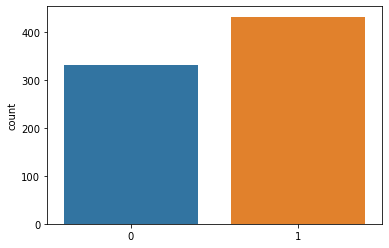

In [407]:
sns.countplot(test_pred_cat)

In [408]:
dic = {'Emp_ID':X_test.index,'Target':test_pred_cat}
sorted_result = pd.DataFrame(dic)
result_cat = pd.merge(right = sorted_result,left = test, on = 'Emp_ID',how = 'inner')
result_cat.to_csv('result_cat.csv',index = False)

In [437]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

# instantiate the 'XGBClassifier' 
xgb_model = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(X, y)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

[19:51:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:51:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:51:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:51:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:51:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:51:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:51:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:51:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:51:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:52:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:52:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:52:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:52:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:52:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:52:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:53:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:53:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:53:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:53:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:53:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:53:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:54:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:54:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [438]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

# use fit() to fit the model on the train set
xgb_model = xgb_grid_model.fit(X, y)
test_pred_xgb = xgb_model.predict(X_test)

[19:54:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [439]:
test_pred_xgb

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,

<AxesSubplot:ylabel='count'>

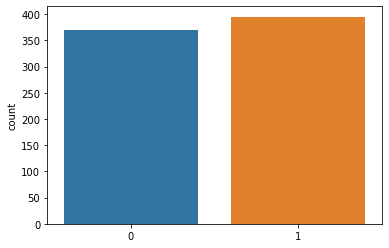

In [440]:
sns.countplot(test_pred_xgb)

In [441]:
dic = {'Emp_ID':X_test.index,'Target':test_pred_xgb}
sorted_result = pd.DataFrame(dic)

In [442]:
result = pd.merge(right = sorted_result,left = test, on = 'Emp_ID',how = 'inner')
result.to_csv('finalsubmissionxgb.csv',index = False)